## Data Science Project: The Impact of Macroprudential Policy Announcements on Financial Markets

### Testing the following hypotheses:
##### Hypothesis 1: The announcement of macroprudential policy measures increases government bond spreads and decreases stock prices.
##### Hypothesis 2: The magnitude of the market impact of macroprudential policy news varies depending on the specific policy measures announced.
##### Hypothesis 3: The market impact of macroprudential policy news on financial stability indicators is influenced by overall economic conditions.

### Zhanara Zeinesheva
### 04/30/2024

### Introduction and background

#### This study examines the impact of macroprudential policy and financial stability announcements on government bond spreads, stock prices, and market volatility in Europe, including the UK. It explores how these announcements, whether indicating a tightening or loosening stance, influence financial markets and considers the role of broader economic conditions.

#### A unique dataset of relevant news from the FACTIVA database (Reuters) was compiled, covering the period from 2001 to 2023. Using an event study methodology and Pooled OLS, the research analyzes the short-term (1 to 5 days) and long-term (10 days) effects of these announcements on financial markets, focusing on changes in stock indices, bond yields, and market volatility. The study also includes a country-specific analysis for several European nations, aiming to provide insights into the diverse impacts of policy communications across different economic contexts.

### Install and load all required packages and libraries

In [1]:
#install.packages(c('boot','msm'))
#install.packages('Matrix')
#install.packages(c('systemfit','car'))
#install.packages(c('AER','gmm'))
#install.packages('stats')
#install.packages('forecast')
#install.packages('psych')
#install.packages('plm')
#install.packages('quantreg')
#install.packages('repr')
#install.packages('gplots')
#install.packages('car')
#install.packages('glmnet')
#install.packages('ggplot2')
#install.packages('quantreg')
#install.packages('MASS')
#install.packages('lmtest')
#install.packages("readxl")
#install.packages("openxlsx")
#install.packages("zoo")
library(AER)
library(gmm)
library(systemfit)
library(car)
library(Matrix)
library(quantmod)
library(lmtest)
library(tseries)
library(sandwich)
library(maxLik)
library(moments)
library(boot)
library(msm)
library(stats)
library(forecast)
library(ggplot2)
library(dplyr)
library(psych)
library(quantreg)
library(repr)
library(plm)
library(gplots)
library(car)
library(glmnet)
library(ggplot2)
library(quantreg)
library(MASS)
library(lmtest)
library(car)
library(readxl)
library(openxlsx)
library(zoo)

Loading required package: car

Loading required package: carData

Loading required package: lmtest

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: survival

Loading required package: Matrix


Please cite the 'systemfit' package as:
Arne Henningsen and Jeff D. Hamann (2007). systemfit: A Package for Estimating Systems of Simultaneous Equations in R. Journal of Statistical Software 23(4), 1-40. http://www.jstatsoft.org/v23/i04/.

If you have questions, suggestions, or comments regarding the 'systemfit' package, please use a forum or 'tracker' at systemfit's R-Forge site:
https://r-forge.r-project.org/projects/systemfit/

Loading required package: xts

Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: miscTools


Please cite th

### Data transformation and analysis

### MERGED DATA

In [2]:
merged_data <- read.xlsx("merged_data_news.xlsx", sheet = "announcement")

In [3]:
head(merged_data)

,date,country,dummy
,<dbl>,<chr>,<dbl>
1,36924,DE,0
2,36959,IT,0
3,37011,FR,1
4,37075,EU,0
5,38559,EU,1
6,38854,EU,0


In [4]:
merged_data$date <- as.Date(merged_data$date, origin = "1899-12-30")

# Check the results
head(merged_data)

,date,country,dummy
,<date>,<chr>,<dbl>
1,2001-02-02,DE,0
2,2001-03-09,IT,0
3,2001-04-30,FR,1
4,2001-07-03,EU,0
5,2005-07-26,EU,1
6,2006-05-17,EU,0


In [5]:
merged_data_direction <- read.xlsx("merged_data_news.xlsx", sheet = "direction")

In [6]:
head(merged_data_direction)

,date,country,dummy
,<dbl>,<chr>,<dbl>
1,36924,DE,0
2,36959,IT,0
3,37011,FR,1
4,37075,EU,0
5,38559,EU,1
6,38854,EU,0


In [7]:
merged_data_direction$date <- as.Date(merged_data_direction$date, origin = "1899-12-30")

# Check the results
head(merged_data_direction)

,date,country,dummy
,<date>,<chr>,<dbl>
1,2001-02-02,DE,0
2,2001-03-09,IT,0
3,2001-04-30,FR,1
4,2001-07-03,EU,0
5,2005-07-26,EU,1
6,2006-05-17,EU,0


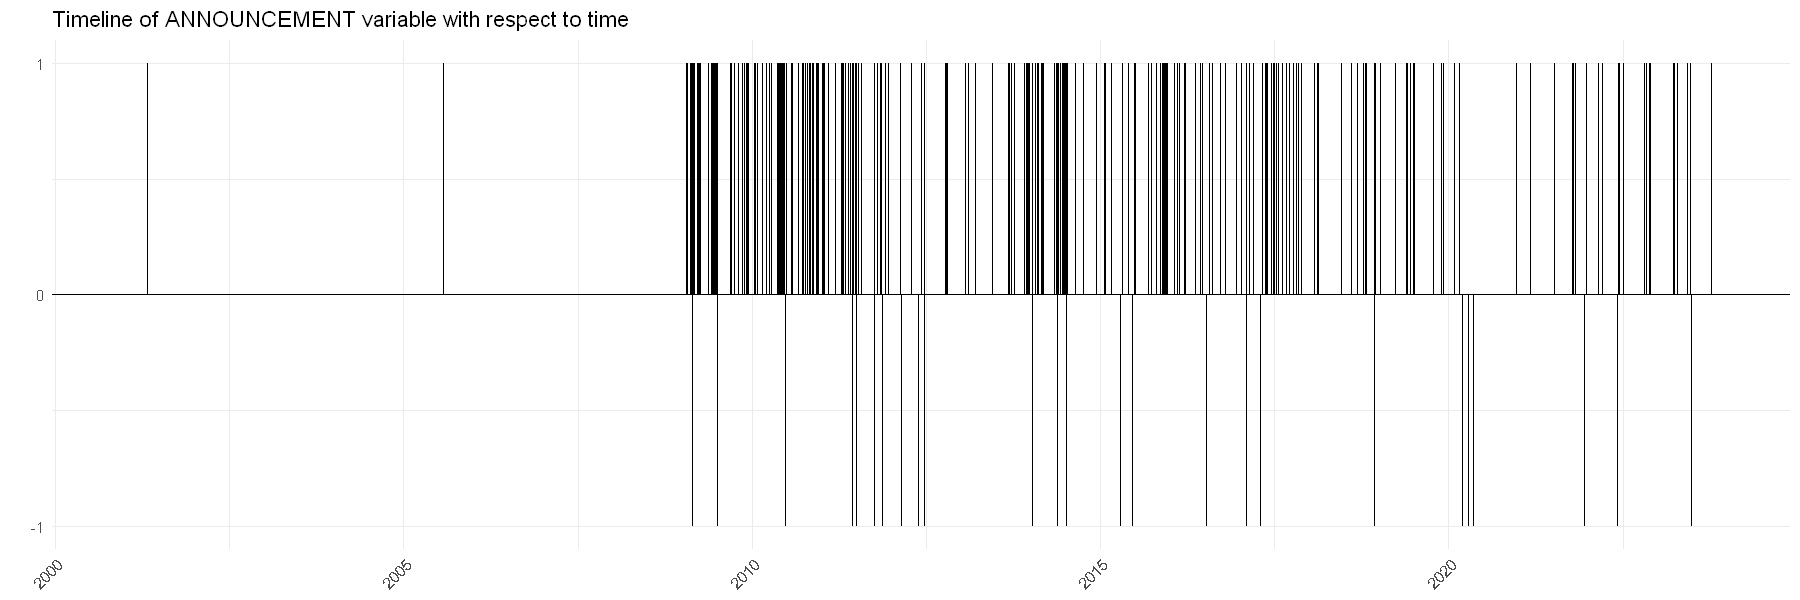

In [8]:
options(repr.plot.width = 15, repr.plot.height = 5)
hline_p_merged <- ggplot(merged_data_direction, aes(x = date)) +
  geom_hline(yintercept = 0, color = "black") +
  geom_segment(aes(xend = date, y = 0, yend = dummy), color = "black") +
  labs(x = "", y = "", title = "Timeline of ANNOUNCEMENT variable with respect to time") +
  scale_y_continuous(breaks = c(-1, 0, 1)) +  # Set breaks to only include -1, 0, and 1
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title.x = element_blank())  # Remove the x-axis title

# Print the plot
print(hline_p_merged)

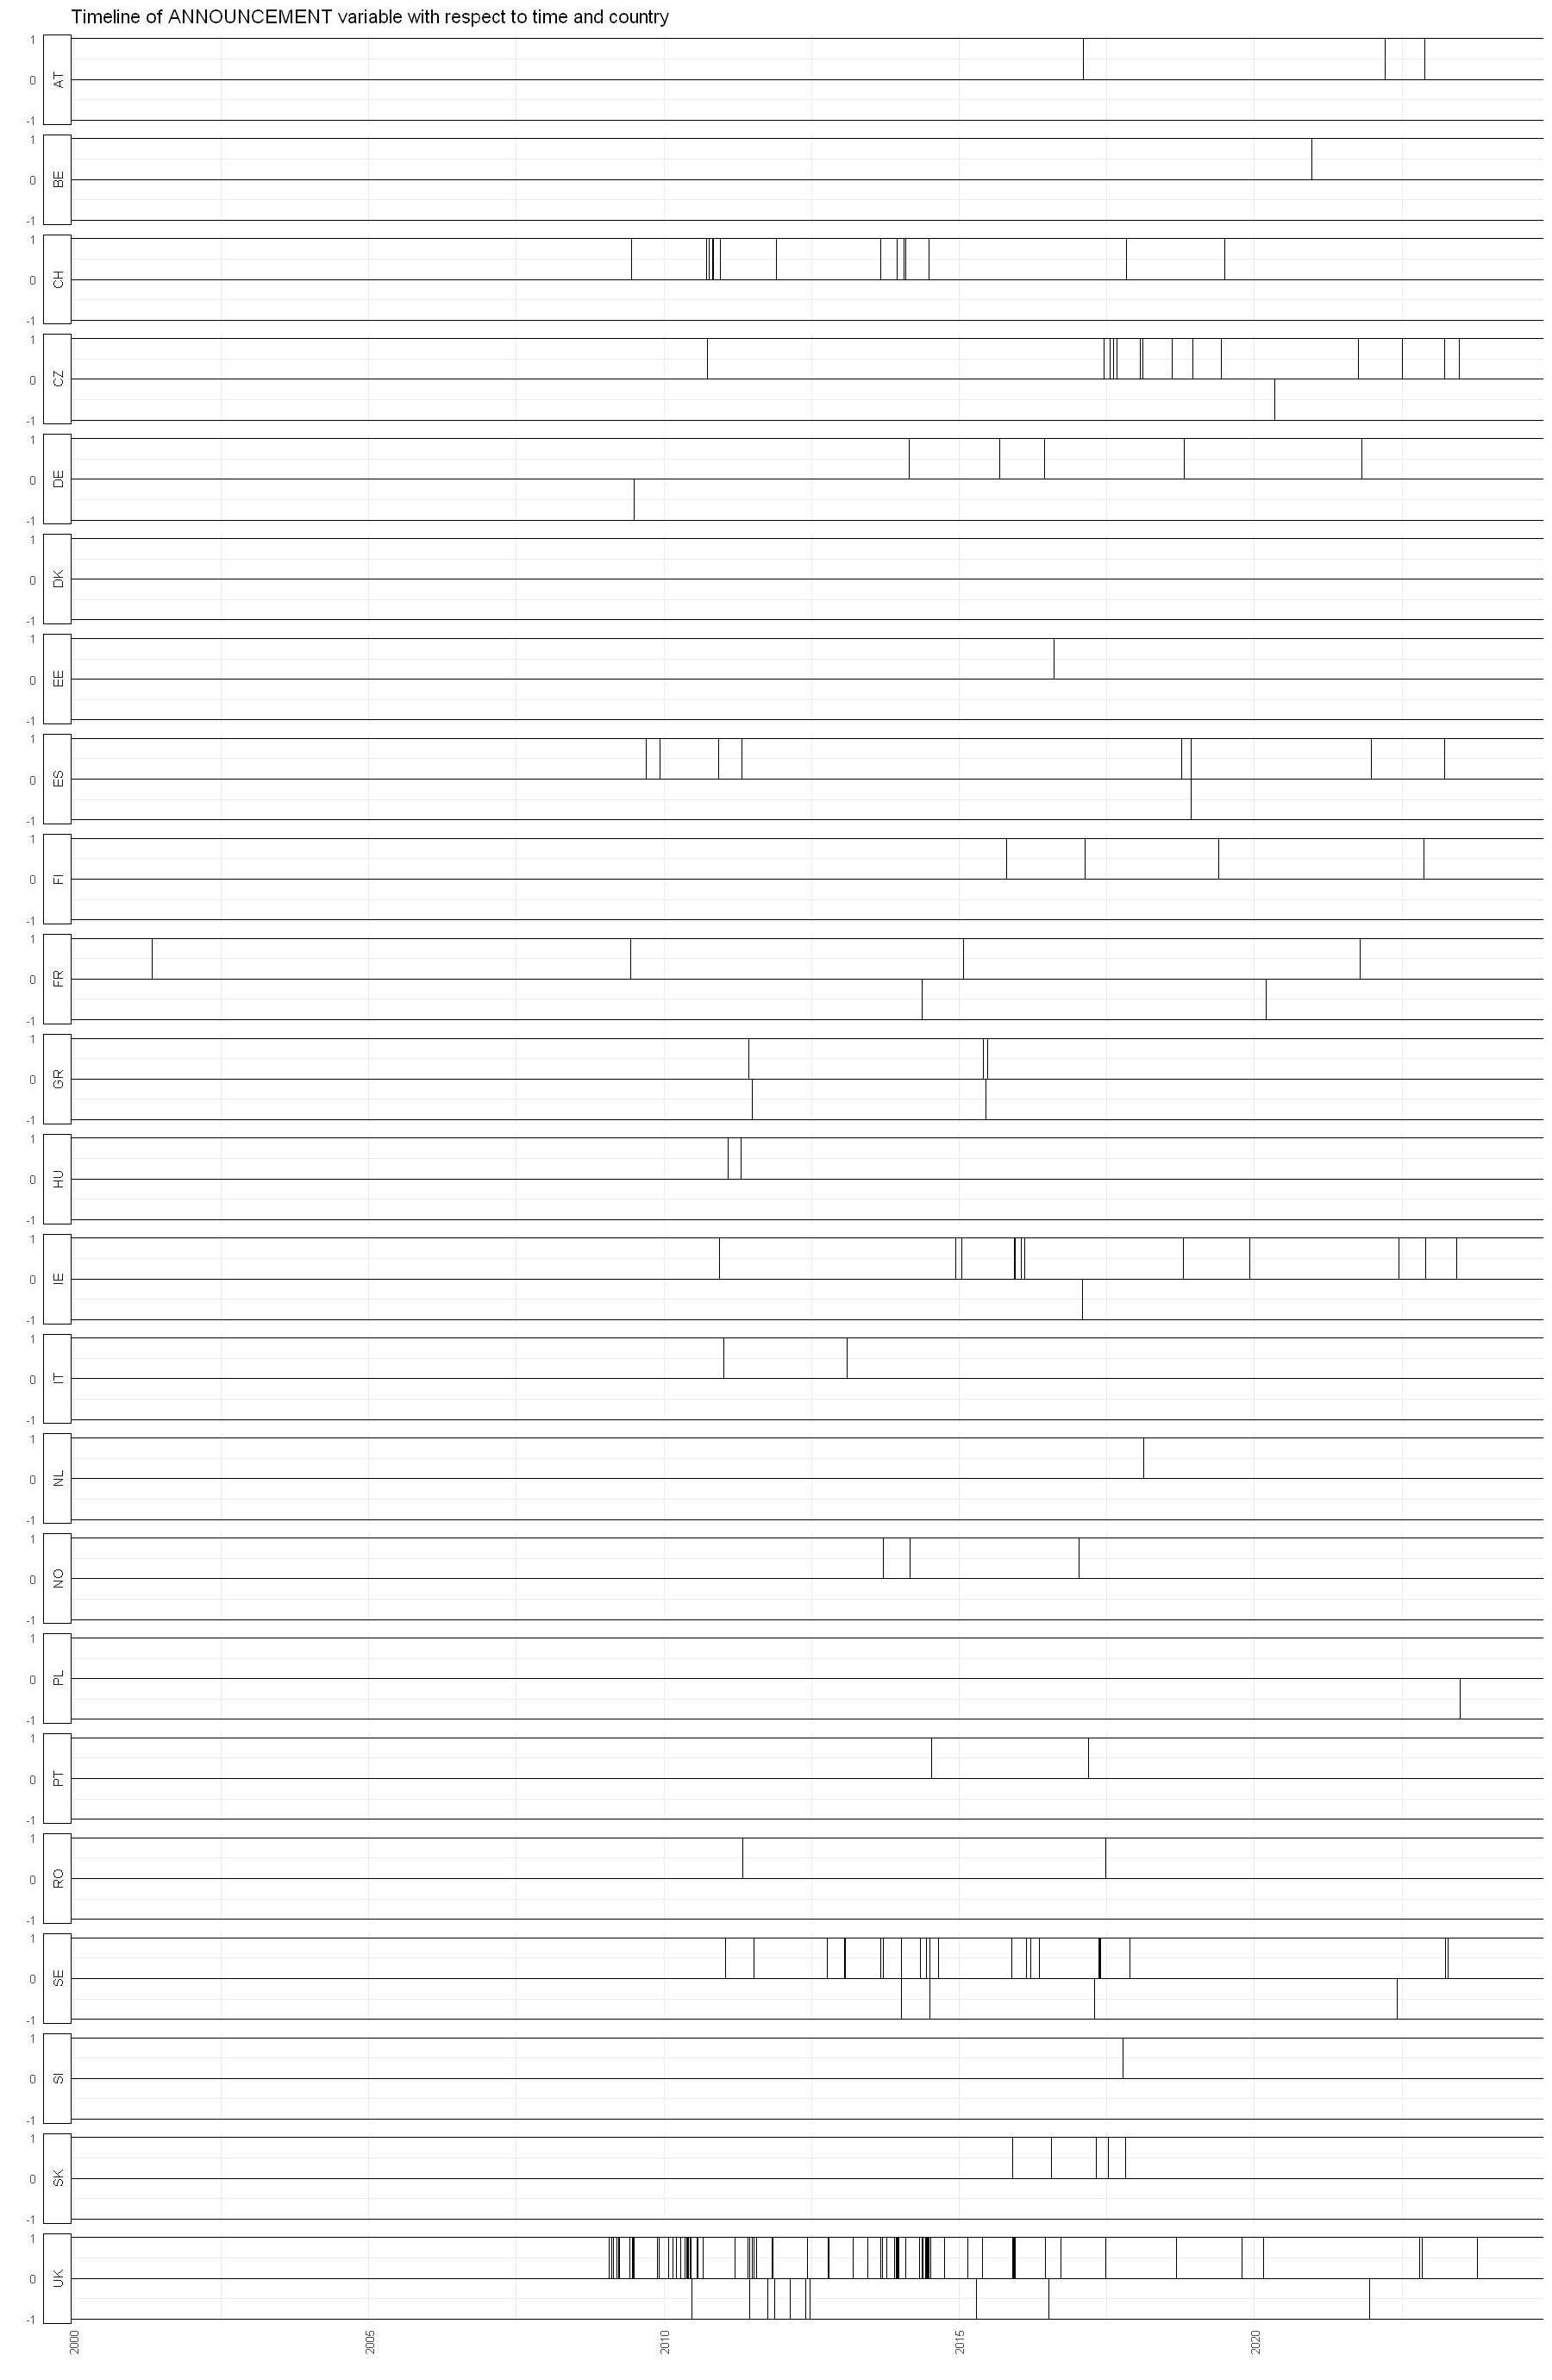

In [9]:
# Filter out rows where the country column is not "EU"
merged_data_direction <- merged_data_direction[merged_data_direction$country != "EU", ]

# Determine the plot height based on the unique countries in the filtered dataframe
plot_height <- 1 * length(unique(merged_data_direction$country))

# Set plot width and height options
options(repr.plot.width = 15, repr.plot.height = plot_height)

# Plot the data
plot_merged_direction <- ggplot(merged_data_direction, aes(x = date, y = dummy)) +
  geom_hline(aes(yintercept = -1), color = "black") +
  geom_hline(aes(yintercept = 0), color = "black") +
  geom_hline(aes(yintercept = 1), color = "black") +
  geom_segment(aes(xend = date, y = 0, yend = dummy), color = "black") +
  facet_wrap(~ country, scales = "free_y", ncol = 1, strip.position = "left") +
  theme_minimal() +
  labs(title = "Timeline of ANNOUNCEMENT variable with respect to time and country",
       x = "",
       y = "") +
  theme(
    strip.text.x = element_text(size = 10, face = "bold"), # Adjust country label size
    strip.background = element_rect(fill = "white"),
    axis.text.x = element_text(angle = 90, vjust = 0.5, size = 8), # Rotate x-axis text for better readability
    axis.text.y = element_text(size = 8), 
    panel.spacing.y = unit(0.5, "lines") # Reduce spacing between facets
  ) +
  scale_y_continuous(breaks = c(-1, 0, 1)) # Set breaks to only include -1, 0, and 1

# Print the plot
print(plot_merged_direction)

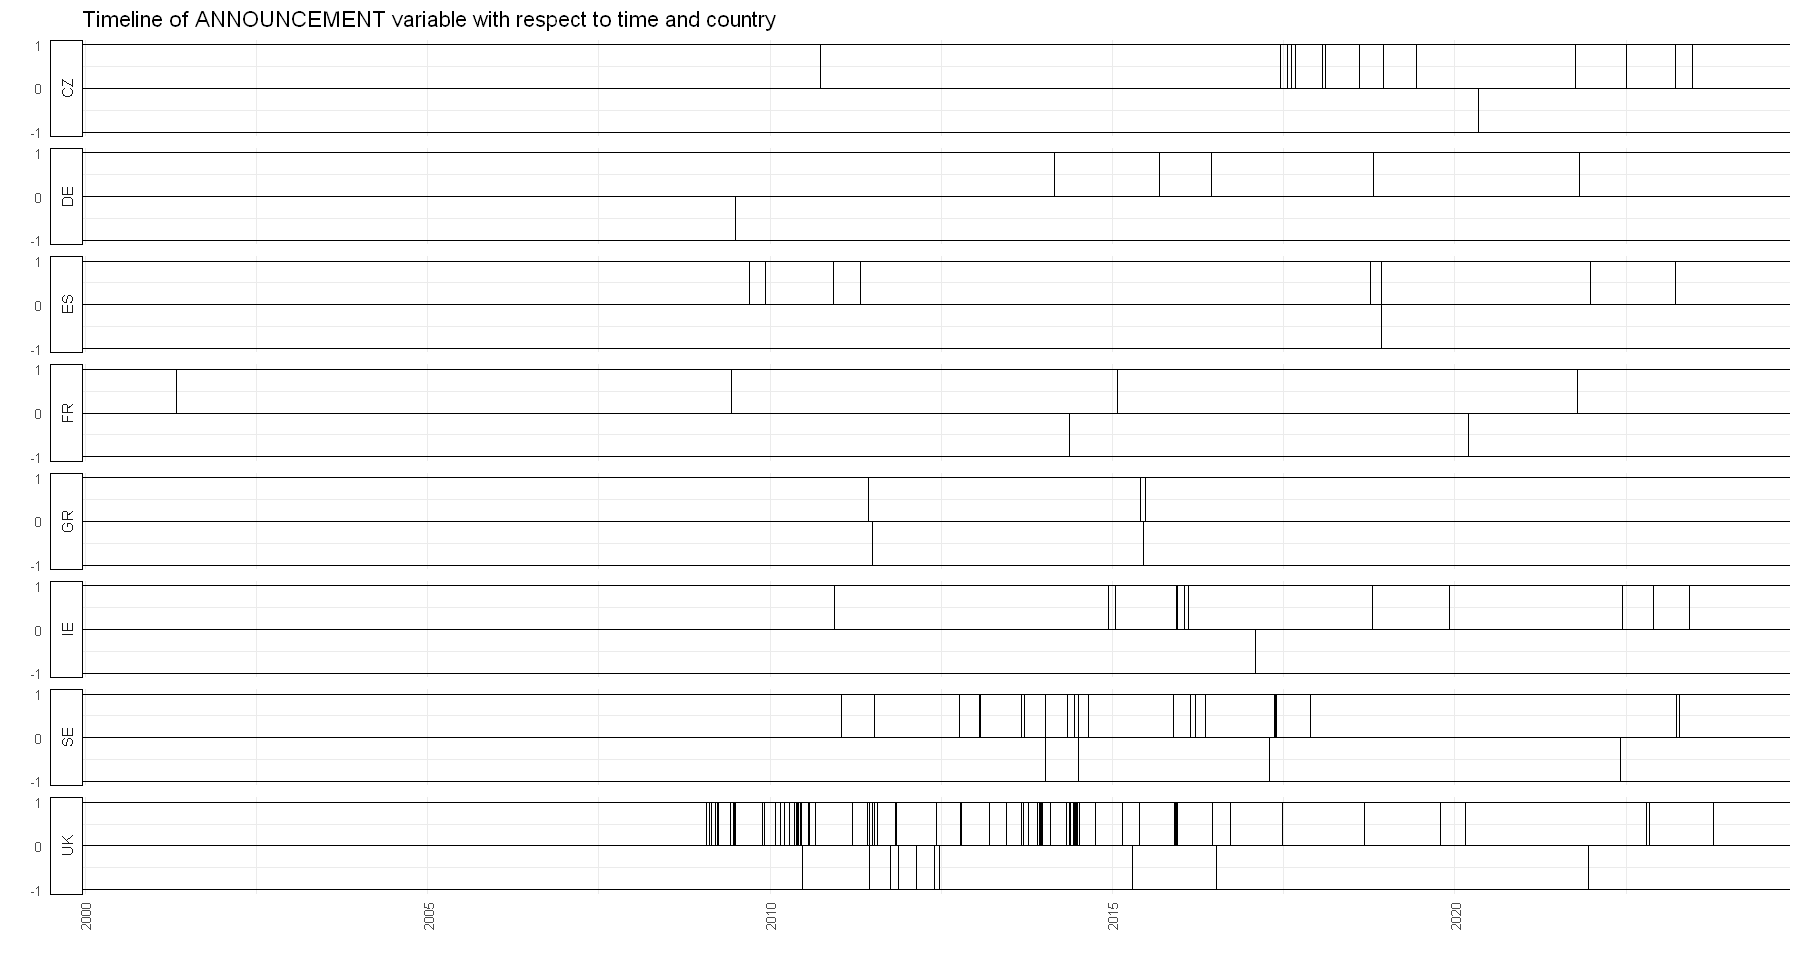

In [10]:
selected_countries <- c("CZ", "DE", "ES", "FR", "GR", "IE", "SE", "UK")
filtered_data <- merged_data_direction[merged_data_direction$country %in% selected_countries, ]

# Determine the plot height based on the unique countries in the filtered dataframe
plot_height <- 1 * length(unique(filtered_data$country))

# Set plot width and height options
options(repr.plot.width = 15, repr.plot.height = plot_height)

# Plot the data
plot_filtered_direction <- ggplot(filtered_data, aes(x = date, y = dummy)) +
  geom_hline(aes(yintercept = -1), color = "black") +
  geom_hline(aes(yintercept = 0), color = "black") +
  geom_hline(aes(yintercept = 1), color = "black") +
  geom_segment(aes(xend = date, y = 0, yend = dummy), color = "black") +
  facet_wrap(~ country, scales = "free_y", ncol = 1, strip.position = "left") +
  theme_minimal() +
  labs(title = "Timeline of ANNOUNCEMENT variable with respect to time and country",
       x = "",
       y = "") +
  theme(
    strip.text.x = element_text(size = 10, face = "bold"), # Adjust country label size
    strip.background = element_rect(fill = "white"),
    axis.text.x = element_text(angle = 90, vjust = 0.5, size = 8), # Rotate x-axis text for better readability
    axis.text.y = element_text(size = 8), 
    panel.spacing.y = unit(0.5, "lines") # Reduce spacing between facets
  ) +
  scale_y_continuous(breaks = c(-1, 0, 1)) # Set breaks to only include -1, 0, and 1

# Print the plot
print(plot_filtered_direction)

In [11]:
ggsave("plot_merged_direction.png", plot = plot_merged_direction, width = 15, height = plot_height, dpi = 300)

### Regression Models

### The effect on yield

#### The Whole Europe

In [12]:
announcement_yield_eu <- read.xlsx("announcement_yield.xlsx", sheet = "Sheet5")

#### Specification tests on data

In [13]:
adf_result1 <- adf.test(announcement_yield_eu$eu_yield, alternative = "stationary")

# Print the test results
print(adf_result1)

Warning message in adf.test(announcement_yield_eu$eu_yield, alternative = "stationary"):
"p-value greater than printed p-value"



	Augmented Dickey-Fuller Test

data:  announcement_yield_eu$eu_yield
Dickey-Fuller = 0.028411, Lag order = 18, p-value = 0.99
alternative hypothesis: stationary



Based on the ADF test results, there is very strong evidence to suggest that the series in the dataset is non-stationary. 

corrplot 0.92 loaded



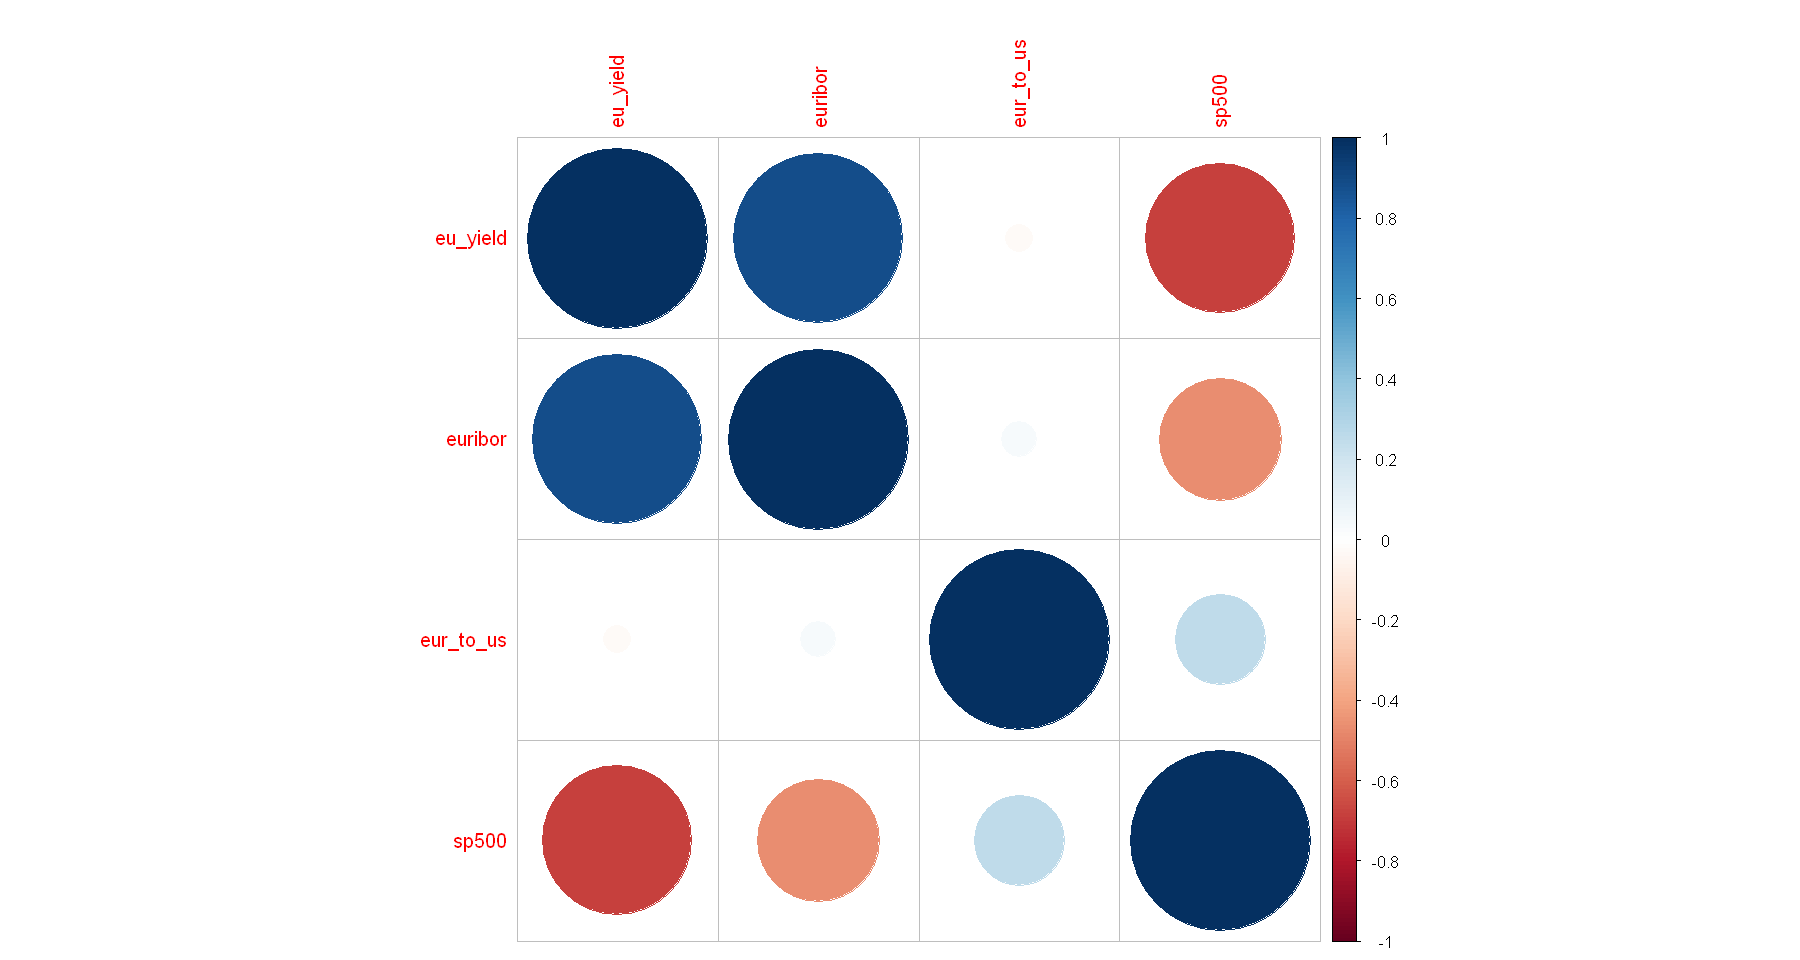

In [14]:
cor_matrix <- cor(announcement_yield_eu[, c("eu_yield", "euribor", "eur_to_us", "sp500")])

# Visualize correlation matrix
library(corrplot)
corrplot(cor_matrix, method = "circle")

In [15]:
head(announcement_yield_eu)

,date,country,announcement,eu_yield,euribor,eur_to_us,sp500
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,36923,0,0,4.782,4.714,1.06349,1373.47
2,36924,DE,1,4.785,4.724,1.07135,1349.47
3,36927,0,0,4.768,4.728,1.06383,1354.31
4,36928,0,0,4.770,4.725,1.07354,1352.26
5,36929,0,0,4.750,4.727,1.07227,1340.89
6,36930,0,0,4.794,4.731,1.08849,1332.53


In [16]:
announcement_yield_eu$date <- as.Date(announcement_yield_eu$date, origin = "1899-12-30")

# Check the results
head(announcement_yield_eu)

,date,country,announcement,eu_yield,euribor,eur_to_us,sp500
,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2001-02-01,0,0,4.782,4.714,1.06349,1373.47
2,2001-02-02,DE,1,4.785,4.724,1.07135,1349.47
3,2001-02-05,0,0,4.768,4.728,1.06383,1354.31
4,2001-02-06,0,0,4.770,4.725,1.07354,1352.26
5,2001-02-07,0,0,4.750,4.727,1.07227,1340.89
6,2001-02-08,0,0,4.794,4.731,1.08849,1332.53


In [17]:
announcement_yield_eu$log_sp500 <- log(announcement_yield_eu$sp500)

In [18]:
announcement_yield_eu <- announcement_yield_eu[order(announcement_yield_eu$date), ]

In [19]:
announcement_yield_eu$lagged_eu_yield <- c(NA, announcement_yield_eu$eu_yield[-nrow(announcement_yield_eu)])

In [20]:
announcement_yield_eu$lagged_euribor <- c(NA, announcement_yield_eu$euribor[-nrow(announcement_yield_eu)])

In [21]:
announcement_yield_eu$lagged_eur_to_us <- c(NA, announcement_yield_eu$eur_to_us[-nrow(announcement_yield_eu)])

In [22]:
announcement_yield_eu$lagged_sp500 <- c(NA, announcement_yield_eu$log_sp500[-nrow(announcement_yield_eu)])

In [23]:
announcement_yield_eu <- announcement_yield_eu %>%
  arrange(date) %>%
  mutate(
    diff_yield_1 = c(rep(NA, 1), diff(eu_yield, lag = 1)),
    diff_yield_2 = c(rep(NA, 2), diff(eu_yield, lag = 2)),
    diff_yield_3 = c(rep(NA, 3), diff(eu_yield, lag = 3)),
    diff_yield_4 = c(rep(NA, 4), diff(eu_yield, lag = 4)),
    diff_yield_5 = c(rep(NA, 5), diff(eu_yield, lag = 5)),
    diff_yield_10 = c(rep(NA, 10), diff(eu_yield, lag = 10)),
    diff_euribor_1 = c(rep(NA, 1), diff(euribor, lag = 1)),
    diff_euribor_2 = c(rep(NA, 2), diff(euribor, lag = 2)),
    diff_euribor_3 = c(rep(NA, 3), diff(euribor, lag = 3)),
    diff_euribor_4 = c(rep(NA, 4), diff(euribor, lag = 4)),
    diff_euribor_5 = c(rep(NA, 5), diff(euribor, lag = 5)),
    diff_euribor_10 = c(rep(NA, 10), diff(euribor, lag = 10)),
    diff_eur_to_us_1 = c(rep(NA, 1), diff(eur_to_us, lag = 1)),
    diff_eur_to_us_2 = c(rep(NA, 2), diff(eur_to_us, lag = 2)),
    diff_eur_to_us_3 = c(rep(NA, 3), diff(eur_to_us, lag = 3)),
    diff_eur_to_us_4 = c(rep(NA, 4), diff(eur_to_us, lag = 4)),
    diff_eur_to_us_5 = c(rep(NA, 5), diff(eur_to_us, lag = 5)),
    diff_eur_to_us_10 = c(rep(NA, 10), diff(eur_to_us, lag = 10)),
    diff_sp500_1 = c(rep(NA, 1), diff(log_sp500, lag = 1)),
    diff_sp500_2 = c(rep(NA, 2), diff(log_sp500, lag = 2)),
    diff_sp500_3 = c(rep(NA, 3), diff(log_sp500, lag = 3)),
    diff_sp500_4 = c(rep(NA, 4), diff(log_sp500, lag = 4)),
    diff_sp500_5 = c(rep(NA, 5), diff(log_sp500, lag = 5)),
    diff_sp500_10 = c(rep(NA, 10), diff(log_sp500, lag = 10))
  )

In [24]:
tail(announcement_yield_eu, 10)

,date,country,announcement,eu_yield,euribor,eur_to_us,sp500,log_sp500,lagged_eu_yield,lagged_euribor,⋯,diff_eur_to_us_3,diff_eur_to_us_4,diff_eur_to_us_5,diff_eur_to_us_10,diff_sp500_1,diff_sp500_2,diff_sp500_3,diff_sp500_4,diff_sp500_5,diff_sp500_10
,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6114,2023-10-16,0,0,2.781,3.975,0.94791,4373.63,8.383349,2.732,3.985,⋯,0.00660,0.00429,-0.00036,-0.00474,1.053862e-02,0.005507142,-0.0007588069,0.0035250218,0.00871948,0.019681957
6115,2023-10-17,0,0,2.882,3.972,0.94549,4373.20,8.383250,2.781,3.975,⋯,-0.00188,0.00418,0.00187,-0.00912,-9.832133e-05,0.010440298,0.0054088207,-0.0008571282,0.00342670,0.033423046
6116,2023-10-18,0,0,2.921,3.993,0.94890,4314.60,8.369760,2.882,3.972,⋯,-0.00316,0.00153,0.00759,-0.00416,-1.349039e-02,-0.013588708,-0.0030500881,-0.0080815656,-0.01434751,0.011855566
6117,2023-10-19,0,0,2.927,4.002,0.94621,4278.00,8.361241,2.921,3.993,⋯,-0.00170,-0.00585,-0.00116,-0.00341,-8.519010e-03,-0.022009396,-0.0221077173,-0.0115690978,-0.01660058,0.004641423
6118,2023-10-20,0,0,2.882,3.969,0.94442,4224.16,8.348576,2.927,4.002,⋯,-0.00107,-0.00349,-0.00764,-0.00448,-1.266519e-02,-0.021184196,-0.0346745821,-0.0347729034,-0.02423428,-0.019769391
6119,2023-10-23,0,0,2.866,3.956,0.94078,4217.04,8.346889,2.882,3.969,⋯,-0.00812,-0.00471,-0.00713,-0.00749,-1.686964e-03,-0.014352151,-0.0228711602,-0.0363615464,-0.03645987,-0.027740388
6120,2023-10-24,0,0,2.834,3.941,0.94349,4247.68,8.354128,2.866,3.956,⋯,-0.00272,-0.00541,-0.00200,-0.00013,7.239491e-03,0.005552527,-0.0071126591,-0.0156316688,-0.02912206,-0.025695355
6121,2023-10-25,0,0,2.887,3.938,0.94460,4186.77,8.339685,2.834,3.941,⋯,0.00018,-0.00161,-0.00430,0.00329,-1.444340e-02,-0.007203907,-0.0088908709,-0.0215560571,-0.03007507,-0.044422581
6122,2023-10-26,0,0,2.851,3.952,0.94850,4137.23,8.327782,2.887,3.938,⋯,0.00772,0.00408,0.00229,0.00113,-1.190307e-02,-0.026346470,-0.0191069784,-0.0207939427,-0.03345913,-0.050059704


In [25]:
head(announcement_yield_eu)

,date,country,announcement,eu_yield,euribor,eur_to_us,sp500,log_sp500,lagged_eu_yield,lagged_euribor,⋯,diff_eur_to_us_3,diff_eur_to_us_4,diff_eur_to_us_5,diff_eur_to_us_10,diff_sp500_1,diff_sp500_2,diff_sp500_3,diff_sp500_4,diff_sp500_5,diff_sp500_10
,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2001-02-01,0,0,4.782,4.714,1.06349,1373.47,7.225096,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,2001-02-02,DE,1,4.785,4.724,1.07135,1349.47,7.207467,4.782,4.714,⋯,NA,NA,NA,NA,-0.017628462,NA,NA,NA,NA,NA
3,2001-02-05,0,0,4.768,4.728,1.06383,1354.31,7.211047,4.785,4.724,⋯,NA,NA,NA,NA,0.003580177,-0.014048285,NA,NA,NA,NA
4,2001-02-06,0,0,4.770,4.725,1.07354,1352.26,7.209533,4.768,4.728,⋯,0.01005,NA,NA,NA,-0.001514833,0.002065344,-0.01556312,NA,NA,NA
5,2001-02-07,0,0,4.750,4.727,1.07227,1340.89,7.201089,4.770,4.725,⋯,0.00092,0.00878,NA,NA,-0.008443694,-0.009958527,-0.00637835,-0.02400681,NA,NA
6,2001-02-08,0,0,4.794,4.731,1.08849,1332.53,7.194835,4.750,4.727,⋯,0.02466,0.01714,0.025,NA,-0.006254182,-0.014697876,-0.01621271,-0.01263253,-0.03026099,NA


In [26]:
announcement_yield_eu <- announcement_yield_eu %>%
  group_by(date) %>%
  mutate(sum_announcement = sum(announcement)) %>%
  ungroup()

In [27]:
announcement_yield_eu <- announcement_yield_eu %>%
  arrange(date) %>% 
  mutate(sum_1_day_announcement = rollapply(announcement, width = 1, FUN = sum, fill = NA, align = 'right'))

In [28]:
announcement_yield_eu <- announcement_yield_eu %>%
  arrange(date) %>% 
  mutate(sum_2_day_announcement = rollapply(announcement, width = 2, FUN = sum, fill = NA, align = 'right'))

In [29]:
announcement_yield_eu <- announcement_yield_eu %>%
  arrange(date) %>% 
  mutate(sum_3_day_announcement = rollapply(announcement, width = 3, FUN = sum, fill = NA, align = 'right'))

In [30]:
announcement_yield_eu <- announcement_yield_eu %>%
  arrange(date) %>% 
  mutate(sum_4_day_announcement = rollapply(announcement, width = 4, FUN = sum, fill = NA, align = 'right'))

In [31]:
announcement_yield_eu <- announcement_yield_eu %>%
  arrange(date) %>% 
  mutate(sum_5_day_announcement = rollapply(announcement, width = 5, FUN = sum, fill = NA, align = 'right'))

In [32]:
announcement_yield_eu <- announcement_yield_eu %>%
  arrange(date) %>% 
  mutate(sum_10_day_announcement = rollapply(announcement, width = 10, FUN = sum, fill = NA, align = 'right'))

In [33]:
head(announcement_yield_eu)

date,country,announcement,eu_yield,euribor,eur_to_us,sp500,log_sp500,lagged_eu_yield,lagged_euribor,⋯,diff_sp500_4,diff_sp500_5,diff_sp500_10,sum_announcement,sum_1_day_announcement,sum_2_day_announcement,sum_3_day_announcement,sum_4_day_announcement,sum_5_day_announcement,sum_10_day_announcement
<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2001-02-01,0,0,4.782,4.714,1.06349,1373.47,7.225096,NA,NA,⋯,NA,NA,NA,0,0,NA,NA,NA,NA,NA
2001-02-02,DE,1,4.785,4.724,1.07135,1349.47,7.207467,4.782,4.714,⋯,NA,NA,NA,1,1,1,NA,NA,NA,NA
2001-02-05,0,0,4.768,4.728,1.06383,1354.31,7.211047,4.785,4.724,⋯,NA,NA,NA,0,0,1,1,NA,NA,NA
2001-02-06,0,0,4.770,4.725,1.07354,1352.26,7.209533,4.768,4.728,⋯,NA,NA,NA,0,0,0,1,1,NA,NA
2001-02-07,0,0,4.750,4.727,1.07227,1340.89,7.201089,4.770,4.725,⋯,-0.02400681,NA,NA,0,0,0,0,1,1,NA
2001-02-08,0,0,4.794,4.731,1.08849,1332.53,7.194835,4.750,4.727,⋯,-0.01263253,-0.03026099,NA,0,0,0,0,0,1,NA


In [34]:
tail(announcement_yield_eu, 10)

date,country,announcement,eu_yield,euribor,eur_to_us,sp500,log_sp500,lagged_eu_yield,lagged_euribor,⋯,diff_sp500_4,diff_sp500_5,diff_sp500_10,sum_announcement,sum_1_day_announcement,sum_2_day_announcement,sum_3_day_announcement,sum_4_day_announcement,sum_5_day_announcement,sum_10_day_announcement
<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2023-10-16,0,0,2.781,3.975,0.94791,4373.63,8.383349,2.732,3.985,⋯,0.0035250218,0.00871948,0.019681957,0,0,0,0,0,1,1
2023-10-17,0,0,2.882,3.972,0.94549,4373.20,8.383250,2.781,3.975,⋯,-0.0008571282,0.00342670,0.033423046,0,0,0,0,0,0,1
2023-10-18,0,0,2.921,3.993,0.94890,4314.60,8.369760,2.882,3.972,⋯,-0.0080815656,-0.01434751,0.011855566,0,0,0,0,0,0,1
2023-10-19,0,0,2.927,4.002,0.94621,4278.00,8.361241,2.921,3.993,⋯,-0.0115690978,-0.01660058,0.004641423,0,0,0,0,0,0,1
2023-10-20,0,0,2.882,3.969,0.94442,4224.16,8.348576,2.927,4.002,⋯,-0.0347729034,-0.02423428,-0.019769391,0,0,0,0,0,0,1
2023-10-23,0,0,2.866,3.956,0.94078,4217.04,8.346889,2.882,3.969,⋯,-0.0363615464,-0.03645987,-0.027740388,0,0,0,0,0,0,1
2023-10-24,0,0,2.834,3.941,0.94349,4247.68,8.354128,2.866,3.956,⋯,-0.0156316688,-0.02912206,-0.025695355,0,0,0,0,0,0,0
2023-10-25,0,0,2.887,3.938,0.94460,4186.77,8.339685,2.834,3.941,⋯,-0.0215560571,-0.03007507,-0.044422581,0,0,0,0,0,0,0
2023-10-26,0,0,2.851,3.952,0.94850,4137.23,8.327782,2.887,3.938,⋯,-0.0207939427,-0.03345913,-0.050059704,0,0,0,0,0,0,0


In [35]:
announcement_yield_eu$lagged_eu_yield_1 <- c(NA, announcement_yield_eu$diff_yield_1[-nrow(announcement_yield_eu)])

In [36]:
announcement_yield_eu$lagged_eu_yield_2 <- c(NA, announcement_yield_eu$diff_yield_2[-nrow(announcement_yield_eu)])

In [37]:
announcement_yield_eu$lagged_eu_yield_3 <- c(NA, announcement_yield_eu$diff_yield_3[-nrow(announcement_yield_eu)])

In [38]:
announcement_yield_eu$lagged_eu_yield_4 <- c(NA, announcement_yield_eu$diff_yield_4[-nrow(announcement_yield_eu)])

In [39]:
announcement_yield_eu$lagged_eu_yield_5 <- c(NA, announcement_yield_eu$diff_yield_5[-nrow(announcement_yield_eu)])

In [40]:
announcement_yield_eu$lagged_eu_yield_10 <- c(NA, announcement_yield_eu$diff_yield_10[-nrow(announcement_yield_eu)])

In [41]:
announcement_yield_eu_wo_uk <- announcement_yield_eu %>%
  filter(country != "UK")

In [42]:
eu_yield_day1 <- lm(diff_yield_1 ~ sum_1_day_announcement + diff_euribor_1 + diff_eur_to_us_1 + diff_sp500_1 + lagged_eu_yield_1, data = announcement_yield_eu_wo_uk)

# Summary of the model
summary(eu_yield_day1)


Call:
lm(formula = diff_yield_1 ~ sum_1_day_announcement + diff_euribor_1 + 
    diff_eur_to_us_1 + diff_sp500_1 + lagged_eu_yield_1, data = announcement_yield_eu_wo_uk)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33434 -0.02361 -0.00036  0.02177  0.24262 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -0.0001394  0.0005843  -0.239    0.811    
sum_1_day_announcement -0.0022596  0.0020031  -1.128    0.259    
diff_euribor_1          0.0152561  0.0401953   0.380    0.704    
diff_eur_to_us_1        0.0458635  0.1172096   0.391    0.696    
diff_sp500_1            0.7961133  0.0470600  16.917   <2e-16 ***
lagged_eu_yield_1       0.0136427  0.0130375   1.046    0.295    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.04287 on 5879 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.04678,	Adjusted R-squared:  0.04597 
F-statistic:  

#### Specifation tests on the model

In [43]:
# Perform Durbin-Watson test
dwtest(eu_yield_day1)


	Durbin-Watson test

data:  eu_yield_day1
DW = 2.0287, p-value = 0.8636
alternative hypothesis: true autocorrelation is greater than 0


Based on the Durbin-Watson test results, I conclude that there is no significant autocorrelation in the residuals of the model.

In [44]:
residuals <- residuals(eu_yield_day1)

# Perform Ljung-Box test on the residuals
Box.test(residuals, lag = 10, type = "Ljung-Box")


	Box-Ljung test

data:  residuals
X-squared = 8.7047, df = 10, p-value = 0.5603


Based on the Box-Ljung test results, I conclude that there is no significant autocorrelation in the residuals.

In [45]:
# Perform the Breusch-Pagan test
bp_test_result <- bptest(eu_yield_day1)

# Print the test results
print(bp_test_result)


	studentized Breusch-Pagan test

data:  eu_yield_day1
BP = 35.446, df = 5, p-value = 1.226e-06



This result suggests that there is statistically significant evidence of heteroskedasticity in the residuals of the model.

In [46]:
# Calculate VIF
vif_values <- car::vif(eu_yield_day1)
print(vif_values)

sum_1_day_announcement         diff_euribor_1       diff_eur_to_us_1 
              1.000889               1.035233               1.004477 
          diff_sp500_1      lagged_eu_yield_1 
              1.004954               1.036469 


All the VIF scores are well below the threshold of concern, which implies that there is no indication of multicollinearity in the regression model. 

In [47]:
eu_yield_day1_nw <- coeftest(eu_yield_day1, vcov = NeweyWest(eu_yield_day1)) #applying robust standard errors
print(eu_yield_day1_nw )


t test of coefficients:

                          Estimate  Std. Error t value Pr(>|t|)    
(Intercept)            -0.00013944  0.00058619 -0.2379   0.8120    
sum_1_day_announcement -0.00225956  0.00170178 -1.3278   0.1843    
diff_euribor_1          0.01525607  0.08967966  0.1701   0.8649    
diff_eur_to_us_1        0.04586348  0.21705810  0.2113   0.8327    
diff_sp500_1            0.79611325  0.09011041  8.8349   <2e-16 ***
lagged_eu_yield_1       0.01364271  0.01764018  0.7734   0.4393    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [48]:
eu_yield_day2 <- lm(diff_yield_2 ~ sum_2_day_announcement + diff_euribor_2 + diff_eur_to_us_2 + diff_sp500_2 + lagged_eu_yield_2, data = announcement_yield_eu_wo_uk)

# Summary of the model
summary(eu_yield_day2)


Call:
lm(formula = diff_yield_2 ~ sum_2_day_announcement + diff_euribor_2 + 
    diff_eur_to_us_2 + diff_sp500_2 + lagged_eu_yield_2, data = announcement_yield_eu_wo_uk)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33284 -0.02918 -0.00114  0.02814  0.27426 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -0.0003925  0.0007359  -0.533   0.5939    
sum_2_day_announcement -0.0002755  0.0014509  -0.190   0.8494    
diff_euribor_2          0.0274619  0.0302899   0.907   0.3646    
diff_eur_to_us_2        0.2249028  0.1015716   2.214   0.0269 *  
diff_sp500_2            0.7667513  0.0428810  17.881   <2e-16 ***
lagged_eu_yield_2       0.4880802  0.0112060  43.555   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.05231 on 5878 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.2925,	Adjusted R-squared:  0.2919 
F-statistic: 486

In [49]:
eu_yield_day2_nw <- coeftest(eu_yield_day2, vcov = NeweyWest(eu_yield_day2)) #applying robust standard errors
print(eu_yield_day2_nw)


t test of coefficients:

                          Estimate  Std. Error t value Pr(>|t|)    
(Intercept)            -0.00039245  0.00070754 -0.5547   0.5791    
sum_2_day_announcement -0.00027549  0.00128739 -0.2140   0.8306    
diff_euribor_2          0.02746186  0.04686160  0.5860   0.5579    
diff_eur_to_us_2        0.22490283  0.18543403  1.2128   0.2252    
diff_sp500_2            0.76675130  0.08062155  9.5105   <2e-16 ***
lagged_eu_yield_2       0.48808019  0.01169345 41.7396   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [50]:
eu_yield_day3 <- lm(diff_yield_3 ~ sum_3_day_announcement + diff_euribor_3 + diff_eur_to_us_3 + diff_sp500_3 + lagged_eu_yield_3, data = announcement_yield_eu_wo_uk)

# Summary of the model
summary(eu_yield_day3)


Call:
lm(formula = diff_yield_3 ~ sum_3_day_announcement + diff_euribor_3 + 
    diff_eur_to_us_3 + diff_sp500_3 + lagged_eu_yield_3, data = announcement_yield_eu_wo_uk)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.44056 -0.03127 -0.00155  0.03038  0.32507 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -5.538e-05  8.034e-04  -0.069   0.9450    
sum_3_day_announcement -1.321e-03  1.137e-03  -1.161   0.2456    
diff_euribor_3          1.798e-02  2.379e-02   0.756   0.4497    
diff_eur_to_us_3        2.617e-01  8.875e-02   2.949   0.0032 ** 
diff_sp500_3            6.153e-01  3.879e-02  15.861   <2e-16 ***
lagged_eu_yield_3       6.467e-01  9.782e-03  66.114   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.05577 on 5877 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.4659,	Adjusted R-squared:  0.4654 
F-statistic:  10

In [51]:
eu_yield_day3_nw <- coeftest(eu_yield_day3, vcov = NeweyWest(eu_yield_day3)) #applying robust standard errors
print(eu_yield_day3_nw)


t test of coefficients:

                          Estimate  Std. Error t value Pr(>|t|)    
(Intercept)            -5.5377e-05  8.4040e-04 -0.0659   0.9475    
sum_3_day_announcement -1.3208e-03  1.0794e-03 -1.2236   0.2212    
diff_euribor_3          1.7984e-02  4.1048e-02  0.4381   0.6613    
diff_eur_to_us_3        2.6169e-01  1.4189e-01  1.8442   0.0652 .  
diff_sp500_3            6.1528e-01  7.3436e-02  8.3784   <2e-16 ***
lagged_eu_yield_3       6.4673e-01  1.1830e-02 54.6705   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [52]:
eu_yield_day4 <- lm(diff_yield_4 ~ sum_4_day_announcement + diff_euribor_4 + diff_eur_to_us_4 + diff_sp500_4 + lagged_eu_yield_4, data = announcement_yield_eu_wo_uk)

# Summary of the model
summary(eu_yield_day4)


Call:
lm(formula = diff_yield_4 ~ sum_4_day_announcement + diff_euribor_4 + 
    diff_eur_to_us_4 + diff_sp500_4 + lagged_eu_yield_4, data = announcement_yield_eu_wo_uk)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37595 -0.03113 -0.00173  0.03063  0.41896 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -1.724e-05  8.367e-04  -0.021  0.98356    
sum_4_day_announcement -1.101e-03  9.358e-04  -1.177  0.23940    
diff_euribor_4          2.390e-02  1.944e-02   1.229  0.21895    
diff_eur_to_us_4        2.167e-01  7.928e-02   2.734  0.00628 ** 
diff_sp500_4            4.408e-01  3.476e-02  12.681  < 2e-16 ***
lagged_eu_yield_4       7.353e-01  8.713e-03  84.393  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.05701 on 5876 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.5779,	Adjusted R-squared:  0.5776 
F-statistic:  16

In [53]:
eu_yield_day4_nw <- coeftest(eu_yield_day4, vcov = NeweyWest(eu_yield_day4)) #applying robust standard errors
print(eu_yield_day4_nw)


t test of coefficients:

                          Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)            -1.7242e-05  7.8263e-04 -0.0220    0.9824    
sum_4_day_announcement -1.1010e-03  9.2484e-04 -1.1905    0.2339    
diff_euribor_4          2.3895e-02  3.2635e-02  0.7322    0.4641    
diff_eur_to_us_4        2.1674e-01  1.3559e-01  1.5985    0.1100    
diff_sp500_4            4.4078e-01  7.2986e-02  6.0392 1.644e-09 ***
lagged_eu_yield_4       7.3533e-01  1.0575e-02 69.5353 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [54]:
eu_yield_day5 <- lm(diff_yield_5 ~ sum_5_day_announcement + diff_euribor_5 + diff_eur_to_us_5 + diff_sp500_5 + lagged_eu_yield_5, data = announcement_yield_eu_wo_uk)

# Summary of the model
summary(eu_yield_day5)


Call:
lm(formula = diff_yield_5 ~ sum_5_day_announcement + diff_euribor_5 + 
    diff_eur_to_us_5 + diff_sp500_5 + lagged_eu_yield_5, data = announcement_yield_eu_wo_uk)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32447 -0.03183 -0.00040  0.03182  0.36458 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -0.0001723  0.0008569  -0.201 0.840652    
sum_5_day_announcement -0.0008057  0.0007949  -1.014 0.310823    
diff_euribor_5          0.0146138  0.0164589   0.888 0.374633    
diff_eur_to_us_5        0.2474966  0.0718106   3.447 0.000572 ***
diff_sp500_5            0.3818541  0.0316201  12.076  < 2e-16 ***
lagged_eu_yield_5       0.7899167  0.0078705 100.365  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.05748 on 5875 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.6556,	Adjusted R-squared:  0.6554 
F-statistic:  22

In [55]:
eu_yield_day5_nw <- coeftest(eu_yield_day5, vcov = NeweyWest(eu_yield_day5)) #applying robust standard errors
print(eu_yield_day5_nw)


t test of coefficients:

                          Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)            -0.00017230  0.00081171 -0.2123   0.83190    
sum_5_day_announcement -0.00080572  0.00083017 -0.9706   0.33181    
diff_euribor_5          0.01461383  0.02753992  0.5306   0.59569    
diff_eur_to_us_5        0.24749656  0.12026797  2.0579   0.03965 *  
diff_sp500_5            0.38185413  0.06687335  5.7101 1.184e-08 ***
lagged_eu_yield_5       0.78991671  0.00993886 79.4776 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [56]:
eu_yield_day10 <- lm(diff_yield_10 ~ sum_10_day_announcement + diff_euribor_10 + diff_eur_to_us_10 + diff_sp500_10 + lagged_eu_yield_10, data = announcement_yield_eu_wo_uk)

# Summary of the model
summary(eu_yield_day10)


Call:
lm(formula = diff_yield_10 ~ sum_10_day_announcement + diff_euribor_10 + 
    diff_eur_to_us_10 + diff_sp500_10 + lagged_eu_yield_10, data = announcement_yield_eu_wo_uk)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43448 -0.03486 -0.00042  0.03326  0.37456 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              3.349e-05  9.443e-04   0.035    0.972    
sum_10_day_announcement -3.061e-04  4.821e-04  -0.635    0.525    
diff_euribor_10          1.458e-02  9.982e-03   1.461    0.144    
diff_eur_to_us_10        7.630e-02  5.384e-02   1.417    0.157    
diff_sp500_10            1.620e-01  2.451e-02   6.611 4.16e-11 ***
lagged_eu_yield_10       8.899e-01  5.888e-03 151.158  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06032 on 5870 degrees of freedom
  (11 observations deleted due to missingness)
Multiple R-squared:  0.8077,	Adjusted R-squared:  0.8076 
F-

In [57]:
eu_yield_day10_nw <- coeftest(eu_yield_day10, vcov = NeweyWest(eu_yield_day10)) #applying robust standard errors
print(eu_yield_day10_nw)


t test of coefficients:

                           Estimate  Std. Error  t value  Pr(>|t|)    
(Intercept)              3.3492e-05  9.6217e-04   0.0348 0.9722335    
sum_10_day_announcement -3.0609e-04  5.5210e-04  -0.5544 0.5793184    
diff_euribor_10          1.4579e-02  1.4900e-02   0.9785 0.3278666    
diff_eur_to_us_10        7.6296e-02  7.4571e-02   1.0231 0.3062876    
diff_sp500_10            1.6204e-01  4.6702e-02   3.4697 0.0005248 ***
lagged_eu_yield_10       8.8995e-01  6.9553e-03 127.9517 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



### The effect on stock prices

#### The whole EUROPE

In [58]:
announcement_stoxx_eu <- read.xlsx("announcement_stoxx.xlsx", sheet = "Sheet2")

In [59]:
head(announcement_stoxx_eu)

,date,country,announcement,stoxx,euribor,eur_to_us,sp500
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,36923,0,0,358.621,4.714,1.06349,1373.47
2,36924,DE,1,356.860,4.724,1.07135,1349.47
3,36927,0,0,356.554,4.728,1.06383,1354.31
4,36928,0,0,358.603,4.725,1.07354,1352.26
5,36929,0,0,354.234,4.727,1.07227,1340.89
6,36930,0,0,354.998,4.731,1.08849,1332.53


In [60]:
announcement_stoxx_eu$date <- as.Date(announcement_stoxx_eu$date, origin = "1899-12-30")

# Check the results
head(announcement_stoxx_eu)

,date,country,announcement,stoxx,euribor,eur_to_us,sp500
,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2001-02-01,0,0,358.621,4.714,1.06349,1373.47
2,2001-02-02,DE,1,356.860,4.724,1.07135,1349.47
3,2001-02-05,0,0,356.554,4.728,1.06383,1354.31
4,2001-02-06,0,0,358.603,4.725,1.07354,1352.26
5,2001-02-07,0,0,354.234,4.727,1.07227,1340.89
6,2001-02-08,0,0,354.998,4.731,1.08849,1332.53


In [61]:
announcement_stoxx_eu$log_sp500 <- log(announcement_stoxx_eu$sp500)

In [62]:
announcement_stoxx_eu$log_stoxx <- log(announcement_stoxx_eu$stoxx)

In [63]:
announcement_stoxx_eu <- announcement_stoxx_eu[order(announcement_stoxx_eu$date), ]

In [64]:
announcement_stoxx_eu$lagged_stoxx <- c(NA, announcement_stoxx_eu$log_stoxx[-nrow(announcement_stoxx_eu)])

In [65]:
announcement_stoxx_eu$lagged_euribor <- c(NA, announcement_stoxx_eu$euribor[-nrow(announcement_stoxx_eu)])

In [66]:
announcement_stoxx_eu$lagged_eur_to_us <- c(NA, announcement_stoxx_eu$eur_to_us[-nrow(announcement_stoxx_eu)])

In [67]:
announcement_stoxx_eu$lagged_sp500 <- c(NA, announcement_stoxx_eu$log_sp500[-nrow(announcement_stoxx_eu)])

In [68]:
announcement_stoxx_eu <- announcement_stoxx_eu %>%
  arrange(date) %>%
  mutate(
    diff_stoxx_1 = c(rep(NA, 1), diff(log_stoxx, lag = 1)),
    diff_stoxx_2 = c(rep(NA, 2), diff(log_stoxx, lag = 2)),
    diff_stoxx_3 = c(rep(NA, 3), diff(log_stoxx, lag = 3)),
    diff_stoxx_4 = c(rep(NA, 4), diff(log_stoxx, lag = 4)),
    diff_stoxx_5 = c(rep(NA, 5), diff(log_stoxx, lag = 5)),
    diff_stoxx_10 = c(rep(NA, 10), diff(log_stoxx, lag = 10)),
    diff_euribor_1 = c(rep(NA, 1), diff(euribor, lag = 1)),
    diff_euribor_2 = c(rep(NA, 2), diff(euribor, lag = 2)),
    diff_euribor_3 = c(rep(NA, 3), diff(euribor, lag = 3)),
    diff_euribor_4 = c(rep(NA, 4), diff(euribor, lag = 4)),
    diff_euribor_5 = c(rep(NA, 5), diff(euribor, lag = 5)),
    diff_euribor_10 = c(rep(NA, 10), diff(euribor, lag = 10)),
    diff_eur_to_us_1 = c(rep(NA, 1), diff(eur_to_us, lag = 1)),
    diff_eur_to_us_2 = c(rep(NA, 2), diff(eur_to_us, lag = 2)),
    diff_eur_to_us_3 = c(rep(NA, 3), diff(eur_to_us, lag = 3)),
    diff_eur_to_us_4 = c(rep(NA, 4), diff(eur_to_us, lag = 4)),
    diff_eur_to_us_5 = c(rep(NA, 5), diff(eur_to_us, lag = 5)),
    diff_eur_to_us_10 = c(rep(NA, 10), diff(eur_to_us, lag = 10)),
    diff_sp500_1 = c(rep(NA, 1), diff(log_sp500, lag = 1)),
    diff_sp500_2 = c(rep(NA, 2), diff(log_sp500, lag = 2)),
    diff_sp500_3 = c(rep(NA, 3), diff(log_sp500, lag = 3)),
    diff_sp500_4 = c(rep(NA, 4), diff(log_sp500, lag = 4)),
    diff_sp500_5 = c(rep(NA, 5), diff(log_sp500, lag = 5)),
    diff_sp500_10 = c(rep(NA, 10), diff(log_sp500, lag = 10))
  )

In [69]:
tail(announcement_stoxx_eu, 10)

,date,country,announcement,stoxx,euribor,eur_to_us,sp500,log_sp500,log_stoxx,lagged_stoxx,⋯,diff_eur_to_us_3,diff_eur_to_us_4,diff_eur_to_us_5,diff_eur_to_us_10,diff_sp500_1,diff_sp500_2,diff_sp500_3,diff_sp500_4,diff_sp500_5,diff_sp500_10
,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6114,2023-10-16,0,0,450.204,3.975,0.94791,4373.63,8.383349,6.109701,6.107417,⋯,0.00660,0.00429,-0.00036,-0.00474,1.053862e-02,0.005507142,-0.0007588069,0.0035250218,0.00871948,0.019681957
6115,2023-10-17,0,0,449.761,3.972,0.94549,4373.20,8.383250,6.108716,6.109701,⋯,-0.00188,0.00418,0.00187,-0.00912,-9.832133e-05,0.010440298,0.0054088207,-0.0008571282,0.00342670,0.033423046
6116,2023-10-18,0,0,445.020,3.993,0.94890,4314.60,8.369760,6.098119,6.108716,⋯,-0.00316,0.00153,0.00759,-0.00416,-1.349039e-02,-0.013588708,-0.0030500881,-0.0080815656,-0.01434751,0.011855566
6117,2023-10-19,0,0,439.730,4.002,0.94621,4278.00,8.361241,6.086161,6.098119,⋯,-0.00170,-0.00585,-0.00116,-0.00341,-8.519010e-03,-0.022009396,-0.0221077173,-0.0115690978,-0.01660058,0.004641423
6118,2023-10-20,0,0,433.728,3.969,0.94442,4224.16,8.348576,6.072418,6.086161,⋯,-0.00107,-0.00349,-0.00764,-0.00448,-1.266519e-02,-0.021184196,-0.0346745821,-0.0347729034,-0.02423428,-0.019769391
6119,2023-10-23,0,0,433.183,3.956,0.94078,4217.04,8.346889,6.071160,6.072418,⋯,-0.00812,-0.00471,-0.00713,-0.00749,-1.686964e-03,-0.014352151,-0.0228711602,-0.0363615464,-0.03645987,-0.027740388
6120,2023-10-24,0,0,435.091,3.941,0.94349,4247.68,8.354128,6.075555,6.071160,⋯,-0.00272,-0.00541,-0.00200,-0.00013,7.239491e-03,0.005552527,-0.0071126591,-0.0156316688,-0.02912206,-0.025695355
6121,2023-10-25,0,0,435.266,3.938,0.94460,4186.77,8.339685,6.075957,6.075555,⋯,0.00018,-0.00161,-0.00430,0.00329,-1.444340e-02,-0.007203907,-0.0088908709,-0.0215560571,-0.03007507,-0.044422581
6122,2023-10-26,0,0,433.204,3.952,0.94850,4137.23,8.327782,6.071209,6.075957,⋯,0.00772,0.00408,0.00229,0.00113,-1.190307e-02,-0.026346470,-0.0191069784,-0.0207939427,-0.03345913,-0.050059704


In [70]:
announcement_stoxx_eu <- announcement_stoxx_eu %>%
  group_by(date) %>%
  mutate(sum_announcement = sum(announcement)) %>%
  ungroup()

In [71]:
announcement_stoxx_eu <- announcement_stoxx_eu %>%
  arrange(date) %>% 
  mutate(sum_1_day_announcement = rollapply(announcement, width = 1, FUN = sum, fill = NA, align = 'right'))

In [72]:
announcement_stoxx_eu <- announcement_stoxx_eu %>%
  arrange(date) %>% 
  mutate(sum_2_day_announcement = rollapply(announcement, width = 2, FUN = sum, fill = NA, align = 'right'))

In [73]:
announcement_stoxx_eu <- announcement_stoxx_eu %>%
  arrange(date) %>% 
  mutate(sum_3_day_announcement = rollapply(announcement, width = 3, FUN = sum, fill = NA, align = 'right'))

In [74]:
announcement_stoxx_eu <- announcement_stoxx_eu %>%
  arrange(date) %>% 
  mutate(sum_4_day_announcement = rollapply(announcement, width = 4, FUN = sum, fill = NA, align = 'right'))

In [75]:
announcement_stoxx_eu <- announcement_stoxx_eu %>%
  arrange(date) %>% 
  mutate(sum_5_day_announcement = rollapply(announcement, width = 5, FUN = sum, fill = NA, align = 'right'))

In [76]:
announcement_stoxx_eu <- announcement_stoxx_eu %>%
  arrange(date) %>% 
  mutate(sum_10_day_announcement = rollapply(announcement, width = 10, FUN = sum, fill = NA, align = 'right'))

In [77]:
announcement_stoxx_eu$lagged_stoxx_1 <- c(NA, announcement_stoxx_eu$diff_stoxx_1[-nrow(announcement_stoxx_eu)])

In [78]:
announcement_stoxx_eu$lagged_stoxx_2 <- c(NA, announcement_stoxx_eu$diff_stoxx_2[-nrow(announcement_stoxx_eu)])

In [79]:
announcement_stoxx_eu$lagged_stoxx_3 <- c(NA, announcement_stoxx_eu$diff_stoxx_3[-nrow(announcement_stoxx_eu)])

In [80]:
announcement_stoxx_eu$lagged_stoxx_4 <- c(NA, announcement_stoxx_eu$diff_stoxx_4[-nrow(announcement_stoxx_eu)])

In [81]:
announcement_stoxx_eu$lagged_stoxx_5 <- c(NA, announcement_stoxx_eu$diff_stoxx_5[-nrow(announcement_stoxx_eu)])

In [82]:
announcement_stoxx_eu$lagged_stoxx_10 <- c(NA, announcement_stoxx_eu$diff_stoxx_10[-nrow(announcement_stoxx_eu)])

In [83]:
tail(announcement_stoxx_eu, 10)

date,country,announcement,stoxx,euribor,eur_to_us,sp500,log_sp500,log_stoxx,lagged_stoxx,⋯,sum_3_day_announcement,sum_4_day_announcement,sum_5_day_announcement,sum_10_day_announcement,lagged_stoxx_1,lagged_stoxx_2,lagged_stoxx_3,lagged_stoxx_4,lagged_stoxx_5,lagged_stoxx_10
<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2023-10-16,0,0,450.204,3.975,0.94791,4373.63,8.383349,6.109701,6.107417,⋯,0,0,1,1,-0.0098626639,-0.008834865,-7.319914e-03,0.012058782,0.009491063,-0.002323775
2023-10-17,0,0,449.761,3.972,0.94549,4373.20,8.383250,6.108716,6.109701,⋯,0,0,0,1,0.0022837940,-0.007578870,-6.551071e-03,-0.005036120,0.014342576,0.010310544
2023-10-18,0,0,445.020,3.993,0.94890,4314.60,8.369760,6.098119,6.108716,⋯,0,0,0,1,-0.0009844828,0.001299311,-8.563353e-03,-0.007535554,-0.006020603,0.020345151
2023-10-19,0,0,439.730,4.002,0.94621,4278.00,8.361241,6.086161,6.098119,⋯,0,0,0,1,-0.0105971056,-0.011581588,-9.297794e-03,-0.019160458,-0.018132659,0.011160424
2023-10-20,0,0,433.728,3.969,0.94442,4224.16,8.348576,6.072418,6.086161,⋯,0,0,0,1,-0.0119583228,-0.022555428,-2.353991e-02,-0.021256117,-0.031118781,-0.003595738
2023-10-23,0,0,433.183,3.956,0.94078,4217.04,8.346889,6.071160,6.072418,⋯,0,0,0,1,-0.0137432927,-0.025701615,-3.629872e-02,-0.037283204,-0.034999410,-0.025508347
2023-10-24,0,0,435.091,3.941,0.94349,4247.68,8.354128,6.075555,6.071160,⋯,0,0,0,0,-0.0012573380,-0.015000631,-2.695895e-02,-0.037556059,-0.038540542,-0.024197966
2023-10-25,0,0,435.266,3.938,0.94460,4186.77,8.339685,6.075957,6.075555,⋯,0,0,0,0,0.0043949331,0.003137595,-1.060570e-02,-0.022564020,-0.033161126,-0.039181729
2023-10-26,0,0,433.204,3.952,0.94850,4137.23,8.327782,6.071209,6.075957,⋯,0,0,0,0,0.0004021338,0.004797067,3.539729e-03,-0.010203564,-0.022161887,-0.040294546


#### Specifation tests on the data

In [84]:
adf_result2 <- adf.test(announcement_stoxx_eu$stoxx, alternative = "stationary")

# Print the test results
print(adf_result2)


	Augmented Dickey-Fuller Test

data:  announcement_stoxx_eu$stoxx
Dickey-Fuller = -3.1224, Lag order = 18, p-value = 0.103
alternative hypothesis: stationary



Based on the ADF test results, with a p-value of 0.103, I fail to reject the null hypothesis that the series has a unit root (i.e., it is non-stationary). This suggests that the stoxx series is likely non-stationary.

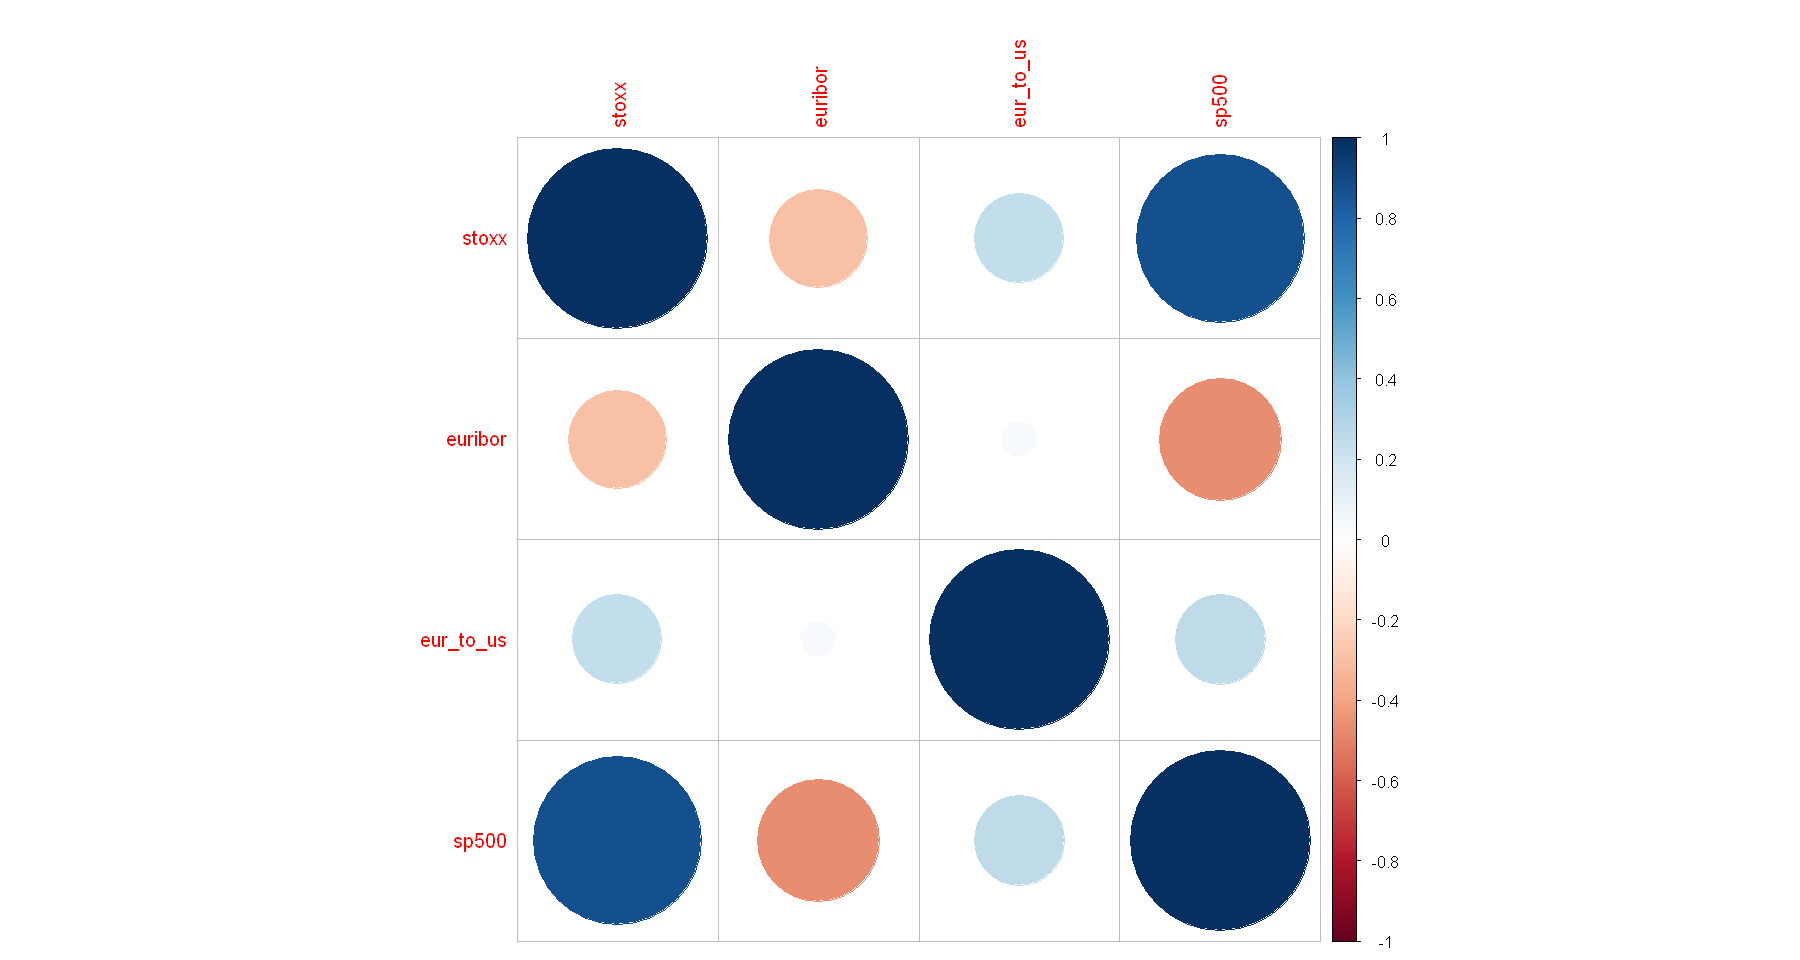

In [85]:
cor_matrix2 <- cor(announcement_stoxx_eu[, c("stoxx", "euribor", "eur_to_us", "sp500")])

# Visualize correlation matrix
library(corrplot)
corrplot(cor_matrix2, method = "circle")

In [86]:
announcement_stoxx_eu_wo_uk <- announcement_stoxx_eu %>%
  filter(country != "UK")

In [87]:
stoxx_day1 <- lm(diff_stoxx_1 ~ sum_1_day_announcement + diff_euribor_1 + diff_eur_to_us_1 + diff_sp500_1 + lagged_stoxx_1, data = announcement_stoxx_eu_wo_uk)

# Summary of the model
summary(stoxx_day1)


Call:
lm(formula = diff_stoxx_1 ~ sum_1_day_announcement + diff_euribor_1 + 
    diff_eur_to_us_1 + diff_sp500_1 + lagged_stoxx_1, data = announcement_stoxx_eu_wo_uk)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.073067 -0.004222  0.000266  0.004470  0.078016 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -2.855e-05  1.291e-04  -0.221   0.8249    
sum_1_day_announcement -5.352e-04  4.423e-04  -1.210   0.2264    
diff_euribor_1          1.638e-02  8.733e-03   1.875   0.0608 .  
diff_eur_to_us_1        1.016e-01  2.591e-02   3.922  8.9e-05 ***
diff_sp500_1            5.850e-01  1.041e-02  56.182  < 2e-16 ***
lagged_stoxx_1          2.715e-02  1.055e-02   2.572   0.0101 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.009468 on 5879 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.3497,	Adjusted R-squared:  0.3491 
F-statis

#### Specifation tests on the model

In [88]:
# Perform Durbin-Watson test
dwtest(stoxx_day1)


	Durbin-Watson test

data:  stoxx_day1
DW = 2.4931, p-value = 1
alternative hypothesis: true autocorrelation is greater than 0


The results suggest that there is no significant autocorrelation in the residuals of the model.

In [89]:
residuals <- residuals(stoxx_day1)

# Perform Ljung-Box test on the residuals
Box.test(residuals, lag = 10, type = "Ljung-Box")


	Box-Ljung test

data:  residuals
X-squared = 381.49, df = 10, p-value < 2.2e-16


There is statistically significant evidence to suggest that autocorrelation is present in the residuals.

In [90]:
# Perform the Breusch-Pagan test
bp_test_result1 <- bptest(stoxx_day1)

# Print the test results
print(bp_test_result1)


	studentized Breusch-Pagan test

data:  stoxx_day1
BP = 170.51, df = 5, p-value < 2.2e-16



There is statistically significant evidence to suggest that heteroskedasticity is present in the residuals.

In [91]:
# Calculate VIF
vif_values <- car::vif(stoxx_day1)
print(vif_values)

sum_1_day_announcement         diff_euribor_1       diff_eur_to_us_1 
              1.000530               1.001717               1.005815 
          diff_sp500_1         lagged_stoxx_1 
              1.008416               1.007098 


There is indication of no severe multicollinearity in the regression model. 

In [92]:
stoxx_day1_nw <- coeftest(stoxx_day1, vcov = NeweyWest(stoxx_day1)) #applying robust standard errors
print(stoxx_day1_nw)


t test of coefficients:

                          Estimate  Std. Error t value Pr(>|t|)    
(Intercept)            -2.8548e-05  8.9520e-05 -0.3189  0.74982    
sum_1_day_announcement -5.3516e-04  4.1386e-04 -1.2931  0.19603    
diff_euribor_1          1.6378e-02  9.8145e-03  1.6688  0.09521 .  
diff_eur_to_us_1        1.0159e-01  5.0068e-02  2.0290  0.04250 *  
diff_sp500_1            5.8497e-01  1.6402e-02 35.6644  < 2e-16 ***
lagged_stoxx_1          2.7146e-02  1.7833e-02  1.5222  0.12800    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [93]:
stoxx_day2 <- lm(diff_stoxx_2 ~ sum_2_day_announcement + diff_euribor_2 + diff_eur_to_us_2 + diff_sp500_2 + lagged_stoxx_2, data = announcement_stoxx_eu_wo_uk)

# Summary of the model
summary(stoxx_day2)


Call:
lm(formula = diff_stoxx_2 ~ sum_2_day_announcement + diff_euribor_2 + 
    diff_eur_to_us_2 + diff_sp500_2 + lagged_stoxx_2, data = announcement_stoxx_eu_wo_uk)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.071623 -0.005081 -0.000148  0.005086  0.074076 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -0.0001319  0.0001441  -0.915    0.360    
sum_2_day_announcement -0.0003017  0.0002839  -1.063    0.288    
diff_euribor_2          0.0088576  0.0058450   1.515    0.130    
diff_eur_to_us_2        0.1827479  0.0198839   9.191   <2e-16 ***
diff_sp500_2            0.6586252  0.0086423  76.209   <2e-16 ***
lagged_stoxx_2          0.3276853  0.0083920  39.047   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01024 on 5878 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.6156,	Adjusted R-squared:  0.6153 
F-statist

In [94]:
stoxx_day2_nw <- coeftest(stoxx_day2, vcov = NeweyWest(stoxx_day2)) #applying robust standard errors
print(stoxx_day2_nw)


t test of coefficients:

                          Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)            -0.00013188  0.00013989 -0.9427    0.3459    
sum_2_day_announcement -0.00030169  0.00028107 -1.0733    0.2832    
diff_euribor_2          0.00885759  0.01022864  0.8660    0.3865    
diff_eur_to_us_2        0.18274786  0.02983268  6.1258  9.61e-10 ***
diff_sp500_2            0.65862520  0.01511857 43.5640 < 2.2e-16 ***
lagged_stoxx_2          0.32768528  0.01173538 27.9228 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [95]:
stoxx_day3 <- lm(diff_stoxx_3 ~ sum_3_day_announcement + diff_euribor_3 + diff_eur_to_us_3 + diff_sp500_3 + lagged_stoxx_3, data = announcement_stoxx_eu_wo_uk)

# Summary of the model
summary(stoxx_day3)


Call:
lm(formula = diff_stoxx_3 ~ sum_3_day_announcement + diff_euribor_3 + 
    diff_eur_to_us_3 + diff_sp500_3 + lagged_stoxx_3, data = announcement_stoxx_eu_wo_uk)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.072625 -0.005470  0.000025  0.005458  0.078605 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -0.0001550  0.0001565  -0.990   0.3222    
sum_3_day_announcement -0.0004301  0.0002215  -1.942   0.0522 .  
diff_euribor_3          0.0066972  0.0045710   1.465   0.1429    
diff_eur_to_us_3        0.1948562  0.0173085  11.258   <2e-16 ***
diff_sp500_3            0.6327021  0.0084446  74.924   <2e-16 ***
lagged_stoxx_3          0.3750325  0.0079780  47.008   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01087 on 5877 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.7052,	Adjusted R-squared:  0.7049 
F-statist

In [96]:
stoxx_day3_nw <- coeftest(stoxx_day3, vcov = NeweyWest(stoxx_day3)) #applying robust standard errors
print(stoxx_day3_nw)


t test of coefficients:

                          Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)            -0.00015496  0.00013870 -1.1172   0.26394    
sum_3_day_announcement -0.00043010  0.00023202 -1.8537   0.06383 .  
diff_euribor_3          0.00669723  0.00529296  1.2653   0.20581    
diff_eur_to_us_3        0.19485617  0.03220296  6.0509 1.529e-09 ***
diff_sp500_3            0.63270209  0.01702412 37.1650 < 2.2e-16 ***
lagged_stoxx_3          0.37503245  0.01479240 25.3530 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [97]:
stoxx_day4 <- lm(diff_stoxx_4 ~ sum_4_day_announcement + diff_euribor_4 + diff_eur_to_us_4 + diff_sp500_4 + lagged_stoxx_4, data = announcement_stoxx_eu_wo_uk)

# Summary of the model
summary(stoxx_day4)


Call:
lm(formula = diff_stoxx_4 ~ sum_4_day_announcement + diff_euribor_4 + 
    diff_eur_to_us_4 + diff_sp500_4 + lagged_stoxx_4, data = announcement_stoxx_eu_wo_uk)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.073319 -0.005862  0.000033  0.005747  0.087178 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -0.0001911  0.0001638  -1.166   0.2436    
sum_4_day_announcement -0.0003341  0.0001831  -1.824   0.0681 .  
diff_euribor_4          0.0056036  0.0037557   1.492   0.1358    
diff_eur_to_us_4        0.1991900  0.0155897  12.777   <2e-16 ***
diff_sp500_4            0.5876983  0.0081980  71.688   <2e-16 ***
lagged_stoxx_4          0.4282855  0.0077671  55.141   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01116 on 5876 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.7626,	Adjusted R-squared:  0.7624 
F-statist

In [98]:
stoxx_day4_nw <- coeftest(stoxx_day4, vcov = NeweyWest(stoxx_day4)) #applying robust standard errors
print(stoxx_day4_nw)


t test of coefficients:

                          Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)            -0.00019106  0.00016041 -1.1911    0.2337    
sum_4_day_announcement -0.00033413  0.00020843 -1.6031    0.1090    
diff_euribor_4          0.00560357  0.00436570  1.2835    0.1994    
diff_eur_to_us_4        0.19919003  0.03142713  6.3382 2.498e-10 ***
diff_sp500_4            0.58769829  0.01603201 36.6578 < 2.2e-16 ***
lagged_stoxx_4          0.42828549  0.01220821 35.0818 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [99]:
stoxx_day5 <- lm(diff_stoxx_5 ~ sum_5_day_announcement + diff_euribor_5 + diff_eur_to_us_5 + diff_sp500_5 + lagged_stoxx_5, data = announcement_stoxx_eu_wo_uk)

# Summary of the model
summary(stoxx_day5)


Call:
lm(formula = diff_stoxx_5 ~ sum_5_day_announcement + diff_euribor_5 + 
    diff_eur_to_us_5 + diff_sp500_5 + lagged_stoxx_5, data = announcement_stoxx_eu_wo_uk)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.086221 -0.006038  0.000042  0.005913  0.082449 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -0.0002662  0.0001757  -1.515    0.130    
sum_5_day_announcement -0.0002589  0.0001629  -1.589    0.112    
diff_euribor_5          0.0034311  0.0033278   1.031    0.303    
diff_eur_to_us_5        0.2065659  0.0148245  13.934   <2e-16 ***
diff_sp500_5            0.5687561  0.0082480  68.957   <2e-16 ***
lagged_stoxx_5          0.4487622  0.0077625  57.811   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01178 on 5875 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.7874,	Adjusted R-squared:  0.7873 
F-statist

In [100]:
stoxx_day5_nw <- coeftest(stoxx_day5, vcov = NeweyWest(stoxx_day5)) #applying robust standard errors
print(stoxx_day5_nw)


t test of coefficients:

                          Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)            -0.00026615  0.00020722 -1.2844    0.1991    
sum_5_day_announcement -0.00025891  0.00021123 -1.2257    0.2204    
diff_euribor_5          0.00343115  0.00502233  0.6832    0.4945    
diff_eur_to_us_5        0.20656591  0.02594028  7.9631 1.999e-15 ***
diff_sp500_5            0.56875614  0.01775718 32.0296 < 2.2e-16 ***
lagged_stoxx_5          0.44876216  0.01801641 24.9085 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [101]:
stoxx_day10 <- lm(diff_stoxx_10 ~ sum_10_day_announcement + diff_euribor_10 + diff_eur_to_us_10 + diff_sp500_10 + lagged_stoxx_10, data = announcement_stoxx_eu_wo_uk)

# Summary of the model
summary(stoxx_day10)


Call:
lm(formula = diff_stoxx_10 ~ sum_10_day_announcement + diff_euribor_10 + 
    diff_eur_to_us_10 + diff_sp500_10 + lagged_stoxx_10, data = announcement_stoxx_eu_wo_uk)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.078250 -0.006961  0.000021  0.006841  0.109910 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -0.0003858  0.0002008  -1.921   0.0547 .  
sum_10_day_announcement -0.0002421  0.0001025  -2.362   0.0182 *  
diff_euribor_10          0.0014505  0.0020856   0.695   0.4868    
diff_eur_to_us_10        0.1825050  0.0116691  15.640   <2e-16 ***
diff_sp500_10            0.4710199  0.0078572  59.948   <2e-16 ***
lagged_stoxx_10          0.5577846  0.0072558  76.875   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01282 on 5870 degrees of freedom
  (11 observations deleted due to missingness)
Multiple R-squared:  0.8671,	Adjusted R-squared:  0.8

In [102]:
stoxx_day10_nw <- coeftest(stoxx_day10, vcov = NeweyWest(stoxx_day10)) #applying robust standard errors
print(stoxx_day2_nw)


t test of coefficients:

                          Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)            -0.00013188  0.00013989 -0.9427    0.3459    
sum_2_day_announcement -0.00030169  0.00028107 -1.0733    0.2832    
diff_euribor_2          0.00885759  0.01022864  0.8660    0.3865    
diff_eur_to_us_2        0.18274786  0.02983268  6.1258  9.61e-10 ***
diff_sp500_2            0.65862520  0.01511857 43.5640 < 2.2e-16 ***
lagged_stoxx_2          0.32768528  0.01173538 27.9228 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



### The effect on VSTOXX

####  The whole Europe

In [103]:
announcement_vstoxx_eu <- read.xlsx("announcement_vstoxx.xlsx", sheet = "Sheet2")

In [104]:
head(announcement_vstoxx_eu)

,date,country,announcement,vstoxx,euribor,eur_to_us,sp500
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,36923,0,0,21.75,4.714,1.06349,1373.47
2,36924,DE,1,21.17,4.724,1.07135,1349.47
3,36927,0,0,21.53,4.728,1.06383,1354.31
4,36928,0,0,20.51,4.725,1.07354,1352.26
5,36929,0,0,20.78,4.727,1.07227,1340.89
6,36930,0,0,20.16,4.731,1.08849,1332.53


In [105]:
announcement_vstoxx_eu$date <- as.Date(announcement_vstoxx_eu$date, origin = "1899-12-30")

# Check the results
head(announcement_vstoxx_eu)

,date,country,announcement,vstoxx,euribor,eur_to_us,sp500
,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2001-02-01,0,0,21.75,4.714,1.06349,1373.47
2,2001-02-02,DE,1,21.17,4.724,1.07135,1349.47
3,2001-02-05,0,0,21.53,4.728,1.06383,1354.31
4,2001-02-06,0,0,20.51,4.725,1.07354,1352.26
5,2001-02-07,0,0,20.78,4.727,1.07227,1340.89
6,2001-02-08,0,0,20.16,4.731,1.08849,1332.53


In [106]:
announcement_vstoxx_eu$log_sp500 <- log(announcement_vstoxx_eu$sp500)

In [107]:
announcement_vstoxx_eu <- announcement_vstoxx_eu[order(announcement_vstoxx_eu$date), ]

In [108]:
announcement_vstoxx_eu$lagged_vstoxx <- c(NA, announcement_vstoxx_eu$vstoxx[-nrow(announcement_vstoxx_eu)])

In [109]:
announcement_vstoxx_eu$lagged_euribor <- c(NA, announcement_vstoxx_eu$euribor[-nrow(announcement_vstoxx_eu)])

In [110]:
announcement_vstoxx_eu$lagged_eur_to_us <- c(NA, announcement_vstoxx_eu$eur_to_us[-nrow(announcement_vstoxx_eu)])

In [111]:
announcement_vstoxx_eu$lagged_sp500 <- c(NA, announcement_vstoxx_eu$log_sp500[-nrow(announcement_vstoxx_eu)])

In [112]:
announcement_vstoxx_eu <- announcement_vstoxx_eu %>%
  group_by(date) %>%
  mutate(sum_announcement = sum(announcement)) %>%
  ungroup()

In [113]:
announcement_vstoxx_eu <- announcement_vstoxx_eu %>%
  arrange(date) %>% 
  mutate(sum_1_day_announcement = rollapply(announcement, width = 1, FUN = sum, fill = NA, align = 'right'))

In [114]:
announcement_vstoxx_eu <- announcement_vstoxx_eu %>%
  arrange(date) %>% 
  mutate(sum_2_day_announcement = rollapply(announcement, width = 2, FUN = sum, fill = NA, align = 'right'))

In [115]:
announcement_vstoxx_eu <- announcement_vstoxx_eu %>%
  arrange(date) %>% 
  mutate(sum_3_day_announcement = rollapply(announcement, width = 3, FUN = sum, fill = NA, align = 'right'))

In [116]:
announcement_vstoxx_eu <- announcement_vstoxx_eu %>%
  arrange(date) %>% 
  mutate(sum_4_day_announcement = rollapply(announcement, width = 4, FUN = sum, fill = NA, align = 'right'))

In [117]:
announcement_vstoxx_eu <- announcement_vstoxx_eu %>%
  arrange(date) %>% 
  mutate(sum_5_day_announcement = rollapply(announcement, width = 5, FUN = sum, fill = NA, align = 'right'))

In [118]:
announcement_vstoxx_eu <- announcement_vstoxx_eu %>%
  arrange(date) %>% 
  mutate(sum_10_day_announcement = rollapply(announcement, width = 10, FUN = sum, fill = NA, align = 'right'))

In [119]:
tail(announcement_vstoxx_eu, 10)

date,country,announcement,vstoxx,euribor,eur_to_us,sp500,log_sp500,lagged_vstoxx,lagged_euribor,lagged_eur_to_us,lagged_sp500,sum_announcement,sum_1_day_announcement,sum_2_day_announcement,sum_3_day_announcement,sum_4_day_announcement,sum_5_day_announcement,sum_10_day_announcement
<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2023-10-16,0,0,19.92,3.975,0.94791,4373.63,8.383349,20.18,3.985,0.95206,8.372810,0,0,0,0,0,1,1
2023-10-17,0,0,19.87,3.972,0.94549,4373.20,8.383250,19.92,3.975,0.94791,8.383349,0,0,0,0,0,0,1
2023-10-18,0,0,21.64,3.993,0.94890,4314.60,8.369760,19.87,3.972,0.94549,8.383250,0,0,0,0,0,0,1
2023-10-19,0,0,22.30,4.002,0.94621,4278.00,8.361241,21.64,3.993,0.94890,8.369760,0,0,0,0,0,0,1
2023-10-20,0,0,23.33,3.969,0.94442,4224.16,8.348576,22.30,4.002,0.94621,8.361241,0,0,0,0,0,0,1
2023-10-23,0,0,21.94,3.956,0.94078,4217.04,8.346889,23.33,3.969,0.94442,8.348576,0,0,0,0,0,0,1
2023-10-24,0,0,20.99,3.941,0.94349,4247.68,8.354128,21.94,3.956,0.94078,8.346889,0,0,0,0,0,0,0
2023-10-25,0,0,20.58,3.938,0.94460,4186.77,8.339685,20.99,3.941,0.94349,8.354128,0,0,0,0,0,0,0
2023-10-26,0,0,21.50,3.952,0.94850,4137.23,8.327782,20.58,3.938,0.94460,8.339685,0,0,0,0,0,0,0


#### Specification tests on the data

In [120]:
adf_result3 <- adf.test(announcement_vstoxx_eu$vstoxx, alternative = "stationary")

# Print the test results
print(adf_result3)

Warning message in adf.test(announcement_vstoxx_eu$vstoxx, alternative = "stationary"):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  announcement_vstoxx_eu$vstoxx
Dickey-Fuller = -5.7042, Lag order = 18, p-value = 0.01
alternative hypothesis: stationary



Based on the ADF test results, with a p-value of 0.01, you reject the null hypothesis that the series has a unit root. This suggests that the vstoxx series is stationary.

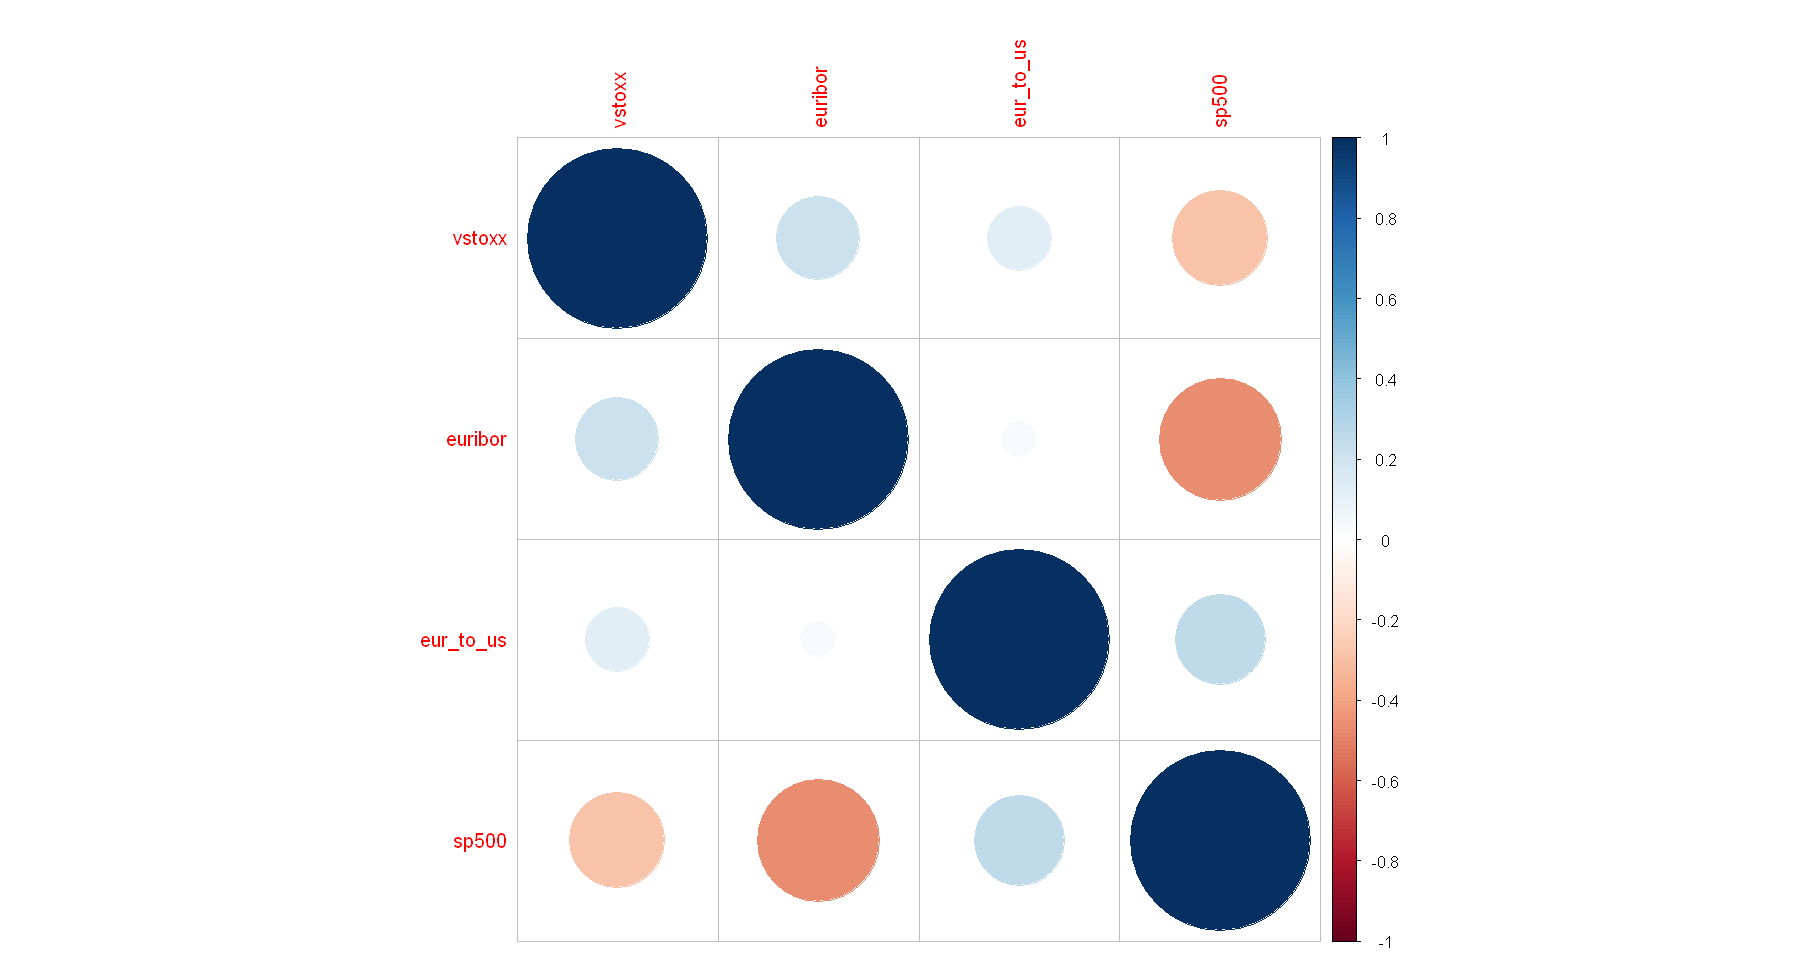

In [121]:
cor_matrix3 <- cor(announcement_vstoxx_eu[, c("vstoxx", "euribor", "eur_to_us", "sp500")])

# Visualize correlation matrix
library(corrplot)
corrplot(cor_matrix3, method = "circle")

In [122]:
announcement_vstoxx_eu_wo_uk <- announcement_vstoxx_eu %>%
  filter(country != "UK")

In [123]:
vstoxx_var1 <- lm(vstoxx ~ sum_announcement + euribor + eur_to_us + log_sp500 + lagged_vstoxx, data = announcement_vstoxx_eu_wo_uk)

# Summary of the model
summary(vstoxx_var1)


Call:
lm(formula = vstoxx ~ sum_announcement + euribor + eur_to_us + 
    log_sp500 + lagged_vstoxx, data = announcement_vstoxx_eu_wo_uk)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.8026  -0.7967  -0.1480   0.5696  23.2948 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       1.519836   0.478079   3.179  0.00149 ** 
sum_announcement  0.036561   0.046313   0.789  0.42989    
euribor           0.010979   0.016623   0.660  0.50899    
eur_to_us         0.411636   0.225886   1.822  0.06846 .  
log_sp500        -0.183643   0.062873  -2.921  0.00350 ** 
lagged_vstoxx     0.977917   0.002669 366.393  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.783 on 5880 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.9657,	Adjusted R-squared:  0.9657 
F-statistic: 3.313e+04 on 5 and 5880 DF,  p-value: < 2.2e-16


#### Specification tests on the model

In [124]:
# Perform Durbin-Watson test
dwtest(vstoxx_var1)


	Durbin-Watson test

data:  vstoxx_var1
DW = 2.0779, p-value = 0.9983
alternative hypothesis: true autocorrelation is greater than 0


Based on the Durbin-Watson test results, with a DW statistic of 2.0779 and a p-value of 0.9983, I conclude that there is no significant autocorrelation in the residuals of the model.

In [125]:
residuals <- residuals(vstoxx_var1)

# Perform Ljung-Box test on the residuals
Box.test(residuals, lag = 10, type = "Ljung-Box")


	Box-Ljung test

data:  residuals
X-squared = 39.747, df = 10, p-value = 1.878e-05


There is statistically significant evidence to suggest that autocorrelation is present in the residuals of the model.

In [126]:
# Perform the Breusch-Pagan test
bp_test_result3 <- bptest(vstoxx_var1)

# Print the test results
print(bp_test_result3)


	studentized Breusch-Pagan test

data:  vstoxx_var1
BP = 552.46, df = 5, p-value < 2.2e-16



The result strongly suggests that there is statistically significant evidence of heteroskedasticity in the residuals.

In [127]:
# Calculate VIF
vif_values <- car::vif(vstoxx_var1)
print(vif_values)

sum_announcement          euribor        eur_to_us        log_sp500 
        1.032964         1.493731         1.147272         1.745464 
   lagged_vstoxx 
        1.222746 


All the VIF scores are well below the threshold of concern, which implies that there is no indication of severe multicollinearity in the regression model. 

In [128]:
vstoxx_var1_nw <- coeftest(vstoxx_var1, vcov = NeweyWest(vstoxx_var1)) #applying robust standard errors
print(vstoxx_var1_nw)


t test of coefficients:

                   Estimate Std. Error  t value  Pr(>|t|)    
(Intercept)       1.5198362  0.3983178   3.8156 0.0001372 ***
sum_announcement  0.0365606  0.0336219   1.0874 0.2769022    
euribor           0.0109788  0.0169596   0.6474 0.5174286    
eur_to_us         0.4116365  0.2282884   1.8031 0.0714170 .  
log_sp500        -0.1836432  0.0551277  -3.3312 0.0008700 ***
lagged_vstoxx     0.9779166  0.0032694 299.1100 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [129]:
vstoxx_var2 <- lm(vstoxx ~ sum_announcement + euribor + eur_to_us + log_sp500, data = announcement_vstoxx_eu_wo_uk)

# Summary of the model
summary(vstoxx_var2)


Call:
lm(formula = vstoxx ~ sum_announcement + euribor + eur_to_us + 
    log_sp500, data = announcement_vstoxx_eu_wo_uk)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.475  -5.997  -1.509   3.746  63.509 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      69.27685    2.15189  32.193   <2e-16 ***
sum_announcement  0.27758    0.22604   1.228    0.219    
euribor          -0.10486    0.08111  -1.293    0.196    
eur_to_us        19.96562    1.07099  18.642   <2e-16 ***
log_sp500        -8.37477    0.28684 -29.197   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.701 on 5882 degrees of freedom
Multiple R-squared:  0.183,	Adjusted R-squared:  0.1825 
F-statistic: 329.4 on 4 and 5882 DF,  p-value: < 2.2e-16


In [130]:
vstoxx_var2_nw <- coeftest(vstoxx_var2, vcov = NeweyWest(vstoxx_var2)) #applying robust standard errors
print(vstoxx_var2_nw)


t test of coefficients:

                 Estimate Std. Error t value  Pr(>|t|)    
(Intercept)      69.27685   12.65962  5.4723 4.627e-08 ***
sum_announcement  0.27758    0.37726  0.7358   0.46190    
euribor          -0.10486    0.53443 -0.1962   0.84445    
eur_to_us        19.96562    9.42477  2.1184   0.03418 *  
log_sp500        -8.37477    1.85909 -4.5048 6.773e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



### The effect of DIRECTION on yield

In [131]:
direction_yield_eu <- read.xlsx("direction_yield.xlsx", sheet = "Sheet2")

In [132]:
head(direction_yield_eu)

,date,country,direction,tightening,loosening,eu_yield,euribor,eur_to_us,sp500
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,36923,0,0,0,0,4.782,4.714,1.06349,1373.47
2,36924,DE,1,0,0,4.785,4.724,1.07135,1349.47
3,36927,0,0,0,0,4.768,4.728,1.06383,1354.31
4,36928,0,0,0,0,4.770,4.725,1.07354,1352.26
5,36929,0,0,0,0,4.750,4.727,1.07227,1340.89
6,36930,0,0,0,0,4.794,4.731,1.08849,1332.53


In [133]:
direction_yield_eu$date <- as.Date(direction_yield_eu$date, origin = "1899-12-30")

# Check the results
head(direction_yield_eu)

,date,country,direction,tightening,loosening,eu_yield,euribor,eur_to_us,sp500
,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2001-02-01,0,0,0,0,4.782,4.714,1.06349,1373.47
2,2001-02-02,DE,1,0,0,4.785,4.724,1.07135,1349.47
3,2001-02-05,0,0,0,0,4.768,4.728,1.06383,1354.31
4,2001-02-06,0,0,0,0,4.770,4.725,1.07354,1352.26
5,2001-02-07,0,0,0,0,4.750,4.727,1.07227,1340.89
6,2001-02-08,0,0,0,0,4.794,4.731,1.08849,1332.53


In [134]:
direction_yield_eu$log_sp500 <- log(direction_yield_eu$sp500)

In [135]:
direction_yield_eu <- direction_yield_eu[order(direction_yield_eu$date), ]

In [136]:
direction_yield_eu$lagged_eu_yield <- c(NA, direction_yield_eu$eu_yield[-nrow(direction_yield_eu)])

In [137]:
direction_yield_eu$lagged_euribor <- c(NA, direction_yield_eu$euribor[-nrow(direction_yield_eu)])

In [138]:
direction_yield_eu$lagged_eur_to_us <- c(NA, direction_yield_eu$eur_to_us[-nrow(direction_yield_eu)])

In [139]:
direction_yield_eu$lagged_sp500 <- c(NA, direction_yield_eu$log_sp500[-nrow(direction_yield_eu)])

In [140]:
direction_yield_eu <- direction_yield_eu %>%
  arrange(date) %>%
  mutate(
    diff_yield_1 = c(rep(NA, 1), diff(eu_yield, lag = 1)),
    diff_yield_2 = c(rep(NA, 2), diff(eu_yield, lag = 2)),
    diff_yield_3 = c(rep(NA, 3), diff(eu_yield, lag = 3)),
    diff_yield_4 = c(rep(NA, 4), diff(eu_yield, lag = 4)),
    diff_yield_5 = c(rep(NA, 5), diff(eu_yield, lag = 5)),
    diff_yield_10 = c(rep(NA, 10), diff(eu_yield, lag = 10)),
    diff_euribor_1 = c(rep(NA, 1), diff(euribor, lag = 1)),
    diff_euribor_2 = c(rep(NA, 2), diff(euribor, lag = 2)),
    diff_euribor_3 = c(rep(NA, 3), diff(euribor, lag = 3)),
    diff_euribor_4 = c(rep(NA, 4), diff(euribor, lag = 4)),
    diff_euribor_5 = c(rep(NA, 5), diff(euribor, lag = 5)),
    diff_euribor_10 = c(rep(NA, 10), diff(euribor, lag = 10)),
    diff_eur_to_us_1 = c(rep(NA, 1), diff(eur_to_us, lag = 1)),
    diff_eur_to_us_2 = c(rep(NA, 2), diff(eur_to_us, lag = 2)),
    diff_eur_to_us_3 = c(rep(NA, 3), diff(eur_to_us, lag = 3)),
    diff_eur_to_us_4 = c(rep(NA, 4), diff(eur_to_us, lag = 4)),
    diff_eur_to_us_5 = c(rep(NA, 5), diff(eur_to_us, lag = 5)),
    diff_eur_to_us_10 = c(rep(NA, 10), diff(eur_to_us, lag = 10)),
    diff_sp500_1 = c(rep(NA, 1), diff(log_sp500, lag = 1)),
    diff_sp500_2 = c(rep(NA, 2), diff(log_sp500, lag = 2)),
    diff_sp500_3 = c(rep(NA, 3), diff(log_sp500, lag = 3)),
    diff_sp500_4 = c(rep(NA, 4), diff(log_sp500, lag = 4)),
    diff_sp500_5 = c(rep(NA, 5), diff(log_sp500, lag = 5)),
    diff_sp500_10 = c(rep(NA, 10), diff(log_sp500, lag = 10))
  )

In [141]:
direction_yield_eu <- direction_yield_eu %>%
  group_by(date) %>%
  mutate(sum_direction = sum(direction)) %>%
  ungroup()

In [142]:
direction_yield_eu <- direction_yield_eu %>%
  arrange(date) %>% 
  mutate(sum_1_day_tightening = rollapply(tightening, width = 1, FUN = sum, fill = NA, align = 'right'))

In [143]:
direction_yield_eu <- direction_yield_eu %>%
  arrange(date) %>% 
  mutate(sum_2_day_tightening = rollapply(tightening, width = 2, FUN = sum, fill = NA, align = 'right'))

In [144]:
direction_yield_eu <- direction_yield_eu %>%
  arrange(date) %>% 
  mutate(sum_3_day_tightening = rollapply(tightening, width = 3, FUN = sum, fill = NA, align = 'right'))

In [145]:
direction_yield_eu <- direction_yield_eu %>%
  arrange(date) %>% 
  mutate(sum_4_day_tightening = rollapply(tightening, width = 4, FUN = sum, fill = NA, align = 'right'))

In [146]:
direction_yield_eu <- direction_yield_eu %>%
  arrange(date) %>% 
  mutate(sum_5_day_tightening = rollapply(tightening, width = 5, FUN = sum, fill = NA, align = 'right'))

In [147]:
direction_yield_eu <- direction_yield_eu %>%
  arrange(date) %>% 
  mutate(sum_10_day_tightening = rollapply(tightening, width = 10, FUN = sum, fill = NA, align = 'right'))

In [148]:
direction_yield_eu <- direction_yield_eu %>%
  arrange(date) %>% 
  mutate(sum_1_day_loosening = rollapply(loosening, width = 1, FUN = sum, fill = NA, align = 'right'))

In [149]:
direction_yield_eu <- direction_yield_eu %>%
  arrange(date) %>% 
  mutate(sum_2_day_loosening = rollapply(loosening, width = 2, FUN = sum, fill = NA, align = 'right'))

In [150]:
direction_yield_eu <- direction_yield_eu %>%
  arrange(date) %>% 
  mutate(sum_3_day_loosening = rollapply(loosening, width = 3, FUN = sum, fill = NA, align = 'right'))

In [151]:
direction_yield_eu <- direction_yield_eu %>%
  arrange(date) %>% 
  mutate(sum_4_day_loosening = rollapply(loosening, width = 4, FUN = sum, fill = NA, align = 'right'))

In [152]:
direction_yield_eu <- direction_yield_eu %>%
  arrange(date) %>% 
  mutate(sum_5_day_loosening = rollapply(loosening, width = 5, FUN = sum, fill = NA, align = 'right'))

In [153]:
direction_yield_eu <- direction_yield_eu %>%
  arrange(date) %>% 
  mutate(sum_10_day_loosening = rollapply(loosening, width = 10, FUN = sum, fill = NA, align = 'right'))

In [154]:
direction_yield_eu$lagged_eu_yield_1 <- c(NA, direction_yield_eu$diff_yield_1[-nrow(direction_yield_eu)])

In [155]:
direction_yield_eu$lagged_eu_yield_2 <- c(NA, direction_yield_eu$diff_yield_2[-nrow(direction_yield_eu)])

In [156]:
direction_yield_eu$lagged_eu_yield_3 <- c(NA, direction_yield_eu$diff_yield_3[-nrow(direction_yield_eu)])

In [157]:
direction_yield_eu$lagged_eu_yield_4 <- c(NA, direction_yield_eu$diff_yield_4[-nrow(direction_yield_eu)])

In [158]:
direction_yield_eu$lagged_eu_yield_5 <- c(NA, direction_yield_eu$diff_yield_5[-nrow(direction_yield_eu)])

In [159]:
direction_yield_eu$lagged_eu_yield_10 <- c(NA, direction_yield_eu$diff_yield_10[-nrow(direction_yield_eu)])

In [160]:
tail(direction_yield_eu)

date,country,direction,tightening,loosening,eu_yield,euribor,eur_to_us,sp500,log_sp500,⋯,sum_3_day_loosening,sum_4_day_loosening,sum_5_day_loosening,sum_10_day_loosening,lagged_eu_yield_1,lagged_eu_yield_2,lagged_eu_yield_3,lagged_eu_yield_4,lagged_eu_yield_5,lagged_eu_yield_10
<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2023-10-20,0,0,0,0,2.882,3.969,0.94442,4224.16,8.348576,⋯,0,0,0,0,0.006,0.045,0.146,0.195,0.144,0.042
2023-10-23,0,0,0,0,2.866,3.956,0.94078,4217.04,8.346889,⋯,0,0,0,0,-0.045,-0.039,0.000,0.101,0.150,-0.009
2023-10-24,0,0,0,0,2.834,3.941,0.94349,4247.68,8.354128,⋯,0,0,0,0,-0.016,-0.061,-0.055,-0.016,0.085,0.101
2023-10-25,0,0,0,0,2.887,3.938,0.94460,4186.77,8.339685,⋯,0,0,0,0,-0.032,-0.048,-0.093,-0.087,-0.048,0.051
2023-10-26,0,0,0,0,2.851,3.952,0.94850,4137.23,8.327782,⋯,0,0,0,0,0.053,0.021,0.005,-0.040,-0.034,0.169
2023-10-27,0,0,0,0,2.835,3.948,0.94527,4117.37,8.322970,⋯,0,0,0,0,-0.036,0.017,-0.015,-0.031,-0.076,0.068


#### The whole EUROPE. Tightening and loosening together.

In [161]:
direction_yield_eu_wo_uk <- direction_yield_eu %>%
  filter(country != "UK")

In [162]:
direction_eu_yield_day1 <- lm(diff_yield_1 ~ sum_1_day_tightening + sum_1_day_loosening + diff_euribor_1 + diff_eur_to_us_1 + diff_sp500_1 + lagged_eu_yield_1, data = direction_yield_eu_wo_uk)

# Summary of the model
summary(direction_eu_yield_day1)


Call:
lm(formula = diff_yield_1 ~ sum_1_day_tightening + sum_1_day_loosening + 
    diff_euribor_1 + diff_eur_to_us_1 + diff_sp500_1 + lagged_eu_yield_1, 
    data = direction_yield_eu_wo_uk)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33425 -0.02357 -0.00049  0.02177  0.24273 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.0002260  0.0005693  -0.397    0.691    
sum_1_day_tightening -0.0033641  0.0031161  -1.080    0.280    
sum_1_day_loosening   0.0003516  0.0107345   0.033    0.974    
diff_euribor_1        0.0155246  0.0402058   0.386    0.699    
diff_eur_to_us_1      0.0445192  0.1172143   0.380    0.704    
diff_sp500_1          0.7962677  0.0470712  16.916   <2e-16 ***
lagged_eu_yield_1     0.0136494  0.0130398   1.047    0.295    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.04287 on 5877 degrees of freedom
  (2 observations deleted due to missingness)
Mu

In [163]:
direction_eu_yield_day1_nw <- coeftest(direction_eu_yield_day1, vcov = NeweyWest(direction_eu_yield_day1)) #applying robust standard errors
print(direction_eu_yield_day1_nw)


t test of coefficients:

                        Estimate  Std. Error t value Pr(>|t|)    
(Intercept)          -0.00022600  0.00056693 -0.3986   0.6902    
sum_1_day_tightening -0.00336411  0.00290149 -1.1594   0.2463    
sum_1_day_loosening   0.00035162  0.01460601  0.0241   0.9808    
diff_euribor_1        0.01552462  0.08978089  0.1729   0.8627    
diff_eur_to_us_1      0.04451924  0.22137235  0.2011   0.8406    
diff_sp500_1          0.79626774  0.09105581  8.7448   <2e-16 ***
lagged_eu_yield_1     0.01364936  0.01754511  0.7780   0.4366    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [164]:
direction_eu_yield_day2 <- lm(diff_yield_2 ~ sum_2_day_tightening + sum_2_day_loosening + diff_euribor_2 + diff_eur_to_us_2 + diff_sp500_2 + lagged_eu_yield_2, data = direction_yield_eu_wo_uk)

# Summary of the model
summary(direction_eu_yield_day2)


Call:
lm(formula = diff_yield_2 ~ sum_2_day_tightening + sum_2_day_loosening + 
    diff_euribor_2 + diff_eur_to_us_2 + diff_sp500_2 + lagged_eu_yield_2, 
    data = direction_yield_eu_wo_uk)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33271 -0.02914 -0.00126  0.02815  0.27438 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -4.810e-04  7.069e-04  -0.680   0.4963    
sum_2_day_tightening  2.208e-05  2.395e-03   0.009   0.9926    
sum_2_day_loosening   4.118e-03  8.198e-03   0.502   0.6154    
diff_euribor_2        2.736e-02  3.030e-02   0.903   0.3666    
diff_eur_to_us_2      2.245e-01  1.016e-01   2.210   0.0271 *  
diff_sp500_2          7.670e-01  4.289e-02  17.883   <2e-16 ***
lagged_eu_yield_2     4.882e-01  1.120e-02  43.579   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.05231 on 5876 degrees of freedom
  (3 observations deleted due to missingness)
Mu

In [165]:
direction_eu_yield_day2_nw <- coeftest(direction_eu_yield_day2, vcov = NeweyWest(direction_eu_yield_day2)) #applying robust standard errors
print(direction_eu_yield_day2_nw)


t test of coefficients:

                        Estimate  Std. Error t value Pr(>|t|)    
(Intercept)          -4.8097e-04  6.8313e-04 -0.7041   0.4814    
sum_2_day_tightening  2.2077e-05  2.2892e-03  0.0096   0.9923    
sum_2_day_loosening   4.1184e-03  1.2798e-02  0.3218   0.7476    
diff_euribor_2        2.7357e-02  4.7566e-02  0.5751   0.5652    
diff_eur_to_us_2      2.2448e-01  1.7712e-01  1.2674   0.2051    
diff_sp500_2          7.6698e-01  7.9320e-02  9.6694   <2e-16 ***
lagged_eu_yield_2     4.8819e-01  1.1776e-02 41.4556   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [166]:
direction_eu_yield_day3 <- lm(diff_yield_3 ~ sum_3_day_tightening + sum_3_day_loosening + diff_euribor_3 + diff_eur_to_us_3 + diff_sp500_3 + lagged_eu_yield_3, data = direction_yield_eu_wo_uk)

# Summary of the model
summary(direction_eu_yield_day3)


Call:
lm(formula = diff_yield_3 ~ sum_3_day_tightening + sum_3_day_loosening + 
    diff_euribor_3 + diff_eur_to_us_3 + diff_sp500_3 + lagged_eu_yield_3, 
    data = direction_yield_eu_wo_uk)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.44012 -0.03122 -0.00165  0.03058  0.32555 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.0003706  0.0007654  -0.484  0.62828    
sum_3_day_tightening -0.0012657  0.0019457  -0.651  0.51536    
sum_3_day_loosening   0.0067560  0.0070152   0.963  0.33556    
diff_euribor_3        0.0183126  0.0237915   0.770  0.44150    
diff_eur_to_us_3      0.2599537  0.0887701   2.928  0.00342 ** 
diff_sp500_3          0.6166731  0.0388193  15.886  < 2e-16 ***
lagged_eu_yield_3     0.6469390  0.0097798  66.151  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.05578 on 5875 degrees of freedom
  (4 observations deleted due to missingness)
Mu

In [167]:
direction_eu_yield_day3_nw <- coeftest(direction_eu_yield_day3, vcov = NeweyWest(direction_eu_yield_day3)) #applying robust standard errors
print(direction_eu_yield_day3_nw)


t test of coefficients:

                        Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)          -0.00037059  0.00071140 -0.5209    0.6024    
sum_3_day_tightening -0.00126574  0.00180930 -0.6996    0.4842    
sum_3_day_loosening   0.00675596  0.01337848  0.5050    0.6136    
diff_euribor_3        0.01831263  0.03878063  0.4722    0.6368    
diff_eur_to_us_3      0.25995373  0.15864398  1.6386    0.1014    
diff_sp500_3          0.61667307  0.07879528  7.8263 5.919e-15 ***
lagged_eu_yield_3     0.64693901  0.01190969 54.3204 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [168]:
direction_eu_yield_day4 <- lm(diff_yield_4 ~ sum_4_day_tightening + sum_4_day_loosening + diff_euribor_4 + diff_eur_to_us_4 + diff_sp500_4 + lagged_eu_yield_4, data = direction_yield_eu_wo_uk)

# Summary of the model
summary(direction_eu_yield_day4)


Call:
lm(formula = diff_yield_4 ~ sum_4_day_tightening + sum_4_day_loosening + 
    diff_euribor_4 + diff_eur_to_us_4 + diff_sp500_4 + lagged_eu_yield_4, 
    data = direction_yield_eu_wo_uk)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37671 -0.03125 -0.00151  0.03048  0.41899 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.0002582  0.0007929  -0.326  0.74467    
sum_4_day_tightening -0.0025976  0.0016427  -1.581  0.11387    
sum_4_day_loosening   0.0142241  0.0060982   2.333  0.01971 *  
diff_euribor_4        0.0241409  0.0194275   1.243  0.21406    
diff_eur_to_us_4      0.2102103  0.0792630   2.652  0.00802 ** 
diff_sp500_4          0.4439310  0.0347696  12.768  < 2e-16 ***
lagged_eu_yield_4     0.7354333  0.0087054  84.480  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.05699 on 5874 degrees of freedom
  (5 observations deleted due to missingness)
Mu

In [169]:
direction_eu_yield_day4_nw <- coeftest(direction_eu_yield_day4, vcov = NeweyWest(direction_eu_yield_day4)) #applying robust standard errors
print(direction_eu_yield_day4_nw)


t test of coefficients:

                        Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)          -0.00025824  0.00070851 -0.3645   0.71551    
sum_4_day_tightening -0.00259757  0.00151669 -1.7127   0.08683 .  
sum_4_day_loosening   0.01422415  0.01236803  1.1501   0.25016    
diff_euribor_4        0.02414089  0.03251052  0.7426   0.45778    
diff_eur_to_us_4      0.21021029  0.14166111  1.4839   0.13789    
diff_sp500_4          0.44393103  0.07290563  6.0891 1.207e-09 ***
lagged_eu_yield_4     0.73543332  0.01022553 71.9213 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [170]:
direction_eu_yield_day5 <- lm(diff_yield_5 ~ sum_5_day_tightening + sum_5_day_loosening + diff_euribor_5 + diff_eur_to_us_5 + diff_sp500_5 + lagged_eu_yield_5, data = direction_yield_eu_wo_uk)

# Summary of the model
summary(direction_eu_yield_day5)


Call:
lm(formula = diff_yield_5 ~ sum_5_day_tightening + sum_5_day_loosening + 
    diff_euribor_5 + diff_eur_to_us_5 + diff_sp500_5 + lagged_eu_yield_5, 
    data = direction_yield_eu_wo_uk)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32486 -0.03185 -0.00021  0.03190  0.36500 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.0004009  0.0008095  -0.495  0.62047    
sum_5_day_tightening -0.0025366  0.0014325  -1.771  0.07666 .  
sum_5_day_loosening   0.0172543  0.0053796   3.207  0.00135 ** 
diff_euribor_5        0.0147716  0.0164455   0.898  0.36911    
diff_eur_to_us_5      0.2388497  0.0717664   3.328  0.00088 ***
diff_sp500_5          0.3878571  0.0316462  12.256  < 2e-16 ***
lagged_eu_yield_5     0.7899128  0.0078599 100.499  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.05743 on 5873 degrees of freedom
  (6 observations deleted due to missingness)
Mu

In [171]:
direction_eu_yield_day5_nw <- coeftest(direction_eu_yield_day5, vcov = NeweyWest(direction_eu_yield_day5)) #applying robust standard errors
print(direction_eu_yield_day5_nw)


t test of coefficients:

                        Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)          -0.00040088  0.00074205 -0.5402   0.58906    
sum_5_day_tightening -0.00253659  0.00138504 -1.8314   0.06709 .  
sum_5_day_loosening   0.01725426  0.01252547  1.3775   0.16840    
diff_euribor_5        0.01477157  0.02762442  0.5347   0.59286    
diff_eur_to_us_5      0.23884972  0.12341696  1.9353   0.05300 .  
diff_sp500_5          0.38785711  0.06500219  5.9668  2.56e-09 ***
lagged_eu_yield_5     0.78991285  0.00947234 83.3915 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [172]:
direction_eu_yield_day10 <- lm(diff_yield_10 ~ sum_10_day_tightening + sum_10_day_loosening + diff_euribor_10 + diff_eur_to_us_10 + diff_sp500_10 + lagged_eu_yield_10, data = direction_yield_eu_wo_uk)

# Summary of the model
summary(direction_eu_yield_day10)


Call:
lm(formula = diff_yield_10 ~ sum_10_day_tightening + sum_10_day_loosening + 
    diff_euribor_10 + diff_eur_to_us_10 + diff_sp500_10 + lagged_eu_yield_10, 
    data = direction_yield_eu_wo_uk)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43402 -0.03494 -0.00080  0.03349  0.36642 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -0.0004940  0.0008861  -0.558    0.577    
sum_10_day_tightening -0.0011431  0.0009189  -1.244    0.214    
sum_10_day_loosening   0.0168440  0.0039345   4.281 1.89e-05 ***
diff_euribor_10        0.0145334  0.0099674   1.458    0.145    
diff_eur_to_us_10      0.0657750  0.0537763   1.223    0.221    
diff_sp500_10          0.1728610  0.0246076   7.025 2.39e-12 ***
lagged_eu_yield_10     0.8896346  0.0058750 151.427  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06023 on 5868 degrees of freedom
  (11 observations deleted due to

In [173]:
direction_eu_yield_day10_nw <- coeftest(direction_eu_yield_day10, vcov = NeweyWest(direction_eu_yield_day10)) #applying robust standard errors
print(direction_eu_yield_day10_nw)


t test of coefficients:

                         Estimate  Std. Error  t value  Pr(>|t|)    
(Intercept)           -0.00049401  0.00093184  -0.5301   0.59604    
sum_10_day_tightening -0.00114307  0.00096220  -1.1880   0.23489    
sum_10_day_loosening   0.01684404  0.00637508   2.6422   0.00826 ** 
diff_euribor_10        0.01453337  0.01578814   0.9205   0.35734    
diff_eur_to_us_10      0.06577496  0.07039576   0.9344   0.35016    
diff_sp500_10          0.17286104  0.03684003   4.6922 2.764e-06 ***
lagged_eu_yield_10     0.88963460  0.00813224 109.3960 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



#### The whole EUROPE. Tightening and loosening separately. Robustness Check.

#### The effect of tightening announcement on yield

In [174]:
tightening_eu_yield_day1 <- lm(diff_yield_1 ~ sum_1_day_tightening + diff_euribor_1 + diff_eur_to_us_1 + diff_sp500_1 + lagged_eu_yield_1, data = direction_yield_eu_wo_uk)

# Summary of the model
summary(tightening_eu_yield_day1)


Call:
lm(formula = diff_yield_1 ~ sum_1_day_tightening + diff_euribor_1 + 
    diff_eur_to_us_1 + diff_sp500_1 + lagged_eu_yield_1, data = direction_yield_eu_wo_uk)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33425 -0.02357 -0.00049  0.02177  0.24273 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.0002250  0.0005685  -0.396    0.692    
sum_1_day_tightening -0.0033651  0.0031156  -1.080    0.280    
diff_euribor_1        0.0155341  0.0402013   0.386    0.699    
diff_eur_to_us_1      0.0445072  0.1172038   0.380    0.704    
diff_sp500_1          0.7962481  0.0470634  16.919   <2e-16 ***
lagged_eu_yield_1     0.0136523  0.0130383   1.047    0.295    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.04287 on 5878 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.04675,	Adjusted R-squared:  0.04594 
F-statistic: 57.65 on 5 and 5878 

In [175]:
tightening_eu_yield_day1_nw <- coeftest(tightening_eu_yield_day1, vcov = NeweyWest(tightening_eu_yield_day1)) #applying robust standard errors
print(tightening_eu_yield_day1_nw)


t test of coefficients:

                        Estimate  Std. Error t value Pr(>|t|)    
(Intercept)          -0.00022501  0.00057423 -0.3918   0.6952    
sum_1_day_tightening -0.00336509  0.00289166 -1.1637   0.2446    
diff_euribor_1        0.01553410  0.08937524  0.1738   0.8620    
diff_eur_to_us_1      0.04450720  0.20902181  0.2129   0.8314    
diff_sp500_1          0.79624812  0.08854193  8.9929   <2e-16 ***
lagged_eu_yield_1     0.01365228  0.01782476  0.7659   0.4438    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [176]:
tightening_eu_yield_day2 <- lm(diff_yield_2 ~ sum_2_day_tightening + diff_euribor_2 + diff_eur_to_us_2 + diff_sp500_2 + lagged_eu_yield_2, data = direction_yield_eu_wo_uk)

# Summary of the model
summary(tightening_eu_yield_day2)


Call:
lm(formula = diff_yield_2 ~ sum_2_day_tightening + diff_euribor_2 + 
    diff_eur_to_us_2 + diff_sp500_2 + lagged_eu_yield_2, data = direction_yield_eu_wo_uk)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33275 -0.02916 -0.00116  0.02812  0.27434 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -4.549e-04  7.049e-04  -0.645    0.519    
sum_2_day_tightening  4.034e-05  2.395e-03   0.017    0.987    
diff_euribor_2        2.743e-02  3.029e-02   0.905    0.365    
diff_eur_to_us_2      2.247e-01  1.016e-01   2.213    0.027 *  
diff_sp500_2          7.667e-01  4.288e-02  17.879   <2e-16 ***
lagged_eu_yield_2     4.882e-01  1.120e-02  43.585   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.05231 on 5877 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.2926,	Adjusted R-squared:  0.292 
F-statistic: 486.1 on 5 and 5877 DF,

In [177]:
tightening_eu_yield_day2_nw <- coeftest(tightening_eu_yield_day2, vcov = NeweyWest(tightening_eu_yield_day2)) #applying robust standard errors
print(tightening_eu_yield_day2_nw)


t test of coefficients:

                        Estimate  Std. Error t value Pr(>|t|)    
(Intercept)          -4.5488e-04  6.6936e-04 -0.6796   0.4968    
sum_2_day_tightening  4.0343e-05  2.2406e-03  0.0180   0.9856    
diff_euribor_2        2.7427e-02  4.6752e-02  0.5867   0.5575    
diff_eur_to_us_2      2.2474e-01  1.8799e-01  1.1955   0.2320    
diff_sp500_2          7.6670e-01  8.1080e-02  9.4560   <2e-16 ***
lagged_eu_yield_2     4.8822e-01  1.1615e-02 42.0352   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [178]:
tightening_eu_yield_day3 <- lm(diff_yield_3 ~ sum_3_day_tightening + diff_euribor_3 + diff_eur_to_us_3 + diff_sp500_3 + lagged_eu_yield_3, data = direction_yield_eu_wo_uk)

# Summary of the model
summary(tightening_eu_yield_day3)


Call:
lm(formula = diff_yield_3 ~ sum_3_day_tightening + diff_euribor_3 + 
    diff_eur_to_us_3 + diff_sp500_3 + lagged_eu_yield_3, data = direction_yield_eu_wo_uk)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.44024 -0.03128 -0.00169  0.03052  0.32535 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.0003107  0.0007629  -0.407  0.68383    
sum_3_day_tightening -0.0011839  0.0019438  -0.609  0.54249    
diff_euribor_3        0.0184100  0.0237912   0.774  0.43907    
diff_eur_to_us_3      0.2603468  0.0887686   2.933  0.00337 ** 
diff_sp500_3          0.6157046  0.0388060  15.866  < 2e-16 ***
lagged_eu_yield_3     0.6470115  0.0097794  66.160  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.05578 on 5876 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.4658,	Adjusted R-squared:  0.4653 
F-statistic:  1025 on 5 and 5876 DF

In [179]:
tightening_eu_yield_day3_nw <- coeftest(tightening_eu_yield_day3, vcov = NeweyWest(tightening_eu_yield_day3)) #applying robust standard errors
print(tightening_eu_yield_day3_nw)


t test of coefficients:

                        Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)          -0.00031069  0.00071060 -0.4372    0.6620    
sum_3_day_tightening -0.00118393  0.00176746 -0.6698    0.5030    
diff_euribor_3        0.01841001  0.03839533  0.4795    0.6316    
diff_eur_to_us_3      0.26034675  0.17092405  1.5232    0.1278    
diff_sp500_3          0.61570456  0.08321878  7.3986 1.569e-13 ***
lagged_eu_yield_3     0.64701151  0.01196744 54.0643 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [180]:
tightening_eu_yield_day4 <- lm(diff_yield_4 ~ sum_4_day_tightening + diff_euribor_4 + diff_eur_to_us_4 + diff_sp500_4 + lagged_eu_yield_4, data = direction_yield_eu_wo_uk)

# Summary of the model
summary(tightening_eu_yield_day4)


Call:
lm(formula = diff_yield_4 ~ sum_4_day_tightening + diff_euribor_4 + 
    diff_eur_to_us_4 + diff_sp500_4 + lagged_eu_yield_4, data = direction_yield_eu_wo_uk)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37686 -0.03123 -0.00165  0.03062  0.41898 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -9.217e-05  7.900e-04  -0.117  0.90712    
sum_4_day_tightening -2.367e-03  1.640e-03  -1.443  0.14913    
diff_euribor_4        2.442e-02  1.943e-02   1.256  0.20903    
diff_eur_to_us_4      2.133e-01  7.928e-02   2.691  0.00715 ** 
diff_sp500_4          4.408e-01  3.476e-02  12.683  < 2e-16 ***
lagged_eu_yield_4     7.355e-01  8.709e-03  84.460  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.05701 on 5875 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.578,	Adjusted R-squared:  0.5776 
F-statistic:  1609 on 5 and 5875 DF,

In [181]:
tightening_eu_yield_day4_nw <- coeftest(tightening_eu_yield_day4, vcov = NeweyWest(tightening_eu_yield_day4)) #applying robust standard errors
print(tightening_eu_yield_day4_nw)


t test of coefficients:

                        Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)          -9.2168e-05  7.2586e-04 -0.1270    0.8990    
sum_4_day_tightening -2.3667e-03  1.4880e-03 -1.5905    0.1118    
diff_euribor_4        2.4417e-02  3.2598e-02  0.7490    0.4539    
diff_eur_to_us_4      2.1332e-01  1.4511e-01  1.4701    0.1416    
diff_sp500_4          4.4084e-01  7.6040e-02  5.7974 7.085e-09 ***
lagged_eu_yield_4     7.3553e-01  1.0412e-02 70.6406 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [182]:
tightening_eu_yield_day5 <- lm(diff_yield_5 ~ sum_5_day_tightening + diff_euribor_5 + diff_eur_to_us_5 + diff_sp500_5 + lagged_eu_yield_5, data = direction_yield_eu_wo_uk)

# Summary of the model
summary(tightening_eu_yield_day5)


Call:
lm(formula = diff_yield_5 ~ sum_5_day_tightening + diff_euribor_5 + 
    diff_eur_to_us_5 + diff_sp500_5 + lagged_eu_yield_5, data = direction_yield_eu_wo_uk)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32521 -0.03194 -0.00037  0.03175  0.36452 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.0001378  0.0008060  -0.171 0.864212    
sum_5_day_tightening -0.0022304  0.0014304  -1.559 0.118996    
diff_euribor_5        0.0151208  0.0164582   0.919 0.358269    
diff_eur_to_us_5      0.2436269  0.0718076   3.393 0.000696 ***
diff_sp500_5          0.3819526  0.0316175  12.080  < 2e-16 ***
lagged_eu_yield_5     0.7900402  0.0078660 100.437  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.05748 on 5874 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.6557,	Adjusted R-squared:  0.6555 
F-statistic:  2238 on 5 and 5874 DF

In [183]:
tightening_eu_yield_day5_nw <- coeftest(tightening_eu_yield_day5, vcov = NeweyWest(tightening_eu_yield_day5)) #applying robust standard errors
print(tightening_eu_yield_day5_nw)


t test of coefficients:

                        Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)          -0.00013784  0.00074153 -0.1859   0.85254    
sum_5_day_tightening -0.00223040  0.00133846 -1.6664   0.09569 .  
diff_euribor_5        0.01512079  0.02676065  0.5650   0.57207    
diff_eur_to_us_5      0.24362685  0.13352382  1.8246   0.06811 .  
diff_sp500_5          0.38195256  0.07022972  5.4386 5.586e-08 ***
lagged_eu_yield_5     0.79004019  0.00979205 80.6818 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [184]:
tightening_eu_yield_day10 <- lm(diff_yield_10 ~ sum_10_day_tightening + diff_euribor_10 + diff_eur_to_us_10 + diff_sp500_10 + lagged_eu_yield_10, data = direction_yield_eu_wo_uk)

# Summary of the model
summary(tightening_eu_yield_day10)


Call:
lm(formula = diff_yield_10 ~ sum_10_day_tightening + diff_euribor_10 + 
    diff_eur_to_us_10 + diff_sp500_10 + lagged_eu_yield_10, data = direction_yield_eu_wo_uk)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43471 -0.03494 -0.00050  0.03322  0.37454 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            4.840e-06  8.797e-04   0.006    0.996    
sum_10_day_tightening -7.186e-04  9.149e-04  -0.786    0.432    
diff_euribor_10        1.480e-02  9.982e-03   1.483    0.138    
diff_eur_to_us_10      7.344e-02  5.383e-02   1.364    0.172    
diff_sp500_10          1.621e-01  2.452e-02   6.612 4.12e-11 ***
lagged_eu_yield_10     8.900e-01  5.883e-03 151.290  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06032 on 5869 degrees of freedom
  (11 observations deleted due to missingness)
Multiple R-squared:  0.8078,	Adjusted R-squared:  0.8076 
F-statistic:  4932 on

In [185]:
tightening_eu_yield_day10_nw <- coeftest(tightening_eu_yield_day10, vcov = NeweyWest(tightening_eu_yield_day10)) #applying robust standard errors
print(tightening_eu_yield_day10_nw)


t test of coefficients:

                         Estimate  Std. Error  t value  Pr(>|t|)    
(Intercept)            4.8401e-06  9.4040e-04   0.0051 0.9958936    
sum_10_day_tightening -7.1865e-04  9.3461e-04  -0.7689 0.4419654    
diff_euribor_10        1.4801e-02  1.5088e-02   0.9810 0.3266377    
diff_eur_to_us_10      7.3444e-02  7.4055e-02   0.9918 0.3213602    
diff_sp500_10          1.6210e-01  4.6336e-02   3.4984 0.0004715 ***
lagged_eu_yield_10     8.9003e-01  6.9444e-03 128.1660 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



#### The effect of loosening announcement on yield

In [186]:
loosening_eu_yield_day1 <- lm(diff_yield_1 ~ sum_1_day_loosening + diff_euribor_1 + diff_eur_to_us_1 + diff_sp500_1 + lagged_eu_yield_1, data = direction_yield_eu_wo_uk)

# Summary of the model
summary(loosening_eu_yield_day1)


Call:
lm(formula = diff_yield_1 ~ sum_1_day_loosening + diff_euribor_1 + 
    diff_eur_to_us_1 + diff_sp500_1 + lagged_eu_yield_1, data = direction_yield_eu_wo_uk)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33415 -0.02350 -0.00047  0.02179  0.24283 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -0.0003383  0.0005598  -0.604    0.546    
sum_1_day_loosening  0.0004620  0.0107342   0.043    0.966    
diff_euribor_1       0.0148186  0.0402010   0.369    0.712    
diff_eur_to_us_1     0.0439445  0.1172148   0.375    0.708    
diff_sp500_1         0.7960043  0.0470712  16.911   <2e-16 ***
lagged_eu_yield_1    0.0140153  0.0130355   1.075    0.282    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.04287 on 5878 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.04656,	Adjusted R-squared:  0.04575 
F-statistic: 57.41 on 5 and 5878 DF,  p-v

In [187]:
loosening_eu_yield_day1_nw <- coeftest(loosening_eu_yield_day1, vcov = NeweyWest(loosening_eu_yield_day1)) #applying robust standard errors
print(loosening_eu_yield_day1_nw)


t test of coefficients:

                       Estimate  Std. Error t value Pr(>|t|)    
(Intercept)         -0.00033831  0.00054991 -0.6152   0.5384    
sum_1_day_loosening  0.00046201  0.01457794  0.0317   0.9747    
diff_euribor_1       0.01481860  0.08956999  0.1654   0.8686    
diff_eur_to_us_1     0.04394452  0.23249274  0.1890   0.8501    
diff_sp500_1         0.79600432  0.09363386  8.5012   <2e-16 ***
lagged_eu_yield_1    0.01401526  0.01731982  0.8092   0.4184    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [188]:
loosening_eu_yield_day2 <- lm(diff_yield_2 ~ sum_2_day_loosening + diff_euribor_2 + diff_eur_to_us_2 + diff_sp500_2 + lagged_eu_yield_2, data = direction_yield_eu_wo_uk)

# Summary of the model
summary(loosening_eu_yield_day2)


Call:
lm(formula = diff_yield_2 ~ sum_2_day_loosening + diff_euribor_2 + 
    diff_eur_to_us_2 + diff_sp500_2 + lagged_eu_yield_2, data = direction_yield_eu_wo_uk)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33271 -0.02913 -0.00126  0.02815  0.27437 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -0.0004793  0.0006844  -0.700   0.4837    
sum_2_day_loosening  0.0041195  0.0081964   0.503   0.6153    
diff_euribor_2       0.0273610  0.0302905   0.903   0.3664    
diff_eur_to_us_2     0.2244783  0.1015701   2.210   0.0271 *  
diff_sp500_2         0.7669789  0.0428844  17.885   <2e-16 ***
lagged_eu_yield_2    0.4881902  0.0111959  43.604   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.05231 on 5877 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.2926,	Adjusted R-squared:  0.292 
F-statistic: 486.2 on 5 and 5877 DF,  p-valu

In [189]:
loosening_eu_yield_day2_nw <- coeftest(loosening_eu_yield_day2, vcov = NeweyWest(loosening_eu_yield_day2)) #applying robust standard errors
print(loosening_eu_yield_day2_nw)


t test of coefficients:

                       Estimate  Std. Error t value Pr(>|t|)    
(Intercept)         -0.00047934  0.00061264 -0.7824   0.4340    
sum_2_day_loosening  0.00411954  0.01289850  0.3194   0.7494    
diff_euribor_2       0.02736095  0.04636824  0.5901   0.5552    
diff_eur_to_us_2     0.22447829  0.19997206  1.1225   0.2617    
diff_sp500_2         0.76697887  0.08297262  9.2438   <2e-16 ***
lagged_eu_yield_2    0.48819023  0.01130332 43.1900   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [190]:
loosening_eu_yield_day3 <- lm(diff_yield_3 ~ sum_3_day_loosening + diff_euribor_3 + diff_eur_to_us_3 + diff_sp500_3 + lagged_eu_yield_3, data = direction_yield_eu_wo_uk)

# Summary of the model
summary(loosening_eu_yield_day3)


Call:
lm(formula = diff_yield_3 ~ sum_3_day_loosening + diff_euribor_3 + 
    diff_eur_to_us_3 + diff_sp500_3 + lagged_eu_yield_3, data = direction_yield_eu_wo_uk)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.44000 -0.03111 -0.00165  0.03063  0.32565 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -0.0005177  0.0007312  -0.708  0.47896    
sum_3_day_loosening  0.0065567  0.0070081   0.936  0.34953    
diff_euribor_3       0.0181377  0.0237888   0.762  0.44582    
diff_eur_to_us_3     0.2605771  0.0887606   2.936  0.00334 ** 
diff_sp500_3         0.6165624  0.0388170  15.884  < 2e-16 ***
lagged_eu_yield_3    0.6471089  0.0097758  66.195  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.05578 on 5876 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.4658,	Adjusted R-squared:  0.4654 
F-statistic:  1025 on 5 and 5876 DF,  p-val

In [191]:
loosening_eu_yield_day3_nw <- coeftest(loosening_eu_yield_day3, vcov = NeweyWest(loosening_eu_yield_day3)) #applying robust standard errors
print(loosening_eu_yield_day3_nw)


t test of coefficients:

                       Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)         -0.00051771  0.00069654 -0.7433   0.45736    
sum_3_day_loosening  0.00655670  0.01331565  0.4924   0.62245    
diff_euribor_3       0.01813775  0.03958269  0.4582   0.64681    
diff_eur_to_us_3     0.26057709  0.15278707  1.7055   0.08816 .  
diff_sp500_3         0.61656237  0.07670547  8.0380 1.095e-15 ***
lagged_eu_yield_3    0.64710891  0.01176911 54.9837 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [192]:
loosening_eu_yield_day4 <- lm(diff_yield_4 ~ sum_4_day_loosening + diff_euribor_4 + diff_eur_to_us_4 + diff_sp500_4 + lagged_eu_yield_4, data = direction_yield_eu_wo_uk)

# Summary of the model
summary(loosening_eu_yield_day4)


Call:
lm(formula = diff_yield_4 ~ sum_4_day_loosening + diff_euribor_4 + 
    diff_eur_to_us_4 + diff_sp500_4 + lagged_eu_yield_4, data = direction_yield_eu_wo_uk)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.3763 -0.0313 -0.0015  0.0304  0.4195 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -0.0006706  0.0007489  -0.896  0.37054    
sum_4_day_loosening  0.0136431  0.0060879   2.241  0.02506 *  
diff_euribor_4       0.0238617  0.0194292   1.228  0.21945    
diff_eur_to_us_4     0.2121727  0.0792634   2.677  0.00745 ** 
diff_sp500_4         0.4439133  0.0347740  12.766  < 2e-16 ***
lagged_eu_yield_4    0.7356667  0.0087053  84.508  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.057 on 5875 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.5782,	Adjusted R-squared:  0.5778 
F-statistic:  1611 on 5 and 5875 DF,  p-value: < 2.2e-1

In [193]:
loosening_eu_yield_day4_nw <- coeftest(loosening_eu_yield_day4, vcov = NeweyWest(loosening_eu_yield_day4)) #applying robust standard errors
print(loosening_eu_yield_day4_nw)


t test of coefficients:

                       Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)         -0.00067062  0.00071061 -0.9437    0.3454    
sum_4_day_loosening  0.01364315  0.01224744  1.1140    0.2653    
diff_euribor_4       0.02386167  0.03327753  0.7171    0.4734    
diff_eur_to_us_4     0.21217271  0.12897644  1.6451    0.1000    
diff_sp500_4         0.44391328  0.06859618  6.4714  1.05e-10 ***
lagged_eu_yield_4    0.73566665  0.01047071 70.2594 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [194]:
loosening_eu_yield_day5 <- lm(diff_yield_5 ~ sum_5_day_loosening + diff_euribor_5 + diff_eur_to_us_5 + diff_sp500_5 + lagged_eu_yield_5, data = direction_yield_eu_wo_uk)

# Summary of the model
summary(loosening_eu_yield_day5)


Call:
lm(formula = diff_yield_5 ~ sum_5_day_loosening + diff_euribor_5 + 
    diff_eur_to_us_5 + diff_sp500_5 + lagged_eu_yield_5, data = direction_yield_eu_wo_uk)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32435 -0.03170 -0.00027  0.03181  0.36551 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -0.0009111  0.0007566  -1.204  0.22860    
sum_5_day_loosening  0.0166194  0.0053687   3.096  0.00197 ** 
diff_euribor_5       0.0144161  0.0164473   0.877  0.38079    
diff_eur_to_us_5     0.2412532  0.0717666   3.362  0.00078 ***
diff_sp500_5         0.3877807  0.0316519  12.251  < 2e-16 ***
lagged_eu_yield_5    0.7901234  0.0078605 100.519  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.05744 on 5874 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.6562,	Adjusted R-squared:  0.6559 
F-statistic:  2242 on 5 and 5874 DF,  p-val

In [195]:
loosening_eu_yield_day5_nw <- coeftest(loosening_eu_yield_day5, vcov = NeweyWest(loosening_eu_yield_day5)) #applying robust standard errors
print(loosening_eu_yield_day5_nw)


t test of coefficients:

                       Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)         -0.00091105  0.00082766 -1.1008   0.27105    
sum_5_day_loosening  0.01661943  0.01189839  1.3968   0.16253    
diff_euribor_5       0.01441607  0.03048772  0.4728   0.63634    
diff_eur_to_us_5     0.24125325  0.10734903  2.2474   0.02465 *  
diff_sp500_5         0.38778066  0.05901613  6.5708 5.437e-11 ***
lagged_eu_yield_5    0.79012335  0.00994026 79.4872 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [196]:
loosening_eu_yield_day10 <- lm(diff_yield_10 ~ sum_10_day_loosening + diff_euribor_10 + diff_eur_to_us_10 + diff_sp500_10 + lagged_eu_yield_10, data = direction_yield_eu_wo_uk)

# Summary of the model
summary(loosening_eu_yield_day10)


Call:
lm(formula = diff_yield_10 ~ sum_10_day_loosening + diff_euribor_10 + 
    diff_eur_to_us_10 + diff_sp500_10 + lagged_eu_yield_10, data = direction_yield_eu_wo_uk)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43355 -0.03510 -0.00088  0.03343  0.36472 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.0009598  0.0008031  -1.195    0.232    
sum_10_day_loosening  0.0163160  0.0039117   4.171 3.08e-05 ***
diff_euribor_10       0.0143632  0.0099669   1.441    0.150    
diff_eur_to_us_10     0.0674437  0.0537621   1.254    0.210    
diff_sp500_10         0.1721570  0.0246022   6.998 2.89e-12 ***
lagged_eu_yield_10    0.8897769  0.0058742 151.472  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06023 on 5869 degrees of freedom
  (11 observations deleted due to missingness)
Multiple R-squared:  0.8083,	Adjusted R-squared:  0.8081 
F-statistic:  4949 on 5 and 5

In [197]:
loosening_eu_yield_day10_nw <- coeftest(loosening_eu_yield_day10, vcov = NeweyWest(loosening_eu_yield_day10)) #applying robust standard errors
print(loosening_eu_yield_day10_nw)


t test of coefficients:

                        Estimate  Std. Error  t value  Pr(>|t|)    
(Intercept)          -0.00095977  0.00077923  -1.2317   0.21812    
sum_10_day_loosening  0.01631601  0.00839068   1.9445   0.05188 .  
diff_euribor_10       0.01436315  0.01471766   0.9759   0.32915    
diff_eur_to_us_10     0.06744365  0.07520274   0.8968   0.36985    
diff_sp500_10         0.17215702  0.03980620   4.3249 1.551e-05 ***
lagged_eu_yield_10    0.88977686  0.00642328 138.5237 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



### The effect of DIRECTION on STOXX

In [198]:
direction_stoxx_eu <- read.xlsx("direction_stoxx.xlsx", sheet = "Sheet2")

In [199]:
head(direction_stoxx_eu)

,date,country,direction,tightening,loosening,stoxx,euribor,eur_to_us,sp500
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,36923,0,0,0,0,358.621,4.714,1.06349,1373.47
2,36924,DE,1,0,0,356.860,4.724,1.07135,1349.47
3,36927,0,0,0,0,356.554,4.728,1.06383,1354.31
4,36928,0,0,0,0,358.603,4.725,1.07354,1352.26
5,36929,0,0,0,0,354.234,4.727,1.07227,1340.89
6,36930,0,0,0,0,354.998,4.731,1.08849,1332.53


In [200]:
direction_stoxx_eu$date <- as.Date(direction_stoxx_eu$date, origin = "1899-12-30")

# Check the results
head(direction_stoxx_eu)

,date,country,direction,tightening,loosening,stoxx,euribor,eur_to_us,sp500
,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2001-02-01,0,0,0,0,358.621,4.714,1.06349,1373.47
2,2001-02-02,DE,1,0,0,356.860,4.724,1.07135,1349.47
3,2001-02-05,0,0,0,0,356.554,4.728,1.06383,1354.31
4,2001-02-06,0,0,0,0,358.603,4.725,1.07354,1352.26
5,2001-02-07,0,0,0,0,354.234,4.727,1.07227,1340.89
6,2001-02-08,0,0,0,0,354.998,4.731,1.08849,1332.53


In [201]:
direction_stoxx_eu$log_sp500 <- log(direction_stoxx_eu$sp500)

In [202]:
direction_stoxx_eu$log_stoxx <- log(direction_stoxx_eu$stoxx)

In [203]:
direction_stoxx_eu <- direction_stoxx_eu[order(direction_stoxx_eu$date), ]

In [204]:
direction_stoxx_eu$lagged_stoxx <- c(NA, direction_stoxx_eu$log_stoxx[-nrow(direction_stoxx_eu)])

In [205]:
direction_stoxx_eu$lagged_euribor <- c(NA, direction_stoxx_eu$euribor[-nrow(direction_stoxx_eu)])

In [206]:
direction_stoxx_eu$lagged_eur_to_us <- c(NA, direction_stoxx_eu$eur_to_us[-nrow(direction_stoxx_eu)])

In [207]:
direction_stoxx_eu$lagged_sp500 <- c(NA, direction_stoxx_eu$log_sp500[-nrow(direction_stoxx_eu)])

In [208]:
direction_stoxx_eu <- direction_stoxx_eu %>%
  arrange(date) %>%
  mutate(
    diff_stoxx_1 = c(rep(NA, 1), diff(log_stoxx, lag = 1)),
    diff_stoxx_2 = c(rep(NA, 2), diff(log_stoxx, lag = 2)),
    diff_stoxx_3 = c(rep(NA, 3), diff(log_stoxx, lag = 3)),
    diff_stoxx_4 = c(rep(NA, 4), diff(log_stoxx, lag = 4)),
    diff_stoxx_5 = c(rep(NA, 5), diff(log_stoxx, lag = 5)),
    diff_stoxx_10 = c(rep(NA, 10), diff(log_stoxx, lag = 10)),
    diff_euribor_1 = c(rep(NA, 1), diff(euribor, lag = 1)),
    diff_euribor_2 = c(rep(NA, 2), diff(euribor, lag = 2)),
    diff_euribor_3 = c(rep(NA, 3), diff(euribor, lag = 3)),
    diff_euribor_4 = c(rep(NA, 4), diff(euribor, lag = 4)),
    diff_euribor_5 = c(rep(NA, 5), diff(euribor, lag = 5)),
    diff_euribor_10 = c(rep(NA, 10), diff(euribor, lag = 10)),
    diff_eur_to_us_1 = c(rep(NA, 1), diff(eur_to_us, lag = 1)),
    diff_eur_to_us_2 = c(rep(NA, 2), diff(eur_to_us, lag = 2)),
    diff_eur_to_us_3 = c(rep(NA, 3), diff(eur_to_us, lag = 3)),
    diff_eur_to_us_4 = c(rep(NA, 4), diff(eur_to_us, lag = 4)),
    diff_eur_to_us_5 = c(rep(NA, 5), diff(eur_to_us, lag = 5)),
    diff_eur_to_us_10 = c(rep(NA, 10), diff(eur_to_us, lag = 10)),
    diff_sp500_1 = c(rep(NA, 1), diff(log_sp500, lag = 1)),
    diff_sp500_2 = c(rep(NA, 2), diff(log_sp500, lag = 2)),
    diff_sp500_3 = c(rep(NA, 3), diff(log_sp500, lag = 3)),
    diff_sp500_4 = c(rep(NA, 4), diff(log_sp500, lag = 4)),
    diff_sp500_5 = c(rep(NA, 5), diff(log_sp500, lag = 5)),
    diff_sp500_10 = c(rep(NA, 10), diff(log_sp500, lag = 10))
  )

In [209]:
direction_stoxx_eu <- direction_stoxx_eu %>%
  group_by(date) %>%
  mutate(sum_direction = sum(direction)) %>%
  ungroup()

In [210]:
direction_stoxx_eu <- direction_stoxx_eu %>%
  arrange(date) %>% 
  mutate(sum_1_day_tightening = rollapply(tightening, width = 1, FUN = sum, fill = NA, align = 'right'))

In [211]:
direction_stoxx_eu <- direction_stoxx_eu %>%
  arrange(date) %>% 
  mutate(sum_2_day_tightening = rollapply(tightening, width = 2, FUN = sum, fill = NA, align = 'right'))

In [212]:
direction_stoxx_eu <- direction_stoxx_eu %>%
  arrange(date) %>% 
  mutate(sum_3_day_tightening = rollapply(tightening, width = 3, FUN = sum, fill = NA, align = 'right'))

In [213]:
direction_stoxx_eu <- direction_stoxx_eu %>%
  arrange(date) %>% 
  mutate(sum_4_day_tightening = rollapply(tightening, width = 4, FUN = sum, fill = NA, align = 'right'))

In [214]:
direction_stoxx_eu <- direction_stoxx_eu %>%
  arrange(date) %>% 
  mutate(sum_5_day_tightening = rollapply(tightening, width = 5, FUN = sum, fill = NA, align = 'right'))

In [215]:
direction_stoxx_eu <- direction_stoxx_eu %>%
  arrange(date) %>% 
  mutate(sum_10_day_tightening = rollapply(tightening, width = 10, FUN = sum, fill = NA, align = 'right'))

In [216]:
direction_stoxx_eu <- direction_stoxx_eu %>%
  arrange(date) %>% 
  mutate(sum_1_day_loosening = rollapply(loosening, width = 1, FUN = sum, fill = NA, align = 'right'))

In [217]:
direction_stoxx_eu <- direction_stoxx_eu %>%
  arrange(date) %>% 
  mutate(sum_2_day_loosening = rollapply(loosening, width = 2, FUN = sum, fill = NA, align = 'right'))

In [218]:
direction_stoxx_eu <- direction_stoxx_eu %>%
  arrange(date) %>% 
  mutate(sum_3_day_loosening = rollapply(loosening, width = 3, FUN = sum, fill = NA, align = 'right'))

In [219]:
direction_stoxx_eu <- direction_stoxx_eu %>%
  arrange(date) %>% 
  mutate(sum_4_day_loosening = rollapply(loosening, width = 4, FUN = sum, fill = NA, align = 'right'))

In [220]:
direction_stoxx_eu <- direction_stoxx_eu %>%
  arrange(date) %>% 
  mutate(sum_5_day_loosening = rollapply(loosening, width = 5, FUN = sum, fill = NA, align = 'right'))

In [221]:
direction_stoxx_eu <- direction_stoxx_eu %>%
  arrange(date) %>% 
  mutate(sum_10_day_loosening = rollapply(loosening, width = 10, FUN = sum, fill = NA, align = 'right'))

In [222]:
direction_stoxx_eu$lagged_stoxx_1 <- c(NA, direction_stoxx_eu$diff_stoxx_1[-nrow(direction_stoxx_eu)])

In [223]:
direction_stoxx_eu$lagged_stoxx_2 <- c(NA, direction_stoxx_eu$diff_stoxx_2[-nrow(direction_stoxx_eu)])

In [224]:
direction_stoxx_eu$lagged_stoxx_3 <- c(NA, direction_stoxx_eu$diff_stoxx_3[-nrow(direction_stoxx_eu)])

In [225]:
direction_stoxx_eu$lagged_stoxx_4 <- c(NA, direction_stoxx_eu$diff_stoxx_4[-nrow(direction_stoxx_eu)])

In [226]:
direction_stoxx_eu$lagged_stoxx_5 <- c(NA, direction_stoxx_eu$diff_stoxx_5[-nrow(direction_stoxx_eu)])

In [227]:
direction_stoxx_eu$lagged_stoxx_10 <- c(NA, direction_stoxx_eu$diff_stoxx_10[-nrow(direction_stoxx_eu)])

#### The whole EUROPE. Tightening and loosening together

In [228]:
direction_stoxx_eu_wo_uk <- direction_stoxx_eu %>%
  filter(country != "UK")

In [229]:
direction_eu_stoxx_day1 <- lm(diff_stoxx_1 ~ sum_1_day_tightening + sum_1_day_loosening + diff_euribor_1 + diff_eur_to_us_1 + diff_sp500_1 + lagged_stoxx_1, data = direction_stoxx_eu_wo_uk)

# Summary of the model
summary(direction_eu_stoxx_day1)


Call:
lm(formula = diff_stoxx_1 ~ sum_1_day_tightening + sum_1_day_loosening + 
    diff_euribor_1 + diff_eur_to_us_1 + diff_sp500_1 + lagged_stoxx_1, 
    data = direction_stoxx_eu_wo_uk)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.073099 -0.004235  0.000121  0.004497  0.078049 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -4.325e-05  1.256e-04  -0.344 0.730534    
sum_1_day_tightening -1.837e-04  6.871e-04  -0.267 0.789207    
sum_1_day_loosening  -9.763e-03  2.370e-03  -4.120 3.84e-05 ***
diff_euribor_1        1.670e-02  8.723e-03   1.915 0.055532 .  
diff_eur_to_us_1      1.007e-01  2.587e-02   3.891 0.000101 ***
diff_sp500_1          5.843e-01  1.040e-02  56.178  < 2e-16 ***
lagged_stoxx_1        2.549e-02  1.055e-02   2.417 0.015696 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.009456 on 5877 degrees of freedom
  (2 observations deleted due to missing

In [230]:
direction_eu_stoxx_day1_nw <- coeftest(direction_eu_stoxx_day1, vcov = NeweyWest(direction_eu_stoxx_day1))  #applying robust standard errors
print(direction_eu_stoxx_day1_nw)


t test of coefficients:

                        Estimate  Std. Error t value Pr(>|t|)    
(Intercept)          -4.3252e-05  8.5248e-05 -0.5074  0.61192    
sum_1_day_tightening -1.8368e-04  6.1173e-04 -0.3003  0.76398    
sum_1_day_loosening  -9.7632e-03  5.7854e-03 -1.6876  0.09155 .  
diff_euribor_1        1.6705e-02  9.6280e-03  1.7350  0.08279 .  
diff_eur_to_us_1      1.0066e-01  5.2833e-02  1.9053  0.05679 .  
diff_sp500_1          5.8426e-01  1.5659e-02 37.3122  < 2e-16 ***
lagged_stoxx_1        2.5493e-02  1.7196e-02  1.4825  0.13827    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [231]:
direction_eu_stoxx_day2 <- lm(diff_stoxx_2 ~ sum_2_day_tightening + sum_2_day_loosening + diff_euribor_2 + diff_eur_to_us_2 + diff_sp500_2 + lagged_stoxx_2, data = direction_stoxx_eu_wo_uk)

# Summary of the model
summary(direction_eu_stoxx_day2)


Call:
lm(formula = diff_stoxx_2 ~ sum_2_day_tightening + sum_2_day_loosening + 
    diff_euribor_2 + diff_eur_to_us_2 + diff_sp500_2 + lagged_stoxx_2, 
    data = direction_stoxx_eu_wo_uk)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.071632 -0.005094 -0.000155  0.005075  0.074064 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -1.485e-04  1.382e-04  -1.075    0.283    
sum_2_day_tightening  4.328e-06  4.681e-04   0.009    0.993    
sum_2_day_loosening  -6.482e-03  1.606e-03  -4.037 5.48e-05 ***
diff_euribor_2        9.126e-03  5.838e-03   1.563    0.118    
diff_eur_to_us_2      1.829e-01  1.986e-02   9.212  < 2e-16 ***
diff_sp500_2          6.587e-01  8.632e-03  76.312  < 2e-16 ***
lagged_stoxx_2        3.259e-01  8.394e-03  38.822  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01023 on 5876 degrees of freedom
  (3 observations deleted due to missingn

In [232]:
direction_eu_stoxx_day2_nw <- coeftest(direction_eu_stoxx_day2, vcov = NeweyWest(direction_eu_stoxx_day2)) #applying robust standard errors
print(direction_eu_stoxx_day2_nw)


t test of coefficients:

                        Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)          -1.4852e-04  1.0185e-04 -1.4582   0.14484    
sum_2_day_tightening  4.3280e-06  4.3756e-04  0.0099   0.99211    
sum_2_day_loosening  -6.4823e-03  3.3497e-03 -1.9352   0.05302 .  
diff_euribor_2        9.1262e-03  8.3853e-03  1.0884   0.27648    
diff_eur_to_us_2      1.8295e-01  3.7404e-02  4.8911 1.029e-06 ***
diff_sp500_2          6.5871e-01  1.7264e-02 38.1561 < 2.2e-16 ***
lagged_stoxx_2        3.2588e-01  1.0366e-02 31.4379 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [233]:
direction_eu_stoxx_day3 <- lm(diff_stoxx_3 ~ sum_3_day_tightening + sum_3_day_loosening + diff_euribor_3 + diff_eur_to_us_3 + diff_sp500_3 + lagged_stoxx_3, data = direction_stoxx_eu_wo_uk)

# Summary of the model
summary(direction_eu_stoxx_day3)


Call:
lm(formula = diff_stoxx_3 ~ sum_3_day_tightening + sum_3_day_loosening + 
    diff_euribor_3 + diff_eur_to_us_3 + diff_sp500_3 + lagged_stoxx_3, 
    data = direction_stoxx_eu_wo_uk)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.072323 -0.005498 -0.000091  0.005446  0.078681 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.0002517  0.0001490  -1.689 0.091231 .  
sum_3_day_tightening  0.0001843  0.0003786   0.487 0.626450    
sum_3_day_loosening  -0.0051944  0.0013688  -3.795 0.000149 ***
diff_euribor_3        0.0070053  0.0045673   1.534 0.125133    
diff_eur_to_us_3      0.1952051  0.0172971  11.285  < 2e-16 ***
diff_sp500_3          0.6331584  0.0084407  75.012  < 2e-16 ***
lagged_stoxx_3        0.3730865  0.0079908  46.690  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01086 on 5875 degrees of freedom
  (4 observations deleted due to missingn

In [234]:
direction_eu_stoxx_day3_nw <- coeftest(direction_eu_stoxx_day3, vcov = NeweyWest(direction_eu_stoxx_day3)) #applying robust standard errors
print(direction_eu_stoxx_day3_nw)


t test of coefficients:

                        Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)          -0.00025168  0.00013032 -1.9312   0.05351 .  
sum_3_day_tightening  0.00018429  0.00034068  0.5409   0.58857    
sum_3_day_loosening  -0.00519438  0.00253789 -2.0467   0.04073 *  
diff_euribor_3        0.00700532  0.00532864  1.3147   0.18868    
diff_eur_to_us_3      0.19520505  0.03230562  6.0424 1.611e-09 ***
diff_sp500_3          0.63315840  0.01693142 37.3955 < 2.2e-16 ***
lagged_stoxx_3        0.37308649  0.01400205 26.6451 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [235]:
direction_eu_stoxx_day4 <- lm(diff_stoxx_4 ~ sum_4_day_tightening + sum_4_day_loosening + diff_euribor_4 + diff_eur_to_us_4 + diff_sp500_4 + lagged_stoxx_4, data = direction_stoxx_eu_wo_uk)

# Summary of the model
summary(direction_eu_stoxx_day4)


Call:
lm(formula = diff_stoxx_4 ~ sum_4_day_tightening + sum_4_day_loosening + 
    diff_euribor_4 + diff_eur_to_us_4 + diff_sp500_4 + lagged_stoxx_4, 
    data = direction_stoxx_eu_wo_uk)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.069552 -0.005860 -0.000021  0.005725  0.086875 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.0003341  0.0001552  -2.153 0.031363 *  
sum_4_day_tightening  0.0004180  0.0003215   1.300 0.193697    
sum_4_day_loosening  -0.0044176  0.0011979  -3.688 0.000228 ***
diff_euribor_4        0.0058749  0.0037524   1.566 0.117484    
diff_eur_to_us_4      0.2003655  0.0155820  12.859  < 2e-16 ***
diff_sp500_4          0.5883312  0.0081930  71.809  < 2e-16 ***
lagged_stoxx_4        0.4259672  0.0077884  54.693  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01116 on 5874 degrees of freedom
  (5 observations deleted due to missingn

In [236]:
direction_eu_stoxx_day4_nw <- coeftest(direction_eu_stoxx_day4, vcov = NeweyWest(direction_eu_stoxx_day4)) #applying robust standard errors
print(direction_eu_stoxx_day4_nw)


t test of coefficients:

                        Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)          -0.00033414  0.00015218 -2.1957   0.02815 *  
sum_4_day_tightening  0.00041796  0.00032792  1.2746   0.20251    
sum_4_day_loosening  -0.00441761  0.00216323 -2.0421   0.04118 *  
diff_euribor_4        0.00587492  0.00450839  1.3031   0.19259    
diff_eur_to_us_4      0.20036548  0.03091988  6.4802 9.909e-11 ***
diff_sp500_4          0.58833124  0.01563858 37.6205 < 2.2e-16 ***
lagged_stoxx_4        0.42596723  0.01239960 34.3533 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [237]:
direction_eu_stoxx_day5 <- lm(diff_stoxx_5 ~ sum_5_day_tightening + sum_5_day_loosening + diff_euribor_5 + diff_eur_to_us_5 + diff_sp500_5 + lagged_stoxx_5, data = direction_stoxx_eu_wo_uk)

# Summary of the model
summary(direction_eu_stoxx_day5)


Call:
lm(formula = diff_stoxx_5 ~ sum_5_day_tightening + sum_5_day_loosening + 
    diff_euribor_5 + diff_eur_to_us_5 + diff_sp500_5 + lagged_stoxx_5, 
    data = direction_stoxx_eu_wo_uk)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.086120 -0.006004  0.000029  0.005899  0.082548 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.0004401  0.0001660  -2.652  0.00803 ** 
sum_5_day_tightening  0.0005000  0.0002937   1.702  0.08876 .  
sum_5_day_loosening  -0.0035279  0.0011074  -3.186  0.00145 ** 
diff_euribor_5        0.0036150  0.0033254   1.087  0.27704    
diff_eur_to_us_5      0.2077374  0.0148204  14.017  < 2e-16 ***
diff_sp500_5          0.5690716  0.0082431  69.036  < 2e-16 ***
lagged_stoxx_5        0.4467456  0.0077864  57.375  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01178 on 5873 degrees of freedom
  (6 observations deleted due to missingn

In [238]:
direction_eu_stoxx_day5_nw <- coeftest(direction_eu_stoxx_day5, vcov = NeweyWest(direction_eu_stoxx_day5)) #applying robust standard errors
print(direction_eu_stoxx_day5_nw)


t test of coefficients:

                        Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)          -0.00044012  0.00018707 -2.3527   0.01867 *  
sum_5_day_tightening  0.00049998  0.00030192  1.6560   0.09778 .  
sum_5_day_loosening  -0.00352791  0.00204774 -1.7228   0.08497 .  
diff_euribor_5        0.00361501  0.00491788  0.7351   0.46232    
diff_eur_to_us_5      0.20773744  0.02789259  7.4478 1.086e-13 ***
diff_sp500_5          0.56907164  0.01821690 31.2387 < 2.2e-16 ***
lagged_stoxx_5        0.44674562  0.01725929 25.8844 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [239]:
direction_eu_stoxx_day10 <- lm(diff_stoxx_10 ~ sum_10_day_tightening + sum_10_day_loosening + diff_euribor_10 + diff_eur_to_us_10 + diff_sp500_10 + lagged_stoxx_10, data = direction_stoxx_eu_wo_uk)

# Summary of the model
summary(direction_eu_stoxx_day10)


Call:
lm(formula = diff_stoxx_10 ~ sum_10_day_tightening + sum_10_day_loosening + 
    diff_euribor_10 + diff_eur_to_us_10 + diff_sp500_10 + lagged_stoxx_10, 
    data = direction_stoxx_eu_wo_uk)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.078105 -0.006998 -0.000024  0.006817  0.111356 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -0.0006279  0.0001887  -3.328 0.000881 ***
sum_10_day_tightening  0.0001369  0.0001956   0.700 0.484182    
sum_10_day_loosening  -0.0020310  0.0008413  -2.414 0.015803 *  
diff_euribor_10        0.0016350  0.0020853   0.784 0.433016    
diff_eur_to_us_10      0.1823274  0.0116734  15.619  < 2e-16 ***
diff_sp500_10          0.4703944  0.0078520  59.907  < 2e-16 ***
lagged_stoxx_10        0.5568918  0.0072790  76.507  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01282 on 5868 degrees of freedom
  (11 observations deleted

In [240]:
direction_eu_stoxx_day10_nw <- coeftest(direction_eu_stoxx_day10, vcov = NeweyWest(direction_eu_stoxx_day10)) #applying robust standard errors
print(direction_eu_stoxx_day10_nw)


t test of coefficients:

                         Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)           -0.00062792  0.00027646 -2.2713   0.02316 *  
sum_10_day_tightening  0.00013686  0.00027260  0.5020   0.61566    
sum_10_day_loosening  -0.00203095  0.00148755 -1.3653   0.17221    
diff_euribor_10        0.00163504  0.00341593  0.4787   0.63220    
diff_eur_to_us_10      0.18232745  0.02220499  8.2111 2.671e-16 ***
diff_sp500_10          0.47039439  0.02052307 22.9203 < 2.2e-16 ***
lagged_stoxx_10        0.55689183  0.01902253 29.2754 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



#### The effect of tightening on STOXX

In [241]:
tightening_eu_stoxx_day1 <- lm(diff_stoxx_1 ~ sum_1_day_tightening + diff_euribor_1 + diff_eur_to_us_1 + diff_sp500_1 + lagged_stoxx_1, data = direction_stoxx_eu_wo_uk)

# Summary of the model
summary(tightening_eu_stoxx_day1)


Call:
lm(formula = diff_stoxx_1 ~ sum_1_day_tightening + diff_euribor_1 + 
    diff_eur_to_us_1 + diff_sp500_1 + lagged_stoxx_1, data = direction_stoxx_eu_wo_uk)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.073009 -0.004211  0.000133  0.004480  0.078042 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -7.096e-05  1.256e-04  -0.565  0.57202    
sum_1_day_tightening -1.555e-04  6.879e-04  -0.226  0.82124    
diff_euribor_1        1.634e-02  8.734e-03   1.870  0.06148 .  
diff_eur_to_us_1      1.012e-01  2.590e-02   3.906  9.5e-05 ***
diff_sp500_1          5.849e-01  1.041e-02  56.173  < 2e-16 ***
lagged_stoxx_1        2.735e-02  1.055e-02   2.591  0.00959 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.009468 on 5878 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.3495,	Adjusted R-squared:  0.349 
F-statistic: 631.7 on 5 and 

In [242]:
tightening_eu_stoxx_day1_nw <- coeftest(tightening_eu_stoxx_day1, vcov = NeweyWest(tightening_eu_stoxx_day1)) #applying robust standard errors
print(tightening_eu_stoxx_day1_nw)


t test of coefficients:

                        Estimate  Std. Error t value Pr(>|t|)    
(Intercept)          -7.0958e-05  9.3911e-05 -0.7556  0.44992    
sum_1_day_tightening -1.5545e-04  6.0488e-04 -0.2570  0.79719    
diff_euribor_1        1.6336e-02  1.0613e-02  1.5392  0.12380    
diff_eur_to_us_1      1.0117e-01  4.5490e-02  2.2241  0.02618 *  
diff_sp500_1          5.8493e-01  1.7633e-02 33.1730  < 2e-16 ***
lagged_stoxx_1        2.7348e-02  1.7100e-02  1.5993  0.10980    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [243]:
tightening_eu_stoxx_day2 <- lm(diff_stoxx_2 ~ sum_2_day_tightening + diff_euribor_2 + diff_eur_to_us_2 + diff_sp500_2 + lagged_stoxx_2, data = direction_stoxx_eu_wo_uk)

# Summary of the model
summary(tightening_eu_stoxx_day2)


Call:
lm(formula = diff_stoxx_2 ~ sum_2_day_tightening + diff_euribor_2 + 
    diff_eur_to_us_2 + diff_sp500_2 + lagged_stoxx_2, data = direction_stoxx_eu_wo_uk)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.071547 -0.005084 -0.000167  0.005066  0.074137 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -1.895e-04  1.380e-04  -1.373    0.170    
sum_2_day_tightening -2.412e-05  4.686e-04  -0.051    0.959    
diff_euribor_2        8.916e-03  5.845e-03   1.525    0.127    
diff_eur_to_us_2      1.825e-01  1.988e-02   9.180   <2e-16 ***
diff_sp500_2          6.586e-01  8.643e-03  76.204   <2e-16 ***
lagged_stoxx_2        3.279e-01  8.391e-03  39.076   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01024 on 5877 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.6156,	Adjusted R-squared:  0.6153 
F-statistic:  1882 on 5 and 

In [244]:
tightening_eu_stoxx_day2_nw <- coeftest(tightening_eu_stoxx_day2, vcov = NeweyWest(tightening_eu_stoxx_day2)) #applying robust standard errors
print(tightening_eu_stoxx_day2_nw)


t test of coefficients:

                        Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)          -1.8951e-04  9.5069e-05 -1.9934   0.04626 *  
sum_2_day_tightening -2.4122e-05  4.3008e-04 -0.0561   0.95527    
diff_euribor_2        8.9157e-03  8.1429e-03  1.0949   0.27360    
diff_eur_to_us_2      1.8254e-01  4.0933e-02  4.4594 8.373e-06 ***
diff_sp500_2          6.5864e-01  1.8885e-02 34.8769 < 2.2e-16 ***
lagged_stoxx_2        3.2788e-01  1.1180e-02 29.3272 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [245]:
tightening_eu_stoxx_day3 <- lm(diff_stoxx_3 ~ sum_3_day_tightening + diff_euribor_3 + diff_eur_to_us_3 + diff_sp500_3 + lagged_stoxx_3, data = direction_stoxx_eu_wo_uk)

# Summary of the model
summary(tightening_eu_stoxx_day3)


Call:
lm(formula = diff_stoxx_3 ~ sum_3_day_tightening + diff_euribor_3 + 
    diff_eur_to_us_3 + diff_sp500_3 + lagged_stoxx_3, data = direction_stoxx_eu_wo_uk)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.072450 -0.005476 -0.000070  0.005462  0.078758 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.0002973  0.0001487  -2.000   0.0456 *  
sum_3_day_tightening  0.0001211  0.0003787   0.320   0.7490    
diff_euribor_3        0.0068299  0.0045723   1.494   0.1353    
diff_eur_to_us_3      0.1946935  0.0173163  11.243   <2e-16 ***
diff_sp500_3          0.6328623  0.0084500  74.895   <2e-16 ***
lagged_stoxx_3        0.3751817  0.0079808  47.011   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01087 on 5876 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.705,	Adjusted R-squared:  0.7047 
F-statistic:  2808 on 5 and 5

In [246]:
tightening_eu_stoxx_day3_nw <- coeftest(tightening_eu_stoxx_day3, vcov = NeweyWest(tightening_eu_stoxx_day3)) #applying robust standard errors
print(tightening_eu_stoxx_day3_nw)


t test of coefficients:

                        Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)          -0.00029733  0.00012509 -2.3770   0.01749 *  
sum_3_day_tightening  0.00012115  0.00033454  0.3621   0.71727    
diff_euribor_3        0.00682988  0.00510886  1.3369   0.18132    
diff_eur_to_us_3      0.19469345  0.03430103  5.6760 1.445e-08 ***
diff_sp500_3          0.63286229  0.01794716 35.2625 < 2.2e-16 ***
lagged_stoxx_3        0.37518171  0.01445112 25.9621 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [247]:
tightening_eu_stoxx_day4 <- lm(diff_stoxx_4 ~ sum_4_day_tightening + diff_euribor_4 + diff_eur_to_us_4 + diff_sp500_4 + lagged_stoxx_4, data = direction_stoxx_eu_wo_uk)

# Summary of the model
summary(tightening_eu_stoxx_day4)


Call:
lm(formula = diff_stoxx_4 ~ sum_4_day_tightening + diff_euribor_4 + 
    diff_eur_to_us_4 + diff_sp500_4 + lagged_stoxx_4, data = direction_stoxx_eu_wo_uk)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.073755 -0.005844 -0.000004  0.005760  0.087037 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.0003848  0.0001548  -2.487   0.0129 *  
sum_4_day_tightening  0.0003453  0.0003213   1.075   0.2826    
diff_euribor_4        0.0057022  0.0037561   1.518   0.1290    
diff_eur_to_us_4      0.1989546  0.0155940  12.758   <2e-16 ***
diff_sp500_4          0.5878137  0.0082006  71.679   <2e-16 ***
lagged_stoxx_4        0.4284020  0.0077687  55.145   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01117 on 5875 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.7626,	Adjusted R-squared:  0.7624 
F-statistic:  3773 on 5 and 

In [248]:
tightening_eu_stoxx_day4_nw <- coeftest(tightening_eu_stoxx_day4, vcov = NeweyWest(tightening_eu_stoxx_day4)) #applying robust standard errors
print(tightening_eu_stoxx_day4_nw)


t test of coefficients:

                        Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)          -0.00038480  0.00014914 -2.5802  0.009899 ** 
sum_4_day_tightening  0.00034528  0.00032207  1.0721  0.283737    
diff_euribor_4        0.00570220  0.00445531  1.2799  0.200643    
diff_eur_to_us_4      0.19895459  0.03052717  6.5173 7.755e-11 ***
diff_sp500_4          0.58781370  0.01565119 37.5571 < 2.2e-16 ***
lagged_stoxx_4        0.42840197  0.01228072 34.8841 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [249]:
tightening_eu_stoxx_day5 <- lm(diff_stoxx_5 ~ sum_5_day_tightening + diff_euribor_5 + diff_eur_to_us_5 + diff_sp500_5 + lagged_stoxx_5, data = direction_stoxx_eu_wo_uk)

# Summary of the model
summary(tightening_eu_stoxx_day5)


Call:
lm(formula = diff_stoxx_5 ~ sum_5_day_tightening + diff_euribor_5 + 
    diff_eur_to_us_5 + diff_sp500_5 + lagged_stoxx_5, data = direction_stoxx_eu_wo_uk)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.085988 -0.006008  0.000013  0.005941  0.082697 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.0004928  0.0001653  -2.982  0.00288 ** 
sum_5_day_tightening  0.0004367  0.0002933   1.489  0.13648    
diff_euribor_5        0.0034699  0.0033277   1.043  0.29711    
diff_eur_to_us_5      0.2062671  0.0148248  13.914  < 2e-16 ***
diff_sp500_5          0.5687930  0.0082491  68.952  < 2e-16 ***
lagged_stoxx_5        0.4489532  0.0077616  57.843  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01178 on 5874 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.7874,	Adjusted R-squared:  0.7873 
F-statistic:  4352 on 5 and 

In [250]:
tightening_eu_stoxx_day5_nw <- coeftest(tightening_eu_stoxx_day5, vcov = NeweyWest(tightening_eu_stoxx_day5)) #applying robust standard errors
print(tightening_eu_stoxx_day5_nw)


t test of coefficients:

                        Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)          -0.00049280  0.00018023 -2.7343   0.00627 ** 
sum_5_day_tightening  0.00043674  0.00029555  1.4777   0.13954    
diff_euribor_5        0.00346989  0.00488990  0.7096   0.47798    
diff_eur_to_us_5      0.20626705  0.02833332  7.2800 3.776e-13 ***
diff_sp500_5          0.56879302  0.01891393 30.0727 < 2.2e-16 ***
lagged_stoxx_5        0.44895317  0.01855021 24.2021 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [251]:
tightening_eu_stoxx_day10 <- lm(diff_stoxx_10 ~ sum_10_day_tightening + diff_euribor_10 + diff_eur_to_us_10 + diff_sp500_10 + lagged_stoxx_10, data = direction_stoxx_eu_wo_uk)

# Summary of the model
summary(tightening_eu_stoxx_day10)


Call:
lm(formula = diff_stoxx_10 ~ sum_10_day_tightening + diff_euribor_10 + 
    diff_eur_to_us_10 + diff_sp500_10 + lagged_stoxx_10, data = direction_stoxx_eu_wo_uk)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.077915 -0.006975 -0.000027  0.006852  0.109572 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -6.864e-04  1.872e-04  -3.666 0.000248 ***
sum_10_day_tightening  8.606e-05  1.946e-04   0.442 0.658263    
diff_euribor_10        1.558e-03  2.086e-03   0.747 0.455143    
diff_eur_to_us_10      1.809e-01  1.166e-02  15.510  < 2e-16 ***
diff_sp500_10          4.703e-01  7.855e-03  59.875  < 2e-16 ***
lagged_stoxx_10        5.585e-01  7.250e-03  77.038  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01283 on 5869 degrees of freedom
  (11 observations deleted due to missingness)
Multiple R-squared:  0.867,	Adjusted R-squared:  0.8669 
F-statistic:  7

In [252]:
tightening_eu_stoxx_day10_nw <- coeftest(tightening_eu_stoxx_day10, vcov = NeweyWest(tightening_eu_stoxx_day10)) #applying robust standard errors
print(tightening_eu_stoxx_day10_nw)


t test of coefficients:

                         Estimate  Std. Error t value Pr(>|t|)    
(Intercept)           -6.8637e-04  2.7674e-04 -2.4802  0.01316 *  
sum_10_day_tightening  8.6059e-05  2.7155e-04  0.3169  0.75132    
diff_euribor_10        1.5580e-03  3.4024e-03  0.4579  0.64704    
diff_eur_to_us_10      1.8090e-01  2.1843e-02  8.2821  < 2e-16 ***
diff_sp500_10          4.7033e-01  2.0661e-02 22.7645  < 2e-16 ***
lagged_stoxx_10        5.5853e-01  1.9243e-02 29.0251  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



#### The effect of loosening on STOXX

In [253]:
loosening_eu_stoxx_day1 <- lm(diff_stoxx_1 ~ sum_1_day_loosening + diff_euribor_1 + diff_eur_to_us_1 + diff_sp500_1 + lagged_stoxx_1, data = direction_stoxx_eu_wo_uk)

# Summary of the model
summary(loosening_eu_stoxx_day1)


Call:
lm(formula = diff_stoxx_1 ~ sum_1_day_loosening + diff_euribor_1 + 
    diff_eur_to_us_1 + diff_sp500_1 + lagged_stoxx_1, data = direction_stoxx_eu_wo_uk)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.073093 -0.004240  0.000106  0.004490  0.078052 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -4.939e-05  1.234e-04  -0.400 0.689121    
sum_1_day_loosening -9.757e-03  2.369e-03  -4.118 3.88e-05 ***
diff_euribor_1       1.668e-02  8.722e-03   1.912 0.055903 .  
diff_eur_to_us_1     1.006e-01  2.587e-02   3.890 0.000101 ***
diff_sp500_1         5.842e-01  1.040e-02  56.182  < 2e-16 ***
lagged_stoxx_1       2.551e-02  1.055e-02   2.419 0.015611 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.009455 on 5878 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.3514,	Adjusted R-squared:  0.3508 
F-statistic: 636.9 on 5 and 5878 DF

In [254]:
loosening_eu_stoxx_day1_nw <- coeftest(loosening_eu_stoxx_day1, vcov = NeweyWest(loosening_eu_stoxx_day1)) #applying robust standard errors
print(loosening_eu_stoxx_day1_nw)


t test of coefficients:

                       Estimate  Std. Error t value Pr(>|t|)    
(Intercept)         -4.9388e-05  9.0274e-05 -0.5471  0.58434    
sum_1_day_loosening -9.7569e-03  5.9378e-03 -1.6432  0.10040    
diff_euribor_1       1.6677e-02  1.0575e-02  1.5770  0.11486    
diff_eur_to_us_1     1.0063e-01  4.5441e-02  2.2145  0.02683 *  
diff_sp500_1         5.8425e-01  1.7473e-02 33.4374  < 2e-16 ***
lagged_stoxx_1       2.5511e-02  1.6573e-02  1.5393  0.12378    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [255]:
loosening_eu_stoxx_day2 <- lm(diff_stoxx_2 ~ sum_2_day_loosening + diff_euribor_2 + diff_eur_to_us_2 + diff_sp500_2 + lagged_stoxx_2, data = direction_stoxx_eu_wo_uk)

# Summary of the model
summary(loosening_eu_stoxx_day2)


Call:
lm(formula = diff_stoxx_2 ~ sum_2_day_loosening + diff_euribor_2 + 
    diff_eur_to_us_2 + diff_sp500_2 + lagged_stoxx_2, data = direction_stoxx_eu_wo_uk)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.071632 -0.005093 -0.000155  0.005075  0.074063 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -0.0001482  0.0001338  -1.107    0.268    
sum_2_day_loosening -0.0064821  0.0016054  -4.038 5.47e-05 ***
diff_euribor_2       0.0091266  0.0058373   1.564    0.118    
diff_eur_to_us_2     0.1829450  0.0198571   9.213  < 2e-16 ***
diff_sp500_2         0.6587125  0.0086309  76.320  < 2e-16 ***
lagged_stoxx_2       0.3258838  0.0083937  38.825  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01023 on 5877 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.6166,	Adjusted R-squared:  0.6163 
F-statistic:  1891 on 5 and 5877 DF,

In [256]:
loosening_eu_stoxx_day2_nw <- coeftest(loosening_eu_stoxx_day2, vcov = NeweyWest(loosening_eu_stoxx_day2)) #applying robust standard errors
print(loosening_eu_stoxx_day2_nw)


t test of coefficients:

                       Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)         -0.00014820  0.00010303 -1.4384   0.15036    
sum_2_day_loosening -0.00648205  0.00333819 -1.9418   0.05221 .  
diff_euribor_2       0.00912663  0.00865248  1.0548   0.29156    
diff_eur_to_us_2     0.18294500  0.03442900  5.3137 1.114e-07 ***
diff_sp500_2         0.65871246  0.01638140 40.2110 < 2.2e-16 ***
lagged_stoxx_2       0.32588380  0.01077615 30.2412 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [257]:
loosening_eu_stoxx_day3 <- lm(diff_stoxx_3 ~ sum_3_day_loosening + diff_euribor_3 + diff_eur_to_us_3 + diff_sp500_3 + lagged_stoxx_3, data = direction_stoxx_eu_wo_uk)

# Summary of the model
summary(loosening_eu_stoxx_day3)


Call:
lm(formula = diff_stoxx_3 ~ sum_3_day_loosening + diff_euribor_3 + 
    diff_eur_to_us_3 + diff_sp500_3 + lagged_stoxx_3, data = direction_stoxx_eu_wo_uk)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.072343 -0.005505 -0.000067  0.005465  0.078660 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -0.0002302  0.0001423  -1.618  0.10577    
sum_3_day_loosening -0.0051651  0.0013674  -3.777  0.00016 ***
diff_euribor_3       0.0070189  0.0045669   1.537  0.12437    
diff_eur_to_us_3     0.1951148  0.0172950  11.282  < 2e-16 ***
diff_sp500_3         0.6331475  0.0084401  75.016  < 2e-16 ***
lagged_stoxx_3       0.3731191  0.0079900  46.698  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01086 on 5876 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.7057,	Adjusted R-squared:  0.7054 
F-statistic:  2818 on 5 and 5876 DF,

In [258]:
loosening_eu_stoxx_day3_nw <- coeftest(loosening_eu_stoxx_day3, vcov = NeweyWest(loosening_eu_stoxx_day3)) #applying robust standard errors
print(loosening_eu_stoxx_day3_nw)


t test of coefficients:

                       Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)         -0.00023023  0.00013590 -1.6942   0.09028 .  
sum_3_day_loosening -0.00516510  0.00252985 -2.0417   0.04123 *  
diff_euribor_3       0.00701893  0.00592630  1.1844   0.23631    
diff_eur_to_us_3     0.19511481  0.02917984  6.6866 2.495e-11 ***
diff_sp500_3         0.63314753  0.01580417 40.0621 < 2.2e-16 ***
lagged_stoxx_3       0.37311907  0.01438278 25.9421 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [259]:
loosening_eu_stoxx_day4 <- lm(diff_stoxx_4 ~ sum_4_day_loosening + diff_euribor_4 + diff_eur_to_us_4 + diff_sp500_4 + lagged_stoxx_4, data = direction_stoxx_eu_wo_uk)

# Summary of the model
summary(loosening_eu_stoxx_day4)


Call:
lm(formula = diff_stoxx_4 ~ sum_4_day_loosening + diff_euribor_4 + 
    diff_eur_to_us_4 + diff_sp500_4 + lagged_stoxx_4, data = direction_stoxx_eu_wo_uk)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.069712 -0.005853  0.000016  0.005719  0.086817 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -0.0002677  0.0001466  -1.827 0.067791 .  
sum_4_day_loosening -0.0043222  0.0011958  -3.615 0.000303 ***
diff_euribor_4       0.0059003  0.0037526   1.572 0.115928    
diff_eur_to_us_4     0.2000235  0.0155807  12.838  < 2e-16 ***
diff_sp500_4         0.5882179  0.0081930  71.795  < 2e-16 ***
lagged_stoxx_4       0.4261271  0.0077879  54.717  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01116 on 5875 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.763,	Adjusted R-squared:  0.7628 
F-statistic:  3784 on 5 and 5875 DF, 

In [260]:
loosening_eu_stoxx_day4_nw <- coeftest(loosening_eu_stoxx_day4, vcov = NeweyWest(loosening_eu_stoxx_day4)) #applying robust standard errors
print(loosening_eu_stoxx_day4_nw)


t test of coefficients:

                       Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)         -0.00026772  0.00016842 -1.5896   0.11198    
sum_4_day_loosening -0.00432216  0.00211608 -2.0425   0.04114 *  
diff_euribor_4       0.00590026  0.00529144  1.1151   0.26487    
diff_eur_to_us_4     0.20002346  0.02582795  7.7445 1.123e-14 ***
diff_sp500_4         0.58821794  0.01408580 41.7596 < 2.2e-16 ***
lagged_stoxx_4       0.42612710  0.01251647 34.0453 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [261]:
loosening_eu_stoxx_day5 <- lm(diff_stoxx_5 ~ sum_5_day_loosening + diff_euribor_5 + diff_eur_to_us_5 + diff_sp500_5 + lagged_stoxx_5, data = direction_stoxx_eu_wo_uk)

# Summary of the model
summary(loosening_eu_stoxx_day5)


Call:
lm(formula = diff_stoxx_5 ~ sum_5_day_loosening + diff_euribor_5 + 
    diff_eur_to_us_5 + diff_sp500_5 + lagged_stoxx_5, data = direction_stoxx_eu_wo_uk)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.086225 -0.006085  0.000032  0.005898  0.082447 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -0.0003395  0.0001551  -2.188   0.0287 *  
sum_5_day_loosening -0.0034005  0.0011050  -3.077   0.0021 ** 
diff_euribor_5       0.0036640  0.0033258   1.102   0.2706    
diff_eur_to_us_5     0.2072254  0.0148198  13.983   <2e-16 ***
diff_sp500_5         0.5689378  0.0082441  69.012   <2e-16 ***
lagged_stoxx_5       0.4469366  0.0077869  57.396   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01178 on 5874 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.7877,	Adjusted R-squared:  0.7875 
F-statistic:  4359 on 5 and 5874 DF,

In [262]:
loosening_eu_stoxx_day5_nw <- coeftest(loosening_eu_stoxx_day5, vcov = NeweyWest(loosening_eu_stoxx_day5)) #applying robust standard errors
print(loosening_eu_stoxx_day5_nw)


t test of coefficients:

                       Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)         -0.00033946  0.00018343 -1.8506   0.06428 .  
sum_5_day_loosening -0.00340051  0.00204383 -1.6638   0.09621 .  
diff_euribor_5       0.00366397  0.00497185  0.7369   0.46119    
diff_eur_to_us_5     0.20722536  0.02643544  7.8389 5.358e-15 ***
diff_sp500_5         0.56893776  0.01768428 32.1719 < 2.2e-16 ***
lagged_stoxx_5       0.44693660  0.01718041 26.0143 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [263]:
loosening_eu_stoxx_day10 <- lm(diff_stoxx_10 ~ sum_10_day_loosening + diff_euribor_10 + diff_eur_to_us_10 + diff_sp500_10 + lagged_stoxx_10, data = direction_stoxx_eu_wo_uk)

# Summary of the model
summary(loosening_eu_stoxx_day10)


Call:
lm(formula = diff_stoxx_10 ~ sum_10_day_loosening + diff_euribor_10 + 
    diff_eur_to_us_10 + diff_sp500_10 + lagged_stoxx_10, data = direction_stoxx_eu_wo_uk)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.078158 -0.006981 -0.000004  0.006844  0.111241 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.0005721  0.0001710  -3.346 0.000825 ***
sum_10_day_loosening -0.0019676  0.0008364  -2.353 0.018674 *  
diff_euribor_10       0.0016494  0.0020851   0.791 0.428956    
diff_eur_to_us_10     0.1821223  0.0116692  15.607  < 2e-16 ***
diff_sp500_10         0.4704513  0.0078513  59.920  < 2e-16 ***
lagged_stoxx_10       0.5569152  0.0072786  76.514  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01282 on 5869 degrees of freedom
  (11 observations deleted due to missingness)
Multiple R-squared:  0.8671,	Adjusted R-squared:  0.867 
F-statistic:  7660 on 5

In [264]:
loosening_eu_stoxx_day10_nw <- coeftest(loosening_eu_stoxx_day10, vcov = NeweyWest(loosening_eu_stoxx_day10)) #applying robust standard errors
print(loosening_eu_stoxx_day10_nw)


t test of coefficients:

                        Estimate  Std. Error t value Pr(>|t|)    
(Intercept)          -0.00057208  0.00025745 -2.2221  0.02632 *  
sum_10_day_loosening -0.00196764  0.00152028 -1.2943  0.19562    
diff_euribor_10       0.00164936  0.00345793  0.4770  0.63339    
diff_eur_to_us_10     0.18212228  0.02199684  8.2795  < 2e-16 ***
diff_sp500_10         0.47045126  0.02007569 23.4339  < 2e-16 ***
lagged_stoxx_10       0.55691521  0.01862613 29.8997  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



### The effect of DIRECTION on VSTOXX

In [265]:
direction_vstoxx_eu <- read.xlsx("direction_vstoxx.xlsx", sheet = "Sheet2")

In [266]:
direction_vstoxx_eu$date <- as.Date(direction_vstoxx_eu$date, origin = "1899-12-30")

# Check the results
head(direction_vstoxx_eu)

,date,country,direction,tightening,loosening,vstoxx,euribor,eur_to_us,sp500
,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2001-02-01,0,0,0,0,21.75,4.714,1.06349,1373.47
2,2001-02-02,DE,1,0,0,21.17,4.724,1.07135,1349.47
3,2001-02-05,0,0,0,0,21.53,4.728,1.06383,1354.31
4,2001-02-06,0,0,0,0,20.51,4.725,1.07354,1352.26
5,2001-02-07,0,0,0,0,20.78,4.727,1.07227,1340.89
6,2001-02-08,0,0,0,0,20.16,4.731,1.08849,1332.53


In [267]:
direction_vstoxx_eu$log_sp500 <- log(direction_vstoxx_eu$sp500)

In [268]:
direction_vstoxx_eu <- direction_vstoxx_eu[order(direction_vstoxx_eu$date), ]

In [269]:
direction_vstoxx_eu$lagged_vstoxx <- c(NA, direction_vstoxx_eu$vstoxx[-nrow(direction_vstoxx_eu)])

In [270]:
direction_vstoxx_eu$lagged_euribor <- c(NA, direction_vstoxx_eu$euribor[-nrow(direction_vstoxx_eu)])

In [271]:
direction_vstoxx_eu$lagged_eur_to_us <- c(NA, direction_vstoxx_eu$eur_to_us[-nrow(direction_vstoxx_eu)])

In [272]:
direction_vstoxx_eu$lagged_sp500 <- c(NA, direction_vstoxx_eu$log_sp500[-nrow(direction_vstoxx_eu)])

In [273]:
direction_vstoxx_eu <- direction_vstoxx_eu %>%
  arrange(date) %>%
  mutate(
    diff_vstoxx_1 = c(rep(NA, 1), diff(vstoxx, lag = 1)),
    diff_vstoxx_2 = c(rep(NA, 2), diff(vstoxx, lag = 2)),
    diff_vstoxx_3 = c(rep(NA, 3), diff(vstoxx, lag = 3)),
    diff_vstoxx_4 = c(rep(NA, 4), diff(vstoxx, lag = 4)),
    diff_vstoxx_5 = c(rep(NA, 5), diff(vstoxx, lag = 5)),
    diff_vstoxx_10 = c(rep(NA, 10), diff(vstoxx, lag = 10)),
    diff_euribor_1 = c(rep(NA, 1), diff(euribor, lag = 1)),
    diff_euribor_2 = c(rep(NA, 2), diff(euribor, lag = 2)),
    diff_euribor_3 = c(rep(NA, 3), diff(euribor, lag = 3)),
    diff_euribor_4 = c(rep(NA, 4), diff(euribor, lag = 4)),
    diff_euribor_5 = c(rep(NA, 5), diff(euribor, lag = 5)),
    diff_euribor_10 = c(rep(NA, 10), diff(euribor, lag = 10)),
    diff_eur_to_us_1 = c(rep(NA, 1), diff(eur_to_us, lag = 1)),
    diff_eur_to_us_2 = c(rep(NA, 2), diff(eur_to_us, lag = 2)),
    diff_eur_to_us_3 = c(rep(NA, 3), diff(eur_to_us, lag = 3)),
    diff_eur_to_us_4 = c(rep(NA, 4), diff(eur_to_us, lag = 4)),
    diff_eur_to_us_5 = c(rep(NA, 5), diff(eur_to_us, lag = 5)),
    diff_eur_to_us_10 = c(rep(NA, 10), diff(eur_to_us, lag = 10)),
    diff_sp500_1 = c(rep(NA, 1), diff(log_sp500, lag = 1)),
    diff_sp500_2 = c(rep(NA, 2), diff(log_sp500, lag = 2)),
    diff_sp500_3 = c(rep(NA, 3), diff(log_sp500, lag = 3)),
    diff_sp500_4 = c(rep(NA, 4), diff(log_sp500, lag = 4)),
    diff_sp500_5 = c(rep(NA, 5), diff(log_sp500, lag = 5)),
    diff_sp500_10 = c(rep(NA, 10), diff(log_sp500, lag = 10))
  )

In [274]:
direction_vstoxx_eu <- direction_vstoxx_eu %>%
  group_by(date) %>%
  mutate(sum_direction = sum(direction)) %>%
  ungroup()

In [275]:
direction_vstoxx_eu <- direction_vstoxx_eu %>%
  group_by(date) %>%
  mutate(sum_tightening = sum(tightening)) %>%
  ungroup()

In [276]:
direction_vstoxx_eu <- direction_vstoxx_eu %>%
  group_by(date) %>%
  mutate(sum_loosening = sum(loosening)) %>%
  ungroup()

#### The whole EUROPE. Tightening and loosening together

In [277]:
direction_vstoxx_eu_wo_uk <- direction_vstoxx_eu %>%
  filter(country != "UK")

In [278]:
direction_vstoxx_var1 <- lm(vstoxx ~ sum_tightening + sum_loosening + euribor + eur_to_us + log_sp500 + lagged_vstoxx, data = direction_vstoxx_eu_wo_uk)

# Summary of the model
summary(direction_vstoxx_var1)


Call:
lm(formula = vstoxx ~ sum_tightening + sum_loosening + euribor + 
    eur_to_us + log_sp500 + lagged_vstoxx, data = direction_vstoxx_eu_wo_uk)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.7757  -0.7983  -0.1370   0.5706  23.3097 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     1.588164   0.476727   3.331 0.000869 ***
sum_tightening  0.001799   0.084333   0.021 0.982978    
sum_loosening   1.656851   0.382638   4.330 1.52e-05 ***
euribor         0.010554   0.016486   0.640 0.522065    
eur_to_us       0.425548   0.225525   1.887 0.059220 .  
log_sp500      -0.192901   0.062766  -3.073 0.002126 ** 
lagged_vstoxx   0.977432   0.002668 366.343  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.78 on 5878 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.9658,	Adjusted R-squared:  0.9658 
F-statistic: 2.769e+04 on 6 and 5878 DF,  p-val

In [279]:
direction_vstoxx_var1_nw <- coeftest(direction_vstoxx_var1, vcov = NeweyWest(direction_vstoxx_var1)) #applying robust standard errors
print(direction_vstoxx_var1_nw)


t test of coefficients:

                 Estimate Std. Error  t value  Pr(>|t|)    
(Intercept)     1.5881641  0.3852306   4.1226 3.797e-05 ***
sum_tightening  0.0017994  0.0606202   0.0297 0.9763209    
sum_loosening   1.6568510  1.0288300   1.6104 0.1073593    
euribor         0.0105543  0.0170705   0.6183 0.5364163    
eur_to_us       0.4255479  0.2303479   1.8474 0.0647374 .  
log_sp500      -0.1929010  0.0541181  -3.5644 0.0003675 ***
lagged_vstoxx   0.9774323  0.0031309 312.1914 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



#### Tightening and Loosening Separately

In [280]:
tightening_vstoxx <- lm(vstoxx ~ sum_tightening + euribor + eur_to_us + log_sp500 + lagged_vstoxx, data = direction_vstoxx_eu_wo_uk)

# Summary of the model
summary(tightening_vstoxx)


Call:
lm(formula = vstoxx ~ sum_tightening + euribor + eur_to_us + 
    log_sp500 + lagged_vstoxx, data = direction_vstoxx_eu_wo_uk)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.8054  -0.7958  -0.1413   0.5676  23.2934 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     1.544698   0.477340   3.236  0.00122 ** 
sum_tightening  0.036320   0.084082   0.432  0.66578    
euribor         0.009412   0.016509   0.570  0.56863    
eur_to_us       0.407137   0.225825   1.803  0.07146 .  
log_sp500      -0.185949   0.062840  -2.959  0.00310 ** 
lagged_vstoxx   0.977984   0.002669 366.416  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.783 on 5879 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.9657,	Adjusted R-squared:  0.9657 
F-statistic: 3.312e+04 on 5 and 5879 DF,  p-value: < 2.2e-16


In [281]:
tightening_vstoxx_nw <- coeftest(tightening_vstoxx, vcov = NeweyWest(tightening_vstoxx)) #applying robust standard errors
print(tightening_vstoxx_nw)


t test of coefficients:

                 Estimate Std. Error  t value  Pr(>|t|)    
(Intercept)     1.5446976  0.3932243   3.9283 8.653e-05 ***
sum_tightening  0.0363203  0.0507718   0.7154 0.4744135    
euribor         0.0094116  0.0170308   0.5526 0.5805447    
eur_to_us       0.4071365  0.2277963   1.7873 0.0739432 .  
log_sp500      -0.1859486  0.0548608  -3.3895 0.0007049 ***
lagged_vstoxx   0.9779842  0.0032916 297.1170 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [282]:
loosening_vstoxx <- lm(vstoxx ~ sum_loosening + euribor + eur_to_us + log_sp500 + lagged_vstoxx, data = direction_vstoxx_eu_wo_uk)

# Summary of the model
summary(loosening_vstoxx)


Call:
lm(formula = vstoxx ~ sum_loosening + euribor + eur_to_us + log_sp500 + 
    lagged_vstoxx, data = direction_vstoxx_eu_wo_uk)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.7757  -0.7984  -0.1350   0.5704  23.3097 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.588786   0.475794   3.339 0.000845 ***
sum_loosening  1.657623   0.380892   4.352 1.37e-05 ***
euribor        0.010517   0.016389   0.642 0.521108    
eur_to_us      0.425375   0.225360   1.888 0.059138 .  
log_sp500     -0.192944   0.062727  -3.076 0.002108 ** 
lagged_vstoxx  0.977432   0.002668 366.380  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.78 on 5879 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.9658,	Adjusted R-squared:  0.9658 
F-statistic: 3.323e+04 on 5 and 5879 DF,  p-value: < 2.2e-16


In [283]:
loosening_vstoxx_nw <- coeftest(loosening_vstoxx, vcov = NeweyWest(loosening_vstoxx)) #applying robust standard errors
print(loosening_vstoxx_nw)


t test of coefficients:

                Estimate Std. Error  t value  Pr(>|t|)    
(Intercept)    1.5887862  0.3855930   4.1204 3.835e-05 ***
sum_loosening  1.6576228  1.0203181   1.6246 0.1042985    
euribor        0.0105165  0.0169231   0.6214 0.5343412    
eur_to_us      0.4253753  0.2302430   1.8475 0.0647241 .  
log_sp500     -0.1929443  0.0541444  -3.5635 0.0003688 ***
lagged_vstoxx  0.9774320  0.0031325 312.0338 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



## Country by Country results

#### Data Transformation

In [284]:
country_announcement_yield <- read.xlsx("country_announcement_yield.xlsx")

In [285]:
head(country_announcement_yield)

,date,country,announcement,yield,euribor,ex_rate,sp500
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,36924,DE,0,4.785,4.724,1.07135,1349.47
2,37011,FR,1,5.185,4.802,1.12790,1249.46
3,38866,DE,0,3.891,2.919,0.78398,1280.16
4,39708,DE,0,4.017,4.973,0.70455,1156.39
5,39749,UK,0,4.392,4.860,0.64140,940.50
6,39840,UK,1,3.671,2.130,0.70570,845.71


In [286]:
country_announcement_yield$date <- as.Date(country_announcement_yield$date, origin = "1899-12-30")

# Check the results
head(country_announcement_yield)

,date,country,announcement,yield,euribor,ex_rate,sp500
,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2001-02-02,DE,0,4.785,4.724,1.07135,1349.47
2,2001-04-30,FR,1,5.185,4.802,1.12790,1249.46
3,2006-05-29,DE,0,3.891,2.919,0.78398,1280.16
4,2008-09-17,DE,0,4.017,4.973,0.70455,1156.39
5,2008-10-28,UK,0,4.392,4.860,0.64140,940.50
6,2009-01-27,UK,1,3.671,2.130,0.70570,845.71


#### Specification tests on data

In [287]:
adf_result_country1 <- adf.test(country_announcement_yield$yield, alternative = "stationary")

# Print the test results
print(adf_result_country1)

Warning message in adf.test(country_announcement_yield$yield, alternative = "stationary"):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  country_announcement_yield$yield
Dickey-Fuller = -6.5449, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary



The results suggest time series is stationary.

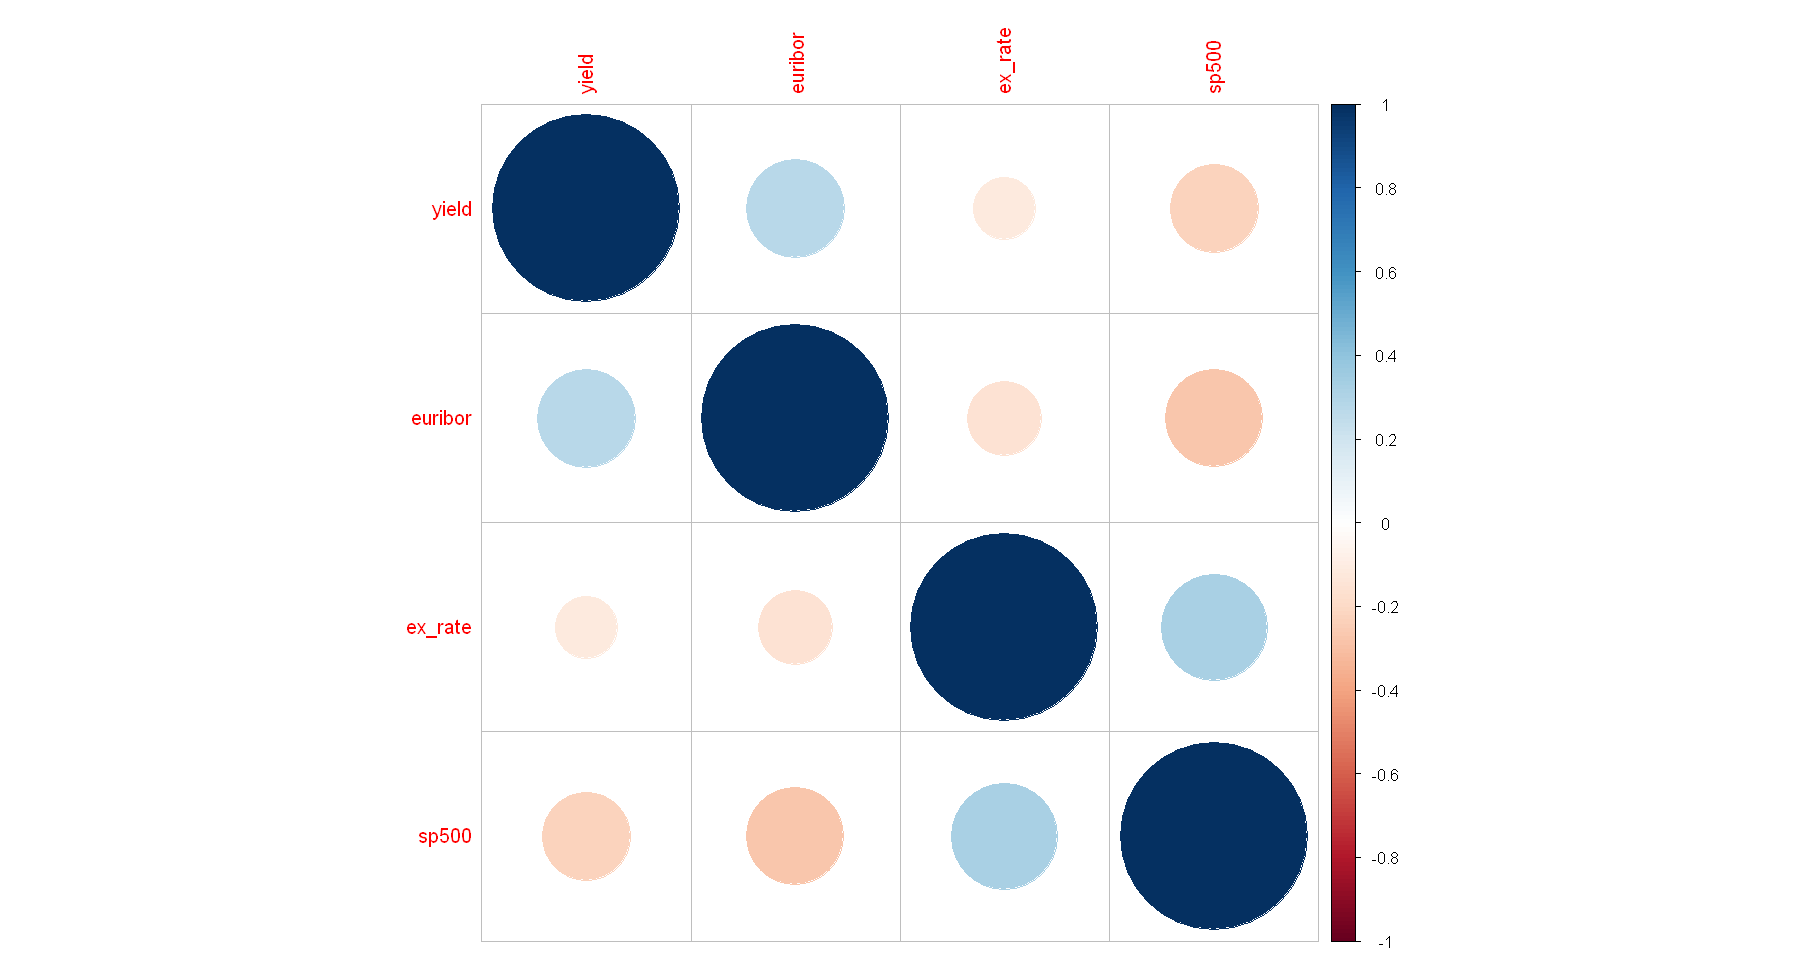

In [288]:
cor_matrix <- cor(country_announcement_yield[, c("yield", "euribor", "ex_rate", "sp500")])

# Visualize correlation matrix
library(corrplot)
corrplot(cor_matrix, method = "circle")

In [289]:
country_announcement_yield$log_sp500 <- log(country_announcement_yield$sp500)

In [290]:
country_announcement_yield <- country_announcement_yield[order(country_announcement_yield$date), ]

In [291]:
country_announcement_yield$lagged_yield <- c(NA, country_announcement_yield$yield[-nrow(country_announcement_yield)])
country_announcement_yield$lagged_euribor <- c(NA, country_announcement_yield$euribor[-nrow(country_announcement_yield)])
country_announcement_yield$lagged_ex_rate <- c(NA, country_announcement_yield$ex_rate[-nrow(country_announcement_yield)])
country_announcement_yield$lagged_sp500 <- c(NA, country_announcement_yield$log_sp500[-nrow(country_announcement_yield)])

In [292]:
country_announcement_yield <- country_announcement_yield %>%
  arrange(date) %>%
  mutate(
    diff_yield_1 = c(rep(NA, 1), diff(yield, lag = 1)),
    diff_yield_2 = c(rep(NA, 2), diff(yield, lag = 2)),
    diff_yield_3 = c(rep(NA, 3), diff(yield, lag = 3)),
    diff_yield_4 = c(rep(NA, 4), diff(yield, lag = 4)),
    diff_yield_5 = c(rep(NA, 5), diff(yield, lag = 5)),
    diff_yield_10 = c(rep(NA, 10), diff(yield, lag = 10)),
    diff_euribor_1 = c(rep(NA, 1), diff(euribor, lag = 1)),
    diff_euribor_2 = c(rep(NA, 2), diff(euribor, lag = 2)),
    diff_euribor_3 = c(rep(NA, 3), diff(euribor, lag = 3)),
    diff_euribor_4 = c(rep(NA, 4), diff(euribor, lag = 4)),
    diff_euribor_5 = c(rep(NA, 5), diff(euribor, lag = 5)),
    diff_euribor_10 = c(rep(NA, 10), diff(euribor, lag = 10)),
    diff_ex_rate_1 = c(rep(NA, 1), diff(ex_rate, lag = 1)),
    diff_ex_rate_2 = c(rep(NA, 2), diff(ex_rate, lag = 2)),
    diff_ex_rate_3 = c(rep(NA, 3), diff(ex_rate, lag = 3)),
    diff_ex_rate_4 = c(rep(NA, 4), diff(ex_rate, lag = 4)),
    diff_ex_rate_5 = c(rep(NA, 5), diff(ex_rate, lag = 5)),
    diff_ex_rate_10 = c(rep(NA, 10), diff(ex_rate, lag = 10)),
    diff_sp500_1 = c(rep(NA, 1), diff(log_sp500, lag = 1)),
    diff_sp500_2 = c(rep(NA, 2), diff(log_sp500, lag = 2)),
    diff_sp500_3 = c(rep(NA, 3), diff(log_sp500, lag = 3)),
    diff_sp500_4 = c(rep(NA, 4), diff(log_sp500, lag = 4)),
    diff_sp500_5 = c(rep(NA, 5), diff(log_sp500, lag = 5)),
    diff_sp500_10 = c(rep(NA, 10), diff(log_sp500, lag = 10))
  )

In [293]:
country_announcement_yield <- country_announcement_yield %>%
  group_by(date, country) %>%
  mutate(sum_announcement = sum(announcement)) %>%
  ungroup()

In [294]:
country_announcement_yield <- country_announcement_yield %>%
  arrange(date, country) %>% 
  mutate(sum_1_day_announcement = rollapply(announcement, width = 1, FUN = sum, fill = NA, align = 'right'))

In [295]:
country_announcement_yield <- country_announcement_yield %>%
  arrange(date, country) %>% 
  mutate(sum_2_day_announcement = rollapply(announcement, width = 2, FUN = sum, fill = NA, align = 'right'))

In [296]:
country_announcement_yield <- country_announcement_yield %>%
  arrange(date, country) %>% 
  mutate(sum_3_day_announcement = rollapply(announcement, width = 3, FUN = sum, fill = NA, align = 'right'))

In [297]:
country_announcement_yield <- country_announcement_yield %>%
  arrange(date, country) %>% 
  mutate(sum_4_day_announcement = rollapply(announcement, width = 4, FUN = sum, fill = NA, align = 'right'))

In [298]:
country_announcement_yield <- country_announcement_yield %>%
  arrange(date, country) %>% 
  mutate(sum_5_day_announcement = rollapply(announcement, width = 5, FUN = sum, fill = NA, align = 'right'))

In [299]:
country_announcement_yield <- country_announcement_yield %>%
  arrange(date, country) %>% 
  mutate(sum_10_day_announcement = rollapply(announcement, width = 10, FUN = sum, fill = NA, align = 'right'))

In [300]:
tail(country_announcement_yield)

date,country,announcement,yield,euribor,ex_rate,sp500,log_sp500,lagged_yield,lagged_euribor,⋯,diff_sp500_4,diff_sp500_5,diff_sp500_10,sum_announcement,sum_1_day_announcement,sum_2_day_announcement,sum_3_day_announcement,sum_4_day_announcement,sum_5_day_announcement,sum_10_day_announcement
<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2023-05-23,SE,0,2.387,3.422,10.62255,4145.58,8.329798,2.351,3.177,⋯,0.04302727,0.04302727,0.12300157,0,0,1,1,2,3,6
2023-06-07,IE,1,2.845,3.459,0.93392,4267.52,8.358788,2.387,3.422,⋯,0.05781006,0.07201743,0.12669636,1,1,1,2,2,3,6
2023-06-19,CZ,1,4.351,3.551,21.73740,4409.59,8.391537,2.845,3.459,⋯,0.07061663,0.09055891,0.09069547,1,1,2,2,3,3,6
2023-07-12,UK,0,4.513,3.657,0.76940,4472.16,8.405627,4.351,3.551,⋯,0.07567444,0.08470643,0.14243850,0,0,1,2,2,3,6
2023-08-02,UK,0,4.404,3.733,0.78810,4513.39,8.414804,4.513,3.657,⋯,0.08500583,0.08485146,0.15748040,0,0,0,1,2,2,6
2023-10-10,UK,1,4.430,3.988,0.81590,4358.24,8.379824,4.404,3.733,⋯,0.02103544,0.05002560,0.09305287,1,1,1,1,2,3,6


In [301]:
country_announcement_yield$lagged_yield_1 <- c(NA, country_announcement_yield$diff_yield_1[-nrow(country_announcement_yield)])
country_announcement_yield$lagged_yield_2 <- c(NA, country_announcement_yield$diff_yield_2[-nrow(country_announcement_yield)])
country_announcement_yield$lagged_yield_3 <- c(NA, country_announcement_yield$diff_yield_3[-nrow(country_announcement_yield)])
country_announcement_yield$lagged_yield_4 <- c(NA, country_announcement_yield$diff_yield_4[-nrow(country_announcement_yield)])
country_announcement_yield$lagged_yield_5 <- c(NA, country_announcement_yield$diff_yield_5[-nrow(country_announcement_yield)])
country_announcement_yield$lagged_yield_10 <- c(NA, country_announcement_yield$diff_yield_10[-nrow(country_announcement_yield)])

In [302]:
tail(country_announcement_yield)

date,country,announcement,yield,euribor,ex_rate,sp500,log_sp500,lagged_yield,lagged_euribor,⋯,sum_3_day_announcement,sum_4_day_announcement,sum_5_day_announcement,sum_10_day_announcement,lagged_yield_1,lagged_yield_2,lagged_yield_3,lagged_yield_4,lagged_yield_5,lagged_yield_10
<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2023-05-23,SE,0,2.387,3.422,10.62255,4145.58,8.329798,2.351,3.177,⋯,1,2,3,6,-2.230,0.123,-0.833,-2.216,-1.020,0.763
2023-06-07,IE,1,2.845,3.459,0.93392,4267.52,8.358788,2.387,3.422,⋯,2,2,3,6,0.036,-2.194,0.159,-0.797,-2.180,-1.518
2023-06-19,CZ,1,4.351,3.551,21.73740,4409.59,8.391537,2.845,3.459,⋯,2,3,3,6,0.458,0.494,-1.736,0.617,-0.339,-0.554
2023-07-12,UK,0,4.513,3.657,0.76940,4472.16,8.405627,4.351,3.551,⋯,2,2,3,6,1.506,1.964,2.000,-0.230,2.123,2.091
2023-08-02,UK,0,4.404,3.733,0.78810,4513.39,8.414804,4.513,3.657,⋯,1,2,2,6,0.162,1.668,2.126,2.162,-0.068,0.938
2023-10-10,UK,1,4.430,3.988,0.81590,4358.24,8.379824,4.404,3.733,⋯,1,2,3,6,-0.109,0.053,1.559,2.017,2.053,1.033


In [303]:
country_announcement_stoxx <- read.xlsx("country_announcement_stoxx.xlsx")

In [304]:
country_announcement_stoxx$date <- as.Date(country_announcement_stoxx$date, origin = "1899-12-30")

# Check the results
head(country_announcement_stoxx)

,date,country,announcement,stoxx,euribor,ex_rate,sp500
,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2001-02-02,DE,0,4813.99,4.724,1.07135,1349.47
2,2001-04-30,FR,1,3838.15,4.802,1.12790,1249.46
3,2006-05-29,DE,0,8294.47,2.919,0.78398,1280.16
4,2008-09-17,DE,0,7497.52,4.973,0.70455,1156.39
5,2008-10-28,UK,0,5699.26,4.860,0.64140,940.50
6,2009-01-27,UK,1,6258.57,2.130,0.70570,845.71


#### Specification tests on data

In [305]:
adf_result_country2 <- adf.test(country_announcement_stoxx$stoxx, alternative = "stationary")

# Print the test results
print(adf_result_country2)

Warning message in adf.test(country_announcement_stoxx$stoxx, alternative = "stationary"):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  country_announcement_stoxx$stoxx
Dickey-Fuller = -6.5799, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary



The results suggest stationarity of time series.

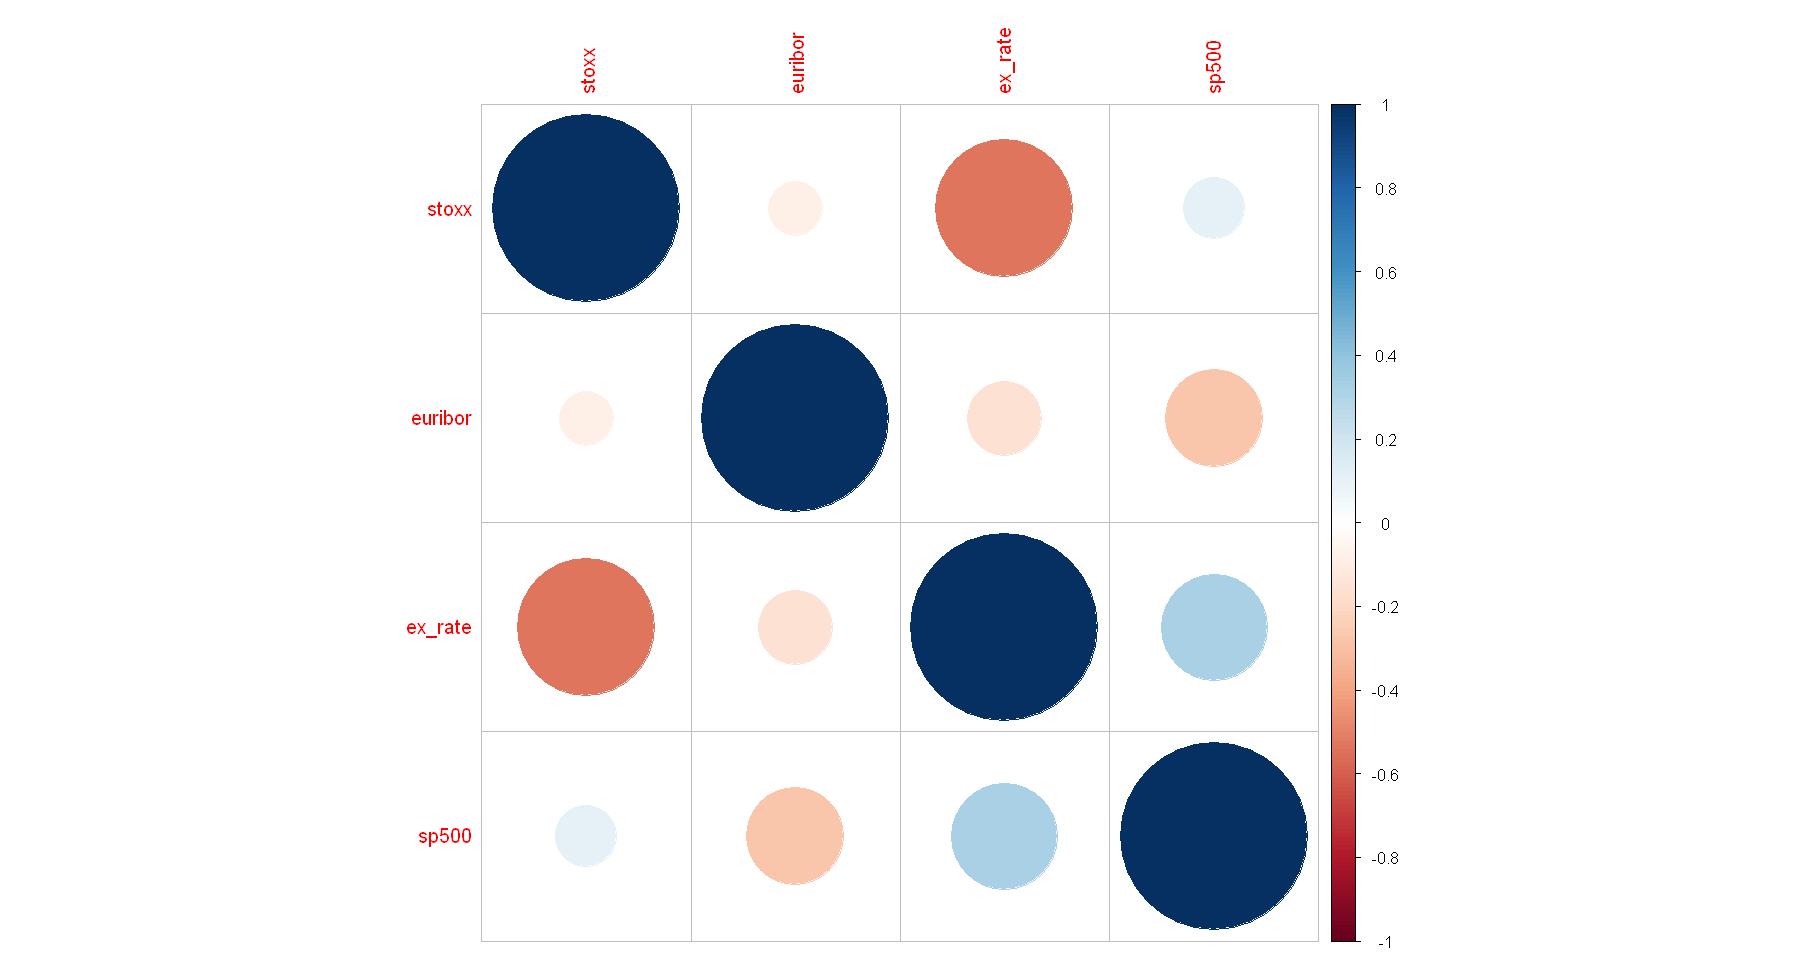

In [306]:
cor_matrix <- cor(country_announcement_stoxx[, c("stoxx", "euribor", "ex_rate", "sp500")])

# Visualize correlation matrix
library(corrplot)
corrplot(cor_matrix, method = "circle")

In [307]:
country_announcement_stoxx$log_sp500 <- log(country_announcement_stoxx$sp500)

In [308]:
country_announcement_stoxx$log_stoxx <- log(country_announcement_stoxx$stoxx)

In [309]:
country_announcement_stoxx <- country_announcement_stoxx[order(country_announcement_stoxx$date), ]

In [310]:
country_announcement_stoxx$lagged_stoxx <- c(NA, country_announcement_stoxx$log_stoxx[-nrow(country_announcement_stoxx)])
country_announcement_stoxx$lagged_euribor <- c(NA, country_announcement_stoxx$euribor[-nrow(country_announcement_stoxx)])
country_announcement_stoxx$lagged_ex_rate <- c(NA, country_announcement_stoxx$ex_rate[-nrow(country_announcement_stoxx)])
country_announcement_stoxx$lagged_sp500 <- c(NA, country_announcement_stoxx$log_sp500[-nrow(country_announcement_stoxx)])

In [311]:
country_announcement_stoxx <- country_announcement_stoxx %>%
  arrange(date) %>%
  mutate(
    diff_stoxx_1 = c(rep(NA, 1), diff(log_stoxx, lag = 1)),
    diff_stoxx_2 = c(rep(NA, 2), diff(log_stoxx, lag = 2)),
    diff_stoxx_3 = c(rep(NA, 3), diff(log_stoxx, lag = 3)),
    diff_stoxx_4 = c(rep(NA, 4), diff(log_stoxx, lag = 4)),
    diff_stoxx_5 = c(rep(NA, 5), diff(log_stoxx, lag = 5)),
    diff_stoxx_10 = c(rep(NA, 10), diff(log_stoxx, lag = 10)),
    diff_euribor_1 = c(rep(NA, 1), diff(euribor, lag = 1)),
    diff_euribor_2 = c(rep(NA, 2), diff(euribor, lag = 2)),
    diff_euribor_3 = c(rep(NA, 3), diff(euribor, lag = 3)),
    diff_euribor_4 = c(rep(NA, 4), diff(euribor, lag = 4)),
    diff_euribor_5 = c(rep(NA, 5), diff(euribor, lag = 5)),
    diff_euribor_10 = c(rep(NA, 10), diff(euribor, lag = 10)),
    diff_ex_rate_1 = c(rep(NA, 1), diff(ex_rate, lag = 1)),
    diff_ex_rate_2 = c(rep(NA, 2), diff(ex_rate, lag = 2)),
    diff_ex_rate_3 = c(rep(NA, 3), diff(ex_rate, lag = 3)),
    diff_ex_rate_4 = c(rep(NA, 4), diff(ex_rate, lag = 4)),
    diff_ex_rate_5 = c(rep(NA, 5), diff(ex_rate, lag = 5)),
    diff_ex_rate_10 = c(rep(NA, 10), diff(ex_rate, lag = 10)),
    diff_sp500_1 = c(rep(NA, 1), diff(log_sp500, lag = 1)),
    diff_sp500_2 = c(rep(NA, 2), diff(log_sp500, lag = 2)),
    diff_sp500_3 = c(rep(NA, 3), diff(log_sp500, lag = 3)),
    diff_sp500_4 = c(rep(NA, 4), diff(log_sp500, lag = 4)),
    diff_sp500_5 = c(rep(NA, 5), diff(log_sp500, lag = 5)),
    diff_sp500_10 = c(rep(NA, 10), diff(log_sp500, lag = 10))
  )

In [312]:
country_announcement_stoxx <- country_announcement_stoxx %>%
  group_by(date, country) %>%
  mutate(sum_announcement = sum(announcement)) %>%
  ungroup()

In [313]:
country_announcement_stoxx <- country_announcement_stoxx %>%
  arrange(date, country) %>% 
  mutate(sum_1_day_announcement = rollapply(announcement, width = 1, FUN = sum, fill = NA, align = 'right'))

In [314]:
country_announcement_stoxx <- country_announcement_stoxx %>%
  arrange(date, country) %>% 
  mutate(sum_2_day_announcement = rollapply(announcement, width = 2, FUN = sum, fill = NA, align = 'right'))

In [315]:
country_announcement_stoxx <- country_announcement_stoxx %>%
  arrange(date, country) %>% 
  mutate(sum_3_day_announcement = rollapply(announcement, width = 3, FUN = sum, fill = NA, align = 'right'))

In [316]:
country_announcement_stoxx <- country_announcement_stoxx %>%
  arrange(date, country) %>% 
  mutate(sum_4_day_announcement = rollapply(announcement, width = 4, FUN = sum, fill = NA, align = 'right'))

In [317]:
country_announcement_stoxx <- country_announcement_stoxx %>%
  arrange(date, country) %>% 
  mutate(sum_5_day_announcement = rollapply(announcement, width = 5, FUN = sum, fill = NA, align = 'right'))

In [318]:
country_announcement_stoxx <- country_announcement_stoxx %>%
  arrange(date, country) %>% 
  mutate(sum_10_day_announcement = rollapply(announcement, width = 10, FUN = sum, fill = NA, align = 'right'))

In [319]:
country_announcement_stoxx$lagged_stoxx_1 <- c(NA, country_announcement_stoxx$diff_stoxx_1[-nrow(country_announcement_stoxx)])
country_announcement_stoxx$lagged_stoxx_2 <- c(NA, country_announcement_stoxx$diff_stoxx_2[-nrow(country_announcement_stoxx)])
country_announcement_stoxx$lagged_stoxx_3 <- c(NA, country_announcement_stoxx$diff_stoxx_3[-nrow(country_announcement_stoxx)])
country_announcement_stoxx$lagged_stoxx_4 <- c(NA, country_announcement_stoxx$diff_stoxx_4[-nrow(country_announcement_stoxx)])
country_announcement_stoxx$lagged_stoxx_5 <- c(NA, country_announcement_stoxx$diff_stoxx_5[-nrow(country_announcement_stoxx)])
country_announcement_stoxx$lagged_stoxx_10 <- c(NA, country_announcement_stoxx$diff_stoxx_10[-nrow(country_announcement_stoxx)])

In [320]:
country_announcement_vstoxx <- read.xlsx("country_announcement_vstoxx.xlsx")

In [321]:
country_announcement_vstoxx$date <- as.Date(country_announcement_vstoxx$date, origin = "1899-12-30")

# Check the results
head(country_announcement_vstoxx)

,date,country,announcement,vstoxx,euribor,ex_rate,sp500
,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2001-02-02,DE,0,21.17,4.724,1.07135,1349.47
2,2001-04-30,FR,1,21.21,4.802,1.12790,1249.46
3,2006-05-29,DE,0,20.99,2.919,0.78398,1280.16
4,2008-09-17,DE,0,37.53,4.973,0.70455,1156.39
5,2008-10-28,UK,0,74.69,4.860,0.64140,940.50
6,2009-01-27,UK,1,44.60,2.130,0.70570,845.71


#### Specification tests on data

In [322]:
adf_result_country3 <- adf.test(country_announcement_vstoxx$vstoxx, alternative = "stationary")

# Print the test results
print(adf_result_country3)

Warning message in adf.test(country_announcement_vstoxx$vstoxx, alternative = "stationary"):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  country_announcement_vstoxx$vstoxx
Dickey-Fuller = -5.0647, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary



The results suggest stationarity of time series.

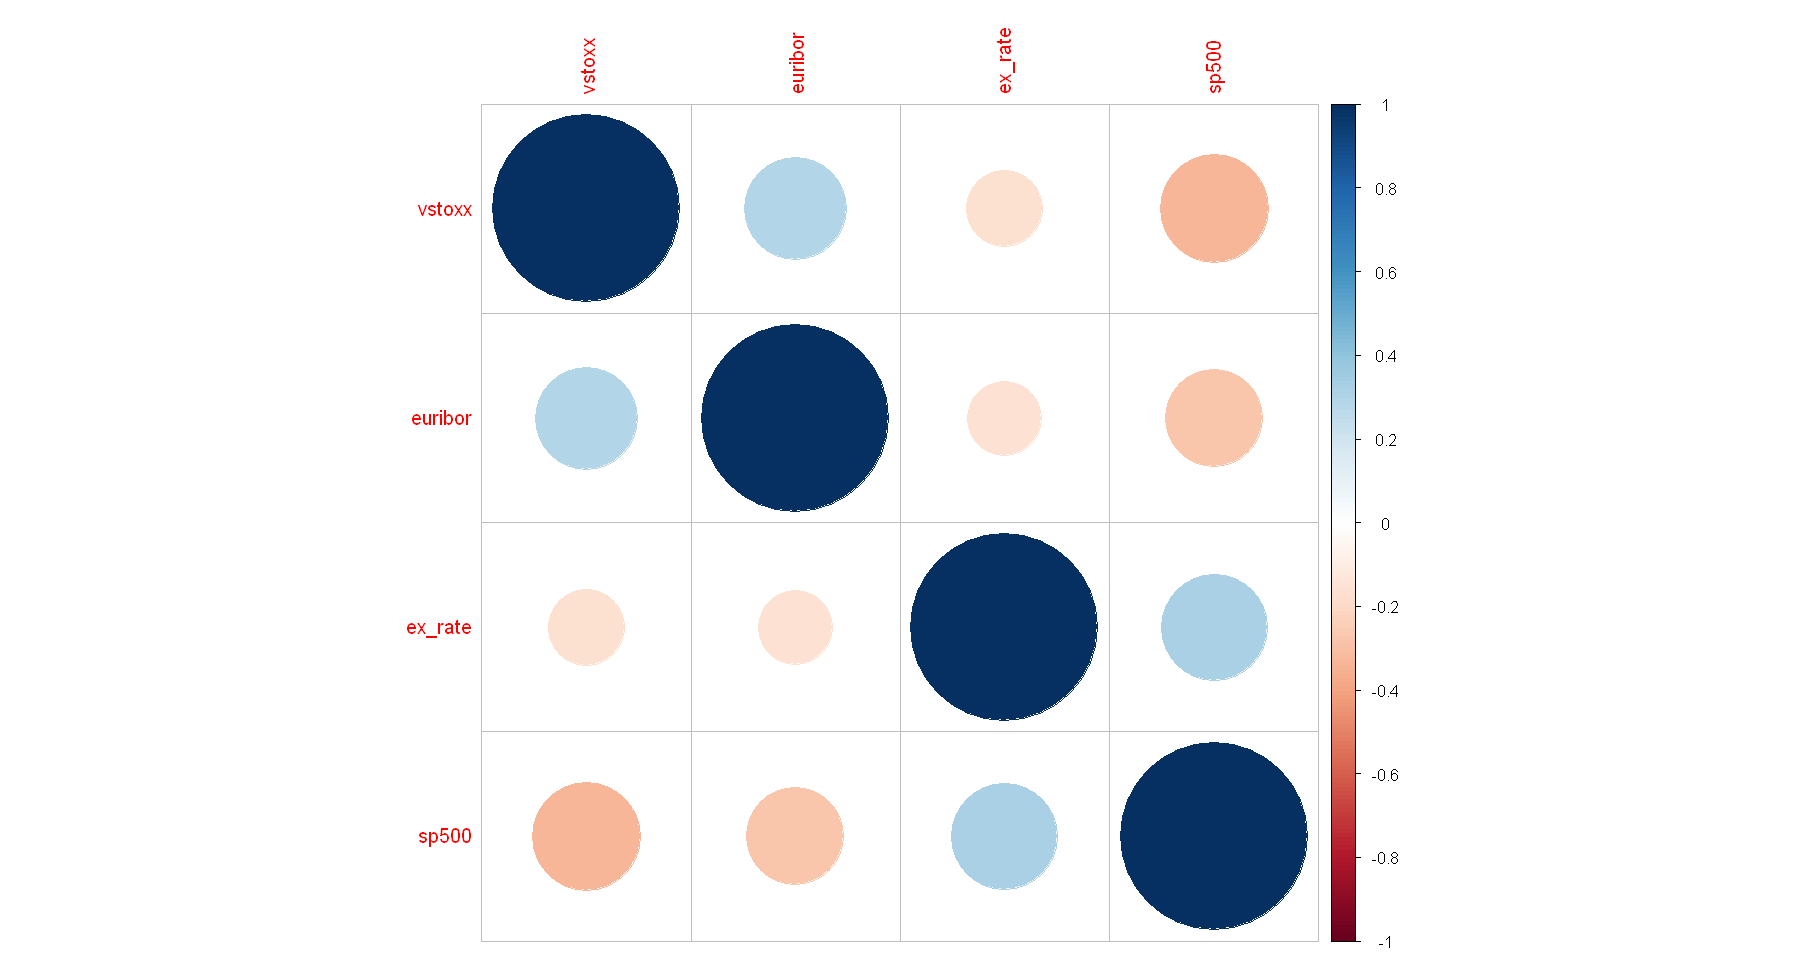

In [323]:
cor_matrix <- cor(country_announcement_vstoxx[, c("vstoxx", "euribor", "ex_rate", "sp500")])

# Visualize correlation matrix
library(corrplot)
corrplot(cor_matrix, method = "circle")

In [324]:
country_announcement_vstoxx$log_sp500 <- log(country_announcement_vstoxx$sp500)

In [325]:
country_announcement_vstoxx <- country_announcement_vstoxx[order(country_announcement_vstoxx$date), ]

In [326]:
country_announcement_vstoxx$lagged_vstoxx <- c(NA, country_announcement_vstoxx$vstoxx[-nrow(country_announcement_vstoxx)])
country_announcement_vstoxx$lagged_euribor <- c(NA, country_announcement_vstoxx$euribor[-nrow(country_announcement_vstoxx)])
country_announcement_vstoxx$lagged_ex_rate <- c(NA, country_announcement_vstoxx$ex_rate[-nrow(country_announcement_vstoxx)])
country_announcement_vstoxx$lagged_sp500 <- c(NA, country_announcement_vstoxx$log_sp500[-nrow(country_announcement_vstoxx)])

In [327]:
country_announcement_vstoxx <- country_announcement_vstoxx %>%
  group_by(date, country) %>%
  mutate(sum_announcement = sum(announcement)) %>%
  ungroup()

In [328]:
country_announcement_vstoxx <- country_announcement_vstoxx %>%
  arrange(date, country) %>% 
  mutate(sum_1_day_announcement = rollapply(announcement, width = 1, FUN = sum, fill = NA, align = 'right'))

In [329]:
country_announcement_vstoxx <- country_announcement_vstoxx %>%
  arrange(date, country) %>% 
  mutate(sum_2_day_announcement = rollapply(announcement, width = 2, FUN = sum, fill = NA, align = 'right'))

In [330]:
country_announcement_vstoxx <- country_announcement_vstoxx %>%
  arrange(date, country) %>% 
  mutate(sum_3_day_announcement = rollapply(announcement, width = 3, FUN = sum, fill = NA, align = 'right'))

In [331]:
country_announcement_vstoxx <- country_announcement_vstoxx %>%
  arrange(date, country) %>% 
  mutate(sum_4_day_announcement = rollapply(announcement, width = 4, FUN = sum, fill = NA, align = 'right'))

In [332]:
country_announcement_vstoxx <- country_announcement_vstoxx %>%
  arrange(date, country) %>% 
  mutate(sum_5_day_announcement = rollapply(announcement, width = 5, FUN = sum, fill = NA, align = 'right'))

In [333]:
country_announcement_vstoxx <- country_announcement_vstoxx %>%
  arrange(date, country) %>% 
  mutate(sum_10_day_announcement = rollapply(announcement, width = 10, FUN = sum, fill = NA, align = 'right'))

### DIRECTION on Yield

In [334]:
country_direction_yield <- read.xlsx("country_direction_yield.xlsx")

In [335]:
country_direction_yield$date <- as.Date(country_direction_yield$date, origin = "1899-12-30")

# Check the results
head(country_direction_yield)

,date,country,direction,tightening,loosening,yield,euribor,ex_rate,sp500
,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2001-02-02,DE,0,0,0,4.785,4.724,1.07135,1349.47
2,2001-04-30,FR,1,1,0,5.185,4.802,1.12790,1249.46
3,2006-05-29,DE,0,0,0,3.891,2.919,0.78398,1280.16
4,2008-09-17,DE,0,0,0,4.017,4.973,0.70455,1156.39
5,2008-10-28,UK,0,0,0,4.392,4.860,0.64140,940.50
6,2009-01-27,UK,1,1,0,3.671,2.130,0.70570,845.71


In [336]:
country_direction_yield$log_sp500 <- log(country_direction_yield$sp500)

In [337]:
country_direction_yield <- country_direction_yield[order(country_direction_yield$date), ]

In [338]:
country_direction_yield$lagged_yield <- c(NA, country_direction_yield$yield[-nrow(country_direction_yield)])
country_direction_yield$lagged_euribor <- c(NA, country_direction_yield$euribor[-nrow(country_direction_yield)])
country_direction_yield$lagged_ex_rate <- c(NA, country_direction_yield$ex_rate[-nrow(country_direction_yield)])
country_direction_yield$lagged_sp500 <- c(NA, country_direction_yield$log_sp500[-nrow(country_direction_yield)])

In [339]:
country_direction_yield <- country_direction_yield %>%
  arrange(date) %>%
  mutate(
    diff_yield_1 = c(rep(NA, 1), diff(yield, lag = 1)),
    diff_yield_2 = c(rep(NA, 2), diff(yield, lag = 2)),
    diff_yield_3 = c(rep(NA, 3), diff(yield, lag = 3)),
    diff_yield_4 = c(rep(NA, 4), diff(yield, lag = 4)),
    diff_yield_5 = c(rep(NA, 5), diff(yield, lag = 5)),
    diff_yield_10 = c(rep(NA, 10), diff(yield, lag = 10)),
    diff_euribor_1 = c(rep(NA, 1), diff(euribor, lag = 1)),
    diff_euribor_2 = c(rep(NA, 2), diff(euribor, lag = 2)),
    diff_euribor_3 = c(rep(NA, 3), diff(euribor, lag = 3)),
    diff_euribor_4 = c(rep(NA, 4), diff(euribor, lag = 4)),
    diff_euribor_5 = c(rep(NA, 5), diff(euribor, lag = 5)),
    diff_euribor_10 = c(rep(NA, 10), diff(euribor, lag = 10)),
    diff_ex_rate_1 = c(rep(NA, 1), diff(ex_rate, lag = 1)),
    diff_ex_rate_2 = c(rep(NA, 2), diff(ex_rate, lag = 2)),
    diff_ex_rate_3 = c(rep(NA, 3), diff(ex_rate, lag = 3)),
    diff_ex_rate_4 = c(rep(NA, 4), diff(ex_rate, lag = 4)),
    diff_ex_rate_5 = c(rep(NA, 5), diff(ex_rate, lag = 5)),
    diff_ex_rate_10 = c(rep(NA, 10), diff(ex_rate, lag = 10)),
    diff_sp500_1 = c(rep(NA, 1), diff(log_sp500, lag = 1)),
    diff_sp500_2 = c(rep(NA, 2), diff(log_sp500, lag = 2)),
    diff_sp500_3 = c(rep(NA, 3), diff(log_sp500, lag = 3)),
    diff_sp500_4 = c(rep(NA, 4), diff(log_sp500, lag = 4)),
    diff_sp500_5 = c(rep(NA, 5), diff(log_sp500, lag = 5)),
    diff_sp500_10 = c(rep(NA, 10), diff(log_sp500, lag = 10))
  )

In [340]:
country_direction_yield <- country_direction_yield %>%
  group_by(date, country) %>%
  mutate(sum_announcement = sum(direction)) %>%
  ungroup()

In [341]:
country_direction_yield <- country_direction_yield %>%
  group_by(date, country) %>%
  mutate(sum_tightening = sum(tightening)) %>%
  ungroup()

In [342]:
country_direction_yield <- country_direction_yield %>%
  group_by(date, country) %>%
  mutate(sum_loosening = sum(loosening)) %>%
  ungroup()

In [343]:
country_direction_yield <- country_direction_yield %>%
  arrange(date, country) %>% 
  mutate(sum_1_day_tightening = rollapply(tightening, width = 1, FUN = sum, fill = NA, align = 'right'))

In [344]:
country_direction_yield <- country_direction_yield %>%
  arrange(date, country) %>% 
  mutate(sum_2_day_tightening = rollapply(tightening, width = 2, FUN = sum, fill = NA, align = 'right'))

In [345]:
country_direction_yield <- country_direction_yield %>%
  arrange(date, country) %>% 
  mutate(sum_3_day_tightening = rollapply(tightening, width = 3, FUN = sum, fill = NA, align = 'right'))

In [346]:
country_direction_yield <- country_direction_yield %>%
  arrange(date, country) %>% 
  mutate(sum_4_day_tightening = rollapply(tightening, width = 4, FUN = sum, fill = NA, align = 'right'))

In [347]:
country_direction_yield <- country_direction_yield %>%
  arrange(date, country) %>% 
  mutate(sum_5_day_tightening = rollapply(tightening, width = 5, FUN = sum, fill = NA, align = 'right'))

In [348]:
country_direction_yield <- country_direction_yield %>%
  arrange(date, country) %>% 
  mutate(sum_10_day_tightening = rollapply(tightening, width = 10, FUN = sum, fill = NA, align = 'right'))

In [349]:
country_direction_yield <- country_direction_yield %>%
  arrange(date, country) %>% 
  mutate(sum_1_day_loosening = rollapply(loosening, width = 1, FUN = sum, fill = NA, align = 'right'))

In [350]:
country_direction_yield <- country_direction_yield %>%
  arrange(date, country) %>% 
  mutate(sum_2_day_loosening = rollapply(loosening, width = 2, FUN = sum, fill = NA, align = 'right'))

In [351]:
country_direction_yield <- country_direction_yield %>%
  arrange(date, country) %>% 
  mutate(sum_3_day_loosening = rollapply(loosening, width = 3, FUN = sum, fill = NA, align = 'right'))

In [352]:
country_direction_yield <- country_direction_yield %>%
  arrange(date, country) %>% 
  mutate(sum_4_day_loosening = rollapply(loosening, width = 4, FUN = sum, fill = NA, align = 'right'))

In [353]:
country_direction_yield <- country_direction_yield %>%
  arrange(date, country) %>% 
  mutate(sum_5_day_loosening = rollapply(loosening, width = 5, FUN = sum, fill = NA, align = 'right'))

In [354]:
country_direction_yield <- country_direction_yield %>%
  arrange(date, country) %>% 
  mutate(sum_10_day_loosening = rollapply(loosening, width = 10, FUN = sum, fill = NA, align = 'right'))

In [355]:
country_direction_yield$lagged_yield_1 <- c(NA, country_direction_yield$diff_yield_1[-nrow(country_direction_yield)])
country_direction_yield$lagged_yield_2 <- c(NA, country_direction_yield$diff_yield_2[-nrow(country_direction_yield)])
country_direction_yield$lagged_yield_3 <- c(NA, country_direction_yield$diff_yield_3[-nrow(country_direction_yield)])
country_direction_yield$lagged_yield_4 <- c(NA, country_direction_yield$diff_yield_4[-nrow(country_direction_yield)])
country_direction_yield$lagged_yield_5 <- c(NA, country_direction_yield$diff_yield_5[-nrow(country_direction_yield)])
country_direction_yield$lagged_yield_10 <- c(NA, country_direction_yield$diff_yield_10[-nrow(country_direction_yield)])

In [356]:
tail(country_direction_yield, 10)

date,country,direction,tightening,loosening,yield,euribor,ex_rate,sp500,log_sp500,⋯,sum_3_day_loosening,sum_4_day_loosening,sum_5_day_loosening,sum_10_day_loosening,lagged_yield_1,lagged_yield_2,lagged_yield_3,lagged_yield_4,lagged_yield_5,lagged_yield_10
<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2023-03-24,ES,1,1,0,3.184,3.025,0.92915,3970.99,8.286771,⋯,0,0,0,0,1.196,0.992,2.307,1.168,0.662,2.254
2023-03-29,SE,1,1,0,2.228,3.015,10.41275,4027.81,8.300978,⋯,0,0,0,0,-1.383,-0.187,-0.391,0.924,-0.215,1.199
2023-04-11,CZ,0,0,0,4.581,3.108,21.52855,4108.94,8.320920,⋯,0,0,0,0,-0.956,-2.339,-1.143,-1.347,-0.032,-2.461
2023-04-13,SE,1,1,0,2.351,3.177,10.28425,4146.22,8.329952,⋯,0,0,0,0,2.353,1.397,0.014,1.210,1.006,0.006
2023-05-23,SE,0,0,0,2.387,3.422,10.62255,4145.58,8.329798,⋯,0,0,0,0,-2.230,0.123,-0.833,-2.216,-1.020,0.763
2023-06-07,IE,1,1,0,2.845,3.459,0.93392,4267.52,8.358788,⋯,0,0,0,0,0.036,-2.194,0.159,-0.797,-2.180,-1.518
2023-06-19,CZ,1,1,0,4.351,3.551,21.73740,4409.59,8.391537,⋯,0,0,0,0,0.458,0.494,-1.736,0.617,-0.339,-0.554
2023-07-12,UK,0,0,0,4.513,3.657,0.76940,4472.16,8.405627,⋯,0,0,0,0,1.506,1.964,2.000,-0.230,2.123,2.091
2023-08-02,UK,0,0,0,4.404,3.733,0.78810,4513.39,8.414804,⋯,0,0,0,0,0.162,1.668,2.126,2.162,-0.068,0.938


### DIRECTION on STOXX

In [357]:
country_direction_stoxx <- read.xlsx("country_direction_stoxx.xlsx")

In [358]:
country_direction_stoxx$date <- as.Date(country_direction_stoxx$date, origin = "1899-12-30")

# Check the results
head(country_direction_stoxx)

,date,country,direction,tightening,loosening,stoxx,euribor,ex_rate,sp500
,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2001-02-02,DE,0,0,0,4813.99,4.724,1.07135,1349.47
2,2001-04-30,FR,1,1,0,3838.15,4.802,1.12790,1249.46
3,2006-05-29,DE,0,0,0,8294.47,2.919,0.78398,1280.16
4,2008-09-17,DE,0,0,0,7497.52,4.973,0.70455,1156.39
5,2008-10-28,UK,0,0,0,5699.26,4.860,0.64140,940.50
6,2009-01-27,UK,1,1,0,6258.57,2.130,0.70570,845.71


In [359]:
country_direction_stoxx$log_stoxx <- log(country_direction_stoxx$stoxx)

In [360]:
country_direction_stoxx$log_sp500 <- log(country_direction_stoxx$sp500)

In [361]:
country_direction_stoxx <- country_direction_stoxx[order(country_direction_stoxx$date), ]

In [362]:
country_direction_stoxx$lagged_stoxx <- c(NA, country_direction_stoxx$log_stoxx[-nrow(country_direction_stoxx)])
country_direction_stoxx$lagged_euribor <- c(NA, country_direction_stoxx$euribor[-nrow(country_direction_stoxx)])
country_direction_stoxx$lagged_ex_rate <- c(NA, country_direction_stoxx$ex_rate[-nrow(country_direction_stoxx)])
country_direction_stoxx$lagged_sp500 <- c(NA, country_direction_stoxx$log_sp500[-nrow(country_direction_stoxx)])

In [363]:
country_direction_stoxx <- country_direction_stoxx %>%
  arrange(date) %>%
  mutate(
    diff_stoxx_1 = c(rep(NA, 1), diff(log_stoxx, lag = 1)),
    diff_stoxx_2 = c(rep(NA, 2), diff(log_stoxx, lag = 2)),
    diff_stoxx_3 = c(rep(NA, 3), diff(log_stoxx, lag = 3)),
    diff_stoxx_4 = c(rep(NA, 4), diff(log_stoxx, lag = 4)),
    diff_stoxx_5 = c(rep(NA, 5), diff(log_stoxx, lag = 5)),
    diff_stoxx_10 = c(rep(NA, 10), diff(log_stoxx, lag = 10)),
    diff_euribor_1 = c(rep(NA, 1), diff(euribor, lag = 1)),
    diff_euribor_2 = c(rep(NA, 2), diff(euribor, lag = 2)),
    diff_euribor_3 = c(rep(NA, 3), diff(euribor, lag = 3)),
    diff_euribor_4 = c(rep(NA, 4), diff(euribor, lag = 4)),
    diff_euribor_5 = c(rep(NA, 5), diff(euribor, lag = 5)),
    diff_euribor_10 = c(rep(NA, 10), diff(euribor, lag = 10)),
    diff_ex_rate_1 = c(rep(NA, 1), diff(ex_rate, lag = 1)),
    diff_ex_rate_2 = c(rep(NA, 2), diff(ex_rate, lag = 2)),
    diff_ex_rate_3 = c(rep(NA, 3), diff(ex_rate, lag = 3)),
    diff_ex_rate_4 = c(rep(NA, 4), diff(ex_rate, lag = 4)),
    diff_ex_rate_5 = c(rep(NA, 5), diff(ex_rate, lag = 5)),
    diff_ex_rate_10 = c(rep(NA, 10), diff(ex_rate, lag = 10)),
    diff_sp500_1 = c(rep(NA, 1), diff(log_sp500, lag = 1)),
    diff_sp500_2 = c(rep(NA, 2), diff(log_sp500, lag = 2)),
    diff_sp500_3 = c(rep(NA, 3), diff(log_sp500, lag = 3)),
    diff_sp500_4 = c(rep(NA, 4), diff(log_sp500, lag = 4)),
    diff_sp500_5 = c(rep(NA, 5), diff(log_sp500, lag = 5)),
    diff_sp500_10 = c(rep(NA, 10), diff(log_sp500, lag = 10))
  )

In [364]:
country_direction_stoxx <- country_direction_stoxx %>%
  group_by(date, country) %>%
  mutate(sum_direction = sum(direction)) %>%
  ungroup()

In [365]:
country_direction_stoxx <- country_direction_stoxx %>%
  group_by(date, country) %>%
  mutate(sum_tightening = sum(tightening)) %>%
  ungroup()

In [366]:
country_direction_stoxx <- country_direction_stoxx %>%
  group_by(date, country) %>%
  mutate(sum_loosening = sum(loosening)) %>%
  ungroup()

In [367]:
country_direction_stoxx <- country_direction_stoxx %>%
  arrange(date, country) %>% 
  mutate(sum_1_day_tightening = rollapply(tightening, width = 1, FUN = sum, fill = NA, align = 'right'))

In [368]:
country_direction_stoxx <- country_direction_stoxx %>%
  arrange(date, country) %>% 
  mutate(sum_2_day_tightening = rollapply(tightening, width = 2, FUN = sum, fill = NA, align = 'right'))

In [369]:
country_direction_stoxx <- country_direction_stoxx %>%
  arrange(date, country) %>% 
  mutate(sum_3_day_tightening = rollapply(tightening, width = 3, FUN = sum, fill = NA, align = 'right'))

In [370]:
country_direction_stoxx <- country_direction_stoxx %>%
  arrange(date, country) %>% 
  mutate(sum_4_day_tightening = rollapply(tightening, width = 4, FUN = sum, fill = NA, align = 'right'))

In [371]:
country_direction_stoxx <- country_direction_stoxx %>%
  arrange(date, country) %>% 
  mutate(sum_5_day_tightening = rollapply(tightening, width = 5, FUN = sum, fill = NA, align = 'right'))

In [372]:
country_direction_stoxx <- country_direction_stoxx %>%
  arrange(date, country) %>% 
  mutate(sum_10_day_tightening = rollapply(tightening, width = 10, FUN = sum, fill = NA, align = 'right'))

In [373]:
country_direction_stoxx <- country_direction_stoxx %>%
  arrange(date, country) %>% 
  mutate(sum_1_day_loosening = rollapply(loosening, width = 1, FUN = sum, fill = NA, align = 'right'))

In [374]:
country_direction_stoxx <- country_direction_stoxx %>%
  arrange(date, country) %>% 
  mutate(sum_2_day_loosening = rollapply(loosening, width = 2, FUN = sum, fill = NA, align = 'right'))

In [375]:
country_direction_stoxx <- country_direction_stoxx %>%
  arrange(date, country) %>% 
  mutate(sum_3_day_loosening = rollapply(loosening, width = 3, FUN = sum, fill = NA, align = 'right'))

In [376]:
country_direction_stoxx <- country_direction_stoxx %>%
  arrange(date, country) %>% 
  mutate(sum_4_day_loosening = rollapply(loosening, width = 4, FUN = sum, fill = NA, align = 'right'))

In [377]:
country_direction_stoxx <- country_direction_stoxx %>%
  arrange(date, country) %>% 
  mutate(sum_5_day_loosening = rollapply(loosening, width = 5, FUN = sum, fill = NA, align = 'right'))

In [378]:
country_direction_stoxx <- country_direction_stoxx %>%
  arrange(date, country) %>% 
  mutate(sum_10_day_loosening = rollapply(loosening, width = 10, FUN = sum, fill = NA, align = 'right'))

In [379]:
country_direction_stoxx$lagged_stoxx_1 <- c(NA, country_direction_stoxx$diff_stoxx_1[-nrow(country_direction_stoxx)])
country_direction_stoxx$lagged_stoxx_2 <- c(NA, country_direction_stoxx$diff_stoxx_2[-nrow(country_direction_stoxx)])
country_direction_stoxx$lagged_stoxx_3 <- c(NA, country_direction_stoxx$diff_stoxx_3[-nrow(country_direction_stoxx)])
country_direction_stoxx$lagged_stoxx_4 <- c(NA, country_direction_stoxx$diff_stoxx_4[-nrow(country_direction_stoxx)])
country_direction_stoxx$lagged_stoxx_5 <- c(NA, country_direction_stoxx$diff_stoxx_5[-nrow(country_direction_stoxx)])
country_direction_stoxx$lagged_stoxx_10 <- c(NA, country_direction_stoxx$diff_stoxx_10[-nrow(country_direction_stoxx)])

In [380]:
tail(country_direction_stoxx,10)

date,country,direction,tightening,loosening,stoxx,euribor,ex_rate,sp500,log_stoxx,⋯,sum_3_day_loosening,sum_4_day_loosening,sum_5_day_loosening,sum_10_day_loosening,lagged_stoxx_1,lagged_stoxx_2,lagged_stoxx_3,lagged_stoxx_4,lagged_stoxx_5,lagged_stoxx_10
<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2023-03-24,ES,1,1,0,8792.50,3.025,0.92915,3970.99,9.081654,⋯,0,0,0,0,-2.680044056,-2.68209082,-1.73935296,-2.6472504,-2.60068783,-1.6294159945
2023-03-29,SE,1,1,0,813.95,3.015,10.41275,4027.81,6.701899,⋯,0,0,0,0,1.918753118,-0.76129094,-0.76333770,0.1794002,-0.72849731,2.4685789185
2023-04-11,CZ,0,0,0,1405.30,3.108,21.52855,4108.94,7.248006,⋯,0,0,0,0,-2.379755425,-0.46100231,-3.14104636,-3.1430931,-2.20035527,-0.4029926149
2023-04-13,SE,1,1,0,848.86,3.177,10.28425,4146.22,6.743894,⋯,0,0,0,0,0.546107143,-1.83364828,0.08510484,-2.5949392,-2.59698599,0.1474922352
2023-05-23,SE,0,0,0,851.31,3.422,10.62255,4145.58,6.746776,⋯,0,0,0,0,-0.504111809,0.04199533,-2.33776009,-0.4190070,-3.09905103,-2.1400426022
2023-06-07,IE,1,1,0,8585.99,3.459,0.93392,4267.52,9.057887,⋯,0,0,0,0,0.002882067,-0.50122974,0.04487740,-2.3348780,-0.41612491,-3.0168127363
2023-06-19,CZ,1,1,0,1326.10,3.551,21.73740,4409.59,7.189998,⋯,0,0,0,0,2.311110745,2.31399281,1.80988100,2.3559881,-0.02376728,-0.7522645884
2023-07-12,UK,0,0,0,18579.54,3.657,0.76940,4472.16,9.829816,⋯,0,0,0,0,-1.867889501,0.44322124,0.44610331,-0.0580085,0.48809864,-1.7122566287
2023-08-02,UK,0,0,0,18812.88,3.733,0.78810,4513.39,9.842297,⋯,0,0,0,0,2.639818672,0.77192917,3.08303991,3.0859220,2.58181017,-0.0151758145


### DIRECTION on VSTOXX

In [381]:
country_direction_vstoxx <- read.xlsx("country_direction_vstoxx.xlsx")

In [382]:
country_direction_vstoxx$date <- as.Date(country_direction_vstoxx$date, origin = "1899-12-30")

# Check the results
head(country_direction_vstoxx)

,date,country,direction,tightening,loosening,vstoxx,euribor,ex_rate,sp500
,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2001-02-02,DE,0,0,0,21.17,4.724,1.07135,1349.47
2,2001-04-30,FR,1,1,0,21.21,4.802,1.12790,1249.46
3,2006-05-29,DE,0,0,0,20.99,2.919,0.78398,1280.16
4,2008-09-17,DE,0,0,0,37.53,4.973,0.70455,1156.39
5,2008-10-28,UK,0,0,0,74.69,4.860,0.64140,940.50
6,2009-01-27,UK,1,1,0,44.60,2.130,0.70570,845.71


In [383]:
country_direction_vstoxx$log_sp500 <- log(country_direction_vstoxx$sp500)

In [384]:
country_direction_vstoxx <- country_direction_vstoxx[order(country_direction_vstoxx$date), ]

In [385]:
country_direction_vstoxx$lagged_vstoxx <- c(NA, country_direction_vstoxx$vstoxx[-nrow(country_direction_vstoxx)])
country_direction_vstoxx$lagged_euribor <- c(NA, country_direction_vstoxx$euribor[-nrow(country_direction_vstoxx)])
country_direction_vstoxx$lagged_ex_rate <- c(NA, country_direction_vstoxx$ex_rate[-nrow(country_direction_vstoxx)])
country_direction_vstoxx$lagged_sp500 <- c(NA, country_direction_vstoxx$log_sp500[-nrow(country_direction_vstoxx)])

In [386]:
country_direction_vstoxx <- country_direction_vstoxx %>%
  group_by(date, country) %>%
  mutate(sum_direction = sum(direction)) %>%
  ungroup()

In [387]:
country_direction_vstoxx <- country_direction_vstoxx %>%
  group_by(date, country) %>%
  mutate(sum_tightening = sum(tightening)) %>%
  ungroup()

In [388]:
country_direction_vstoxx <- country_direction_vstoxx %>%
  group_by(date, country) %>%
  mutate(sum_loosening = sum(loosening)) %>%
  ungroup()

In [389]:
country_direction_vstoxx <- country_direction_vstoxx %>%
  arrange(date, country) %>% 
  mutate(sum_1_day_tightening = rollapply(tightening, width = 1, FUN = sum, fill = NA, align = 'right'))

In [390]:
country_direction_vstoxx <- country_direction_vstoxx %>%
  arrange(date, country) %>% 
  mutate(sum_2_day_tightening = rollapply(tightening, width = 2, FUN = sum, fill = NA, align = 'right'))

In [391]:
country_direction_vstoxx <- country_direction_vstoxx %>%
  arrange(date, country) %>% 
  mutate(sum_3_day_tightening = rollapply(tightening, width = 3, FUN = sum, fill = NA, align = 'right'))

In [392]:
country_direction_vstoxx <- country_direction_vstoxx %>%
  arrange(date, country) %>% 
  mutate(sum_4_day_tightening = rollapply(tightening, width = 4, FUN = sum, fill = NA, align = 'right'))

In [393]:
country_direction_vstoxx <- country_direction_vstoxx %>%
  arrange(date, country) %>% 
  mutate(sum_5_day_tightening = rollapply(tightening, width = 5, FUN = sum, fill = NA, align = 'right'))

In [394]:
country_direction_vstoxx <- country_direction_vstoxx %>%
  arrange(date, country) %>% 
  mutate(sum_10_day_tightening = rollapply(tightening, width = 10, FUN = sum, fill = NA, align = 'right'))

In [395]:
country_direction_vstoxx <- country_direction_vstoxx %>%
  arrange(date, country) %>% 
  mutate(sum_1_day_loosening = rollapply(loosening, width = 1, FUN = sum, fill = NA, align = 'right'))

In [396]:
country_direction_vstoxx <- country_direction_vstoxx %>%
  arrange(date, country) %>% 
  mutate(sum_2_day_loosening = rollapply(loosening, width = 2, FUN = sum, fill = NA, align = 'right'))

In [397]:
country_direction_vstoxx <- country_direction_vstoxx %>%
  arrange(date, country) %>% 
  mutate(sum_3_day_loosening = rollapply(loosening, width = 3, FUN = sum, fill = NA, align = 'right'))

In [398]:
country_direction_vstoxx <- country_direction_vstoxx %>%
  arrange(date, country) %>% 
  mutate(sum_4_day_loosening = rollapply(loosening, width = 4, FUN = sum, fill = NA, align = 'right'))

In [399]:
country_direction_vstoxx <- country_direction_vstoxx %>%
  arrange(date, country) %>% 
  mutate(sum_5_day_loosening = rollapply(loosening, width = 5, FUN = sum, fill = NA, align = 'right'))

In [400]:
country_direction_vstoxx <- country_direction_vstoxx %>%
  arrange(date, country) %>% 
  mutate(sum_10_day_loosening = rollapply(loosening, width = 10, FUN = sum, fill = NA, align = 'right'))

In [401]:
tail(country_direction_vstoxx,10)

date,country,direction,tightening,loosening,vstoxx,euribor,ex_rate,sp500,log_sp500,⋯,sum_3_day_tightening,sum_4_day_tightening,sum_5_day_tightening,sum_10_day_tightening,sum_1_day_loosening,sum_2_day_loosening,sum_3_day_loosening,sum_4_day_loosening,sum_5_day_loosening,sum_10_day_loosening
<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2023-03-24,ES,1,1,0,24.88,3.025,0.92915,3970.99,8.286771,⋯,2,2,3,6,0,0,0,0,0,0
2023-03-29,SE,1,1,0,20.40,3.015,10.41275,4027.81,8.300978,⋯,3,3,3,7,0,0,0,0,0,0
2023-04-11,CZ,0,0,0,18.82,3.108,21.52855,4108.94,8.320920,⋯,2,3,3,6,0,0,0,0,0,0
2023-04-13,SE,1,1,0,17.64,3.177,10.28425,4146.22,8.329952,⋯,2,3,4,7,0,0,0,0,0,0
2023-05-23,SE,0,0,0,17.67,3.422,10.62255,4145.58,8.329798,⋯,1,2,3,6,0,0,0,0,0,0
2023-06-07,IE,1,1,0,15.33,3.459,0.93392,4267.52,8.358788,⋯,2,2,3,6,0,0,0,0,0,0
2023-06-19,CZ,1,1,0,14.22,3.551,21.73740,4409.59,8.391537,⋯,2,3,3,6,0,0,0,0,0,0
2023-07-12,UK,0,0,0,15.18,3.657,0.76940,4472.16,8.405627,⋯,2,2,3,6,0,0,0,0,0,0
2023-08-02,UK,0,0,0,19.71,3.733,0.78810,4513.39,8.414804,⋯,1,2,2,6,0,0,0,0,0,0


### Country by Country results. Model testing.

#### ANNOUNCEMENT and YIELD

In [402]:
country_announcement_yield_cz <- country_announcement_yield %>%
  filter(country == "CZ")

In [403]:
tail(country_announcement_yield_cz, 5)

date,country,announcement,yield,euribor,ex_rate,sp500,log_sp500,lagged_yield,lagged_euribor,⋯,sum_3_day_announcement,sum_4_day_announcement,sum_5_day_announcement,sum_10_day_announcement,lagged_yield_1,lagged_yield_2,lagged_yield_3,lagged_yield_4,lagged_yield_5,lagged_yield_10
<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2022-07-01,CZ,0,4.689,-0.176,23.82135,3825.33,8.249400,1.985,-0.169,⋯,1,1,2,4,-0.328,-0.537,0.434,1.468,1.468,2.107
2022-07-04,CZ,1,4.575,-0.165,23.74040,3825.33,8.249400,4.689,-0.176,⋯,1,2,2,5,2.704,2.376,2.167,3.138,4.172,4.447
2023-03-24,CZ,1,4.567,3.025,22.01210,3970.99,8.286771,3.371,2.957,⋯,1,2,3,5,-0.204,1.111,-0.028,-0.534,1.783,0.849
2023-04-11,CZ,0,4.581,3.108,21.52855,4108.94,8.320920,2.228,3.015,⋯,2,3,3,6,-0.956,-2.339,-1.143,-1.347,-0.032,-2.461
2023-06-19,CZ,1,4.351,3.551,21.73740,4409.59,8.391537,2.845,3.459,⋯,2,3,3,6,0.458,0.494,-1.736,0.617,-0.339,-0.554


In [404]:
colnames(country_announcement_yield_cz)[colnames(country_announcement_yield_cz)=="diff_yield_5"] <- "CZ5"
colnames(country_announcement_yield_cz)[colnames(country_announcement_yield_cz)=="diff_yield_10"] <- "CZ10"

In [405]:
cz_announcement_yield_day5 <- lm(CZ5 ~ sum_5_day_announcement + diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_yield_5, data = country_announcement_yield_cz)

# Summary of the model
summary(cz_announcement_yield_day5)


Call:
lm(formula = CZ5 ~ sum_5_day_announcement + diff_euribor_5 + 
    diff_ex_rate_5 + diff_sp500_5 + lagged_yield_5, data = country_announcement_yield_cz)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2416 -0.4555 -0.1452  0.4327  2.5253 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)  
(Intercept)             0.4268962  0.5281959   0.808    0.425  
sum_5_day_announcement  0.0008382  0.1623495   0.005    0.996  
diff_euribor_5          0.3200441  0.5845785   0.547    0.588  
diff_ex_rate_5          0.0137682  0.0198844   0.692    0.494  
diff_sp500_5           -0.8911731  1.9454889  -0.458    0.650  
lagged_yield_5          0.3965328  0.1795176   2.209    0.035 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.019 on 30 degrees of freedom
Multiple R-squared:  0.234,	Adjusted R-squared:  0.1063 
F-statistic: 1.832 on 5 and 30 DF,  p-value: 0.1365


In [406]:
cz_announcement_yield_day5_nw <- coeftest(cz_announcement_yield_day5, vcov = NeweyWest(cz_announcement_yield_day5)) #applying robust standard errors
print(cz_announcement_yield_day5_nw)


t test of coefficients:

                          Estimate  Std. Error t value Pr(>|t|)  
(Intercept)             0.42689616  0.50286284  0.8489  0.40264  
sum_5_day_announcement  0.00083825  0.22785674  0.0037  0.99709  
diff_euribor_5          0.32004412  0.59285205  0.5398  0.59329  
diff_ex_rate_5          0.01376820  0.01712538  0.8040  0.42774  
diff_sp500_5           -0.89117313  2.26600601 -0.3933  0.69689  
lagged_yield_5          0.39653276  0.14893600  2.6624  0.01235 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [407]:
cz_announcement_yield_day10 <- lm(CZ10 ~ sum_10_day_announcement + diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_yield_10, data = country_announcement_yield_cz)

# Summary of the model
summary(cz_announcement_yield_day10)


Call:
lm(formula = CZ10 ~ sum_10_day_announcement + diff_euribor_10 + 
    diff_ex_rate_10 + diff_sp500_10 + lagged_yield_10, data = country_announcement_yield_cz)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.43414 -0.62008  0.02038  0.34357  2.29269 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              0.26370    0.62444   0.422 0.675817    
sum_10_day_announcement  0.02191    0.09796   0.224 0.824572    
diff_euribor_10          0.43605    0.20111   2.168 0.038208 *  
diff_ex_rate_10          0.01840    0.01823   1.009 0.320872    
diff_sp500_10            0.13472    1.14478   0.118 0.907107    
lagged_yield_10          0.58611    0.13528   4.333 0.000152 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9012 on 30 degrees of freedom
Multiple R-squared:  0.4365,	Adjusted R-squared:  0.3426 
F-statistic: 4.647 on 5 and 30 DF,  p-value: 0.002934


In [408]:
cz_announcement_yield_day10_nw <- coeftest(cz_announcement_yield_day10, vcov = NeweyWest(cz_announcement_yield_day10)) #applying robust standard errors
print(cz_announcement_yield_day10_nw)


t test of coefficients:

                         Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             0.2637016  0.5842866  0.4513 0.6550030    
sum_10_day_announcement 0.0219052  0.1076567  0.2035 0.8401391    
diff_euribor_10         0.4360470  0.1073686  4.0612 0.0003226 ***
diff_ex_rate_10         0.0183979  0.0098641  1.8651 0.0719698 .  
diff_sp500_10           0.1347158  0.6975463  0.1931 0.8481602    
lagged_yield_10         0.5861092  0.1707870  3.4318 0.0017689 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [409]:
country_announcement_yield_de <- country_announcement_yield %>%
  filter(country == "DE")

In [410]:
colnames(country_announcement_yield_de)[colnames(country_announcement_yield_de)=="diff_yield_5"] <- "DE5"
colnames(country_announcement_yield_de)[colnames(country_announcement_yield_de)=="diff_yield_10"] <- "DE10"

In [411]:
de_announcement_yield_day5 <- lm(DE5 ~ sum_5_day_announcement + diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_yield_5, data = country_announcement_yield_de)

# Summary of the model
summary(de_announcement_yield_day5)


Call:
lm(formula = DE5 ~ sum_5_day_announcement + diff_euribor_5 + 
    diff_ex_rate_5 + diff_sp500_5 + lagged_yield_5, data = country_announcement_yield_de)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2596 -0.6188  0.0373  0.7722  3.4324 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -0.83687    0.62289  -1.344  0.20047    
sum_5_day_announcement -0.06515    0.32651  -0.200  0.84471    
diff_euribor_5         -1.17968    5.32480  -0.222  0.82787    
diff_ex_rate_5          0.11794    0.10831   1.089  0.29456    
diff_sp500_5            9.90642    7.26087   1.364  0.19399    
lagged_yield_5          0.53172    0.12514   4.249  0.00081 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.552 on 14 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.6185,	Adjusted R-squared:  0.4823 
F-statistic:  4.54 on 5 and 14 DF,  p-value: 0.0114


In [412]:
de_announcement_yield_day5_nw <- coeftest(de_announcement_yield_day5, vcov = NeweyWest(de_announcement_yield_day5)) #applying robust standard errors
print(de_announcement_yield_day5_nw)


t test of coefficients:

                        Estimate Std. Error t value  Pr(>|t|)    
(Intercept)            -0.836873   0.271597 -3.0813 0.0081286 ** 
sum_5_day_announcement -0.065154   0.112922 -0.5770 0.5731097    
diff_euribor_5         -1.179684   1.932925 -0.6103 0.5514355    
diff_ex_rate_5          0.117941   0.122217  0.9650 0.3509142    
diff_sp500_5            9.906421  11.099919  0.8925 0.3872207    
lagged_yield_5          0.531724   0.108661  4.8934 0.0002372 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [413]:
de_announcement_yield_day10 <- lm(DE10 ~ sum_10_day_announcement + diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_yield_10, data = country_announcement_yield_de)

# Summary of the model
summary(de_announcement_yield_day10)


Call:
lm(formula = DE10 ~ sum_10_day_announcement + diff_euribor_10 + 
    diff_ex_rate_10 + diff_sp500_10 + lagged_yield_10, data = country_announcement_yield_de)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.09327 -0.25539  0.02547  0.28542  0.69333 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)  
(Intercept)             -0.54585    0.29845  -1.829   0.0888 .
sum_10_day_announcement -0.06058    0.06991  -0.867   0.4008  
diff_euribor_10         -0.33700    0.57385  -0.587   0.5664  
diff_ex_rate_10         -0.02967    0.04914  -0.604   0.5557  
diff_sp500_10            0.50162    1.03346   0.485   0.6349  
lagged_yield_10          0.07404    0.04329   1.710   0.1092  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5334 on 14 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.323,	Adjusted R-squared:  0.08121 
F-statistic: 1.336 on 5 and 14 DF,  p-value: 0

In [414]:
de_announcement_yield_day10_nw <- coeftest(de_announcement_yield_day10, vcov = NeweyWest(de_announcement_yield_day10)) #applying robust standard errors
print(de_announcement_yield_day10_nw)


t test of coefficients:

                         Estimate Std. Error t value Pr(>|t|)  
(Intercept)             -0.545853   0.245947 -2.2194  0.04349 *
sum_10_day_announcement -0.060578   0.053258 -1.1374  0.27445  
diff_euribor_10         -0.336996   0.235058 -1.4337  0.17362  
diff_ex_rate_10         -0.029669   0.039595 -0.7493  0.46608  
diff_sp500_10            0.501615   0.528649  0.9489  0.35878  
lagged_yield_10          0.074041   0.042987  1.7224  0.10701  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [415]:
country_announcement_yield_es <- country_announcement_yield %>%
  filter(country == "ES")

In [416]:
colnames(country_announcement_yield_es)[colnames(country_announcement_yield_es)=="diff_yield_5"] <- "ES5"
colnames(country_announcement_yield_es)[colnames(country_announcement_yield_es)=="diff_yield_10"] <- "ES10"

In [417]:
es_announcement_yield_day5 <- lm(ES5 ~ sum_5_day_announcement + diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_yield_5, data = country_announcement_yield_es)

# Summary of the model
summary(es_announcement_yield_day5)


Call:
lm(formula = ES5 ~ sum_5_day_announcement + diff_euribor_5 + 
    diff_ex_rate_5 + diff_sp500_5 + lagged_yield_5, data = country_announcement_yield_es)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4083 -0.9955 -0.4293  0.5812  4.7133 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)   
(Intercept)            -1.51410    0.98278  -1.541  0.13989   
sum_5_day_announcement  0.83191    0.38249   2.175  0.04247 * 
diff_euribor_5         -0.58601    1.32223  -0.443  0.66263   
diff_ex_rate_5          0.04438    0.05096   0.871  0.39474   
diff_sp500_5           12.85175    6.12031   2.100  0.04933 * 
lagged_yield_5          0.46596    0.15997   2.913  0.00892 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.736 on 19 degrees of freedom
Multiple R-squared:  0.539,	Adjusted R-squared:  0.4176 
F-statistic: 4.442 on 5 and 19 DF,  p-value: 0.007547


In [418]:
es_announcement_yield_day5_nw <- coeftest(es_announcement_yield_day5, vcov = NeweyWest(es_announcement_yield_day5)) #applying robust standard errors
print(es_announcement_yield_day5_nw)


t test of coefficients:

                        Estimate Std. Error t value Pr(>|t|)  
(Intercept)            -1.514104   0.605373 -2.5011  0.02169 *
sum_5_day_announcement  0.831910   0.333898  2.4915  0.02213 *
diff_euribor_5         -0.586007   1.098827 -0.5333  0.60001  
diff_ex_rate_5          0.044379   0.021896  2.0268  0.05695 .
diff_sp500_5           12.851752   7.643729  1.6813  0.10906  
lagged_yield_5          0.465958   0.398297  1.1699  0.25652  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [419]:
es_announcement_yield_day10 <- lm(ES10 ~ sum_10_day_announcement + diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_yield_10, data = country_announcement_yield_es)

# Summary of the model
summary(es_announcement_yield_day10)


Call:
lm(formula = ES10 ~ sum_10_day_announcement + diff_euribor_10 + 
    diff_ex_rate_10 + diff_sp500_10 + lagged_yield_10, data = country_announcement_yield_es)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5758 -1.1611  0.3667  1.1160  3.0188 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)   
(Intercept)             -5.545180   1.442529  -3.844  0.00109 **
sum_10_day_announcement  1.047394   0.276100   3.794  0.00123 **
diff_euribor_10         -0.632165   0.748205  -0.845  0.40868   
diff_ex_rate_10          0.008955   0.053303   0.168  0.86836   
diff_sp500_10            5.547056   3.952448   1.403  0.17662   
lagged_yield_10          0.673069   0.409091   1.645  0.11635   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.174 on 19 degrees of freedom
Multiple R-squared:  0.5489,	Adjusted R-squared:  0.4302 
F-statistic: 4.623 on 5 and 19 DF,  p-value: 0.006281


In [420]:
es_announcement_yield_day10_nw <- coeftest(es_announcement_yield_day10, vcov = NeweyWest(es_announcement_yield_day10)) #applying robust standard errors
print(es_announcement_yield_day10_nw)


t test of coefficients:

                          Estimate Std. Error t value Pr(>|t|)   
(Intercept)             -5.5451801  3.5151741 -1.5775 0.131185   
sum_10_day_announcement  1.0473938  0.5085359  2.0596 0.053403 . 
diff_euribor_10         -0.6321653  0.6683133 -0.9459 0.356069   
diff_ex_rate_10          0.0089546  0.0460203  0.1946 0.847787   
diff_sp500_10            5.5470564  9.3381264  0.5940 0.559504   
lagged_yield_10          0.6730688  0.2342928  2.8728 0.009744 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [421]:
country_announcement_yield_fr <- country_announcement_yield %>%
  filter(country == "FR")

In [422]:
colnames(country_announcement_yield_fr)[colnames(country_announcement_yield_fr)=="diff_yield_5"] <- "FR5"
colnames(country_announcement_yield_fr)[colnames(country_announcement_yield_fr)=="diff_yield_10"] <- "FR10"

In [423]:
fr_announcement_yield_day5 <- lm(FR5 ~ sum_5_day_announcement + diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_yield_5, data = country_announcement_yield_fr)

# Summary of the model
summary(fr_announcement_yield_day5)


Call:
lm(formula = FR5 ~ sum_5_day_announcement + diff_euribor_5 + 
    diff_ex_rate_5 + diff_sp500_5 + lagged_yield_5, data = country_announcement_yield_fr)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5309 -0.3825  0.3656  1.0786  2.1330 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)   
(Intercept)            -3.01227    2.27606  -1.323  0.21831   
sum_5_day_announcement  0.79104    0.84811   0.933  0.37532   
diff_euribor_5         -9.69547   16.34687  -0.593  0.56771   
diff_ex_rate_5         -0.11504    0.09172  -1.254  0.24135   
diff_sp500_5           -9.70356    9.50416  -1.021  0.33392   
lagged_yield_5          1.06028    0.23406   4.530  0.00143 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.532 on 9 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.7322,	Adjusted R-squared:  0.5834 
F-statistic: 4.921 on 5 and 9 DF,  p-value: 0.01903


In [424]:
fr_announcement_yield_day5_nw <- coeftest(fr_announcement_yield_day5, vcov = NeweyWest(fr_announcement_yield_day5)) #applying robust standard errors
print(fr_announcement_yield_day5_nw)


t test of coefficients:

                        Estimate Std. Error t value  Pr(>|t|)    
(Intercept)            -3.012271   1.408566 -2.1385  0.061167 .  
sum_5_day_announcement  0.791038   0.351455  2.2508  0.050941 .  
diff_euribor_5         -9.695468   6.435148 -1.5066  0.166169    
diff_ex_rate_5         -0.115041   0.036530 -3.1493  0.011752 *  
diff_sp500_5           -9.703561   2.113352 -4.5916  0.001306 ** 
lagged_yield_5          1.060284   0.081696 12.9783 3.939e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [425]:
fr_announcement_yield_day10 <- lm(FR10 ~ sum_10_day_announcement + diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_yield_10, data = country_announcement_yield_fr)

# Summary of the model
summary(fr_announcement_yield_day10)


Call:
lm(formula = FR10 ~ sum_10_day_announcement + diff_euribor_10 + 
    diff_ex_rate_10 + diff_sp500_10 + lagged_yield_10, data = country_announcement_yield_fr)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7341 -0.8707 -0.1050  0.6519  1.9353 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -0.457026   1.198578  -0.381    0.712    
sum_10_day_announcement -0.059485   0.240622  -0.247    0.810    
diff_euribor_10         -3.134788   4.616491  -0.679    0.514    
diff_ex_rate_10         -0.004971   0.049826  -0.100    0.923    
diff_sp500_10           -3.213379   2.338675  -1.374    0.203    
lagged_yield_10          1.175392   0.174524   6.735 8.51e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.498 on 9 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.8557,	Adjusted R-squared:  0.7755 
F-statistic: 10.67 on 5 and 9 DF,  p-v

In [426]:
fr_announcement_yield_day10_nw <- coeftest(fr_announcement_yield_day10, vcov = NeweyWest(fr_announcement_yield_day10)) #applying robust standard errors
print(fr_announcement_yield_day10_nw)


t test of coefficients:

                          Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             -0.4570256  0.4694279 -0.9736  0.355704    
sum_10_day_announcement -0.0594849  0.0936473 -0.6352  0.541108    
diff_euribor_10         -3.1347885  0.8859007 -3.5385  0.006329 ** 
diff_ex_rate_10         -0.0049709  0.0210045 -0.2367  0.818220    
diff_sp500_10           -3.2133790  0.8654741 -3.7129  0.004824 ** 
lagged_yield_10          1.1753923  0.1258787  9.3375 6.312e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [427]:
country_announcement_yield_gr <- country_announcement_yield %>%
  filter(country == "GR")

In [428]:
colnames(country_announcement_yield_gr)[colnames(country_announcement_yield_gr)=="diff_yield_5"] <- "GR5"
colnames(country_announcement_yield_gr)[colnames(country_announcement_yield_gr)=="diff_yield_10"] <- "GR10"

In [429]:
gr_announcement_yield_day5 <- lm(GR5 ~ sum_5_day_announcement + diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_yield_5, data = country_announcement_yield_gr)

# Summary of the model
summary(gr_announcement_yield_day5)


Call:
lm(formula = GR5 ~ sum_5_day_announcement + diff_euribor_5 + 
    diff_ex_rate_5 + diff_sp500_5 + lagged_yield_5, data = country_announcement_yield_gr)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.6477  -6.0751   0.2374   3.5753  15.6142 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)  
(Intercept)              7.92446    4.43348   1.787   0.0917 .
sum_5_day_announcement   0.23154    1.91626   0.121   0.9052  
diff_euribor_5         -40.97327   17.63592  -2.323   0.0328 *
diff_ex_rate_5           1.05457    0.55814   1.889   0.0760 .
diff_sp500_5            44.98990   39.75373   1.132   0.2735  
lagged_yield_5           0.08972    0.22770   0.394   0.6985  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.225 on 17 degrees of freedom
Multiple R-squared:  0.4896,	Adjusted R-squared:  0.3395 
F-statistic: 3.261 on 5 and 17 DF,  p-value: 0.03025


In [430]:
gr_announcement_yield_day5_nw <- coeftest(gr_announcement_yield_day5, vcov = NeweyWest(gr_announcement_yield_day5)) #applying robust standard errors
print(gr_announcement_yield_day5_nw)


t test of coefficients:

                         Estimate Std. Error t value Pr(>|t|)   
(Intercept)              7.924455   4.891005  1.6202 0.123587   
sum_5_day_announcement   0.231535   1.771663  0.1307 0.897556   
diff_euribor_5         -40.973273  13.656315 -3.0003 0.008049 **
diff_ex_rate_5           1.054569   0.309206  3.4106 0.003331 **
diff_sp500_5            44.989898  26.762559  1.6811 0.111027   
lagged_yield_5           0.089718   0.105123  0.8535 0.405272   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [431]:
gr_announcement_yield_day10 <- lm(GR10 ~ sum_10_day_announcement + diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_yield_10, data = country_announcement_yield_gr)

# Summary of the model
summary(gr_announcement_yield_day10)


Call:
lm(formula = GR10 ~ sum_10_day_announcement + diff_euribor_10 + 
    diff_ex_rate_10 + diff_sp500_10 + lagged_yield_10, data = country_announcement_yield_gr)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.3797  -4.9976  -0.2441   2.6293  17.6905 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)
(Intercept)               4.8065     5.2765   0.911    0.375
sum_10_day_announcement   1.1905     1.4055   0.847    0.409
diff_euribor_10         -23.9072    15.5964  -1.533    0.144
diff_ex_rate_10           0.5230     0.9580   0.546    0.592
diff_sp500_10            -7.6991    42.3270  -0.182    0.858
lagged_yield_10           0.2256     0.2442   0.924    0.369

Residual standard error: 9.037 on 17 degrees of freedom
Multiple R-squared:  0.2842,	Adjusted R-squared:  0.07372 
F-statistic:  1.35 on 5 and 17 DF,  p-value: 0.2913


In [432]:
gr_announcement_yield_day10_nw <- coeftest(gr_announcement_yield_day10, vcov = NeweyWest(gr_announcement_yield_day10)) #applying robust standard errors
print(gr_announcement_yield_day10_nw)


t test of coefficients:

                         Estimate Std. Error t value Pr(>|t|)  
(Intercept)               4.80653    4.66389  1.0306  0.31718  
sum_10_day_announcement   1.19051    1.04405  1.1403  0.26998  
diff_euribor_10         -23.90718   18.85885 -1.2677  0.22200  
diff_ex_rate_10           0.52299    0.52143  1.0030  0.32992  
diff_sp500_10            -7.69910   20.77753 -0.3705  0.71555  
lagged_yield_10           0.22557    0.10353  2.1788  0.04371 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [433]:
country_announcement_yield_ie <- country_announcement_yield %>%
  filter(country == "IE")

In [434]:
colnames(country_announcement_yield_ie)[colnames(country_announcement_yield_ie)=="diff_yield_5"] <- "IE5"
colnames(country_announcement_yield_ie)[colnames(country_announcement_yield_ie)=="diff_yield_10"] <- "IE10"

In [435]:
ie_announcement_yield_day5 <- lm(IE5 ~ sum_5_day_announcement + diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_yield_5, data = country_announcement_yield_ie)

# Summary of the model
summary(ie_announcement_yield_day5)


Call:
lm(formula = IE5 ~ sum_5_day_announcement + diff_euribor_5 + 
    diff_ex_rate_5 + diff_sp500_5 + lagged_yield_5, data = country_announcement_yield_ie)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1475 -0.6775 -0.0542  0.6370  3.4563 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)   
(Intercept)            -0.54097    0.56634  -0.955  0.35213   
sum_5_day_announcement  0.18599    0.21643   0.859  0.40144   
diff_euribor_5         -1.41408    0.84681  -1.670  0.11224   
diff_ex_rate_5          0.03816    0.05660   0.674  0.50876   
diff_sp500_5           -0.69553    2.66543  -0.261  0.79710   
lagged_yield_5          0.77280    0.20989   3.682  0.00171 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.309 on 18 degrees of freedom
Multiple R-squared:  0.5149,	Adjusted R-squared:  0.3802 
F-statistic: 3.821 on 5 and 18 DF,  p-value: 0.01555


In [436]:
ie_announcement_yield_day5_nw <- coeftest(ie_announcement_yield_day5, vcov = NeweyWest(ie_announcement_yield_day5)) #applying robust standard errors
print(ie_announcement_yield_day5_nw)


t test of coefficients:

                        Estimate Std. Error t value Pr(>|t|)   
(Intercept)            -0.540968   0.426795 -1.2675 0.221124   
sum_5_day_announcement  0.185990   0.292805  0.6352 0.533289   
diff_euribor_5         -1.414079   0.542590 -2.6062 0.017866 * 
diff_ex_rate_5          0.038160   0.035232  1.0831 0.293055   
diff_sp500_5           -0.695534   1.839108 -0.3782 0.709712   
lagged_yield_5          0.772803   0.233014  3.3166 0.003838 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [437]:
ie_announcement_yield_day10 <- lm(IE10 ~ sum_10_day_announcement + diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_yield_10, data = country_announcement_yield_ie)

# Summary of the model
summary(ie_announcement_yield_day10)


Call:
lm(formula = IE10 ~ sum_10_day_announcement + diff_euribor_10 + 
    diff_ex_rate_10 + diff_sp500_10 + lagged_yield_10, data = country_announcement_yield_ie)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6127 -0.8430 -0.0996  0.4352  3.3840 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)  
(Intercept)             -1.37017    0.69097  -1.983   0.0628 .
sum_10_day_announcement  0.26560    0.13573   1.957   0.0661 .
diff_euribor_10          0.13023    0.49299   0.264   0.7946  
diff_ex_rate_10          0.01579    0.03732   0.423   0.6771  
diff_sp500_10            0.25285    2.09402   0.121   0.9052  
lagged_yield_10          0.44996    0.21842   2.060   0.0541 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.346 on 18 degrees of freedom
Multiple R-squared:  0.3844,	Adjusted R-squared:  0.2134 
F-statistic: 2.248 on 5 and 18 DF,  p-value: 0.09379


In [438]:
ie_announcement_yield_day10_nw <- coeftest(ie_announcement_yield_day10, vcov = NeweyWest(ie_announcement_yield_day10)) #applying robust standard errors
print(ie_announcement_yield_day10_nw)


t test of coefficients:

                         Estimate Std. Error t value Pr(>|t|)   
(Intercept)             -1.370168   0.389531 -3.5175 0.002459 **
sum_10_day_announcement  0.265602   0.116728  2.2754 0.035341 * 
diff_euribor_10          0.130235   0.170348  0.7645 0.454463   
diff_ex_rate_10          0.015795   0.018743  0.8427 0.410457   
diff_sp500_10            0.252851   2.031124  0.1245 0.902308   
lagged_yield_10          0.449960   0.179009  2.5136 0.021685 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [439]:
country_announcement_yield_se <- country_announcement_yield %>%
  filter(country == "SE")

In [440]:
colnames(country_announcement_yield_se)[colnames(country_announcement_yield_se)=="diff_yield_5"] <- "SE5"
colnames(country_announcement_yield_se)[colnames(country_announcement_yield_se)=="diff_yield_10"] <- "SE10"

In [441]:
se_announcement_yield_day5 <- lm(SE5 ~ sum_5_day_announcement + diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_yield_5, data = country_announcement_yield_se)

# Summary of the model
summary(se_announcement_yield_day5)


Call:
lm(formula = SE5 ~ sum_5_day_announcement + diff_euribor_5 + 
    diff_ex_rate_5 + diff_sp500_5 + lagged_yield_5, data = country_announcement_yield_se)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6830 -0.3817  0.2371  0.5541  1.8063 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)
(Intercept)            -0.729509   0.481737  -1.514    0.136
sum_5_day_announcement  0.204031   0.166700   1.224    0.227
diff_euribor_5          0.012667   1.222421   0.010    0.992
diff_ex_rate_5         -0.002343   0.039364  -0.060    0.953
diff_sp500_5           -3.509143   4.777527  -0.735    0.466
lagged_yield_5          0.043888   0.161244   0.272    0.787

Residual standard error: 1.624 on 49 degrees of freedom
Multiple R-squared:  0.04139,	Adjusted R-squared:  -0.05643 
F-statistic: 0.4231 on 5 and 49 DF,  p-value: 0.8303


In [442]:
se_announcement_yield_day5_nw <- coeftest(se_announcement_yield_day5, vcov = NeweyWest(se_announcement_yield_day5)) #applying robust standard errors
print(se_announcement_yield_day5_nw)


t test of coefficients:

                        Estimate Std. Error t value Pr(>|t|)
(Intercept)            -0.729509   0.802650 -0.9089   0.3679
sum_5_day_announcement  0.204031   0.216965  0.9404   0.3516
diff_euribor_5          0.012667   1.158706  0.0109   0.9913
diff_ex_rate_5         -0.002343   0.049864 -0.0470   0.9627
diff_sp500_5           -3.509143   2.603476 -1.3479   0.1839
lagged_yield_5          0.043888   0.143613  0.3056   0.7612



In [443]:
se_announcement_yield_day10 <- lm(SE10 ~ sum_10_day_announcement + diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_yield_10, data = country_announcement_yield_se)

# Summary of the model
summary(se_announcement_yield_day10)


Call:
lm(formula = SE10 ~ sum_10_day_announcement + diff_euribor_10 + 
    diff_ex_rate_10 + diff_sp500_10 + lagged_yield_10, data = country_announcement_yield_se)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.7270  -0.3990   0.0429   0.8054   2.5263 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)
(Intercept)             -0.851774   0.824706  -1.033    0.307
sum_10_day_announcement  0.084893   0.140660   0.604    0.549
diff_euribor_10         -0.205284   0.407715  -0.503    0.617
diff_ex_rate_10          0.004026   0.044459   0.091    0.928
diff_sp500_10            0.018941   4.427178   0.004    0.997
lagged_yield_10          0.064140   0.166922   0.384    0.702

Residual standard error: 1.834 on 49 degrees of freedom
Multiple R-squared:  0.01656,	Adjusted R-squared:  -0.08379 
F-statistic: 0.165 on 5 and 49 DF,  p-value: 0.9742


In [444]:
se_announcement_yield_day10_nw <- coeftest(se_announcement_yield_day10, vcov = NeweyWest(se_announcement_yield_day10)) #applying robust standard errors
print(se_announcement_yield_day10_nw)


t test of coefficients:

                          Estimate Std. Error t value Pr(>|t|)
(Intercept)             -0.8517740  0.5337876 -1.5957   0.1170
sum_10_day_announcement  0.0848932  0.0707253  1.2003   0.2358
diff_euribor_10         -0.2052842  0.1532249 -1.3398   0.1865
diff_ex_rate_10          0.0040259  0.0191891  0.2098   0.8347
diff_sp500_10            0.0189409  4.3484674  0.0044   0.9965
lagged_yield_10          0.0641404  0.1727427  0.3713   0.7120



In [445]:
country_announcement_yield_uk <- country_announcement_yield %>%
  filter(country == "UK")

In [446]:
colnames(country_announcement_yield_uk)[colnames(country_announcement_yield_uk)=="diff_yield_5"] <- "UK5"
colnames(country_announcement_yield_uk)[colnames(country_announcement_yield_uk)=="diff_yield_10"] <- "UK10"

In [447]:
uk_announcement_yield_day5 <- lm(UK5 ~ sum_5_day_announcement + diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_yield_5, data = country_announcement_yield_uk)

# Summary of the model
summary(uk_announcement_yield_day5)


Call:
lm(formula = UK5 ~ sum_5_day_announcement + diff_euribor_5 + 
    diff_ex_rate_5 + diff_sp500_5 + lagged_yield_5, data = country_announcement_yield_uk)

Residuals:
    Min      1Q  Median      3Q     Max 
-34.706   0.226   0.466   0.797  11.835 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -0.72243    0.54468  -1.326    0.186    
sum_5_day_announcement  0.10386    0.19896   0.522    0.602    
diff_euribor_5          0.45179    0.54793   0.825    0.410    
diff_ex_rate_5         -0.02904    0.04894  -0.593    0.553    
diff_sp500_5            0.93255    3.29416   0.283    0.777    
lagged_yield_5          0.29381    0.05509   5.333 2.31e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.709 on 230 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.1184,	Adjusted R-squared:  0.09922 
F-statistic: 6.177 on 5 and 230 DF,  p-value: 2.151e-0

In [448]:
uk_announcement_yield_day5_nw <- coeftest(uk_announcement_yield_day5, vcov = NeweyWest(uk_announcement_yield_day5)) #applying robust standard errors
print(uk_announcement_yield_day5_nw)


t test of coefficients:

                        Estimate Std. Error t value Pr(>|t|)  
(Intercept)            -0.722427   0.706075 -1.0232  0.30731  
sum_5_day_announcement  0.103856   0.221556  0.4688  0.63969  
diff_euribor_5          0.451793   0.236759  1.9082  0.05761 .
diff_ex_rate_5         -0.029043   0.025400 -1.1434  0.25405  
diff_sp500_5            0.932547   1.686026  0.5531  0.58073  
lagged_yield_5          0.293806   0.136254  2.1563  0.03210 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [449]:
uk_announcement_yield_day10 <- lm(UK10 ~ sum_10_day_announcement + diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_yield_10, data = country_announcement_yield_uk)

# Summary of the model
summary(uk_announcement_yield_day10)


Call:
lm(formula = UK10 ~ sum_10_day_announcement + diff_euribor_10 + 
    diff_ex_rate_10 + diff_sp500_10 + lagged_yield_10, data = country_announcement_yield_uk)

Residuals:
    Min      1Q  Median      3Q     Max 
-34.284   0.201   0.557   0.956  14.046 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -1.00133    0.70469  -1.421    0.157    
sum_10_day_announcement  0.08615    0.13457   0.640    0.523    
diff_euribor_10          0.63953    0.45525   1.405    0.161    
diff_ex_rate_10         -0.02878    0.05504  -0.523    0.602    
diff_sp500_10            1.61306    2.75719   0.585    0.559    
lagged_yield_10          0.34379    0.05448   6.311 1.46e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.809 on 225 degrees of freedom
  (7 observations deleted due to missingness)
Multiple R-squared:  0.1751,	Adjusted R-squared:  0.1568 
F-statistic: 9.554 on 5 and 225 DF,  p-val

In [450]:
uk_announcement_yield_day10_nw <- coeftest(uk_announcement_yield_day10, vcov = NeweyWest(uk_announcement_yield_day10)) #applying robust standard errors
print(uk_announcement_yield_day10_nw)


t test of coefficients:

                         Estimate Std. Error t value Pr(>|t|)   
(Intercept)             -1.001332   0.827255 -1.2104 0.227385   
sum_10_day_announcement  0.086151   0.148206  0.5813 0.561623   
diff_euribor_10          0.639534   0.447626  1.4287 0.154471   
diff_ex_rate_10         -0.028776   0.024604 -1.1696 0.243413   
diff_sp500_10            1.613056   1.801250  0.8955 0.371466   
lagged_yield_10          0.343794   0.115867  2.9671 0.003331 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



### ANNOUNCEMENT on STOXX. Country by country.

In [451]:
country_announcement_stoxx_cz <- country_announcement_stoxx %>%
  filter(country == "CZ")

In [452]:
colnames(country_announcement_stoxx_cz)[colnames(country_announcement_stoxx_cz)=="diff_stoxx_5"] <- "CZ5"
colnames(country_announcement_stoxx_cz)[colnames(country_announcement_stoxx_cz)=="diff_stoxx_10"] <- "CZ10"

In [453]:
cz_stoxx_day5 <- lm(CZ5 ~ sum_5_day_announcement + diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_stoxx_5, data = country_announcement_stoxx_cz)

# Summary of the model
summary(cz_stoxx_day5)


Call:
lm(formula = CZ5 ~ sum_5_day_announcement + diff_euribor_5 + 
    diff_ex_rate_5 + diff_sp500_5 + lagged_stoxx_5, data = country_announcement_stoxx_cz)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2553 -0.5054 -0.1619  0.4483  1.7521 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)             0.08092    0.45430   0.178   0.8598    
sum_5_day_announcement  0.17154    0.14109   1.216   0.2335    
diff_euribor_5         -0.30053    0.48748  -0.616   0.5422    
diff_ex_rate_5         -0.10311    0.01737  -5.937 1.66e-06 ***
diff_sp500_5           -0.30285    1.65320  -0.183   0.8559    
lagged_stoxx_5          0.17059    0.09917   1.720   0.0957 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8754 on 30 degrees of freedom
Multiple R-squared:  0.6233,	Adjusted R-squared:  0.5605 
F-statistic: 9.926 on 5 and 30 DF,  p-value: 1.121e-05


In [454]:
cz_announcement_stoxx_day5_nw <- coeftest(cz_stoxx_day5, vcov = NeweyWest(cz_stoxx_day5)) #applying robust standard errors
print(cz_announcement_stoxx_day5_nw)


t test of coefficients:

                        Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             0.080924   0.380919  0.2124   0.83320    
sum_5_day_announcement  0.171543   0.102438  1.6746   0.10441    
diff_euribor_5         -0.300530   0.332159 -0.9048   0.37279    
diff_ex_rate_5         -0.103108   0.011289 -9.1332 3.617e-10 ***
diff_sp500_5           -0.302845   1.767137 -0.1714   0.86508    
lagged_stoxx_5          0.170591   0.084087  2.0287   0.05144 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [455]:
cz_stoxx_day10 <- lm(CZ10 ~ sum_10_day_announcement + diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_stoxx_10, data = country_announcement_stoxx_cz)

# Summary of the model
summary(cz_stoxx_day10)


Call:
lm(formula = CZ10 ~ sum_10_day_announcement + diff_euribor_10 + 
    diff_ex_rate_10 + diff_sp500_10 + lagged_stoxx_10, data = country_announcement_stoxx_cz)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.45327 -0.53727 -0.04222  0.43731  1.76183 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              0.07343    0.62818   0.117   0.9077    
sum_10_day_announcement  0.05048    0.09795   0.515   0.6100    
diff_euribor_10         -0.06700    0.20167  -0.332   0.7420    
diff_ex_rate_10         -0.09679    0.01935  -5.002 2.32e-05 ***
diff_sp500_10            1.49686    1.15324   1.298   0.2042    
lagged_stoxx_10          0.18165    0.08885   2.044   0.0498 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9097 on 30 degrees of freedom
Multiple R-squared:  0.6354,	Adjusted R-squared:  0.5747 
F-statistic: 10.46 on 5 and 30 DF,  p-value: 7.027e-06


In [456]:
cz_announcement_stoxx_day10_nw <- coeftest(cz_stoxx_day10, vcov = NeweyWest(cz_stoxx_day10)) #applying robust standard errors
print(cz_announcement_stoxx_day10_nw)


t test of coefficients:

                         Estimate Std. Error t value  Pr(>|t|)    
(Intercept)              0.073435   0.656505  0.1119  0.911682    
sum_10_day_announcement  0.050485   0.101584  0.4970  0.622828    
diff_euribor_10         -0.066999   0.101883 -0.6576  0.515802    
diff_ex_rate_10         -0.096791   0.017103 -5.6594 3.625e-06 ***
diff_sp500_10            1.496859   0.543560  2.7538  0.009908 ** 
lagged_stoxx_10          0.181649   0.113526  1.6001  0.120065    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [457]:
country_announcement_stoxx_de <- country_announcement_stoxx %>%
  filter(country == "DE")

In [458]:
colnames(country_announcement_stoxx_de)[colnames(country_announcement_stoxx_de)=="diff_stoxx_5"] <- "DE5"
colnames(country_announcement_stoxx_de)[colnames(country_announcement_stoxx_de)=="diff_stoxx_10"] <- "DE10"

In [459]:
de_stoxx_day5 <- lm(DE5 ~ sum_5_day_announcement + diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_stoxx_5, data = country_announcement_stoxx_de)

# Summary of the model
summary(de_stoxx_day5)


Call:
lm(formula = DE5 ~ sum_5_day_announcement + diff_euribor_5 + 
    diff_ex_rate_5 + diff_sp500_5 + lagged_stoxx_5, data = country_announcement_stoxx_de)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.84218 -0.42015 -0.06868  0.38954  1.00968 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              1.05650    0.23979   4.406 0.000598 ***
sum_5_day_announcement  -0.19584    0.13164  -1.488 0.159007    
diff_euribor_5          -0.07776    2.12062  -0.037 0.971265    
diff_ex_rate_5          -0.37975    0.04258  -8.918 3.78e-07 ***
diff_sp500_5           -13.45415    2.82240  -4.767 0.000301 ***
lagged_stoxx_5          -0.01261    0.09618  -0.131 0.897538    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6081 on 14 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.8735,	Adjusted R-squared:  0.8283 
F-statistic: 19.33 on 5 and 14 DF,  p-

In [460]:
de_announcement_stoxx_day5_nw <- coeftest(de_stoxx_day5, vcov = NeweyWest(de_stoxx_day5)) #applying robust standard errors
print(de_announcement_stoxx_day5_nw)


t test of coefficients:

                         Estimate Std. Error t value  Pr(>|t|)    
(Intercept)              1.056505   0.152927  6.9086 7.225e-06 ***
sum_5_day_announcement  -0.195842   0.122159 -1.6032  0.131211    
diff_euribor_5          -0.077764   1.509472 -0.0515  0.959641    
diff_ex_rate_5          -0.379752   0.073972 -5.1337  0.000152 ***
diff_sp500_5           -13.454153   3.351098 -4.0148  0.001278 ** 
lagged_stoxx_5          -0.012612   0.099912 -0.1262  0.901347    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [461]:
de_stoxx_day10 <- lm(DE10 ~ sum_10_day_announcement + diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_stoxx_10, data = country_announcement_stoxx_de)

# Summary of the model
summary(de_stoxx_day10)


Call:
lm(formula = DE10 ~ sum_10_day_announcement + diff_euribor_10 + 
    diff_ex_rate_10 + diff_sp500_10 + lagged_stoxx_10, data = country_announcement_stoxx_de)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.98234 -0.26105 -0.01184  0.27375  0.86954 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              1.02962    0.32408   3.177  0.00672 ** 
sum_10_day_announcement -0.12906    0.07568  -1.705  0.11023    
diff_euribor_10         -0.46644    0.61448  -0.759  0.46039    
diff_ex_rate_10         -0.40218    0.05185  -7.756 1.96e-06 ***
diff_sp500_10            3.28485    1.07763   3.048  0.00868 ** 
lagged_stoxx_10         -0.04240    0.07701  -0.551  0.59056    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5803 on 14 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.858,	Adjusted R-squared:  0.8073 
F-statistic: 16.92 on 5 and 14 DF

In [462]:
de_announcement_stoxx_day10_nw <- coeftest(de_stoxx_day10, vcov = NeweyWest(de_stoxx_day10)) #applying robust standard errors
print(de_announcement_stoxx_day10_nw)


t test of coefficients:

                         Estimate Std. Error t value  Pr(>|t|)    
(Intercept)              1.029623   0.302359  3.4053  0.004268 ** 
sum_10_day_announcement -0.129056   0.055348 -2.3317  0.035167 *  
diff_euribor_10         -0.466444   0.178775 -2.6091  0.020608 *  
diff_ex_rate_10         -0.402178   0.059167 -6.7973 8.635e-06 ***
diff_sp500_10            3.284846   0.369759  8.8837 3.963e-07 ***
lagged_stoxx_10         -0.042403   0.064832 -0.6540  0.523681    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [463]:
country_announcement_stoxx_es <- country_announcement_stoxx %>%
  filter(country == "ES")

In [464]:
colnames(country_announcement_stoxx_es)[colnames(country_announcement_stoxx_es)=="diff_stoxx_5"] <- "ES5"
colnames(country_announcement_stoxx_es)[colnames(country_announcement_stoxx_es)=="diff_stoxx_10"] <- "ES10"

In [465]:
es_stoxx_day5 <- lm(ES5 ~ sum_5_day_announcement + diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_stoxx_5, data = country_announcement_stoxx_es)

# Summary of the model
summary(es_stoxx_day5)


Call:
lm(formula = ES5 ~ sum_5_day_announcement + diff_euribor_5 + 
    diff_ex_rate_5 + diff_sp500_5 + lagged_stoxx_5, data = country_announcement_stoxx_es)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.78279 -0.47142 -0.07058  0.16567  2.37362 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)             0.15504    0.56321   0.275 0.786068    
sum_5_day_announcement -0.01416    0.22140  -0.064 0.949680    
diff_euribor_5         -0.04154    0.80798  -0.051 0.959538    
diff_ex_rate_5         -0.11919    0.02962  -4.024 0.000726 ***
diff_sp500_5            2.29969    3.39948   0.676 0.506887    
lagged_stoxx_5          0.10813    0.16402   0.659 0.517660    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.01 on 19 degrees of freedom
Multiple R-squared:  0.501,	Adjusted R-squared:  0.3696 
F-statistic: 3.815 on 5 and 19 DF,  p-value: 0.01463


In [466]:
es_announcement_stoxx_day5_nw <- coeftest(es_stoxx_day5, vcov = NeweyWest(es_stoxx_day5)) #applying robust standard errors
print(es_announcement_stoxx_day5_nw)


t test of coefficients:

                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             0.155043   0.372210  0.4165   0.6817    
sum_5_day_announcement -0.014158   0.134618 -0.1052   0.9173    
diff_euribor_5         -0.041536   0.733891 -0.0566   0.9555    
diff_ex_rate_5         -0.119190   0.016363 -7.2842 6.55e-07 ***
diff_sp500_5            2.299690   1.449332  1.5867   0.1291    
lagged_stoxx_5          0.108126   0.086774  1.2461   0.2279    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [467]:
es_stoxx_day10 <- lm(ES10 ~ sum_10_day_announcement + diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_stoxx_10, data = country_announcement_stoxx_es)

# Summary of the model
summary(es_stoxx_day10)


Call:
lm(formula = ES10 ~ sum_10_day_announcement + diff_euribor_10 + 
    diff_ex_rate_10 + diff_sp500_10 + lagged_stoxx_10, data = country_announcement_stoxx_es)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4691 -0.3749 -0.2000  0.2597  1.4974 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)   
(Intercept)              1.43333    0.54629   2.624  0.01672 * 
sum_10_day_announcement -0.14286    0.10447  -1.368  0.18741   
diff_euribor_10          0.40746    0.28187   1.446  0.16460   
diff_ex_rate_10         -0.08306    0.02278  -3.646  0.00172 **
diff_sp500_10           -0.13347    1.48490  -0.090  0.92932   
lagged_stoxx_10         -0.01065    0.14289  -0.075  0.94138   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8299 on 19 degrees of freedom
Multiple R-squared:  0.5284,	Adjusted R-squared:  0.4043 
F-statistic: 4.258 on 5 and 19 DF,  p-value: 0.009129


In [468]:
es_announcement_stoxx_day10_nw <- coeftest(es_stoxx_day10, vcov = NeweyWest(es_stoxx_day10)) #applying robust standard errors
print(es_announcement_stoxx_day10_nw)


t test of coefficients:

                         Estimate Std. Error t value  Pr(>|t|)    
(Intercept)              1.433333   0.283940  5.0480 7.143e-05 ***
sum_10_day_announcement -0.142864   0.083551 -1.7099   0.10356    
diff_euribor_10          0.407460   0.170644  2.3878   0.02749 *  
diff_ex_rate_10         -0.083061   0.030606 -2.7139   0.01377 *  
diff_sp500_10           -0.133468   0.784122 -0.1702   0.86664    
lagged_stoxx_10         -0.010647   0.191983 -0.0555   0.95635    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [469]:
country_announcement_stoxx_fr <- country_announcement_stoxx %>%
  filter(country == "FR")

In [470]:
colnames(country_announcement_stoxx_fr)[colnames(country_announcement_stoxx_fr)=="diff_stoxx_5"] <- "FR5"
colnames(country_announcement_stoxx_fr)[colnames(country_announcement_stoxx_fr)=="diff_stoxx_10"] <- "FR10"

In [471]:
fr_stoxx_day5 <- lm(FR5 ~ sum_5_day_announcement + diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_stoxx_5, data = country_announcement_stoxx_fr)

# Summary of the model
summary(fr_stoxx_day5)


Call:
lm(formula = FR5 ~ sum_5_day_announcement + diff_euribor_5 + 
    diff_ex_rate_5 + diff_sp500_5 + lagged_stoxx_5, data = country_announcement_stoxx_fr)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.30121 -0.61544 -0.05797  0.82259  1.02829 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)  
(Intercept)            -0.44607    0.90790  -0.491   0.6350  
sum_5_day_announcement -0.04705    0.34097  -0.138   0.8933  
diff_euribor_5         -0.42873    6.56538  -0.065   0.9494  
diff_ex_rate_5         -0.08869    0.03687  -2.406   0.0395 *
diff_sp500_5           -0.86464    3.73109  -0.232   0.8219  
lagged_stoxx_5         -0.00470    0.20508  -0.023   0.9822  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.017 on 9 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.4362,	Adjusted R-squared:  0.123 
F-statistic: 1.393 on 5 and 9 DF,  p-value: 0.3132


In [472]:
fr_announcement_stoxx_day5_nw <- coeftest(fr_stoxx_day5, vcov = NeweyWest(fr_stoxx_day5)) #applying robust standard errors
print(fr_announcement_stoxx_day5_nw)


t test of coefficients:

                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -0.446071   0.587226 -0.7596   0.4669    
sum_5_day_announcement -0.047049   0.229441 -0.2051   0.8421    
diff_euribor_5         -0.428734   2.581485 -0.1661   0.8718    
diff_ex_rate_5         -0.088690   0.012013 -7.3825 4.18e-05 ***
diff_sp500_5           -0.864637   1.789644 -0.4831   0.6405    
lagged_stoxx_5         -0.004700   0.069982 -0.0672   0.9479    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [473]:
fr_stoxx_day10 <- lm(FR10 ~ sum_10_day_announcement + diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_stoxx_10, data = country_announcement_stoxx_fr)

# Summary of the model
summary(fr_stoxx_day10)


Call:
lm(formula = FR10 ~ sum_10_day_announcement + diff_euribor_10 + 
    diff_ex_rate_10 + diff_sp500_10 + lagged_stoxx_10, data = country_announcement_stoxx_fr)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.60785 -0.29809 -0.03654  0.17442  1.55804 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -0.47255    0.48856  -0.967 0.358695    
sum_10_day_announcement -0.16389    0.09832  -1.667 0.129898    
diff_euribor_10          1.44954    2.05843   0.704 0.499126    
diff_ex_rate_10         -0.11507    0.02137  -5.385 0.000442 ***
diff_sp500_10            3.42012    0.98614   3.468 0.007069 ** 
lagged_stoxx_10          0.07052    0.08375   0.842 0.421576    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6418 on 9 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.8414,	Adjusted R-squared:  0.7533 
F-statistic: 9.549 on 5 and 9 DF, 

In [474]:
fr_announcement_stoxx_day10_nw <- coeftest(fr_stoxx_day10, vcov = NeweyWest(fr_stoxx_day10)) #applying robust standard errors
print(fr_announcement_stoxx_day10_nw)


t test of coefficients:

                         Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             -0.472552   0.349180 -1.3533  0.208964    
sum_10_day_announcement -0.163889   0.036523 -4.4873  0.001516 ** 
diff_euribor_10          1.449537   1.067520  1.3579  0.207574    
diff_ex_rate_10         -0.115070   0.015042 -7.6500 3.159e-05 ***
diff_sp500_10            3.420123   0.433318  7.8929 2.465e-05 ***
lagged_stoxx_10          0.070521   0.122244  0.5769  0.578157    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [475]:
country_announcement_stoxx_gr <- country_announcement_stoxx %>%
  filter(country == "GR")

In [476]:
colnames(country_announcement_stoxx_gr)[colnames(country_announcement_stoxx_gr)=="diff_stoxx_5"] <- "GR5"
colnames(country_announcement_stoxx_gr)[colnames(country_announcement_stoxx_gr)=="diff_stoxx_10"] <- "GR10"

In [477]:
gr_stoxx_day5 <- lm(GR5 ~ sum_5_day_announcement + diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_stoxx_5, data = country_announcement_stoxx_gr)

# Summary of the model
summary(gr_stoxx_day5)


Call:
lm(formula = GR5 ~ sum_5_day_announcement + diff_euribor_5 + 
    diff_ex_rate_5 + diff_sp500_5 + lagged_stoxx_5, data = country_announcement_stoxx_gr)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4327 -0.6127 -0.1731  0.5986  2.3302 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)  
(Intercept)            -1.50255    0.57014  -2.635   0.0174 *
sum_5_day_announcement  0.27860    0.24698   1.128   0.2750  
diff_euribor_5          1.21199    2.19329   0.553   0.5877  
diff_ex_rate_5         -0.03479    0.07256  -0.479   0.6378  
diff_sp500_5            5.22949    5.16179   1.013   0.3252  
lagged_stoxx_5         -0.19060    0.17342  -1.099   0.2871  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.073 on 17 degrees of freedom
Multiple R-squared:  0.3478,	Adjusted R-squared:  0.156 
F-statistic: 1.813 on 5 and 17 DF,  p-value: 0.1639


In [478]:
gr_announcement_stoxx_day5_nw <- coeftest(gr_stoxx_day5, vcov = NeweyWest(gr_stoxx_day5)) #applying robust standard errors
print(gr_announcement_stoxx_day5_nw)


t test of coefficients:

                        Estimate Std. Error t value Pr(>|t|)  
(Intercept)            -1.502547   0.669997 -2.2426  0.03854 *
sum_5_day_announcement  0.278604   0.254273  1.0957  0.28850  
diff_euribor_5          1.211986   2.257736  0.5368  0.59835  
diff_ex_rate_5         -0.034785   0.090719 -0.3834  0.70614  
diff_sp500_5            5.229491   6.869040  0.7613  0.45690  
lagged_stoxx_5         -0.190602   0.120314 -1.5842  0.13157  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [479]:
gr_stoxx_day10 <- lm(GR10 ~ sum_10_day_announcement + diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_stoxx_10, data = country_announcement_stoxx_gr)

# Summary of the model
summary(gr_stoxx_day10)


Call:
lm(formula = GR10 ~ sum_10_day_announcement + diff_euribor_10 + 
    diff_ex_rate_10 + diff_sp500_10 + lagged_stoxx_10, data = country_announcement_stoxx_gr)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.16281 -0.34620 -0.00931  0.19135  1.32036 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -2.46739    0.35953  -6.863 2.75e-06 ***
sum_10_day_announcement  0.32342    0.09304   3.476  0.00289 ** 
diff_euribor_10         -0.09422    0.93782  -0.100  0.92115    
diff_ex_rate_10         -0.62193    0.06214 -10.008 1.53e-08 ***
diff_sp500_10            6.46742    2.78108   2.326  0.03268 *  
lagged_stoxx_10          0.12512    0.08425   1.485  0.15583    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5948 on 17 degrees of freedom
Multiple R-squared:  0.8676,	Adjusted R-squared:  0.8286 
F-statistic: 22.27 on 5 and 17 DF,  p-value: 6.526e-07


In [480]:
gr_announcement_stoxx_day10_nw <- coeftest(gr_stoxx_day10, vcov = NeweyWest(gr_stoxx_day10)) #applying robust standard errors
print(gr_announcement_stoxx_day10_nw)


t test of coefficients:

                         Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             -2.467387   0.566683 -4.3541 0.0004317 ***
sum_10_day_announcement  0.323416   0.152141  2.1258 0.0484761 *  
diff_euribor_10         -0.094224   2.339741 -0.0403 0.9683462    
diff_ex_rate_10         -0.621928   0.084853 -7.3295 1.177e-06 ***
diff_sp500_10            6.467424   8.322299  0.7771 0.4477677    
lagged_stoxx_10          0.125123   0.134011  0.9337 0.3635451    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [481]:
country_announcement_stoxx_ie <- country_announcement_stoxx %>%
  filter(country == "IE")

In [482]:
colnames(country_announcement_stoxx_ie)[colnames(country_announcement_stoxx_ie)=="diff_stoxx_5"] <- "IE5"
colnames(country_announcement_stoxx_ie)[colnames(country_announcement_stoxx_ie)=="diff_stoxx_10"] <- "IE10"

In [483]:
ie_stoxx_day5 <- lm(IE5 ~ sum_5_day_announcement + diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_stoxx_5, data = country_announcement_stoxx_ie)

# Summary of the model
summary(ie_stoxx_day5)


Call:
lm(formula = IE5 ~ sum_5_day_announcement + diff_euribor_5 + 
    diff_ex_rate_5 + diff_sp500_5 + lagged_stoxx_5, data = country_announcement_stoxx_ie)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7012 -0.4496 -0.1261  0.2577  1.3478 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -0.84884    0.27159  -3.125 0.005844 ** 
sum_5_day_announcement  0.08608    0.10879   0.791 0.439103    
diff_euribor_5         -0.22450    0.37720  -0.595 0.559142    
diff_ex_rate_5         -0.11494    0.02598  -4.425 0.000327 ***
diff_sp500_5            4.39610    1.36453   3.222 0.004731 ** 
lagged_stoxx_5         -0.06725    0.08122  -0.828 0.418513    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6003 on 18 degrees of freedom
Multiple R-squared:  0.6978,	Adjusted R-squared:  0.6138 
F-statistic: 8.312 on 5 and 18 DF,  p-value: 0.0003224


In [484]:
ie_announcement_stoxx_day5_nw <- coeftest(ie_stoxx_day5, vcov = NeweyWest(ie_stoxx_day5)) #applying robust standard errors
print(ie_announcement_stoxx_day5_nw)


t test of coefficients:

                         Estimate Std. Error  t value  Pr(>|t|)    
(Intercept)            -0.8488435  0.1746276  -4.8609 0.0001256 ***
sum_5_day_announcement  0.0860799  0.0672698   1.2796 0.2169263    
diff_euribor_5         -0.2244993  0.1279899  -1.7540 0.0964336 .  
diff_ex_rate_5         -0.1149389  0.0069313 -16.5826 2.380e-12 ***
diff_sp500_5            4.3960989  0.8337439   5.2727 5.165e-05 ***
lagged_stoxx_5         -0.0672473  0.0494773  -1.3592 0.1908844    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [485]:
ie_stoxx_day10 <- lm(IE10 ~ sum_10_day_announcement + diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_stoxx_10, data = country_announcement_stoxx_ie)

# Summary of the model
summary(ie_stoxx_day10)


Call:
lm(formula = IE10 ~ sum_10_day_announcement + diff_euribor_10 + 
    diff_ex_rate_10 + diff_sp500_10 + lagged_stoxx_10, data = country_announcement_stoxx_ie)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6640 -0.3445 -0.1822  0.1862  1.9735 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -0.703820   0.320977  -2.193   0.0417 *  
sum_10_day_announcement -0.004904   0.063263  -0.078   0.9391    
diff_euribor_10          0.160252   0.218026   0.735   0.4718    
diff_ex_rate_10         -0.126745   0.018494  -6.853 2.06e-06 ***
diff_sp500_10           -0.943891   0.978289  -0.965   0.3474    
lagged_stoxx_10          0.098327   0.065427   1.503   0.1502    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6261 on 18 degrees of freedom
Multiple R-squared:  0.8059,	Adjusted R-squared:  0.752 
F-statistic: 14.95 on 5 and 18 DF,  p-value: 7.225e-06


In [486]:
ie_announcement_stoxx_day10_nw <- coeftest(ie_stoxx_day10, vcov = NeweyWest(ie_stoxx_day10)) #applying robust standard errors
print(ie_announcement_stoxx_day10_nw)


t test of coefficients:

                          Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             -0.7038196  0.1250803 -5.6269 2.441e-05 ***
sum_10_day_announcement -0.0049044  0.0194398 -0.2523   0.80368    
diff_euribor_10          0.1602517  0.0588416  2.7234   0.01394 *  
diff_ex_rate_10         -0.1267449  0.0145648 -8.7021 7.248e-08 ***
diff_sp500_10           -0.9438907  0.5452534 -1.7311   0.10054    
lagged_stoxx_10          0.0983269  0.1014319  0.9694   0.34520    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [487]:
country_announcement_stoxx_se <- country_announcement_stoxx %>%
  filter(country == "SE")

In [488]:
colnames(country_announcement_stoxx_se)[colnames(country_announcement_stoxx_se)=="diff_stoxx_5"] <- "SE5"
colnames(country_announcement_stoxx_se)[colnames(country_announcement_stoxx_se)=="diff_stoxx_10"] <- "SE10"

In [489]:
se_stoxx_day5 <- lm(SE5 ~ sum_5_day_announcement + diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_stoxx_5, data = country_announcement_stoxx_se)

# Summary of the model
summary(se_stoxx_day5)


Call:
lm(formula = SE5 ~ sum_5_day_announcement + diff_euribor_5 + 
    diff_ex_rate_5 + diff_sp500_5 + lagged_stoxx_5, data = country_announcement_stoxx_se)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7135 -0.6128 -0.1819  0.7159  1.9468 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -0.94098    0.29097  -3.234  0.00219 ** 
sum_5_day_announcement -0.29696    0.10283  -2.888  0.00576 ** 
diff_euribor_5          0.58460    0.72926   0.802  0.42663    
diff_ex_rate_5         -0.17216    0.02334  -7.376 1.74e-09 ***
diff_sp500_5           -1.35600    2.85241  -0.475  0.63662    
lagged_stoxx_5         -0.13666    0.06461  -2.115  0.03952 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9672 on 49 degrees of freedom
Multiple R-squared:  0.5831,	Adjusted R-squared:  0.5406 
F-statistic: 13.71 on 5 and 49 DF,  p-value: 2.238e-08


In [490]:
se_announcement_stoxx_day5_nw <- coeftest(se_stoxx_day5, vcov = NeweyWest(se_stoxx_day5)) #applying robust standard errors
print(se_announcement_stoxx_day5_nw)


t test of coefficients:

                        Estimate Std. Error t value  Pr(>|t|)    
(Intercept)            -0.940979   0.292215 -3.2202  0.002277 ** 
sum_5_day_announcement -0.296962   0.106965 -2.7762  0.007767 ** 
diff_euribor_5          0.584603   0.446548  1.3092  0.196586    
diff_ex_rate_5         -0.172161   0.031190 -5.5197 1.274e-06 ***
diff_sp500_5           -1.355998   1.166687 -1.1623  0.250758    
lagged_stoxx_5         -0.136658   0.069927 -1.9543  0.056386 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [491]:
se_stoxx_day10 <- lm(SE10 ~ sum_10_day_announcement + diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_stoxx_10, data = country_announcement_stoxx_se)

# Summary of the model
summary(se_stoxx_day10)


Call:
lm(formula = SE10 ~ sum_10_day_announcement + diff_euribor_10 + 
    diff_ex_rate_10 + diff_sp500_10 + lagged_stoxx_10, data = country_announcement_stoxx_se)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7653 -0.4162 -0.2005  0.1049  2.3821 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -2.047352   0.288212  -7.104 4.58e-09 ***
sum_10_day_announcement -0.053048   0.051611  -1.028   0.3091    
diff_euribor_10          0.286261   0.152656   1.875   0.0667 .  
diff_ex_rate_10         -0.135789   0.017054  -7.963 2.18e-10 ***
diff_sp500_10            1.033603   1.666654   0.620   0.5380    
lagged_stoxx_10         -0.002652   0.054749  -0.048   0.9616    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6858 on 49 degrees of freedom
Multiple R-squared:  0.6358,	Adjusted R-squared:  0.5986 
F-statistic: 17.11 on 5 and 49 DF,  p-value: 9.238e-10


In [492]:
se_announcement_stoxx_day10_nw <- coeftest(se_stoxx_day10, vcov = NeweyWest(se_stoxx_day10)) #applying robust standard errors
print(se_announcement_stoxx_day10_nw)


t test of coefficients:

                          Estimate Std. Error  t value  Pr(>|t|)    
(Intercept)             -2.0473517  0.3611952  -5.6683 7.561e-07 ***
sum_10_day_announcement -0.0530479  0.0509342  -1.0415 0.3027559    
diff_euribor_10          0.2862610  0.0768746   3.7237 0.0005072 ***
diff_ex_rate_10         -0.1357895  0.0113682 -11.9446 4.007e-16 ***
diff_sp500_10            1.0336029  1.2353239   0.8367 0.4068200    
lagged_stoxx_10         -0.0026516  0.0466277  -0.0569 0.9548823    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [493]:
country_announcement_stoxx_uk <- country_announcement_stoxx %>%
  filter(country == "UK")

In [494]:
colnames(country_announcement_stoxx_uk)[colnames(country_announcement_stoxx_uk)=="diff_stoxx_5"] <- "UK5"
colnames(country_announcement_stoxx_uk)[colnames(country_announcement_stoxx_uk)=="diff_stoxx_10"] <- "UK10"

In [495]:
uk_stoxx_day5 <- lm(UK5 ~ sum_5_day_announcement + diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_stoxx_5, data = country_announcement_stoxx_uk)

# Summary of the model
summary(uk_stoxx_day5)


Call:
lm(formula = UK5 ~ sum_5_day_announcement + diff_euribor_5 + 
    diff_ex_rate_5 + diff_sp500_5 + lagged_stoxx_5, data = country_announcement_stoxx_uk)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7479 -0.4064 -0.2652  0.1603  2.5688 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)             0.52088    0.12182   4.276 2.79e-05 ***
sum_5_day_announcement -0.06940    0.04438  -1.564   0.1193    
diff_euribor_5          0.09175    0.12190   0.753   0.4524    
diff_ex_rate_5         -0.16735    0.01098 -15.243  < 2e-16 ***
diff_sp500_5            0.24432    0.73240   0.334   0.7390    
lagged_stoxx_5          0.07431    0.03625   2.050   0.0415 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8246 on 230 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.5471,	Adjusted R-squared:  0.5372 
F-statistic: 55.56 on 5 and 230 DF,  p-value: < 2.2e-1

In [496]:
uk_announcement_stoxx_day5_nw <- coeftest(uk_stoxx_day5, vcov = NeweyWest(uk_stoxx_day5)) #applying robust standard errors
print(uk_announcement_stoxx_day5_nw)


t test of coefficients:

                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             0.520884   0.120125  4.3362 2.17e-05 ***
sum_5_day_announcement -0.069402   0.039960 -1.7368  0.08377 .  
diff_euribor_5          0.091752   0.058687  1.5634  0.11933    
diff_ex_rate_5         -0.167350   0.021498 -7.7843 2.37e-13 ***
diff_sp500_5            0.244324   0.468493  0.5215  0.60251    
lagged_stoxx_5          0.074306   0.036818  2.0182  0.04473 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [497]:
uk_stoxx_day10 <- lm(UK10 ~ sum_10_day_announcement + diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_stoxx_10, data = country_announcement_stoxx_uk)

# Summary of the model
summary(uk_stoxx_day10)


Call:
lm(formula = UK10 ~ sum_10_day_announcement + diff_euribor_10 + 
    diff_ex_rate_10 + diff_sp500_10 + lagged_stoxx_10, data = country_announcement_stoxx_uk)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7966 -0.4608 -0.3114  0.1836  2.4230 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              0.65835    0.16128   4.082 6.21e-05 ***
sum_10_day_announcement -0.04786    0.03082  -1.553   0.1218    
diff_euribor_10          0.04740    0.10282   0.461   0.6452    
diff_ex_rate_10         -0.17828    0.01261 -14.139  < 2e-16 ***
diff_sp500_10           -0.14089    0.63061  -0.223   0.8234    
lagged_stoxx_10          0.09543    0.03719   2.566   0.0109 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8704 on 225 degrees of freedom
  (7 observations deleted due to missingness)
Multiple R-squared:  0.508,	Adjusted R-squared:  0.497 
F-statistic: 46.46 on 5 and 225 DF,  p-valu

In [498]:
uk_announcement_stoxx_day10_nw <- coeftest(uk_stoxx_day10, vcov = NeweyWest(uk_stoxx_day10)) #applying robust standard errors
print(uk_announcement_stoxx_day10_nw)


t test of coefficients:

                         Estimate Std. Error t value  Pr(>|t|)    
(Intercept)              0.658350   0.214500  3.0692   0.00241 ** 
sum_10_day_announcement -0.047857   0.038229 -1.2518   0.21193    
diff_euribor_10          0.047402   0.061985  0.7647   0.44523    
diff_ex_rate_10         -0.178282   0.031844 -5.5986 6.263e-08 ***
diff_sp500_10           -0.140895   0.546288 -0.2579   0.79671    
lagged_stoxx_10          0.095431   0.043980  2.1699   0.03106 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



### Announcements on VSTOXX. Country by country.

In [499]:
country_announcement_vstoxx_cz <- country_announcement_vstoxx %>%
  filter(country == "CZ")

In [500]:
colnames(country_announcement_vstoxx_cz)[colnames(country_announcement_vstoxx_cz)=="vstoxx"] <- "CZ"

In [501]:
cz_vstoxx <- lm(CZ ~ sum_1_day_announcement + euribor + ex_rate + log_sp500 + lagged_vstoxx, data = country_announcement_vstoxx_cz)

# Summary of the model
summary(cz_vstoxx)


Call:
lm(formula = CZ ~ sum_1_day_announcement + euribor + ex_rate + 
    log_sp500 + lagged_vstoxx, data = country_announcement_vstoxx_cz)

Residuals:
   Min     1Q Median     3Q    Max 
-6.284 -2.510 -1.258  2.189 18.897 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            20.947519  26.210254   0.799    0.430    
sum_1_day_announcement  1.377188   1.676008   0.822    0.418    
euribor                -0.003779   0.896364  -0.004    0.997    
ex_rate                -0.102480   0.631619  -0.162    0.872    
log_sp500              -1.474896   3.413181  -0.432    0.669    
lagged_vstoxx           0.585092   0.073029   8.012 6.08e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.71 on 30 degrees of freedom
Multiple R-squared:  0.7254,	Adjusted R-squared:  0.6796 
F-statistic: 15.85 on 5 and 30 DF,  p-value: 1.201e-07


In [502]:
cz_announcement_vstoxx_nw <- coeftest(cz_vstoxx, vcov = NeweyWest(cz_vstoxx)) #applying robust standard errors
print(cz_announcement_vstoxx_nw) 


t test of coefficients:

                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            20.9475189 10.7017566  1.9574  0.05966 .  
sum_1_day_announcement  1.3771880  1.7387717  0.7920  0.43455    
euribor                -0.0037787  0.3528144 -0.0107  0.99153    
ex_rate                -0.1024798  0.3482852 -0.2942  0.77060    
log_sp500              -1.4748957  1.6668210 -0.8849  0.38327    
lagged_vstoxx           0.5850920  0.0218766 26.7452  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [503]:
country_announcement_vstoxx_de <- country_announcement_vstoxx %>%
  filter(country == "DE")

In [504]:
colnames(country_announcement_vstoxx_de)[colnames(country_announcement_vstoxx_de)=="vstoxx"] <- "DE"

In [505]:
de_vstoxx <- lm(DE ~ sum_1_day_announcement + euribor + ex_rate + log_sp500 + lagged_vstoxx, data = country_announcement_vstoxx_de)

# Summary of the model
summary(de_vstoxx)


Call:
lm(formula = DE ~ sum_1_day_announcement + euribor + ex_rate + 
    log_sp500 + lagged_vstoxx, data = country_announcement_vstoxx_de)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.8226 -2.0751 -0.1683  2.5291  6.8475 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)  
(Intercept)             27.5303    36.7900   0.748   0.4651  
sum_1_day_announcement   5.8156     2.0975   2.773   0.0136 *
euribor                  2.8162     1.0410   2.705   0.0156 *
ex_rate                 28.4751    18.6921   1.523   0.1472  
log_sp500               -5.7211     5.1399  -1.113   0.2821  
lagged_vstoxx            0.5502     0.2266   2.428   0.0273 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.967 on 16 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.8268,	Adjusted R-squared:  0.7727 
F-statistic: 15.27 on 5 and 16 DF,  p-value: 1.333e-05


In [506]:
de_announcement_vstoxx_nw <- coeftest(de_vstoxx, vcov = NeweyWest(de_vstoxx)) #applying robust standard errors
print(de_announcement_vstoxx_nw)


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)            27.53032   24.29183  1.1333  0.273779    
sum_1_day_announcement  5.81559    3.67309  1.5833  0.132918    
euribor                 2.81618    0.46204  6.0951 1.549e-05 ***
ex_rate                28.47507   17.75661  1.6036  0.128350    
log_sp500              -5.72108    4.46640 -1.2809  0.218480    
lagged_vstoxx           0.55025    0.17644  3.1186  0.006617 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [507]:
country_announcement_vstoxx_es <- country_announcement_vstoxx %>%
  filter(country == "ES")

In [508]:
colnames(country_announcement_vstoxx_es)[colnames(country_announcement_vstoxx_es)=="vstoxx"] <- "ES"

In [509]:
es_vstoxx <- lm(ES ~ sum_1_day_announcement + euribor + ex_rate + log_sp500 + lagged_vstoxx, data = country_announcement_vstoxx_es)

# Summary of the model
summary(es_vstoxx)


Call:
lm(formula = ES ~ sum_1_day_announcement + euribor + ex_rate + 
    log_sp500 + lagged_vstoxx, data = country_announcement_vstoxx_es)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3120 -1.0823  0.3906  0.7663  5.2370 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            19.09236   11.70603   1.631   0.1194    
sum_1_day_announcement  1.15002    1.14875   1.001   0.3294    
euribor                -0.06211    0.74930  -0.083   0.9348    
ex_rate                20.90674   12.30075   1.700   0.1055    
log_sp500              -4.38659    2.35855  -1.860   0.0785 .  
lagged_vstoxx           0.83499    0.10342   8.074 1.46e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.511 on 19 degrees of freedom
Multiple R-squared:  0.8359,	Adjusted R-squared:  0.7928 
F-statistic: 19.36 on 5 and 19 DF,  p-value: 7.267e-07


In [510]:
es_announcement_vstoxx_nw <- coeftest(es_vstoxx, vcov = NeweyWest(es_vstoxx)) #applying robust standard errors
print(es_announcement_vstoxx_nw)


t test of coefficients:

                        Estimate Std. Error t value  Pr(>|t|)    
(Intercept)            19.092356   8.638257  2.2102 0.0395577 *  
sum_1_day_announcement  1.150024   1.102388  1.0432 0.3099428    
euribor                -0.062115   0.271521 -0.2288 0.8214946    
ex_rate                20.906736   4.079390  5.1250 6.019e-05 ***
log_sp500              -4.386592   1.089370 -4.0267 0.0007208 ***
lagged_vstoxx           0.834987   0.119834  6.9679 1.223e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [511]:
country_announcement_vstoxx_fr <- country_announcement_vstoxx %>%
  filter(country == "FR")

In [512]:
colnames(country_announcement_vstoxx_fr)[colnames(country_announcement_vstoxx_fr)=="vstoxx"] <- "FR"

In [513]:
fr_vstoxx <- lm(FR ~ sum_1_day_announcement + euribor + ex_rate + log_sp500 + lagged_vstoxx, data = country_announcement_vstoxx_fr)

# Summary of the model
summary(fr_vstoxx)


Call:
lm(formula = FR ~ sum_1_day_announcement + euribor + ex_rate + 
    log_sp500 + lagged_vstoxx, data = country_announcement_vstoxx_fr)

Residuals:
   Min     1Q Median     3Q    Max 
-8.516 -3.338 -1.001  2.077 11.521 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            14.41835   52.86819   0.273    0.791    
sum_1_day_announcement  2.15571    3.54185   0.609    0.556    
euribor                -2.53910    2.82496  -0.899    0.390    
ex_rate                22.50912   25.50834   0.882    0.398    
log_sp500              -4.48672    8.50398  -0.528    0.609    
lagged_vstoxx           1.05250    0.09503  11.076 6.19e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.194 on 10 degrees of freedom
Multiple R-squared:  0.9491,	Adjusted R-squared:  0.9237 
F-statistic: 37.32 on 5 and 10 DF,  p-value: 3.743e-06


In [514]:
fr_announcement_vstoxx_nw <- coeftest(fr_vstoxx, vcov = NeweyWest(fr_vstoxx)) #applying robust standard errors
print(fr_announcement_vstoxx_nw)


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)            14.41835   35.87149  0.4019  0.696181    
sum_1_day_announcement  2.15571    0.65874  3.2725  0.008395 ** 
euribor                -2.53910    1.77773 -1.4283  0.183690    
ex_rate                22.50912   16.56067  1.3592  0.203947    
log_sp500              -4.48672    6.09300 -0.7364  0.478422    
lagged_vstoxx           1.05250    0.08003 13.1514 1.229e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [515]:
country_announcement_vstoxx_gr <- country_announcement_vstoxx %>%
  filter(country == "GR")

In [516]:
colnames(country_announcement_vstoxx_gr)[colnames(country_announcement_vstoxx_gr)=="vstoxx"] <- "GR"

In [517]:
gr_vstoxx <- lm(GR ~ sum_1_day_announcement + euribor + ex_rate + log_sp500 + lagged_vstoxx, data = country_announcement_vstoxx_gr)

# Summary of the model
summary(gr_vstoxx)


Call:
lm(formula = GR ~ sum_1_day_announcement + euribor + ex_rate + 
    log_sp500 + lagged_vstoxx, data = country_announcement_vstoxx_gr)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9628 -1.3029 -0.0743  0.4357  8.1282 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)             20.3596    48.5209   0.420    0.680    
sum_1_day_announcement   1.2937     1.7311   0.747    0.465    
euribor                 -1.4433     3.3758  -0.428    0.674    
ex_rate                 -1.1380    13.5818  -0.084    0.934    
log_sp500               -2.5228     6.2834  -0.402    0.693    
lagged_vstoxx            0.9906     0.1053   9.408 3.76e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.038 on 17 degrees of freedom
Multiple R-squared:  0.8488,	Adjusted R-squared:  0.8044 
F-statistic: 19.09 on 5 and 17 DF,  p-value: 1.951e-06


In [518]:
gr_announcement_vstoxx_nw <- coeftest(gr_vstoxx, vcov = NeweyWest(gr_vstoxx)) #applying robust standard errors
print(gr_announcement_vstoxx_nw)


t test of coefficients:

                        Estimate Std. Error t value  Pr(>|t|)    
(Intercept)            20.359571  19.528833  1.0425    0.3118    
sum_1_day_announcement  1.293696   1.525720  0.8479    0.4083    
euribor                -1.443285   1.825162 -0.7908    0.4400    
ex_rate                -1.138042  13.459726 -0.0846    0.9336    
log_sp500              -2.522830   2.403742 -1.0495    0.3086    
lagged_vstoxx           0.990644   0.088799 11.1560 3.045e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [519]:
country_announcement_vstoxx_ie <- country_announcement_vstoxx %>%
  filter(country == "IE")

In [520]:
colnames(country_announcement_vstoxx_ie)[colnames(country_announcement_vstoxx_ie)=="vstoxx"] <- "IE"

In [521]:
ie_vstoxx <- lm(IE ~ sum_1_day_announcement + euribor + ex_rate + log_sp500 + lagged_vstoxx, data = country_announcement_vstoxx_ie)

# Summary of the model
summary(ie_vstoxx)


Call:
lm(formula = IE ~ sum_1_day_announcement + euribor + ex_rate + 
    log_sp500 + lagged_vstoxx, data = country_announcement_vstoxx_ie)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4134 -1.0953 -0.2097  0.7389  3.9041 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             11.03023   14.23289   0.775    0.448    
sum_1_day_announcement   1.94736    1.14691   1.698    0.107    
euribor                 -1.51261    0.63285  -2.390    0.028 *  
ex_rate                -12.70667   13.87196  -0.916    0.372    
log_sp500                0.14779    2.20586   0.067    0.947    
lagged_vstoxx            0.89539    0.09905   9.040 4.12e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.354 on 18 degrees of freedom
Multiple R-squared:  0.8872,	Adjusted R-squared:  0.8559 
F-statistic: 28.31 on 5 and 18 DF,  p-value: 6.212e-08


In [522]:
ie_announcement_vstoxx_nw <- coeftest(ie_vstoxx, vcov = NeweyWest(ie_vstoxx)) #applying robust standard errors
print(ie_announcement_vstoxx_nw)


t test of coefficients:

                         Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             11.030227  12.829951  0.8597   0.40125    
sum_1_day_announcement   1.947365   0.863795  2.2544   0.03687 *  
euribor                 -1.512613   0.232170 -6.5151 3.993e-06 ***
ex_rate                -12.706669  11.538511 -1.1012   0.28530    
log_sp500                0.147794   2.326023  0.0635   0.95004    
lagged_vstoxx            0.895385   0.096654  9.2638 2.859e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [523]:
country_announcement_vstoxx_se <- country_announcement_vstoxx %>%
  filter(country == "SE")

In [524]:
colnames(country_announcement_vstoxx_se)[colnames(country_announcement_vstoxx_se)=="vstoxx"] <- "SE"

In [525]:
se_vstoxx <- lm(SE ~ sum_1_day_announcement + euribor + ex_rate + log_sp500 + lagged_vstoxx, data = country_announcement_vstoxx_se)

# Summary of the model
summary(se_vstoxx)


Call:
lm(formula = SE ~ sum_1_day_announcement + euribor + ex_rate + 
    log_sp500 + lagged_vstoxx, data = country_announcement_vstoxx_se)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.3799 -1.3645  0.0465  1.3904  6.3375 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)             9.71747   22.56735   0.431    0.669    
sum_1_day_announcement -0.56708    0.73927  -0.767    0.447    
euribor                -0.26038    0.50627  -0.514    0.609    
ex_rate                 0.56582    0.70514   0.802    0.426    
log_sp500              -1.11289    3.47826  -0.320    0.750    
lagged_vstoxx           0.70404    0.08725   8.069  1.5e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.707 on 49 degrees of freedom
Multiple R-squared:  0.6613,	Adjusted R-squared:  0.6268 
F-statistic: 19.14 on 5 and 49 DF,  p-value: 1.642e-10


In [526]:
se_announcement_vstoxx_nw <- coeftest(se_vstoxx, vcov = NeweyWest(se_vstoxx)) #applying robust standard errors
print(se_announcement_vstoxx_nw)


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             9.71747   36.28928  0.2678    0.7900    
sum_1_day_announcement -0.56708    0.37685 -1.5048    0.1388    
euribor                -0.26038    0.67969 -0.3831    0.7033    
ex_rate                 0.56582    0.90163  0.6276    0.5332    
log_sp500              -1.11289    5.42997 -0.2050    0.8385    
lagged_vstoxx           0.70404    0.10174  6.9197 8.834e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [527]:
country_announcement_vstoxx_uk <- country_announcement_vstoxx %>%
  filter(country == "UK")

In [528]:
colnames(country_announcement_vstoxx_uk)[colnames(country_announcement_vstoxx_uk)=="vstoxx"] <- "UK"

In [529]:
uk_vstoxx <- lm(UK ~ sum_1_day_announcement + euribor + ex_rate + log_sp500 + lagged_vstoxx, data = country_announcement_vstoxx_uk)

# Summary of the model
summary(uk_vstoxx)


Call:
lm(formula = UK ~ sum_1_day_announcement + euribor + ex_rate + 
    log_sp500 + lagged_vstoxx, data = country_announcement_vstoxx_uk)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.1667  -1.5803  -0.3999   1.3875  30.9392 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            22.03599    8.02591   2.746  0.00651 ** 
sum_1_day_announcement -0.85839    0.57330  -1.497  0.13568    
euribor                 1.79035    0.41215   4.344 2.09e-05 ***
ex_rate                17.28023    5.98326   2.888  0.00424 ** 
log_sp500              -3.59320    1.24315  -2.890  0.00421 ** 
lagged_vstoxx           0.70692    0.04626  15.281  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.369 on 232 degrees of freedom
Multiple R-squared:  0.8032,	Adjusted R-squared:  0.7989 
F-statistic: 189.3 on 5 and 232 DF,  p-value: < 2.2e-16


In [530]:
uk_announcement_vstoxx_nw <- coeftest(uk_vstoxx, vcov = NeweyWest(uk_vstoxx)) #applying robust standard errors
print(uk_announcement_vstoxx_nw)


t test of coefficients:

                        Estimate Std. Error t value  Pr(>|t|)    
(Intercept)            22.035991  15.688244  1.4046  0.161472    
sum_1_day_announcement -0.858386   0.455002 -1.8866  0.060469 .  
euribor                 1.790350   0.733650  2.4403  0.015423 *  
ex_rate                17.280230   5.541510  3.1183  0.002049 ** 
log_sp500              -3.593201   1.917150 -1.8742  0.062154 .  
lagged_vstoxx           0.706919   0.060745 11.6375 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



### DIRECTION on Yield. Country by country.

In [531]:
country_direction_yield

date,country,direction,tightening,loosening,yield,euribor,ex_rate,sp500,log_sp500,⋯,sum_3_day_loosening,sum_4_day_loosening,sum_5_day_loosening,sum_10_day_loosening,lagged_yield_1,lagged_yield_2,lagged_yield_3,lagged_yield_4,lagged_yield_5,lagged_yield_10
<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2001-02-02,DE,0,0,0,4.785,4.724,1.07135,1349.47,7.207467,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2001-04-30,FR,1,1,0,5.185,4.802,1.12790,1249.46,7.130467,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2006-05-29,DE,0,0,0,3.891,2.919,0.78398,1280.16,7.154740,⋯,0,NA,NA,NA,0.400,NA,NA,NA,NA,NA
2008-09-17,DE,0,0,0,4.017,4.973,0.70455,1156.39,7.053058,⋯,0,0,NA,NA,-1.294,-0.894,NA,NA,NA,NA
2008-10-28,UK,0,0,0,4.392,4.860,0.64140,940.50,6.846412,⋯,0,0,0,NA,0.126,-1.168,-0.768,NA,NA,NA
2009-01-27,UK,1,1,0,3.671,2.130,0.70570,845.71,6.740177,⋯,0,0,0,NA,0.375,0.501,-0.793,-0.393,NA,NA
2009-02-09,UK,1,1,0,3.769,2.005,0.67060,869.89,6.768367,⋯,0,0,0,NA,-0.721,-0.346,-0.220,-1.514,-1.114,NA
2009-02-23,UK,1,1,0,3.449,1.867,0.68700,743.33,6.611140,⋯,0,0,0,NA,0.098,-0.623,-0.248,-0.122,-1.416,NA
2009-03-12,UK,0,0,0,2.948,1.650,0.72420,750.74,6.621059,⋯,0,0,0,NA,-0.320,-0.222,-0.943,-0.568,-0.442,NA


In [532]:
country_direction_yield_cz <- country_direction_yield %>%
  filter(country == "CZ")

In [533]:
colnames(country_direction_yield_cz)[colnames(country_direction_yield_cz)=="diff_yield_5"] <- "CZ5"
colnames(country_direction_yield_cz)[colnames(country_direction_yield_cz)=="diff_yield_10"] <- "CZ10"

In [534]:
country_direction_yield_cz5 <- lm(CZ5 ~ sum_5_day_tightening + sum_5_day_loosening + diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_yield_5, data = country_direction_yield_cz)

# Summary of the model
summary(country_direction_yield_cz5)


Call:
lm(formula = CZ5 ~ sum_5_day_tightening + sum_5_day_loosening + 
    diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_yield_5, 
    data = country_direction_yield_cz)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1753 -0.4335 -0.1549  0.3838  2.5077 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)  
(Intercept)           0.439723   0.537289   0.818   0.4198  
sum_5_day_tightening -0.001707   0.164925  -0.010   0.9918  
sum_5_day_loosening   0.102994   0.332136   0.310   0.7587  
diff_euribor_5        0.348499   0.598703   0.582   0.5650  
diff_ex_rate_5        0.010745   0.021912   0.490   0.6276  
diff_sp500_5         -0.755462   2.011305  -0.376   0.7099  
lagged_yield_5        0.390686   0.182939   2.136   0.0413 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.034 on 29 degrees of freedom
Multiple R-squared:  0.2373,	Adjusted R-squared:  0.07945 
F-statistic: 1.503 on 6 and 29 DF,  p-v

In [535]:
country_direction_yield_cz5_nw <- coeftest(country_direction_yield_cz5, vcov = NeweyWest(country_direction_yield_cz5)) #applying robust standard errors
print(country_direction_yield_cz5_nw)


t test of coefficients:

                       Estimate Std. Error t value Pr(>|t|)  
(Intercept)           0.4397231  0.5006783  0.8783  0.38702  
sum_5_day_tightening -0.0017069  0.2490241 -0.0069  0.99458  
sum_5_day_loosening   0.1029938  0.2674758  0.3851  0.70300  
diff_euribor_5        0.3484990  0.5416023  0.6435  0.52498  
diff_ex_rate_5        0.0107445  0.0191968  0.5597  0.57998  
diff_sp500_5         -0.7554619  1.9353704 -0.3903  0.69913  
lagged_yield_5        0.3906857  0.1745703  2.2380  0.03307 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [536]:
country_direction_yield_cz10 <- lm(CZ10 ~ sum_10_day_tightening + sum_10_day_loosening + diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_yield_10, data = country_direction_yield_cz)

# Summary of the model
summary(country_direction_yield_cz10)


Call:
lm(formula = CZ10 ~ sum_10_day_tightening + sum_10_day_loosening + 
    diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_yield_10, 
    data = country_direction_yield_cz)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.50496 -0.56983  0.03097  0.31101  2.23052 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.25928    0.63262   0.410 0.684923    
sum_10_day_tightening  0.02257    0.09924   0.227 0.821679    
sum_10_day_loosening   0.11166    0.20999   0.532 0.598944    
diff_euribor_10        0.44705    0.20499   2.181 0.037450 *  
diff_ex_rate_10        0.01424    0.02036   0.700 0.489757    
diff_sp500_10          0.11018    1.16076   0.095 0.925028    
lagged_yield_10        0.57263    0.13982   4.095 0.000309 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9129 on 29 degrees of freedom
Multiple R-squared:  0.441,	Adjusted R-squared:  0.3254 
F-stati

In [537]:
country_direction_yield_cz10_nw <- coeftest(country_direction_yield_cz10, vcov = NeweyWest(country_direction_yield_cz10)) #applying robust standard errors
print(country_direction_yield_cz10_nw)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           0.259283   0.565842  0.4582 0.6502058    
sum_10_day_tightening 0.022571   0.102266  0.2207 0.8268637    
sum_10_day_loosening  0.111664   0.218279  0.5116 0.6128289    
diff_euribor_10       0.447046   0.112623  3.9694 0.0004347 ***
diff_ex_rate_10       0.014241   0.012697  1.1216 0.2712349    
diff_sp500_10         0.110184   0.692409  0.1591 0.8746686    
lagged_yield_10       0.572635   0.143151  4.0002 0.0003998 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [538]:
country_direction_yield_de <- country_direction_yield %>%
  filter(country == "DE")

In [539]:
colnames(country_direction_yield_de)[colnames(country_direction_yield_de)=="diff_yield_5"] <- "DE5"
colnames(country_direction_yield_de)[colnames(country_direction_yield_de)=="diff_yield_10"] <- "DE10"

In [540]:
country_direction_yield_de5 <- lm(DE5 ~ sum_5_day_tightening + sum_5_day_loosening + diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_yield_5, data = country_direction_yield_de)

# Summary of the model
summary(country_direction_yield_de5)


Call:
lm(formula = DE5 ~ sum_5_day_tightening + sum_5_day_loosening + 
    diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_yield_5, 
    data = country_direction_yield_de)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2818 -0.4266  0.1862  0.7254  1.8211 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.83285    0.54351  -1.532 0.149404    
sum_5_day_tightening -0.14649    0.28705  -0.510 0.618382    
sum_5_day_loosening   2.48678    1.13570   2.190 0.047390 *  
diff_euribor_5        0.14816    4.68129   0.032 0.975233    
diff_ex_rate_5        0.07072    0.09667   0.732 0.477407    
diff_sp500_5          7.71047    6.40578   1.204 0.250177    
lagged_yield_5        0.63159    0.11736   5.382 0.000125 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.355 on 13 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.7303,	Adjusted R-squa

In [541]:
country_direction_yield_de5_nw <- coeftest(country_direction_yield_de5, vcov = NeweyWest(country_direction_yield_de5)) #applying robust standard errors
print(country_direction_yield_de5_nw)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)          -0.832854   0.262250 -3.1758    0.0073 ** 
sum_5_day_tightening -0.146487   0.096343 -1.5205    0.1523    
sum_5_day_loosening   2.486779   1.840821  1.3509    0.1998    
diff_euribor_5        0.148157   1.874698  0.0790    0.9382    
diff_ex_rate_5        0.070720   0.049559  1.4270    0.1772    
diff_sp500_5          7.710472   4.744980  1.6250    0.1282    
lagged_yield_5        0.631586   0.108837  5.8030 6.144e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [542]:
country_direction_yield_de10 <- lm(DE10 ~ sum_10_day_tightening + sum_10_day_loosening + diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_yield_10, data = country_direction_yield_de)

# Summary of the model
summary(country_direction_yield_de10)


Call:
lm(formula = DE10 ~ sum_10_day_tightening + sum_10_day_loosening + 
    diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_yield_10, 
    data = country_direction_yield_de)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.93399 -0.20283  0.03907  0.21019  0.71829 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)  
(Intercept)           -0.59053    0.26707  -2.211   0.0456 *
sum_10_day_tightening -0.06082    0.06237  -0.975   0.3472  
sum_10_day_loosening   0.57896    0.30491   1.899   0.0800 .
diff_euribor_10       -0.09308    0.52443  -0.177   0.8619  
diff_ex_rate_10       -0.04060    0.04413  -0.920   0.3744  
diff_sp500_10         -0.29649    0.99435  -0.298   0.7703  
lagged_yield_10        0.09979    0.04044   2.467   0.0283 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4758 on 13 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.4997,	Adjus

In [543]:
country_direction_yield_de10_nw <- coeftest(country_direction_yield_de10, vcov = NeweyWest(country_direction_yield_de10)) #applying robust standard errors
print(country_direction_yield_de10_nw)


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           -0.590535   0.221538 -2.6656 0.0194257 *  
sum_10_day_tightening -0.060821   0.048403 -1.2566 0.2310226    
sum_10_day_loosening   0.578965   0.132589  4.3666 0.0007632 ***
diff_euribor_10       -0.093084   0.198604 -0.4687 0.6470516    
diff_ex_rate_10       -0.040596   0.029733 -1.3654 0.1952955    
diff_sp500_10         -0.296494   0.374158 -0.7924 0.4423317    
lagged_yield_10        0.099785   0.019810  5.0372 0.0002275 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [544]:
country_direction_yield_es <- country_direction_yield %>%
  filter(country == "ES")

In [545]:
colnames(country_direction_yield_es)[colnames(country_direction_yield_es)=="diff_yield_5"] <- "ES5"
colnames(country_direction_yield_es)[colnames(country_direction_yield_es)=="diff_yield_10"] <- "ES10"

In [546]:
country_direction_yield_es5 <- lm(ES5 ~ sum_5_day_tightening + sum_5_day_loosening + diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_yield_5, data = country_direction_yield_es)

# Summary of the model
summary(country_direction_yield_es5)


Call:
lm(formula = ES5 ~ sum_5_day_tightening + sum_5_day_loosening + 
    diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_yield_5, 
    data = country_direction_yield_es)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4231 -1.0264 -0.2702  0.4926  4.7144 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)  
(Intercept)          -1.38444    1.07594  -1.287   0.2145  
sum_5_day_tightening  0.82840    0.39185   2.114   0.0487 *
sum_5_day_loosening   0.48965    1.07775   0.454   0.6550  
diff_euribor_5       -0.66177    1.37222  -0.482   0.6354  
diff_ex_rate_5        0.04993    0.05467   0.913   0.3732  
diff_sp500_5         12.15470    6.59294   1.844   0.0818 .
lagged_yield_5        0.48324    0.17149   2.818   0.0114 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.778 on 18 degrees of freedom
Multiple R-squared:  0.5419,	Adjusted R-squared:  0.3892 
F-statistic: 3.549 on 6 and 18 DF,  p-value: 0.0

In [547]:
country_direction_yield_es5_nw <- coeftest(country_direction_yield_es5, vcov = NeweyWest(country_direction_yield_es5)) #applying robust standard errors
print(country_direction_yield_es5_nw)


t test of coefficients:

                      Estimate Std. Error t value Pr(>|t|)  
(Intercept)          -1.384439   0.556097 -2.4896  0.02280 *
sum_5_day_tightening  0.828398   0.336292  2.4633  0.02407 *
sum_5_day_loosening   0.489649   0.337886  1.4492  0.16449  
diff_euribor_5       -0.661766   1.145748 -0.5776  0.57070  
diff_ex_rate_5        0.049926   0.031669  1.5765  0.13232  
diff_sp500_5         12.154704   7.178482  1.6932  0.10765  
lagged_yield_5        0.483243   0.364225  1.3268  0.20117  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [548]:
country_direction_yield_es10 <- lm(ES10 ~ sum_10_day_tightening + sum_10_day_loosening + diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_yield_10, data = country_direction_yield_es)

# Summary of the model
summary(country_direction_yield_es10)


Call:
lm(formula = ES10 ~ sum_10_day_tightening + sum_10_day_loosening + 
    diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_yield_10, 
    data = country_direction_yield_es)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5378 -0.9493  0.3094  0.8468  3.4986 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)   
(Intercept)           -5.069104   1.682220  -3.013  0.00747 **
sum_10_day_tightening  0.985842   0.300418   3.282  0.00415 **
sum_10_day_loosening   0.560781   0.884766   0.634  0.53417   
diff_euribor_10       -0.573862   0.768227  -0.747  0.46471   
diff_ex_rate_10        0.008772   0.054260   0.162  0.87338   
diff_sp500_10          5.560435   4.023395   1.382  0.18388   
lagged_yield_10        0.590585   0.440039   1.342  0.19624   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.213 on 18 degrees of freedom
Multiple R-squared:  0.5572,	Adjusted R-squared:  0.4095 
F-statistic: 3.77

In [549]:
country_direction_yield_es10_nw <- coeftest(country_direction_yield_es10, vcov = NeweyWest(country_direction_yield_es10)) #applying robust standard errors
print(country_direction_yield_es10_nw)


t test of coefficients:

                        Estimate Std. Error t value Pr(>|t|)   
(Intercept)           -5.0691040  2.7322862 -1.8553 0.080012 . 
sum_10_day_tightening  0.9858418  0.4124335  2.3903 0.027978 * 
sum_10_day_loosening   0.5607814  0.7998428  0.7011 0.492197   
diff_euribor_10       -0.5738618  0.5003776 -1.1469 0.266457   
diff_ex_rate_10        0.0087716  0.0413807  0.2120 0.834510   
diff_sp500_10          5.5604353  6.9514727  0.7999 0.434203   
lagged_yield_10        0.5905847  0.1809709  3.2634 0.004316 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [550]:
country_direction_yield_fr <- country_direction_yield %>%
  filter(country == "FR")

In [551]:
colnames(country_direction_yield_fr)[colnames(country_direction_yield_fr)=="diff_yield_5"] <- "FR5"
colnames(country_direction_yield_fr)[colnames(country_direction_yield_fr)=="diff_yield_10"] <- "FR10"

In [552]:
country_direction_yield_fr5 <- lm(FR5 ~ sum_5_day_tightening + sum_5_day_loosening + diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_yield_5, data = country_direction_yield_fr)

# Summary of the model
summary(country_direction_yield_fr5)


Call:
lm(formula = FR5 ~ sum_5_day_tightening + sum_5_day_loosening + 
    diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_yield_5, 
    data = country_direction_yield_fr)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.2681 -0.5903  0.5808  1.0324  1.7921 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)   
(Intercept)          -3.17900    2.23303  -1.424   0.1924   
sum_5_day_tightening  0.68312    0.80782   0.846   0.4223   
sum_5_day_loosening   1.64335    1.43163   1.148   0.2842   
diff_euribor_5       -9.84661   16.40438  -0.600   0.5650   
diff_ex_rate_5       -0.10228    0.09298  -1.100   0.3033   
diff_sp500_5         -6.44798    9.85589  -0.654   0.5313   
lagged_yield_5        1.01691    0.24756   4.108   0.0034 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.602 on 8 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.7487,	Adjusted R-squared:  0.56

In [553]:
country_direction_yield_fr5_nw <- coeftest(country_direction_yield_fr5, vcov = NeweyWest(country_direction_yield_fr5)) #applying robust standard errors
print(country_direction_yield_fr5_nw)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)          -3.179001   1.207826 -2.6320 0.0300845 *  
sum_5_day_tightening  0.683118   0.316190  2.1605 0.0627435 .  
sum_5_day_loosening   1.643352   0.686552  2.3936 0.0436081 *  
diff_euribor_5       -9.846607   3.778521 -2.6059 0.0313272 *  
diff_ex_rate_5       -0.102281   0.017097 -5.9824 0.0003298 ***
diff_sp500_5         -6.447983   1.341636 -4.8061 0.0013451 ** 
lagged_yield_5        1.016908   0.078801 12.9048  1.23e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [554]:
country_direction_yield_fr10 <- lm(FR10 ~ sum_10_day_tightening + sum_10_day_loosening + diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_yield_10, data = country_direction_yield_fr)

# Summary of the model
summary(country_direction_yield_fr10)


Call:
lm(formula = FR10 ~ sum_10_day_tightening + sum_10_day_loosening + 
    diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_yield_10, 
    data = country_direction_yield_fr)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5929 -0.8740 -0.2086  0.6287  2.1525 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -0.931747   1.643415  -0.567 0.586294    
sum_10_day_tightening  0.007456   0.284340   0.026 0.979722    
sum_10_day_loosening   0.238968   0.834142   0.286 0.781787    
diff_euribor_10       -3.823836   5.045944  -0.758 0.470299    
diff_ex_rate_10       -0.014461   0.058265  -0.248 0.810241    
diff_sp500_10         -3.095877   2.505834  -1.235 0.251705    
lagged_yield_10        1.137898   0.204454   5.566 0.000531 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.579 on 8 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.

In [555]:
country_direction_yield_fr10_nw <- coeftest(country_direction_yield_fr10, vcov = NeweyWest(country_direction_yield_fr10)) #applying robust standard errors
print(country_direction_yield_fr10_nw)


t test of coefficients:

                        Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           -0.9317468  1.5356505 -0.6067 0.5608408    
sum_10_day_tightening  0.0074561  0.2335395  0.0319 0.9753128    
sum_10_day_loosening   0.2389684  0.9652050  0.2476 0.8106930    
diff_euribor_10       -3.8238365  2.0207837 -1.8923 0.0950954 .  
diff_ex_rate_10       -0.0144606  0.0436475 -0.3313 0.7489274    
diff_sp500_10         -3.0958772  1.0724659 -2.8867 0.0203020 *  
lagged_yield_10        1.1378979  0.1852784  6.1416 0.0002765 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [556]:
country_direction_yield_gr <- country_direction_yield %>%
  filter(country == "GR")

In [557]:
colnames(country_direction_yield_gr)[colnames(country_direction_yield_gr)=="diff_yield_5"] <- "GR5"
colnames(country_direction_yield_gr)[colnames(country_direction_yield_gr)=="diff_yield_10"] <- "GR10"

In [558]:
country_direction_yield_gr5 <- lm(GR5 ~ sum_5_day_tightening + sum_5_day_loosening + diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_yield_5, data = country_direction_yield_gr)

# Summary of the model
summary(country_direction_yield_gr5)


Call:
lm(formula = GR5 ~ sum_5_day_tightening + sum_5_day_loosening + 
    diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_yield_5, 
    data = country_direction_yield_gr)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.4834  -5.8088  -0.2613   4.2913  14.7322 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)  
(Intercept)            7.0310     4.7467   1.481   0.1580  
sum_5_day_tightening   1.5881     2.8014   0.567   0.5786  
sum_5_day_loosening   -3.1877     4.9548  -0.643   0.5291  
diff_euribor_5       -47.8542    20.5314  -2.331   0.0332 *
diff_ex_rate_5         1.0692     0.5809   1.841   0.0843 .
diff_sp500_5          58.3530    44.7418   1.304   0.2106  
lagged_yield_5         0.1444     0.2438   0.592   0.5621  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.344 on 16 degrees of freedom
Multiple R-squared:  0.5057,	Adjusted R-squared:  0.3203 
F-statistic: 2.728 on 6 and 16 DF,  p-

In [559]:
country_direction_yield_gr5_nw <- coeftest(country_direction_yield_gr5, vcov = NeweyWest(country_direction_yield_gr5)) #applying robust standard errors
print(country_direction_yield_gr5_nw)


t test of coefficients:

                       Estimate Std. Error t value Pr(>|t|)   
(Intercept)            7.031038   5.121792  1.3728 0.188761   
sum_5_day_tightening   1.588094   2.543490  0.6244 0.541182   
sum_5_day_loosening   -3.187681   2.537034 -1.2565 0.226985   
diff_euribor_5       -47.854237  18.220643 -2.6264 0.018331 * 
diff_ex_rate_5         1.069203   0.349386  3.0602 0.007477 **
diff_sp500_5          58.353020  26.151432  2.2314 0.040314 * 
lagged_yield_5         0.144361   0.078434  1.8405 0.084312 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [560]:
country_direction_yield_gr10 <- lm(GR10 ~ sum_10_day_tightening + sum_10_day_loosening + diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_yield_10, data = country_direction_yield_gr)

# Summary of the model
summary(country_direction_yield_gr10)


Call:
lm(formula = GR10 ~ sum_10_day_tightening + sum_10_day_loosening + 
    diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_yield_10, 
    data = country_direction_yield_gr)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.2404  -4.7177  -0.5942   2.1334  17.4569 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)
(Intercept)             4.3520     5.6362   0.772    0.451
sum_10_day_tightening   1.0875     1.4245   0.763    0.456
sum_10_day_loosening    2.0714     3.2029   0.647    0.527
diff_euribor_10       -23.9525    15.9439  -1.502    0.153
diff_ex_rate_10         0.3437     1.0699   0.321    0.752
diff_sp500_10          -8.7575    43.6670  -0.201    0.844
lagged_yield_10         0.2125     0.2539   0.837    0.415

Residual standard error: 9.29 on 16 degrees of freedom
Multiple R-squared:  0.2881,	Adjusted R-squared:  0.02114 
F-statistic: 1.079 on 6 and 16 DF,  p-value: 0.4151


In [561]:
country_direction_yield_gr10_nw <- coeftest(country_direction_yield_gr10, vcov = NeweyWest(country_direction_yield_gr10)) #applying robust standard errors
print(country_direction_yield_gr10_nw)


t test of coefficients:

                       Estimate Std. Error t value Pr(>|t|)  
(Intercept)             4.35200    6.15823  0.7067  0.48992  
sum_10_day_tightening   1.08754    1.07814  1.0087  0.32812  
sum_10_day_loosening    2.07145    1.82637  1.1342  0.27342  
diff_euribor_10       -23.95245   20.70777 -1.1567  0.26438  
diff_ex_rate_10         0.34365    0.67294  0.5107  0.61655  
diff_sp500_10          -8.75752   16.11680 -0.5434  0.59436  
lagged_yield_10         0.21255    0.10761  1.9752  0.06576 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [562]:
country_direction_yield_ie <- country_direction_yield %>%
  filter(country == "IE")

In [563]:
colnames(country_direction_yield_ie)[colnames(country_direction_yield_ie)=="diff_yield_5"] <- "IE5"
colnames(country_direction_yield_ie)[colnames(country_direction_yield_ie)=="diff_yield_10"] <- "IE10"

In [564]:
country_direction_yield_ie5 <- lm(IE5 ~ sum_5_day_tightening + sum_5_day_loosening + diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_yield_5, data = country_direction_yield_ie)

# Summary of the model
summary(country_direction_yield_ie5)


Call:
lm(formula = IE5 ~ sum_5_day_tightening + sum_5_day_loosening + 
    diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_yield_5, 
    data = country_direction_yield_ie)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0753 -0.6145 -0.1205  0.4727  3.5373 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)   
(Intercept)          -0.59870    0.59605  -1.004  0.32925   
sum_5_day_tightening  0.19061    0.22184   0.859  0.40217   
sum_5_day_loosening   0.55018    0.89982   0.611  0.54901   
diff_euribor_5       -1.43447    0.86830  -1.652  0.11688   
diff_ex_rate_5        0.03520    0.05838   0.603  0.55455   
diff_sp500_5         -0.47161    2.78094  -0.170  0.86734   
lagged_yield_5        0.75945    0.21724   3.496  0.00277 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.34 on 17 degrees of freedom
Multiple R-squared:  0.5198,	Adjusted R-squared:  0.3504 
F-statistic: 3.067 on 6 and 17 DF,  p-val

In [565]:
country_direction_yield_ie5_nw <- coeftest(country_direction_yield_ie5, vcov = NeweyWest(country_direction_yield_ie5)) #applying robust standard errors
print(country_direction_yield_ie5_nw)


t test of coefficients:

                      Estimate Std. Error t value Pr(>|t|)   
(Intercept)          -0.598699   0.486187 -1.2314 0.234931   
sum_5_day_tightening  0.190613   0.301427  0.6324 0.535560   
sum_5_day_loosening   0.550178   0.492390  1.1174 0.279383   
diff_euribor_5       -1.434472   0.547231 -2.6213 0.017873 * 
diff_ex_rate_5        0.035195   0.037462  0.9395 0.360642   
diff_sp500_5         -0.471611   1.513036 -0.3117 0.759060   
lagged_yield_5        0.759452   0.211998  3.5823 0.002295 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [566]:
country_direction_yield_ie10 <- lm(IE10 ~ sum_10_day_tightening + sum_10_day_loosening + diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_yield_10, data = country_direction_yield_ie)

# Summary of the model
summary(country_direction_yield_ie10)


Call:
lm(formula = IE10 ~ sum_10_day_tightening + sum_10_day_loosening + 
    diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_yield_10, 
    data = country_direction_yield_ie)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6418 -0.8089 -0.0925  0.4395  3.4422 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)  
(Intercept)           -1.40972    0.74759  -1.886   0.0765 .
sum_10_day_tightening  0.26760    0.14004   1.911   0.0730 .
sum_10_day_loosening   0.35123    0.52304   0.672   0.5109  
diff_euribor_10        0.12386    0.50824   0.244   0.8104  
diff_ex_rate_10        0.01514    0.03856   0.393   0.6994  
diff_sp500_10          0.20220    2.17345   0.093   0.9270  
lagged_yield_10        0.43480    0.24164   1.799   0.0897 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.384 on 17 degrees of freedom
Multiple R-squared:  0.3855,	Adjusted R-squared:  0.1686 
F-statistic: 1.777 on 6 and 17 DF

In [567]:
country_direction_yield_ie10_nw <- coeftest(country_direction_yield_ie10, vcov = NeweyWest(country_direction_yield_ie10)) #applying robust standard errors
print(country_direction_yield_ie10_nw)


t test of coefficients:

                       Estimate Std. Error t value Pr(>|t|)   
(Intercept)           -1.409724   0.456818 -3.0860 0.006703 **
sum_10_day_tightening  0.267595   0.117177  2.2837 0.035524 * 
sum_10_day_loosening   0.351232   0.504369  0.6964 0.495603   
diff_euribor_10        0.123863   0.183925  0.6734 0.509718   
diff_ex_rate_10        0.015143   0.018513  0.8180 0.424674   
diff_sp500_10          0.202202   2.239784  0.0903 0.929122   
lagged_yield_10        0.434804   0.220875  1.9686 0.065531 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [568]:
country_direction_yield_se <- country_direction_yield %>%
  filter(country == "SE")

In [569]:
colnames(country_direction_yield_se)[colnames(country_direction_yield_se)=="diff_yield_5"] <- "SE5"
colnames(country_direction_yield_se)[colnames(country_direction_yield_se)=="diff_yield_10"] <- "SE10"

In [570]:
country_direction_yield_se5 <- lm(SE5 ~ sum_5_day_tightening + sum_5_day_loosening + diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_yield_5, data = country_direction_yield_se)

# Summary of the model
summary(country_direction_yield_se5)


Call:
lm(formula = SE5 ~ sum_5_day_tightening + sum_5_day_loosening + 
    diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_yield_5, 
    data = country_direction_yield_se)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.7529 -0.3436  0.1992  0.5275  1.7407 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)
(Intercept)          -0.6951252  0.4820544  -1.442    0.156
sum_5_day_tightening  0.2138279  0.1792665   1.193    0.239
sum_5_day_loosening   0.0415355  0.3879967   0.107    0.915
diff_euribor_5       -0.0945586  1.2639827  -0.075    0.941
diff_ex_rate_5        0.0004726  0.0401014   0.012    0.991
diff_sp500_5         -4.0637886  5.0261451  -0.809    0.423
lagged_yield_5        0.0468262  0.1631868   0.287    0.775

Residual standard error: 1.641 on 48 degrees of freedom
Multiple R-squared:  0.04053,	Adjusted R-squared:  -0.0794 
F-statistic: 0.338 on 6 and 48 DF,  p-value: 0.9134


In [571]:
country_direction_yield_se5_nw <- coeftest(country_direction_yield_se5, vcov = NeweyWest(country_direction_yield_se5)) #applying robust standard errors
print(country_direction_yield_se5_nw)


t test of coefficients:

                        Estimate  Std. Error t value Pr(>|t|)
(Intercept)          -0.69512519  1.29448139 -0.5370   0.5938
sum_5_day_tightening  0.21382789  0.26832089  0.7969   0.4294
sum_5_day_loosening   0.04153552  0.36924776  0.1125   0.9109
diff_euribor_5       -0.09455858  2.60410323 -0.0363   0.9712
diff_ex_rate_5        0.00047255  0.09140823  0.0052   0.9959
diff_sp500_5         -4.06378859  3.28750945 -1.2361   0.2224
lagged_yield_5        0.04682622  0.14940987  0.3134   0.7553



In [572]:
country_direction_yield_se10 <- lm(SE10 ~ sum_10_day_tightening + sum_10_day_loosening + diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_yield_10, data = country_direction_yield_se)

# Summary of the model
summary(country_direction_yield_se10)


Call:
lm(formula = SE10 ~ sum_10_day_tightening + sum_10_day_loosening + 
    diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_yield_10, 
    data = country_direction_yield_se)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.6998  -0.4123   0.0494   0.8494   2.6407 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)
(Intercept)           -0.822945   0.834699  -0.986    0.329
sum_10_day_tightening  0.089234   0.141015   0.633    0.530
sum_10_day_loosening   0.010527   0.342466   0.031    0.976
diff_euribor_10       -0.228855   0.420787  -0.544    0.589
diff_ex_rate_10        0.004647   0.044929   0.103    0.918
diff_sp500_10          0.033701   4.472284   0.008    0.994
lagged_yield_10        0.065640   0.168568   0.389    0.699

Residual standard error: 1.851 on 48 degrees of freedom
Multiple R-squared:  0.01832,	Adjusted R-squared:  -0.1044 
F-statistic: 0.1493 on 6 and 48 DF,  p-value: 0.9883


In [573]:
country_direction_yield_se10_nw <- coeftest(country_direction_yield_se10, vcov = NeweyWest(country_direction_yield_se10)) #applying robust standard errors
print(country_direction_yield_se10_nw)


t test of coefficients:

                        Estimate Std. Error t value Pr(>|t|)  
(Intercept)           -0.8229447  0.4848634 -1.6973  0.09612 .
sum_10_day_tightening  0.0892341  0.0706219  1.2635  0.21250  
sum_10_day_loosening   0.0105265  0.2693111  0.0391  0.96898  
diff_euribor_10       -0.2288553  0.1207120 -1.8959  0.06400 .
diff_ex_rate_10        0.0046468  0.0179549  0.2588  0.79689  
diff_sp500_10          0.0337007  4.4675789  0.0075  0.99401  
lagged_yield_10        0.0656402  0.1754017  0.3742  0.70988  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [574]:
country_direction_yield_uk <- country_direction_yield %>%
  filter(country == "UK")

In [575]:
colnames(country_direction_yield_uk)[colnames(country_direction_yield_uk)=="diff_yield_5"] <- "UK5"
colnames(country_direction_yield_uk)[colnames(country_direction_yield_uk)=="diff_yield_10"] <- "UK10"

In [576]:
country_direction_yield_uk5 <- lm(UK5 ~ sum_5_day_tightening + sum_5_day_loosening + diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_yield_5, data = country_direction_yield_uk)

# Summary of the model
summary(country_direction_yield_uk5)


Call:
lm(formula = UK5 ~ sum_5_day_tightening + sum_5_day_loosening + 
    diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_yield_5, 
    data = country_direction_yield_uk)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.273  -0.076   0.268   1.044  13.456 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.63506    0.53339  -1.191   0.2350    
sum_5_day_tightening  0.21055    0.19881   1.059   0.2907    
sum_5_day_loosening  -1.40899    0.59194  -2.380   0.0181 *  
diff_euribor_5        0.47122    0.54057   0.872   0.3843    
diff_ex_rate_5       -0.01785    0.04844  -0.369   0.7128    
diff_sp500_5          0.85206    3.24998   0.262   0.7934    
lagged_yield_5        0.25975    0.05581   4.654 5.52e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.659 on 229 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.1457,	Adjusted R-squ

In [577]:
country_direction_yield_uk5_nw <- coeftest(country_direction_yield_uk5, vcov = NeweyWest(country_direction_yield_uk5)) #applying robust standard errors
print(country_direction_yield_uk5_nw)


t test of coefficients:

                      Estimate Std. Error t value Pr(>|t|)  
(Intercept)          -0.635065   0.625764 -1.0149  0.31124  
sum_5_day_tightening  0.210553   0.229887  0.9159  0.36069  
sum_5_day_loosening  -1.408987   0.665966 -2.1157  0.03545 *
diff_euribor_5        0.471220   0.220589  2.1362  0.03373 *
diff_ex_rate_5       -0.017850   0.019773 -0.9028  0.36759  
diff_sp500_5          0.852064   1.564204  0.5447  0.58647  
lagged_yield_5        0.259746   0.110209  2.3569  0.01927 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [578]:
country_direction_yield_uk10 <- lm(UK10 ~ sum_10_day_tightening + sum_10_day_loosening + diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_yield_10, data = country_direction_yield_uk)

# Summary of the model
summary(country_direction_yield_uk10)


Call:
lm(formula = UK10 ~ sum_10_day_tightening + sum_10_day_loosening + 
    diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_yield_10, 
    data = country_direction_yield_uk)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.233  -0.178   0.344   1.108  15.040 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -0.62115    0.68840  -0.902  0.36786    
sum_10_day_tightening  0.11984    0.13100   0.915  0.36128    
sum_10_day_loosening  -1.18694    0.39261  -3.023  0.00279 ** 
diff_euribor_10        0.59401    0.44504   1.335  0.18332    
diff_ex_rate_10       -0.02657    0.05377  -0.494  0.62163    
diff_sp500_10          0.77588    2.70459   0.287  0.77447    
lagged_yield_10        0.31443    0.05392   5.831 1.91e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.722 on 224 degrees of freedom
  (7 observations deleted due to missingness)
Multiple R-squared:  0.216,	

In [579]:
country_direction_yield_uk10_nw <- coeftest(country_direction_yield_uk10, vcov = NeweyWest(country_direction_yield_uk10)) #applying robust standard errors
print(country_direction_yield_uk10_nw)


t test of coefficients:

                       Estimate Std. Error t value Pr(>|t|)   
(Intercept)           -0.621150   0.984726 -0.6308 0.528824   
sum_10_day_tightening  0.119838   0.158237  0.7573 0.449646   
sum_10_day_loosening  -1.186940   0.596538 -1.9897 0.047838 * 
diff_euribor_10        0.594013   0.378461  1.5696 0.117931   
diff_ex_rate_10       -0.026574   0.027700 -0.9593 0.338421   
diff_sp500_10          0.775883   1.931861  0.4016 0.688343   
lagged_yield_10        0.314427   0.116565  2.6975 0.007519 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



### DIRECTION on STOXX. Country by country.

In [580]:
country_direction_stoxx

date,country,direction,tightening,loosening,stoxx,euribor,ex_rate,sp500,log_stoxx,⋯,sum_3_day_loosening,sum_4_day_loosening,sum_5_day_loosening,sum_10_day_loosening,lagged_stoxx_1,lagged_stoxx_2,lagged_stoxx_3,lagged_stoxx_4,lagged_stoxx_5,lagged_stoxx_10
<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2001-02-02,DE,0,0,0,4813.99,4.724,1.07135,1349.47,8.479282,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2001-04-30,FR,1,1,0,3838.15,4.802,1.12790,1249.46,8.252746,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2006-05-29,DE,0,0,0,8294.47,2.919,0.78398,1280.16,9.023344,⋯,0,NA,NA,NA,-0.226535782,NA,NA,NA,NA,NA
2008-09-17,DE,0,0,0,7497.52,4.973,0.70455,1156.39,8.922328,⋯,0,0,NA,NA,0.770598548,0.544062766,NA,NA,NA,NA
2008-10-28,UK,0,0,0,5699.26,4.860,0.64140,940.50,8.648092,⋯,0,0,0,NA,-0.101016728,0.669581820,0.443046037,NA,NA,NA
2009-01-27,UK,1,1,0,6258.57,2.130,0.70570,845.71,8.741707,⋯,0,0,0,NA,-0.274235957,-0.375252686,0.395345862,0.16881008,NA,NA
2009-02-09,UK,1,1,0,6659.68,2.005,0.67060,869.89,8.803827,⋯,0,0,0,NA,0.093615383,-0.180620575,-0.281637303,0.48896124,0.26242546,NA
2009-02-23,UK,1,1,0,5919.34,1.867,0.68700,743.33,8.685980,⋯,0,0,0,NA,0.062119711,0.155735093,-0.118500864,-0.21951759,0.55108096,NA
2009-03-12,UK,0,0,0,6061.82,1.650,0.72420,750.74,8.709765,⋯,0,0,0,NA,-0.117846479,-0.055726768,0.037888614,-0.23634734,-0.33736407,NA


In [581]:
country_direction_stoxx_cz <- country_direction_stoxx %>%
  filter(country == "CZ")

In [582]:
colnames(country_direction_stoxx_cz)[colnames(country_direction_stoxx_cz)=="diff_stoxx_5"] <- "CZ5"
colnames(country_direction_stoxx_cz)[colnames(country_direction_stoxx_cz)=="diff_stoxx_10"] <- "CZ10"

In [583]:
country_direction_stoxx_cz5 <- lm(CZ5 ~ sum_5_day_tightening + sum_5_day_loosening + diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_stoxx_5, data = country_direction_stoxx_cz)

# Summary of the model
summary(country_direction_stoxx_cz5)


Call:
lm(formula = CZ5 ~ sum_5_day_tightening + sum_5_day_loosening + 
    diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_stoxx_5, 
    data = country_direction_stoxx_cz)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2604 -0.5278 -0.1676  0.4752  1.8065 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.08676    0.46147   0.188   0.8522    
sum_5_day_tightening  0.17241    0.14324   1.204   0.2385    
sum_5_day_loosening   0.26450    0.30920   0.855   0.3993    
diff_euribor_5       -0.28244    0.49770  -0.567   0.5747    
diff_ex_rate_5       -0.10535    0.01883  -5.596 4.86e-06 ***
diff_sp500_5         -0.20158    1.70448  -0.118   0.9067    
lagged_stoxx_5        0.18389    0.10803   1.702   0.0994 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8886 on 29 degrees of freedom
Multiple R-squared:  0.6248,	Adjusted R-squared:  0.5471 
F-statistic: 8.047 on 6 and 29 

In [584]:
country_direction_stoxx_cz5_nw <- coeftest(country_direction_stoxx_cz5, vcov = NeweyWest(country_direction_stoxx_cz5)) #applying robust standard errors
print(country_direction_stoxx_cz5_nw)


t test of coefficients:

                       Estimate Std. Error  t value  Pr(>|t|)    
(Intercept)           0.0867585  0.3670886   0.2363   0.81483    
sum_5_day_tightening  0.1724114  0.1053475   1.6366   0.11252    
sum_5_day_loosening   0.2644993  0.2674379   0.9890   0.33084    
diff_euribor_5       -0.2824397  0.3552461  -0.7951   0.43304    
diff_ex_rate_5       -0.1053522  0.0094088 -11.1972 4.779e-12 ***
diff_sp500_5         -0.2015827  1.9243333  -0.1048   0.91729    
lagged_stoxx_5        0.1838912  0.0862009   2.1333   0.04149 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [585]:
country_direction_stoxx_cz10 <- lm(CZ10 ~ sum_10_day_tightening + sum_10_day_loosening + diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_stoxx_10, data = country_direction_stoxx_cz)

# Summary of the model
summary(country_direction_stoxx_cz10)


Call:
lm(formula = CZ10 ~ sum_10_day_tightening + sum_10_day_loosening + 
    diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_stoxx_10, 
    data = country_direction_stoxx_cz)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.52347 -0.48739 -0.06196  0.54175  1.50286 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.14641    0.61336   0.239 0.813013    
sum_10_day_tightening  0.04268    0.09550   0.447 0.658232    
sum_10_day_loosening  -0.26333    0.21553  -1.222 0.231617    
diff_euribor_10       -0.11708    0.19879  -0.589 0.560437    
diff_ex_rate_10       -0.08605    0.01997  -4.308 0.000172 ***
diff_sp500_10          1.58927    1.12446   1.413 0.168194    
lagged_stoxx_10        0.12476    0.09335   1.337 0.191763    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8858 on 29 degrees of freedom
Multiple R-squared:  0.6658,	Adjusted R-squared:  0.5967 
F-stat

In [586]:
country_direction_stoxx_cz10_nw <- coeftest(country_direction_stoxx_cz10, vcov = NeweyWest(country_direction_stoxx_cz10)) #applying robust standard errors
print(country_direction_stoxx_cz10_nw)


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)            0.146413   0.651069  0.2249 0.8236492    
sum_10_day_tightening  0.042683   0.094364  0.4523 0.6543966    
sum_10_day_loosening  -0.263332   0.296596 -0.8878 0.3819283    
diff_euribor_10       -0.117085   0.121430 -0.9642 0.3429078    
diff_ex_rate_10       -0.086045   0.020175 -4.2649 0.0001941 ***
diff_sp500_10          1.589268   0.689660  2.3044 0.0285551 *  
lagged_stoxx_10        0.124764   0.088655  1.4073 0.1699682    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [587]:
country_direction_stoxx_de <- country_direction_stoxx %>%
  filter(country == "DE")

In [588]:
colnames(country_direction_stoxx_de)[colnames(country_direction_stoxx_de)=="diff_stoxx_5"] <- "DE5"
colnames(country_direction_stoxx_de)[colnames(country_direction_stoxx_de)=="diff_stoxx_10"] <- "DE10"

In [589]:
country_direction_stoxx_de5 <- lm(DE5 ~ sum_5_day_tightening + sum_5_day_loosening + diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_stoxx_5, data = country_direction_stoxx_de)

# Summary of the model
summary(country_direction_stoxx_de5)


Call:
lm(formula = DE5 ~ sum_5_day_tightening + sum_5_day_loosening + 
    diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_stoxx_5, 
    data = country_direction_stoxx_de)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.84732 -0.44666 -0.01065  0.39826  0.97669 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            1.06008    0.24843   4.267 0.000917 ***
sum_5_day_tightening  -0.18949    0.13809  -1.372 0.193209    
sum_5_day_loosening   -0.33023    0.50059  -0.660 0.520972    
diff_euribor_5        -0.13755    2.20455  -0.062 0.951198    
diff_ex_rate_5        -0.37705    0.04511  -8.358 1.38e-06 ***
diff_sp500_5         -13.36985    2.93580  -4.554 0.000541 ***
lagged_stoxx_5        -0.00589    0.10239  -0.058 0.955000    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6292 on 13 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.87

In [590]:
country_direction_stoxx_de5_nw <- coeftest(country_direction_stoxx_de5, vcov = NeweyWest(country_direction_stoxx_de5)) #applying robust standard errors
print(country_direction_stoxx_de5_nw)


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)            1.060075   0.116164  9.1257 5.145e-07 ***
sum_5_day_tightening  -0.189493   0.117201 -1.6168  0.129912    
sum_5_day_loosening   -0.330233   0.398575 -0.8285  0.422320    
diff_euribor_5        -0.137551   1.064224 -0.1292  0.899138    
diff_ex_rate_5        -0.377047   0.097033 -3.8858  0.001876 ** 
diff_sp500_5         -13.369853   3.682532 -3.6306  0.003048 ** 
lagged_stoxx_5        -0.005890   0.138308 -0.0426  0.966679    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [591]:
country_direction_stoxx_de10 <- lm(DE10 ~ sum_10_day_tightening + sum_10_day_loosening + diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_stoxx_10, data = country_direction_stoxx_de)

# Summary of the model
summary(country_direction_stoxx_de10)


Call:
lm(formula = DE10 ~ sum_10_day_tightening + sum_10_day_loosening + 
    diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_stoxx_10, 
    data = country_direction_stoxx_de)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9067 -0.3489  0.0438  0.2414  0.8839 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.96959    0.31897   3.040  0.00949 ** 
sum_10_day_tightening -0.13243    0.07378  -1.795  0.09592 .  
sum_10_day_loosening   0.31784    0.34574   0.919  0.37469    
diff_euribor_10       -0.33529    0.60680  -0.553  0.58994    
diff_ex_rate_10       -0.41505    0.05145  -8.068 2.04e-06 ***
diff_sp500_10          2.84196    1.10194   2.579  0.02290 *  
lagged_stoxx_10       -0.03278    0.07537  -0.435  0.67074    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5654 on 13 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.8748,

In [592]:
country_direction_stoxx_de10_nw <- coeftest(country_direction_stoxx_de10, vcov = NeweyWest(country_direction_stoxx_de10)) #applying robust standard errors
print(country_direction_stoxx_de10_nw)


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)            0.969590   0.220992  4.3875 0.0007344 ***
sum_10_day_tightening -0.132432   0.053196 -2.4895 0.0271188 *  
sum_10_day_loosening   0.317840   0.133293  2.3845 0.0330275 *  
diff_euribor_10       -0.335292   0.128382 -2.6117 0.0215236 *  
diff_ex_rate_10       -0.415054   0.054418 -7.6271 3.756e-06 ***
diff_sp500_10          2.841960   0.250429 11.3484 4.071e-08 ***
lagged_stoxx_10       -0.032783   0.084228 -0.3892 0.7034186    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [593]:
country_direction_stoxx_es <- country_direction_stoxx %>%
  filter(country == "ES")

In [594]:
colnames(country_direction_stoxx_es)[colnames(country_direction_stoxx_es)=="diff_stoxx_5"] <- "ES5"
colnames(country_direction_stoxx_es)[colnames(country_direction_stoxx_es)=="diff_stoxx_10"] <- "ES10"

In [595]:
country_direction_stoxx_es5 <- lm(ES5 ~ sum_5_day_tightening + sum_5_day_loosening + diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_stoxx_5, data = country_direction_stoxx_es)

# Summary of the model
summary(country_direction_stoxx_es5)


Call:
lm(formula = ES5 ~ sum_5_day_tightening + sum_5_day_loosening + 
    diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_stoxx_5, 
    data = country_direction_stoxx_es)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4592 -0.5792 -0.1281  0.2876  2.3396 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)   
(Intercept)           0.28973    0.59659   0.486  0.63308   
sum_5_day_tightening -0.01343    0.22392  -0.060  0.95285   
sum_5_day_loosening  -0.43110    0.59315  -0.727  0.47670   
diff_euribor_5       -0.14386    0.82819  -0.174  0.86403   
diff_ex_rate_5       -0.11392    0.03075  -3.705  0.00162 **
diff_sp500_5          1.66096    3.53951   0.469  0.64452   
lagged_stoxx_5        0.09124    0.16736   0.545  0.59233   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.021 on 18 degrees of freedom
Multiple R-squared:  0.5164,	Adjusted R-squared:  0.3553 
F-statistic: 3.204 on 6 and 18 DF,  p-va

In [596]:
country_direction_stoxx_es5_nw <- coeftest(country_direction_stoxx_es5, vcov = NeweyWest(country_direction_stoxx_es5)) #applying robust standard errors
print(country_direction_stoxx_es5_nw) 


t test of coefficients:

                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.289732   0.335638  0.8632   0.3994    
sum_5_day_tightening -0.013427   0.130237 -0.1031   0.9190    
sum_5_day_loosening  -0.431101   0.318243 -1.3546   0.1923    
diff_euribor_5       -0.143863   0.855613 -0.1681   0.8683    
diff_ex_rate_5       -0.113923   0.018638 -6.1124 8.96e-06 ***
diff_sp500_5          1.660957   1.422337  1.1678   0.2581    
lagged_stoxx_5        0.091241   0.092348  0.9880   0.3362    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [597]:
country_direction_stoxx_es10 <- lm(ES10 ~ sum_10_day_tightening + sum_10_day_loosening + diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_stoxx_10, data = country_direction_stoxx_es)

# Summary of the model
summary(country_direction_stoxx_es10)


Call:
lm(formula = ES10 ~ sum_10_day_tightening + sum_10_day_loosening + 
    diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_stoxx_10, 
    data = country_direction_stoxx_es)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.21718 -0.36794 -0.04093  0.07101  1.62483 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.98122    0.62771   1.563 0.135426    
sum_10_day_tightening -0.08027    0.11187  -0.718 0.482252    
sum_10_day_loosening   0.30117    0.33965   0.887 0.386929    
diff_euribor_10        0.34812    0.27895   1.248 0.228044    
diff_ex_rate_10       -0.08911    0.02270  -3.925 0.000992 ***
diff_sp500_10          0.05233    1.45801   0.036 0.971762    
lagged_stoxx_10       -0.09590    0.15291  -0.627 0.538438    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8114 on 18 degrees of freedom
Multiple R-squared:  0.573,	Adjusted R-squared:  0.4307 
F-stati

In [598]:
country_direction_stoxx_es10_nw <- coeftest(country_direction_stoxx_es10, vcov = NeweyWest(country_direction_stoxx_es10)) #applying robust standard errors
print(country_direction_stoxx_es10_nw)


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)            0.981216   0.219753  4.4651 0.0002992 ***
sum_10_day_tightening -0.080273   0.079057 -1.0154 0.3233821    
sum_10_day_loosening   0.301174   0.202328  1.4885 0.1539175    
diff_euribor_10        0.348115   0.149884  2.3226 0.0321248 *  
diff_ex_rate_10       -0.089114   0.045235 -1.9700 0.0644194 .  
diff_sp500_10          0.052334   0.540204  0.0969 0.9238943    
lagged_stoxx_10       -0.095897   0.244572 -0.3921 0.6995883    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [599]:
country_direction_stoxx_fr <- country_direction_stoxx %>%
  filter(country == "FR")

In [600]:
colnames(country_direction_stoxx_fr)[colnames(country_direction_stoxx_fr)=="diff_stoxx_5"] <- "FR5"
colnames(country_direction_stoxx_fr)[colnames(country_direction_stoxx_fr)=="diff_stoxx_10"] <- "FR10"

In [601]:
country_direction_stoxx_fr5 <- lm(FR5 ~ sum_5_day_tightening + sum_5_day_loosening + diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_stoxx_5, data = country_direction_stoxx_fr)

# Summary of the model
summary(country_direction_stoxx_fr5)


Call:
lm(formula = FR5 ~ sum_5_day_tightening + sum_5_day_loosening + 
    diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_stoxx_5, 
    data = country_direction_stoxx_fr)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.30188 -0.69265 -0.07493  0.83940  0.96957 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)  
(Intercept)          -0.720212   0.911172  -0.790   0.4521  
sum_5_day_tightening  0.055480   0.335302   0.165   0.8727  
sum_5_day_loosening   0.113189   0.592663   0.191   0.8533  
diff_euribor_5       -1.684659   6.786417  -0.248   0.8102  
diff_ex_rate_5       -0.091313   0.038532  -2.370   0.0453 *
diff_sp500_5         -1.408200   3.920810  -0.359   0.7288  
lagged_stoxx_5        0.003603   0.220619   0.016   0.9874  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.077 on 8 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.4378,	Adjusted R-squa

In [602]:
country_direction_stoxx_fr5_nw <- coeftest(country_direction_stoxx_fr5, vcov = NeweyWest(country_direction_stoxx_fr5)) #applying robust standard errors
print(country_direction_stoxx_fr5_nw)


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)          -0.7202124  0.5598252 -1.2865    0.2342    
sum_5_day_tightening  0.0554803  0.1655102  0.3352    0.7461    
sum_5_day_loosening   0.1131892  0.4738490  0.2389    0.8172    
diff_euribor_5       -1.6846594  2.3297906 -0.7231    0.4902    
diff_ex_rate_5       -0.0913134  0.0095413 -9.5703 1.177e-05 ***
diff_sp500_5         -1.4082003  1.2662607 -1.1121    0.2984    
lagged_stoxx_5        0.0036034  0.0617791  0.0583    0.9549    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [603]:
country_direction_stoxx_fr10 <- lm(FR10 ~ sum_10_day_tightening + sum_10_day_loosening + diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_stoxx_10, data = country_direction_stoxx_fr)

# Summary of the model
summary(country_direction_stoxx_fr10)


Call:
lm(formula = FR10 ~ sum_10_day_tightening + sum_10_day_loosening + 
    diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_stoxx_10, 
    data = country_direction_stoxx_fr)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67053 -0.22900 -0.02036  0.16004  1.34433 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)   
(Intercept)           -0.07208    0.55338  -0.130  0.89958   
sum_10_day_tightening -0.19792    0.09768  -2.026  0.07731 . 
sum_10_day_loosening  -0.65278    0.34199  -1.909  0.09271 . 
diff_euribor_10        1.38448    1.93663   0.715  0.49501   
diff_ex_rate_10       -0.10298    0.02217  -4.646  0.00165 **
diff_sp500_10          3.05493    0.95073   3.213  0.01236 * 
lagged_stoxx_10       -0.04213    0.10233  -0.412  0.69139   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6136 on 8 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.8711,

In [604]:
country_direction_stoxx_fr10_nw <- coeftest(country_direction_stoxx_fr10, vcov = NeweyWest(country_direction_stoxx_fr10)) #applying robust standard errors
print(country_direction_stoxx_fr10_nw)


t test of coefficients:

                        Estimate Std. Error  t value  Pr(>|t|)    
(Intercept)           -0.0720839  0.2578662  -0.2795 0.7869216    
sum_10_day_tightening -0.1979207  0.0293033  -6.7542 0.0001444 ***
sum_10_day_loosening  -0.6527752  0.1611634  -4.0504 0.0036822 ** 
diff_euribor_10        1.3844830  0.6875678   2.0136 0.0788376 .  
diff_ex_rate_10       -0.1029785  0.0066871 -15.3996 3.142e-07 ***
diff_sp500_10          3.0549342  0.3297749   9.2637 1.498e-05 ***
lagged_stoxx_10       -0.0421265  0.0713487  -0.5904 0.5712000    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [605]:
country_direction_stoxx_gr <- country_direction_stoxx %>%
  filter(country == "GR")

In [606]:
colnames(country_direction_stoxx_gr)[colnames(country_direction_stoxx_gr)=="diff_stoxx_5"] <- "GR5"
colnames(country_direction_stoxx_gr)[colnames(country_direction_stoxx_gr)=="diff_stoxx_10"] <- "GR10"

In [607]:
country_direction_stoxx_gr5 <- lm(GR5 ~ sum_5_day_tightening + sum_5_day_loosening + diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_stoxx_5, data = country_direction_stoxx_gr)

# Summary of the model
summary(country_direction_stoxx_gr5)


Call:
lm(formula = GR5 ~ sum_5_day_tightening + sum_5_day_loosening + 
    diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_stoxx_5, 
    data = country_direction_stoxx_gr)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6140 -0.5805 -0.1607  0.5316  2.2194 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)  
(Intercept)          -1.54194    0.62497  -2.467   0.0253 *
sum_5_day_tightening  0.51498    0.37282   1.381   0.1862  
sum_5_day_loosening  -0.66550    0.66230  -1.005   0.3299  
diff_euribor_5       -0.47168    2.78144  -0.170   0.8675  
diff_ex_rate_5       -0.01094    0.07507  -0.146   0.8859  
diff_sp500_5          9.53255    5.92932   1.608   0.1275  
lagged_stoxx_5       -0.30076    0.19448  -1.546   0.1415  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.077 on 16 degrees of freedom
Multiple R-squared:  0.3812,	Adjusted R-squared:  0.1491 
F-statistic: 1.643 on 6 and 16 DF,  p-value: 0.1

In [608]:
country_direction_stoxx_gr5_nw <- coeftest(country_direction_stoxx_gr5, vcov = NeweyWest(country_direction_stoxx_gr5)) #applying robust standard errors
print(country_direction_stoxx_gr5_nw)


t test of coefficients:

                      Estimate Std. Error t value Pr(>|t|)  
(Intercept)          -1.541942   0.737884 -2.0897  0.05297 .
sum_5_day_tightening  0.514979   0.361664  1.4239  0.17368  
sum_5_day_loosening  -0.665504   0.378610 -1.7578  0.09790 .
diff_euribor_5       -0.471685   2.933117 -0.1608  0.87425  
diff_ex_rate_5       -0.010940   0.074888 -0.1461  0.88568  
diff_sp500_5          9.532549   3.962031  2.4060  0.02858 *
lagged_stoxx_5       -0.300756   0.190512 -1.5787  0.13398  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [609]:
country_direction_stoxx_gr10 <- lm(GR10 ~ sum_10_day_tightening + sum_10_day_loosening + diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_stoxx_10, data = country_direction_stoxx_gr)

# Summary of the model
summary(country_direction_stoxx_gr10)


Call:
lm(formula = GR10 ~ sum_10_day_tightening + sum_10_day_loosening + 
    diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_stoxx_10, 
    data = country_direction_stoxx_gr)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.54132 -0.38270 -0.09227  0.22439  1.27578 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -2.19312    0.32356  -6.778 4.44e-06 ***
sum_10_day_tightening  0.35244    0.08297   4.248 0.000614 ***
sum_10_day_loosening  -0.17801    0.18887  -0.943 0.359949    
diff_euribor_10        0.05353    0.81809   0.065 0.948638    
diff_ex_rate_10       -0.56695    0.06071  -9.339 7.05e-08 ***
diff_sp500_10          7.74200    2.46631   3.139 0.006338 ** 
lagged_stoxx_10        0.01079    0.08312   0.130 0.898337    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5239 on 16 degrees of freedom
Multiple R-squared:  0.9033,	Adjusted R-squared:  0.867 
F-stati

In [610]:
country_direction_stoxx_gr10_nw <- coeftest(country_direction_stoxx_gr10, vcov = NeweyWest(country_direction_stoxx_gr10)) #applying robust standard errors
print(country_direction_stoxx_gr10_nw)


t test of coefficients:

                       Estimate Std. Error  t value  Pr(>|t|)    
(Intercept)           -2.193116   0.229522  -9.5552 5.154e-08 ***
sum_10_day_tightening  0.352440   0.050703   6.9511 3.265e-06 ***
sum_10_day_loosening  -0.178008   0.102256  -1.7408    0.1009    
diff_euribor_10        0.053532   0.323763   0.1653    0.8707    
diff_ex_rate_10       -0.566953   0.041783 -13.5689 3.403e-10 ***
diff_sp500_10          7.742000   0.901056   8.5921 2.170e-07 ***
lagged_stoxx_10        0.010790   0.050337   0.2143    0.8330    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [611]:
country_direction_stoxx_ie <- country_direction_stoxx %>%
  filter(country == "IE")

In [612]:
colnames(country_direction_stoxx_ie)[colnames(country_direction_stoxx_ie)=="diff_stoxx_5"] <- "IE5"
colnames(country_direction_stoxx_ie)[colnames(country_direction_stoxx_ie)=="diff_stoxx_10"] <- "IE10"

In [613]:
country_direction_stoxx_ie5 <- lm(IE5 ~ sum_5_day_tightening + sum_5_day_loosening + diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_stoxx_5, data = country_direction_stoxx_ie)

# Summary of the model
summary(country_direction_stoxx_ie5)


Call:
lm(formula = IE5 ~ sum_5_day_tightening + sum_5_day_loosening + 
    diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_stoxx_5, 
    data = country_direction_stoxx_ie)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7201 -0.3463 -0.1518  0.2223  1.3153 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.78288    0.29007  -2.699 0.015209 *  
sum_5_day_tightening  0.07275    0.11181   0.651 0.523946    
sum_5_day_loosening  -0.21924    0.43739  -0.501 0.622616    
diff_euribor_5       -0.20069    0.38376  -0.523 0.607752    
diff_ex_rate_5       -0.11166    0.02672  -4.179 0.000629 ***
diff_sp500_5          4.07601    1.45251   2.806 0.012146 *  
lagged_stoxx_5       -0.04884    0.08618  -0.567 0.578338    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6085 on 17 degrees of freedom
Multiple R-squared:  0.7068,	Adjusted R-squared:  0.6033 
F-statistic: 6.829 on 6 and 17 

In [614]:
country_direction_stoxx_ie5_nw <- coeftest(country_direction_stoxx_ie5, vcov = NeweyWest(country_direction_stoxx_ie5)) #applying robust standard errors
print(country_direction_stoxx_ie5_nw)


t test of coefficients:

                       Estimate Std. Error  t value  Pr(>|t|)    
(Intercept)          -0.7828834  0.1992174  -3.9298   0.00108 ** 
sum_5_day_tightening  0.0727513  0.0704884   1.0321   0.31648    
sum_5_day_loosening  -0.2192442  0.3106647  -0.7057   0.48992    
diff_euribor_5       -0.2006883  0.1288691  -1.5573   0.13782    
diff_ex_rate_5       -0.1116641  0.0059126 -18.8859 7.620e-13 ***
diff_sp500_5          4.0760102  0.6213382   6.5601 4.857e-06 ***
lagged_stoxx_5       -0.0488392  0.0198439  -2.4612   0.02484 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [615]:
country_direction_stoxx_ie10 <- lm(IE10 ~ sum_10_day_tightening + sum_10_day_loosening + diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_stoxx_10, data = country_direction_stoxx_ie)

# Summary of the model
summary(country_direction_stoxx_ie10)


Call:
lm(formula = IE10 ~ sum_10_day_tightening + sum_10_day_loosening + 
    diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_stoxx_10, 
    data = country_direction_stoxx_ie)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6742 -0.3353 -0.1687  0.2007  2.0001 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -0.728821   0.347277  -2.099   0.0511 .  
sum_10_day_tightening -0.003938   0.065132  -0.060   0.9525    
sum_10_day_loosening   0.046890   0.234707   0.200   0.8440    
diff_euribor_10        0.147144   0.231157   0.637   0.5329    
diff_ex_rate_10       -0.127815   0.019563  -6.533 5.11e-06 ***
diff_sp500_10         -0.983371   1.019689  -0.964   0.3484    
lagged_stoxx_10        0.093877   0.069957   1.342   0.1973    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6432 on 17 degrees of freedom
Multiple R-squared:  0.8065,	Adjusted R-squared:  0.7382 
F-statis

In [616]:
country_direction_stoxx_ie10_nw <- coeftest(country_direction_stoxx_ie10, vcov = NeweyWest(country_direction_stoxx_ie10)) #applying robust standard errors
print(country_direction_stoxx_ie10_nw)


t test of coefficients:

                        Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           -0.7288211  0.1600117 -4.5548 0.0002809 ***
sum_10_day_tightening -0.0039382  0.0192250 -0.2049 0.8401218    
sum_10_day_loosening   0.0468896  0.1888717  0.2483 0.8069060    
diff_euribor_10        0.1471436  0.0766054  1.9208 0.0716907 .  
diff_ex_rate_10       -0.1278149  0.0162945 -7.8441 4.767e-07 ***
diff_sp500_10         -0.9833710  0.4976065 -1.9762 0.0645898 .  
lagged_stoxx_10        0.0938768  0.1125488  0.8341 0.4157927    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [617]:
country_direction_stoxx_se <- country_direction_stoxx %>%
  filter(country == "SE")

In [618]:
colnames(country_direction_stoxx_se)[colnames(country_direction_stoxx_se)=="diff_stoxx_5"] <- "SE5"
colnames(country_direction_stoxx_se)[colnames(country_direction_stoxx_se)=="diff_stoxx_10"] <- "SE10"

In [619]:
country_direction_stoxx_se5 <- lm(SE5 ~ sum_5_day_tightening + sum_5_day_loosening + diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_stoxx_5, data = country_direction_stoxx_se)

# Summary of the model
summary(country_direction_stoxx_se5)


Call:
lm(formula = SE5 ~ sum_5_day_tightening + sum_5_day_loosening + 
    diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_stoxx_5, 
    data = country_direction_stoxx_se)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6727 -0.6310 -0.2156  0.6911  1.8578 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.97777    0.28652  -3.413  0.00132 ** 
sum_5_day_tightening -0.24100    0.10682  -2.256  0.02866 *  
sum_5_day_loosening  -0.56500    0.23925  -2.362  0.02230 *  
diff_euribor_5        0.36851    0.74851   0.492  0.62473    
diff_ex_rate_5       -0.16942    0.02342  -7.235 3.21e-09 ***
diff_sp500_5         -2.46723    2.98228  -0.827  0.41216    
lagged_stoxx_5       -0.15222    0.06595  -2.308  0.02535 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9653 on 48 degrees of freedom
Multiple R-squared:  0.5932,	Adjusted R-squared:  0.5424 
F-statistic: 11.67 on 6 and 48 

In [620]:
country_direction_stoxx_se5_nw <- coeftest(country_direction_stoxx_se5, vcov = NeweyWest(country_direction_stoxx_se5)) #applying robust standard errors
print(country_direction_stoxx_se5_nw)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)          -0.977774   0.222867 -4.3873 6.261e-05 ***
sum_5_day_tightening -0.241000   0.099549 -2.4209  0.019313 *  
sum_5_day_loosening  -0.565002   0.170384 -3.3160  0.001745 ** 
diff_euribor_5        0.368512   0.511408  0.7206  0.474660    
diff_ex_rate_5       -0.169423   0.029995 -5.6484 8.595e-07 ***
diff_sp500_5         -2.467228   1.620910 -1.5221  0.134539    
lagged_stoxx_5       -0.152223   0.068475 -2.2230  0.030956 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [621]:
country_direction_stoxx_se10 <- lm(SE10 ~ sum_10_day_tightening + sum_10_day_loosening + diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_stoxx_10, data = country_direction_stoxx_se)

# Summary of the model
summary(country_direction_stoxx_se10)


Call:
lm(formula = SE10 ~ sum_10_day_tightening + sum_10_day_loosening + 
    diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_stoxx_10, 
    data = country_direction_stoxx_se)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7726 -0.4180 -0.1931  0.1103  2.3839 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -2.0873308  0.2937014  -7.107 5.04e-09 ***
sum_10_day_tightening -0.0476422  0.0518698  -0.918   0.3630    
sum_10_day_loosening  -0.0263322  0.1308479  -0.201   0.8414    
diff_euribor_10        0.2875901  0.1569223   1.833   0.0731 .  
diff_ex_rate_10       -0.1356035  0.0172639  -7.855 3.65e-10 ***
diff_sp500_10          1.0404628  1.6871614   0.617   0.5404    
lagged_stoxx_10        0.0003177  0.0563908   0.006   0.9955    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6941 on 48 degrees of freedom
Multiple R-squared:  0.6345,	Adjusted R-squared:  0.5888 


In [622]:
country_direction_stoxx_se10_nw <- coeftest(country_direction_stoxx_se10, vcov = NeweyWest(country_direction_stoxx_se10)) #applying robust standard errors
print(country_direction_stoxx_se10_nw)


t test of coefficients:

                         Estimate  Std. Error  t value  Pr(>|t|)    
(Intercept)           -2.08733076  0.36023145  -5.7944 5.159e-07 ***
sum_10_day_tightening -0.04764222  0.05091758  -0.9357  0.354125    
sum_10_day_loosening  -0.02633217  0.07014784  -0.3754  0.709031    
diff_euribor_10        0.28759012  0.08255195   3.4837  0.001066 ** 
diff_ex_rate_10       -0.13560348  0.01173668 -11.5538 1.820e-15 ***
diff_sp500_10          1.04046280  1.22917728   0.8465  0.401491    
lagged_stoxx_10        0.00031774  0.04940185   0.0064  0.994895    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [623]:
country_direction_stoxx_uk <- country_direction_stoxx %>%
  filter(country == "UK")

In [624]:
colnames(country_direction_stoxx_uk)[colnames(country_direction_stoxx_uk)=="diff_stoxx_5"] <- "UK5"
colnames(country_direction_stoxx_uk)[colnames(country_direction_stoxx_uk)=="diff_stoxx_10"] <- "UK10"

In [625]:
country_direction_stoxx_uk5 <- lm(UK5 ~ sum_5_day_tightening + sum_5_day_loosening + diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_stoxx_5, data = country_direction_stoxx_uk)

# Summary of the model
summary(country_direction_stoxx_uk5)


Call:
lm(formula = UK5 ~ sum_5_day_tightening + sum_5_day_loosening + 
    diff_euribor_5 + diff_ex_rate_5 + diff_sp500_5 + lagged_stoxx_5, 
    data = country_direction_stoxx_uk)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7526 -0.4078 -0.2659  0.1644  2.5629 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.51239    0.12122   4.227 3.42e-05 ***
sum_5_day_tightening -0.06475    0.04514  -1.434   0.1529    
sum_5_day_loosening  -0.08020    0.13024  -0.616   0.5387    
diff_euribor_5        0.09114    0.12222   0.746   0.4566    
diff_ex_rate_5       -0.16738    0.01104 -15.168  < 2e-16 ***
diff_sp500_5          0.24592    0.73434   0.335   0.7380    
lagged_stoxx_5        0.07423    0.03638   2.041   0.0424 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8268 on 229 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.5467,	Adjusted R-sq

In [626]:
country_direction_stoxx_uk5_nw <- coeftest(country_direction_stoxx_uk5, vcov = NeweyWest(country_direction_stoxx_uk5)) #applying robust standard errors
print(country_direction_stoxx_uk5_nw)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           0.512392   0.120958  4.2361 3.296e-05 ***
sum_5_day_tightening -0.064750   0.039979 -1.6196   0.10669    
sum_5_day_loosening  -0.080201   0.102483 -0.7826   0.43469    
diff_euribor_5        0.091137   0.058819  1.5494   0.12266    
diff_ex_rate_5       -0.167381   0.021577 -7.7575 2.839e-13 ***
diff_sp500_5          0.245916   0.467561  0.5260   0.59943    
lagged_stoxx_5        0.074232   0.036883  2.0126   0.04532 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [627]:
country_direction_stoxx_uk10 <- lm(UK10 ~ sum_10_day_tightening + sum_10_day_loosening + diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_stoxx_10, data = country_direction_stoxx_uk)

# Summary of the model
summary(country_direction_stoxx_uk10)


Call:
lm(formula = UK10 ~ sum_10_day_tightening + sum_10_day_loosening + 
    diff_euribor_10 + diff_ex_rate_10 + diff_sp500_10 + lagged_stoxx_10, 
    data = country_direction_stoxx_uk)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7983 -0.4589 -0.2954  0.2113  2.4021 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.66931    0.16184   4.136 5.01e-05 ***
sum_10_day_tightening -0.04556    0.03075  -1.482   0.1398    
sum_10_day_loosening  -0.10050    0.09116  -1.103   0.2714    
diff_euribor_10        0.04361    0.10312   0.423   0.6728    
diff_ex_rate_10       -0.17827    0.01262 -14.122  < 2e-16 ***
diff_sp500_10         -0.17095    0.63356  -0.270   0.7875    
lagged_stoxx_10        0.09420    0.03728   2.527   0.0122 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8716 on 224 degrees of freedom
  (7 observations deleted due to missingness)
Multiple R-squared:  0.5087

In [628]:
country_direction_stoxx_uk10_nw <- coeftest(country_direction_stoxx_uk10, vcov = NeweyWest(country_direction_stoxx_uk10)) #applying robust standard errors
print(country_direction_stoxx_uk10_nw)


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)            0.669309   0.214291  3.1234  0.002024 ** 
sum_10_day_tightening -0.045564   0.037489 -1.2154  0.225499    
sum_10_day_loosening  -0.100503   0.089299 -1.1255  0.261596    
diff_euribor_10        0.043609   0.064019  0.6812  0.496459    
diff_ex_rate_10       -0.178270   0.031890 -5.5902 6.563e-08 ***
diff_sp500_10         -0.170946   0.549878 -0.3109  0.756181    
lagged_stoxx_10        0.094204   0.044155  2.1335  0.033971 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



### DIRECTION on VSTOXX. Country by country.

In [629]:
country_direction_vstoxx_cz <- country_direction_vstoxx %>%
  filter(country == "CZ")

In [630]:
colnames(country_direction_vstoxx_cz)[colnames(country_direction_vstoxx_cz)=="vstoxx"] <- "CZ"

In [631]:
country_direction_vstoxx_cz <- lm(CZ ~ sum_1_day_tightening + sum_1_day_loosening + euribor + ex_rate + log_sp500 + lagged_vstoxx, data = country_direction_vstoxx_cz)

# Summary of the model
summary(country_direction_vstoxx_cz)


Call:
lm(formula = CZ ~ sum_1_day_tightening + sum_1_day_loosening + 
    euribor + ex_rate + log_sp500 + lagged_vstoxx, data = country_direction_vstoxx_cz)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9142 -2.5217 -0.9489  1.4106 18.9136 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          17.33962   25.59844   0.677    0.504    
sum_1_day_tightening  2.19856    1.70610   1.289    0.208    
sum_1_day_loosening  -6.77892    5.23736  -1.294    0.206    
euribor              -0.03460    0.87240  -0.040    0.969    
ex_rate               0.10815    0.62789   0.172    0.864    
log_sp500            -1.74795    3.32533  -0.526    0.603    
lagged_vstoxx         0.62903    0.07595   8.282 3.94e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.583 on 29 degrees of freedom
Multiple R-squared:  0.7487,	Adjusted R-squared:  0.6967 
F-statistic:  14.4 on 6 and 29 DF,  p-value: 1.506e-07


In [632]:
country_direction_vstoxx_de <- country_direction_vstoxx %>%
  filter(country == "DE")

In [633]:
colnames(country_direction_vstoxx_de)[colnames(country_direction_vstoxx_de)=="vstoxx"] <- "DE"

In [634]:
country_direction_vstoxx_de <- lm(DE ~ sum_1_day_tightening + sum_1_day_loosening + euribor + ex_rate + log_sp500 + lagged_vstoxx, data = country_direction_vstoxx_de)

# Summary of the model
summary(country_direction_vstoxx_de)


Call:
lm(formula = DE ~ sum_1_day_tightening + sum_1_day_loosening + 
    euribor + ex_rate + log_sp500 + lagged_vstoxx, data = country_direction_vstoxx_de)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.1363 -0.5986  0.4304  1.3435  5.4068 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)   
(Intercept)           48.7125    36.5398   1.333  0.20238   
sum_1_day_tightening   7.0332     2.0851   3.373  0.00418 **
sum_1_day_loosening   -1.2374     4.4327  -0.279  0.78395   
euribor                2.4246     1.0019   2.420  0.02868 * 
ex_rate               25.6428    17.6205   1.455  0.16620   
log_sp500             -8.0839     5.0053  -1.615  0.12714   
lagged_vstoxx          0.5220     0.2133   2.447  0.02720 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.724 on 15 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.8569,	Adjusted R-squared:  0.7996 
F-statistic: 14.97

In [635]:
country_direction_vstoxx_es <- country_direction_vstoxx %>%
  filter(country == "ES")

In [636]:
colnames(country_direction_vstoxx_es)[colnames(country_direction_vstoxx_es)=="vstoxx"] <- "ES"

In [637]:
country_direction_vstoxx_es <- lm(ES ~ sum_1_day_tightening + sum_1_day_loosening + euribor + ex_rate + log_sp500 + lagged_vstoxx, data = country_direction_vstoxx_es)

# Summary of the model
summary(country_direction_vstoxx_es)


Call:
lm(formula = ES ~ sum_1_day_tightening + sum_1_day_loosening + 
    euribor + ex_rate + log_sp500 + lagged_vstoxx, data = country_direction_vstoxx_es)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2057 -0.6295  0.4955  1.0126  3.4572 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          16.42171   10.18465   1.612  0.12427    
sum_1_day_tightening  0.06201    1.07278   0.058  0.95454    
sum_1_day_loosening   6.68633    2.27301   2.942  0.00872 ** 
euribor               0.24879    0.65893   0.378  0.71017    
ex_rate              15.12641   10.86344   1.392  0.18076    
log_sp500            -3.53048    2.06669  -1.708  0.10477    
lagged_vstoxx         0.87752    0.09092   9.652 1.54e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.174 on 18 degrees of freedom
Multiple R-squared:  0.8834,	Adjusted R-squared:  0.8446 
F-statistic: 22.74 on 6 and 18 DF,  p-value: 1.75e-07


In [638]:
country_direction_vstoxx_fr <- country_direction_vstoxx %>%
  filter(country == "FR")

In [639]:
colnames(country_direction_vstoxx_fr)[colnames(country_direction_vstoxx_fr)=="vstoxx"] <- "FR"

In [640]:
country_direction_vstoxx_fr <- lm(FR ~ sum_1_day_tightening + sum_1_day_loosening + euribor + ex_rate + log_sp500 + lagged_vstoxx, data = country_direction_vstoxx_fr)

# Summary of the model
summary(country_direction_vstoxx_fr)


Call:
lm(formula = FR ~ sum_1_day_tightening + sum_1_day_loosening + 
    euribor + ex_rate + log_sp500 + lagged_vstoxx, data = country_direction_vstoxx_fr)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3362 -1.3375 -0.0523  1.4235 10.4399 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)            8.9306    48.6814   0.183    0.859    
sum_1_day_tightening  -1.2432     3.9821  -0.312    0.762    
sum_1_day_loosening    9.4907     5.6139   1.691    0.125    
euribor               -1.2819     2.5904  -0.495    0.633    
ex_rate               15.2820    22.8363   0.669    0.520    
log_sp500             -2.6563     7.7171  -0.344    0.739    
lagged_vstoxx          0.9711     0.1015   9.564 5.18e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.743 on 9 degrees of freedom
Multiple R-squared:  0.9606,	Adjusted R-squared:  0.9344 
F-statistic: 36.62 on 6 and 9 DF,  p-value: 7.967e-06


In [641]:
country_direction_vstoxx_gr <- country_direction_vstoxx %>%
  filter(country == "GR")

In [642]:
colnames(country_direction_vstoxx_gr)[colnames(country_direction_vstoxx_gr)=="vstoxx"] <- "GR"

In [643]:
country_direction_vstoxx_gr <- lm(GR ~ sum_1_day_tightening + sum_1_day_loosening + euribor + ex_rate + log_sp500 + lagged_vstoxx, data = country_direction_vstoxx_gr)

# Summary of the model
summary(country_direction_vstoxx_gr)


Call:
lm(formula = GR ~ sum_1_day_tightening + sum_1_day_loosening + 
    euribor + ex_rate + log_sp500 + lagged_vstoxx, data = country_direction_vstoxx_gr)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0188 -1.2942  0.1410  0.4863  8.1585 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           24.5454    50.2995   0.488    0.632    
sum_1_day_tightening   0.7729     2.0466   0.378    0.711    
sum_1_day_loosening    2.2548     2.5937   0.869    0.398    
euribor               -1.7222     3.4956  -0.493    0.629    
ex_rate               -0.5180    13.9424  -0.037    0.971    
log_sp500             -3.1569     6.5459  -0.482    0.636    
lagged_vstoxx          0.9964     0.1083   9.203 8.62e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.106 on 16 degrees of freedom
Multiple R-squared:  0.8512,	Adjusted R-squared:  0.7954 
F-statistic: 15.26 on 6 and 16 DF,  p-value: 8.136e-06


In [644]:
country_direction_vstoxx_ie <- country_direction_vstoxx %>%
  filter(country == "IE")

In [645]:
colnames(country_direction_vstoxx_ie)[colnames(country_direction_vstoxx_ie)=="vstoxx"] <- "IE"

In [646]:
country_direction_vstoxx_ie <- lm(IE ~ sum_1_day_tightening + sum_1_day_loosening + euribor + ex_rate + log_sp500 + lagged_vstoxx, data = country_direction_vstoxx_ie)

# Summary of the model
summary(country_direction_vstoxx_ie)


Call:
lm(formula = IE ~ sum_1_day_tightening + sum_1_day_loosening + 
    euribor + ex_rate + log_sp500 + lagged_vstoxx, data = country_direction_vstoxx_ie)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4816 -1.1391 -0.1764  0.6804  3.8751 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           11.39263   14.68470   0.776   0.4485    
sum_1_day_tightening   2.05188    1.24587   1.647   0.1179    
sum_1_day_loosening    1.30669    2.75336   0.475   0.6411    
euribor               -1.53032    0.65356  -2.342   0.0316 *  
ex_rate              -11.20110   15.40009  -0.727   0.4769    
log_sp500             -0.03761    2.37713  -0.016   0.9876    
lagged_vstoxx          0.88201    0.11422   7.722 5.88e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.418 on 17 degrees of freedom
Multiple R-squared:  0.8876,	Adjusted R-squared:  0.848 
F-statistic: 22.38 on 6 and 17 DF,  p-value: 3.4

In [647]:
country_direction_vstoxx_se <- country_direction_vstoxx %>%
  filter(country == "SE")

In [648]:
colnames(country_direction_vstoxx_se)[colnames(country_direction_vstoxx_se)=="vstoxx"] <- "SE"

In [649]:
country_direction_vstoxx_se <- lm(SE ~ sum_1_day_tightening + sum_1_day_loosening + euribor + ex_rate + log_sp500 + lagged_vstoxx, data = country_direction_vstoxx_se)

# Summary of the model
summary(country_direction_vstoxx_se)


Call:
lm(formula = SE ~ sum_1_day_tightening + sum_1_day_loosening + 
    euribor + ex_rate + log_sp500 + lagged_vstoxx, data = country_direction_vstoxx_se)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6148 -1.4405  0.1706  1.5233  4.7372 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          25.00275   21.75216   1.149   0.2561    
sum_1_day_tightening -1.24777    0.73065  -1.708   0.0941 .  
sum_1_day_loosening   2.90222    1.39809   2.076   0.0433 *  
euribor               0.06590    0.48658   0.135   0.8928    
ex_rate               0.87251    0.66745   1.307   0.1974    
log_sp500            -3.44747    3.35078  -1.029   0.3087    
lagged_vstoxx         0.71209    0.08156   8.731 1.77e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.529 on 48 degrees of freedom
Multiple R-squared:  0.7105,	Adjusted R-squared:  0.6743 
F-statistic: 19.63 on 6 and 48 DF,  p-value: 2.041e-11


In [650]:
country_direction_vstoxx_uk <- country_direction_vstoxx %>%
  filter(country == "UK")

In [651]:
colnames(country_direction_vstoxx_uk)[colnames(country_direction_vstoxx_uk)=="vstoxx"] <- "UK"

In [652]:
country_direction_vstoxx_uk <- lm(UK ~ sum_1_day_tightening + sum_1_day_loosening + euribor + ex_rate + log_sp500 + lagged_vstoxx, data = country_direction_vstoxx_uk)

# Summary of the model
summary(country_direction_vstoxx_uk)


Call:
lm(formula = UK ~ sum_1_day_tightening + sum_1_day_loosening + 
    euribor + ex_rate + log_sp500 + lagged_vstoxx, data = country_direction_vstoxx_uk)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.8431  -1.5586  -0.2978   1.4116  30.9350 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          22.87447    8.06626   2.836  0.00498 ** 
sum_1_day_tightening -0.99269    0.58793  -1.688  0.09267 .  
sum_1_day_loosening   0.50749    1.44699   0.351  0.72612    
euribor               1.79439    0.41212   4.354 2.01e-05 ***
ex_rate              17.44300    5.98462   2.915  0.00391 ** 
log_sp500            -3.70299    1.24757  -2.968  0.00331 ** 
lagged_vstoxx         0.70141    0.04656  15.063  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.368 on 231 degrees of freedom
Multiple R-squared:  0.8041,	Adjusted R-squared:  0.799 
F-statistic:   158 on 6 and 231 DF,  p-value:

### Summary of the results:

Pan-European Results

While there is no overall effect of the Macroprudential Policy and financial stability announcements on financial markets, there is an effect of annoucement stance. Loosening announcements tend to increase changes in bond yields 10 days following the announcement. Moreover, they tend to decrease changes in stock prices 3 and 4 days following the announcement.

Country Specific Results

* Announcements tend to increase changes in bond yields: in Spain 5 days following the announcement, and in Ireland 10 days following the annoucement.
* Announcements tend to decrease changes in stock prices in Germany and France 10 days following the announcement, however, announcements tend to increase changes in stock prices in Greece 10 days following the announcement and in Sweden 5 days following the announcement. 
* Announcements tend to increase market volatility in France and Ireland.
* Loosening announcements tend to increase changes in bond yields in France 5 days following the announcement and in Germany 10 days following the announcement, while they tend to decrase changes in yields in the UK 5 and 10 days following the announcement.
* Tightening annoucements tend to increase changes in bond yields in Spain 5 and 10 days following the announcement, and only 10 days after the announcement in Ireland.
* There is a different effect of specific announcement made on changes in stock prices noticed in Germany, France, Greece and Sweden.
* Tightening annoucements tend to increase market volatility in Germany, while loosening announcements tend to increase market volatility in Spain and Sweden.

Other Economic Conditions:

There is a noticable effect of S&P500 and exchange rates on financial markets.